In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

import pandas as pd
import numpy as np

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import sys  
sys.path.insert(0, '../../')
import RadonDF_Handler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
D003_df = pd.read_csv('./../../../../../Data/SensorsData/interpolated_D003_data.csv')
D003_df = pd.DataFrame(D003_df)
D003_df['time'] =  pd.to_datetime(D003_df['time'], format='%Y-%m-%d %H:%M:%S')
D003_df.index = D003_df['time']
D003_df = D003_df.drop(['time'],axis = 1)

In [3]:
def df_to_X_y(df,hoursToPredict, windowSize):
        hoursToPredict = hoursToPredict - 1
        df_as_np = df.to_numpy() # converts the dataframe to a numpy array
        #Initialized  arrays to append X and Y values 
        X = []
        y = []
        for i in range(len(df_as_np)):
            if((i + hoursToPredict + windowSize)< len(df_as_np)):
                #Takes values from i to i + win size
                row =  [r for r in df_as_np[i:i+windowSize]]
                X.append(row)
                label = df_as_np[i + hoursToPredict + windowSize ][1]
                y.append(label)
        return np.array(X), np.array(y)

In [5]:
def DataHandler(hoursToPredict,windowSize):
    X1, y1 = df_to_X_y(D003_df,hoursToPredict,windowSize)

    return X1, y1

In [15]:
plt.style.use('seaborn')

In [16]:
def Trainer(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        model = Sequential()
        model.add(InputLayer((windowSize, 5)))
        model.add(Bidirectional(LSTM(64)))
        model.add(Dense(8, 'relu'))
        model.add(Dense(1, 'linear'))

        model.summary()
        X, y = DataHandler(time,windowSize)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle = False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle= False) 

        X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape
        
        cp1= ModelCheckpoint(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/", save_best_only=True)
        model.compile(loss=MeanSquaredError(), 
                   optimizer=Adam(learning_rate=0.0001), 
                   metrics=[MeanAbsoluteError()])
    
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1])
        windowSize += 1
        print()
        print("-----------------------------------------------------------------------------------------------------------")
        print()

In [17]:
def modelsEvaluator(time,windowSize,finalWindowSize):
    while(windowSize <= finalWindowSize):
        X, y = DataHandler(time,windowSize)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
        
        print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
       
        print("Loading: "+ str(time)+"H_Forecast/" + str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model = load_model(str(time)+"H_Forecast/"+str(time)+"H_ForecastModel_"+str(windowSize)+"_SizeWindow/")
        model.evaluate(X_test,y_test)
        
        test_predictions = model.predict(X_test).flatten()
        test_results = pd.DataFrame(data={'Test Predictions '+str(time) + ' hour model':test_predictions, 'Actuals':y_test})
        
        windowSize += 1

In [18]:
%%time

Trainer(1,6,12)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 55s 17ms/step - loss: 249640.7969 - mean_absolute_error: 409.4791 - val_loss: 360652.0938 - val_mean_absolute_error: 485.7993
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 12ms/step - loss: 237484.2656 - mean_absolute_error: 394.4932 - val_loss: 340708.4062 - val_mean_absolute_error: 465.5193
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 220343.8750 - mean_absolute_error: 375.3324 - val_loss: 321431.8750 - val_mean_absolute_error: 447.3558
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 12ms/step - loss: 205986.9844 - mean_absolute_error: 359.2328 - val_loss: 304698.0000 - val_mean_absolute_error: 431.7910
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 13ms/step - loss: 192867.2500 - mean_absolute_error: 344.4014 - val_loss: 288375.5625 - val_mean_absolute_error: 416.0846
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 5s 12ms/step - loss: 179870.6094 - mean_absolute_error: 329.2013 - val_loss: 272421.7812 - val_mean_absolute_error: 400.3909
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 20ms/step - loss: 167202.4688 - mean_absolute_error: 313.9801 - val_loss: 256540.8594 - val_mean_absolute_error: 384.3584
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 14ms/step - loss: 154704.9219 - mean_absolute_error: 298.3810 - val_loss: 240628.7812 - val_mean_absolute_error: 367.6684
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 13ms/step - loss: 142112.9219 - mean_absolute_error: 282.0796 - val_loss: 224470.2031 - val_mean_absolute_error: 350.3998
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 15ms/step - loss: 129914.3203 - mean_absolute_error: 265.8657 - val_loss: 208989.9062 - val_mean_absolute_error: 333.1007
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 14ms/step - loss: 118348.7031 - mean_absolute_error: 250.0536 - val_loss: 194064.2969 - val_mean_absolute_error: 315.6574
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 13ms/step - loss: 107365.6328 - mean_absolute_error: 234.4800 - val_loss: 179713.6562 - val_mean_absolute_error: 298.9211
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 13ms/step - loss: 96985.7031 - mean_absolute_error: 219.4295 - val_loss: 165965.6250 - val_mean_absolute_error: 282.2949
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 13ms/step - loss: 87209.7734 - mean_absolute_error: 204.7327 - val_loss: 152846.4688 - val_mean_absolute_error: 266.4592
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 13ms/step - loss: 78139.3203 - mean_absolute_error: 190.7103 - val_loss: 140516.2031 - val_mean_absolute_error: 251.5538
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 5s 13ms/step - loss: 69731.6250 - mean_absolute_error: 177.2153 - val_loss: 128825.6250 - val_mean_absolute_error: 236.3635
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 13ms/step - loss: 61938.1328 - mean_absolute_error: 164.3192 - val_loss: 117718.8281 - val_mean_absolute_error: 222.2714
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 14ms/step - loss: 54740.3672 - mean_absolute_error: 151.8719 - val_loss: 107160.3281 - val_mean_absolute_error: 208.0161
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 12ms/step - loss: 48157.9688 - mean_absolute_error: 139.8797 - val_loss: 97615.4141 - val_mean_absolute_error: 194.5777
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 18ms/step - loss: 42382.3516 - mean_absolute_error: 128.8345 - val_loss: 88870.5625 - val_mean_absolute_error: 182.7957
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 9s 23ms/step - loss: 37256.5781 - mean_absolute_error: 118.9204 - val_loss: 80800.0156 - val_mean_absolute_error: 170.7049
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 11ms/step - loss: 32733.2109 - mean_absolute_error: 109.6795 - val_loss: 73390.7500 - val_mean_absolute_error: 160.2367
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 10ms/step - loss: 28772.2188 - mean_absolute_error: 101.5483 - val_loss: 66702.3672 - val_mean_absolute_error: 150.5654
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 11ms/step - loss: 25343.5254 - mean_absolute_error: 94.3204 - val_loss: 60704.7188 - val_mean_absolute_error: 142.4408
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 12ms/step - loss: 22416.5859 - mean_absolute_error: 87.8630 - val_loss: 55290.2930 - val_mean_absolute_error: 133.2124
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 4s 10ms/step - loss: 19928.2656 - mean_absolute_error: 82.4868 - val_loss: 50554.1172 - val_mean_absolute_error: 126.0358
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 3s 9ms/step - loss: 17745.8457 - mean_absolute_error: 77.2951 - val_loss: 46322.3398 - val_mean_absolute_error: 119.4279
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 10ms/step - loss: 15872.6406 - mean_absolute_error: 73.0662 - val_loss: 42406.2344 - val_mean_absolute_error: 113.6530
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 14ms/step - loss: 14358.2734 - mean_absolute_error: 69.7499 - val_loss: 38583.2695 - val_mean_absolute_error: 108.1467
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 18ms/step - loss: 12972.8027 - mean_absolute_error: 66.3609 - val_loss: 35611.5000 - val_mean_absolute_error: 103.0106
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 5s 13ms/step - loss: 11855.1504 - mean_absolute_error: 63.9156 - val_loss: 33143.2930 - val_mean_absolute_error: 99.1347
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 12ms/step - loss: 10909.0674 - mean_absolute_error: 61.7189 - val_loss: 30442.7754 - val_mean_absolute_error: 95.6602
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 13ms/step - loss: 10050.4395 - mean_absolute_error: 59.3613 - val_loss: 28283.7852 - val_mean_absolute_error: 92.3839
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 15ms/step - loss: 9337.8438 - mean_absolute_error: 57.8566 - val_loss: 26072.0547 - val_mean_absolute_error: 88.5612
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 13ms/step - loss: 8730.3818 - mean_absolute_error: 56.2446 - val_loss: 24395.7539 - val_mean_absolute_error: 86.3494
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 12ms/step - loss: 8225.6943 - mean_absolute_error: 55.3598 - val_loss: 22780.6660 - val_mean_absolute_error: 84.0420
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 7785.1851 - mean_absolute_error: 54.1663 - val_loss: 21548.0215 - val_mean_absolute_error: 82.9888
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 11s 30ms/step - loss: 7382.3467 - mean_absolute_error: 53.1719 - val_loss: 20053.7949 - val_mean_absolute_error: 80.2964
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 13ms/step - loss: 7064.2578 - mean_absolute_error: 52.4292 - val_loss: 19124.4824 - val_mean_absolute_error: 78.5317
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 6826.6450 - mean_absolute_error: 51.8660 - val_loss: 17920.1133 - val_mean_absolute_error: 76.4728
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 10ms/step - loss: 6561.7681 - mean_absolute_error: 51.0349 - val_loss: 17025.2676 - val_mean_absolute_error: 75.0912
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 4s 12ms/step - loss: 6396.7944 - mean_absolute_error: 50.9260 - val_loss: 16397.2383 - val_mean_absolute_error: 73.5611
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 10ms/step - loss: 6159.8662 - mean_absolute_error: 50.1025 - val_loss: 15710.5234 - val_mean_absolute_error: 73.1762
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 3s 9ms/step - loss: 6018.9771 - mean_absolute_error: 49.6634 - val_loss: 14905.3428 - val_mean_absolute_error: 71.1387
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 12ms/step - loss: 5938.1074 - mean_absolute_error: 49.8680 - val_loss: 14401.1670 - val_mean_absolute_error: 70.9809
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 10ms/step - loss: 5787.5649 - mean_absolute_error: 49.3470 - val_loss: 14029.8457 - val_mean_absolute_error: 69.2086
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 5s 12ms/step - loss: 5668.6289 - mean_absolute_error: 48.9346 - val_loss: 13367.6865 - val_mean_absolute_error: 68.6314
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 11ms/step - loss: 5589.0156 - mean_absolute_error: 48.6883 - val_loss: 13102.0996 - val_mean_absolute_error: 68.1297
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 11ms/step - loss: 5532.2427 - mean_absolute_error: 48.4845 - val_loss: 12648.7109 - val_mean_absolute_error: 66.4271
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 3s 9ms/step - loss: 5483.9150 - mean_absolute_error: 48.3681 - val_loss: 12435.0059 - val_mean_absolute_error: 66.6617
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 4s 9ms/step - loss: 5393.4565 - mean_absolute_error: 48.0190 - val_loss: 12065.4824 - val_mean_absolute_error: 66.2229
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 3s 9ms/step - loss: 5323.3408 - mean_absolute_error: 47.8156 - val_loss: 12090.3086 - val_mean_absolute_error: 65.8758
Epoch 53/100
376/376 [==============================] - 4s 9ms/step - loss: 5281.5645 - mean_absolute_error: 47.6759 - val_loss: 11876.9336 - val_mean_absolute_error: 64.9212
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 10ms/step - loss: 5252.4751 - mean_absolute_error: 47.5352 - val_loss: 11628.2090 - val_mean_absolute_error: 65.0516
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 4s 10ms/step - loss: 5179.1572 - mean_absolute_error: 47.4195 - val_loss: 11428.3301 - val_mean_absolute_error: 65.5300
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 4s 10ms/step - loss: 5162.0327 - mean_absolute_error: 47.1898 - val_loss: 11391.0820 - val_mean_absolute_error: 67.0984mea
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 3s 9ms/step - loss: 5170.3315 - mean_absolute_error: 47.2518 - val_loss: 10835.9453 - val_mean_absolute_error: 63.8524
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 10ms/step - loss: 5108.9131 - mean_absolute_error: 47.0057 - val_loss: 10929.5498 - val_mean_absolute_error: 63.1981
Epoch 59/100
376/376 [==============================] - 3s 9ms/step - loss: 5052.7207 - mean_absolute_error: 46.5914 - val_loss: 10809.5830 - val_mean_absolute_error: 63.7662
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 3s 9ms/step - loss: 5037.9761 - mean_absolute_error: 46.5214 - val_loss: 10772.5117 - val_mean_absolute_error: 62.5702
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 13ms/step - loss: 5013.0923 - mean_absolute_error: 46.4729 - val_loss: 10425.2930 - val_mean_absolute_error: 62.5708
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 5s 13ms/step - loss: 4976.4067 - mean_absolute_error: 46.4026 - val_loss: 10320.5547 - val_mean_absolute_error: 62.5932
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 5s 12ms/step - loss: 4964.0454 - mean_absolute_error: 46.1061 - val_loss: 10148.4424 - val_mean_absolute_error: 62.1571
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 5s 14ms/step - loss: 4968.8345 - mean_absolute_error: 46.3911 - val_loss: 10087.6543 - val_mean_absolute_error: 62.2773
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 5s 14ms/step - loss: 4914.5645 - mean_absolute_error: 46.0343 - val_loss: 9902.0557 - val_mean_absolute_error: 62.2279
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 6s 15ms/step - loss: 4890.2324 - mean_absolute_error: 45.8929 - val_loss: 10155.4736 - val_mean_absolute_error: 63.8698
Epoch 67/100
376/376 [==============================] - 5s 13ms/step - loss: 4910.8110 - mean_absolute_error: 45.9457 - val_loss: 10273.6494 - val_mean_absolute_error: 63.3023
Epoch 68/100
376/376 [==============================] - 7s 20ms/step - loss: 4851.2485 - mean_absolute_error: 45.8162 - val_loss: 9785.9971 - val_mean_absolute_error: 62.6404
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 6s 17ms/step - loss: 4837.9976 - mean_absolute_error: 45.6480 - val_loss: 9722.9951 - val_mean_absolute_error: 62.6348
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 5s 14ms/step - loss: 4847.1582 - mean_absolute_error: 45.7051 - val_loss: 9467.6689 - val_mean_absolute_error: 60.9483
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 7s 18ms/step - loss: 4825.9731 - mean_absolute_error: 45.6034 - val_loss: 9498.4502 - val_mean_absolute_error: 60.8245
Epoch 72/100
376/376 [==============================] - 5s 13ms/step - loss: 4815.1992 - mean_absolute_error: 45.5224 - val_loss: 9388.7393 - val_mean_absolute_error: 61.4395
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 8s 20ms/step - loss: 4765.4565 - mean_absolute_error: 45.3757 - val_loss: 9380.0449 - val_mean_absolute_error: 60.9689
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 6s 15ms/step - loss: 4766.6724 - mean_absolute_error: 45.3981 - val_loss: 9704.9209 - val_mean_absolute_error: 60.7537
Epoch 75/100
376/376 [==============================] - 6s 15ms/step - loss: 4746.2881 - mean_absolute_error: 45.3290 - val_loss: 11139.4268 - val_mean_absolute_error: 63.9725
Epoch 76/100
376/376 [==============================] - 6s 15ms/step - loss: 4780.6377 - mean_absolute_error: 45.4983 - val_loss: 9254.4395 - val_mean_absolute_error: 60.9969
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 5s 14ms/step - loss: 4729.5244 - mean_absolute_error: 45.0791 - val_loss: 9417.9111 - val_mean_absolute_error: 60.3657
Epoch 78/100
376/376 [==============================] - 5s 13ms/step - loss: 4733.2559 - mean_absolute_error: 45.2302 - val_loss: 9572.3848 - val_mean_absolute_error: 61.1707: 4554.0562 -
Epoch 79/100
376/376 [==============================] - 5s 13ms/step - loss: 4718.4785 - mean_absolute_error: 45.0409 - val_loss: 8895.1172 - val_mean_absolute_error: 60.1401
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 6s 15ms/step - loss: 4685.7480 - mean_absolute_error: 45.0959 - val_loss: 8986.0039 - val_mean_absolute_error: 59.4018
Epoch 81/100
376/376 [==============================] - 5s 13ms/step - loss: 4682.3169 - mean_absolute_error: 44.8553 - val_loss: 9006.4541 - val_mean_absolute_error: 60.5573
Epoch 82/100
376/376 [==============================] - 5s 13ms/step - loss: 4657.7300 - mean_absolute_error: 44.9378 - val_loss: 8774.4199 - val_mean_absolute_error: 59.1773
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 5s 14ms/step - loss: 4656.2598 - mean_absolute_error: 44.9551 - val_loss: 9193.5166 - val_mean_absolute_error: 61.1068
Epoch 84/100
376/376 [==============================] - 5s 14ms/step - loss: 4678.2891 - mean_absolute_error: 44.8160 - val_loss: 8996.3877 - val_mean_absolute_error: 60.3292
Epoch 85/100
376/376 [==============================] - 5s 14ms/step - loss: 4638.6206 - mean_absolute_error: 44.7729 - val_loss: 8957.5615 - val_mean_absolute_error: 61.0127
Epoch 86/100
376/376 [==============================] - 5s 14ms/step - loss: 4681.3364 - mean_absolute_error: 44.9229 - val_loss: 8730.0010 - val_mean_absolute_error: 58.9613
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 5s 13ms/step - loss: 4613.2656 - mean_absolute_error: 44.6178 - val_loss: 8727.5830 - val_mean_absolute_error: 59.4487
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 5s 14ms/step - loss: 4639.4731 - mean_absolute_error: 44.8390 - val_loss: 8681.3623 - val_mean_absolute_error: 59.0007
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 5s 14ms/step - loss: 4607.5801 - mean_absolute_error: 44.6166 - val_loss: 8593.1719 - val_mean_absolute_error: 59.4474
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 5s 14ms/step - loss: 4625.3281 - mean_absolute_error: 44.9178 - val_loss: 8618.5586 - val_mean_absolute_error: 58.8136
Epoch 91/100
376/376 [==============================] - 5s 14ms/step - loss: 4617.4458 - mean_absolute_error: 44.8269 - val_loss: 8353.5693 - val_mean_absolute_error: 58.2250
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 6s 15ms/step - loss: 4573.8735 - mean_absolute_error: 44.3291 - val_loss: 8581.4209 - val_mean_absolute_error: 58.9314
Epoch 93/100
376/376 [==============================] - 5s 14ms/step - loss: 4586.0698 - mean_absolute_error: 44.5537 - val_loss: 8740.1543 - val_mean_absolute_error: 59.0546
Epoch 94/100
376/376 [==============================] - 5s 13ms/step - loss: 4563.2275 - mean_absolute_error: 44.4047 - val_loss: 8525.1602 - val_mean_absolute_error: 59.1792
Epoch 95/100
376/376 [==============================] - 5s 14ms/step - loss: 4549.8696 - mean_absolute_error: 44.2319 - val_loss: 8885.9453 - val_mean_absolute_error: 60.0763
Epoch 96/100
376/376 [==============================] - 5s 14ms/step - loss: 4565.5425 - mean_absolute_error: 44.5494 - val_loss: 8541.7637 - val_mean_absolute_error: 59.0431
Epoch 97/100
376/376 [==============================] - 5s 13ms/step - loss: 4544.8081 - mean_absolute_error: 44.2743 - val_l

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 5s 14ms/step - loss: 4526.3560 - mean_absolute_error: 44.1874 - val_loss: 8619.6553 - val_mean_absolute_error: 59.9289

-----------------------------------------------------------------------------------------------------------

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 14s 20ms/step - loss: 251599.5938 - mea

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 14ms/step - loss: 245237.9844 - mean_absolute_error: 403.9181 - val_loss: 354797.2500 - val_mean_absolute_error: 479.8276
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 14ms/step - loss: 235489.8750 - mean_absolute_error: 392.6456 - val_loss: 342727.2812 - val_mean_absolute_error: 468.0653
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 15ms/step - loss: 225909.0156 - mean_absolute_error: 381.8204 - val_loss: 330886.7500 - val_mean_absolute_error: 456.6662
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 16ms/step - loss: 215648.8906 - mean_absolute_error: 370.3447 - val_loss: 317989.4375 - val_mean_absolute_error: 444.5023
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 5s 14ms/step - loss: 205062.4844 - mean_absolute_error: 358.4334 - val_loss: 304905.5938 - val_mean_absolute_error: 432.2849
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 18ms/step - loss: 194084.9844 - mean_absolute_error: 345.8577 - val_loss: 290581.6875 - val_mean_absolute_error: 418.6787
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 16ms/step - loss: 182351.5156 - mean_absolute_error: 332.2623 - val_loss: 276231.9688 - val_mean_absolute_error: 404.5922
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 18ms/step - loss: 170732.6406 - mean_absolute_error: 318.2696 - val_loss: 261399.2500 - val_mean_absolute_error: 389.6957
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 16ms/step - loss: 159040.1719 - mean_absolute_error: 303.8073 - val_loss: 246766.0000 - val_mean_absolute_error: 374.5343
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 17ms/step - loss: 147546.3125 - mean_absolute_error: 289.2402 - val_loss: 231860.1719 - val_mean_absolute_error: 358.7805
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 16ms/step - loss: 135988.5625 - mean_absolute_error: 274.2327 - val_loss: 217280.0625 - val_mean_absolute_error: 342.7314
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 18ms/step - loss: 124822.2422 - mean_absolute_error: 259.0793 - val_loss: 202778.2656 - val_mean_absolute_error: 326.4633
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 7s 17ms/step - loss: 114082.6406 - mean_absolute_error: 244.5109 - val_loss: 188836.2812 - val_mean_absolute_error: 310.0821
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 15ms/step - loss: 103877.3984 - mean_absolute_error: 229.9592 - val_loss: 175412.8594 - val_mean_absolute_error: 294.2131
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 18ms/step - loss: 94101.7344 - mean_absolute_error: 215.7573 - val_loss: 162327.8594 - val_mean_absolute_error: 278.6133 loss: 96179.9531 - me
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 7s 18ms/step - loss: 84960.2891 - mean_absolute_error: 201.9532 - val_loss: 150031.5000 - val_mean_absolute_error: 263.8958
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 17ms/step - loss: 76429.5391 - mean_absolute_error: 188.7946 - val_loss: 138304.0469 - val_mean_absolute_error: 249.5609
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 7s 20ms/step - loss: 68502.4688 - mean_absolute_error: 175.8504 - val_loss: 127224.5781 - val_mean_absolute_error: 234.8391
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 12ms/step - loss: 61179.3438 - mean_absolute_error: 163.4463 - val_loss: 116832.9609 - val_mean_absolute_error: 221.17891s - loss: 62488.7617 - mean_abso
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 12ms/step - loss: 54441.4453 - mean_absolute_error: 151.6659 - val_loss: 107014.3281 - val_mean_absolute_error: 207.7328
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 4s 12ms/step - loss: 48284.7578 - mean_absolute_error: 140.3849 - val_loss: 97875.8047 - val_mean_absolute_error: 195.9330
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 14ms/step - loss: 42733.5703 - mean_absolute_error: 129.9066 - val_loss: 89431.0312 - val_mean_absolute_error: 183.6077
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 12ms/step - loss: 37769.7305 - mean_absolute_error: 120.3575 - val_loss: 81676.5312 - val_mean_absolute_error: 171.7579
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 14ms/step - loss: 33341.9844 - mean_absolute_error: 111.4286 - val_loss: 74431.3047 - val_mean_absolute_error: 160.7208
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 13ms/step - loss: 29417.8281 - mean_absolute_error: 103.2686 - val_loss: 68335.7500 - val_mean_absolute_error: 152.4793
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 13ms/step - loss: 25902.0137 - mean_absolute_error: 95.5212 - val_loss: 62568.0898 - val_mean_absolute_error: 143.9583
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 15ms/step - loss: 22945.5645 - mean_absolute_error: 89.2549 - val_loss: 56644.3477 - val_mean_absolute_error: 135.2565
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 15ms/step - loss: 20439.4434 - mean_absolute_error: 83.7092 - val_loss: 52009.5625 - val_mean_absolute_error: 127.9637
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 4s 12ms/step - loss: 18230.1953 - mean_absolute_error: 78.6858 - val_loss: 47686.0508 - val_mean_absolute_error: 121.6252
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 11ms/step - loss: 16376.8291 - mean_absolute_error: 74.6330 - val_loss: 43543.4609 - val_mean_absolute_error: 115.8730
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 4s 12ms/step - loss: 14793.6484 - mean_absolute_error: 71.2242 - val_loss: 40691.1875 - val_mean_absolute_error: 110.3740
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 12ms/step - loss: 13400.1201 - mean_absolute_error: 67.7534 - val_loss: 36854.1055 - val_mean_absolute_error: 106.1515
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 12ms/step - loss: 12269.7461 - mean_absolute_error: 65.3426 - val_loss: 34049.4219 - val_mean_absolute_error: 101.7761
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 4s 11ms/step - loss: 11270.8838 - mean_absolute_error: 62.9210 - val_loss: 31540.0801 - val_mean_absolute_error: 97.0470
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 12ms/step - loss: 10339.6309 - mean_absolute_error: 60.4820 - val_loss: 29528.5156 - val_mean_absolute_error: 92.9509
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 4s 11ms/step - loss: 9645.3516 - mean_absolute_error: 58.8667 - val_loss: 27178.0352 - val_mean_absolute_error: 90.0826
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 11ms/step - loss: 8974.4434 - mean_absolute_error: 57.1614 - val_loss: 25546.6094 - val_mean_absolute_error: 88.9497
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 4s 11ms/step - loss: 8523.9395 - mean_absolute_error: 56.1144 - val_loss: 24124.9395 - val_mean_absolute_error: 84.4463
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 8031.6870 - mean_absolute_error: 55.0212 - val_loss: 22211.2012 - val_mean_absolute_error: 82.4364
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 4s 11ms/step - loss: 7638.1528 - mean_absolute_error: 54.1734 - val_loss: 21769.8418 - val_mean_absolute_error: 82.4237
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 13ms/step - loss: 7283.7930 - mean_absolute_error: 53.4483 - val_loss: 20761.9863 - val_mean_absolute_error: 84.1512
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 12ms/step - loss: 6994.5396 - mean_absolute_error: 52.6524 - val_loss: 19179.0195 - val_mean_absolute_error: 78.9290
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 11ms/step - loss: 6776.8325 - mean_absolute_error: 52.1176 - val_loss: 18018.5430 - val_mean_absolute_error: 74.8058
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 10ms/step - loss: 6551.1113 - mean_absolute_error: 51.6672 - val_loss: 17229.2441 - val_mean_absolute_error: 73.9191
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 11ms/step - loss: 6334.2871 - mean_absolute_error: 50.9436 - val_loss: 16847.9023 - val_mean_absolute_error: 75.4134
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 4s 12ms/step - loss: 6218.7598 - mean_absolute_error: 50.7547 - val_loss: 16194.5928 - val_mean_absolute_error: 72.8219
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 12ms/step - loss: 6138.0225 - mean_absolute_error: 50.7392 - val_loss: 15422.6953 - val_mean_absolute_error: 70.8493
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 5s 13ms/step - loss: 5981.5483 - mean_absolute_error: 50.2574 - val_loss: 14835.7988 - val_mean_absolute_error: 71.3260
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 4s 11ms/step - loss: 5864.8193 - mean_absolute_error: 49.8036 - val_loss: 14255.7822 - val_mean_absolute_error: 70.4801
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 13ms/step - loss: 5751.0254 - mean_absolute_error: 49.4405 - val_loss: 14023.7275 - val_mean_absolute_error: 68.4134
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 10ms/step - loss: 5687.0952 - mean_absolute_error: 49.0206 - val_loss: 13732.7773 - val_mean_absolute_error: 68.2534
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 12ms/step - loss: 5577.4248 - mean_absolute_error: 48.8812 - val_loss: 13359.9697 - val_mean_absolute_error: 67.5554
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 11ms/step - loss: 5491.1807 - mean_absolute_error: 48.4428 - val_loss: 12926.2637 - val_mean_absolute_error: 67.4130
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 13ms/step - loss: 5439.3452 - mean_absolute_error: 48.3196 - val_loss: 12488.1416 - val_mean_absolute_error: 65.8014
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 13ms/step - loss: 5398.1226 - mean_absolute_error: 48.2653 - val_loss: 12359.1807 - val_mean_absolute_error: 65.3684
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 5s 14ms/step - loss: 5345.3672 - mean_absolute_error: 48.1037 - val_loss: 12284.6367 - val_mean_absolute_error: 65.8843
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 4s 11ms/step - loss: 5277.4331 - mean_absolute_error: 47.9667 - val_loss: 12766.5498 - val_mean_absolute_error: 66.0529
Epoch 59/100
376/376 [==============================] - 4s 12ms/step - loss: 5265.6304 - mean_absolute_error: 47.7979 - val_loss: 11790.7393 - val_mean_absolute_error: 65.5166 1s - loss: 5328.5571 - mean_a
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 4s 11ms/step - loss: 5220.7686 - mean_absolute_error: 47.6672 - val_loss: 11367.1973 - val_mean_absolute_error: 64.6649
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 5169.5786 - mean_absolute_error: 47.6510 - val_loss: 11390.4941 - val_mean_absolute_error: 64.1099
Epoch 62/100
376/376 [==============================] - 5s 12ms/step - loss: 5117.3794 - mean_absolute_error: 47.1951 - val_loss: 11289.4482 - val_mean_absolute_error: 63.9302
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 5121.6753 - mean_absolute_error: 47.2248 - val_loss: 10930.3047 - val_mean_absolute_error: 62.7626
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 5s 13ms/step - loss: 5044.9917 - mean_absolute_error: 46.7827 - val_loss: 10627.6201 - val_mean_absolute_error: 62.3893
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 5s 13ms/step - loss: 4995.0396 - mean_absolute_error: 46.6198 - val_loss: 10817.0449 - val_mean_absolute_error: 64.2761
Epoch 66/100
376/376 [==============================] - 5s 15ms/step - loss: 5029.3438 - mean_absolute_error: 46.8802 - val_loss: 11070.8350 - val_mean_absolute_error: 62.3874
Epoch 67/100
376/376 [==============================] - 6s 15ms/step - loss: 5018.1982 - mean_absolute_error: 46.7264 - val_loss: 10568.3125 - val_mean_absolute_error: 63.3605
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 4986.6216 - mean_absolute_error: 46.8196 - val_loss: 10619.9678 - val_mean_absolute_error: 62.4219
Epoch 69/100
376/376 [==============================] - 4s 12ms/step - loss: 4970.4336 - mean_absolute_error: 46.5851 - val_loss: 10340.0781 - val_mean_absolute_error: 61.3988
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 12ms/step - loss: 4905.7852 - mean_absolute_error: 46.3753 - val_loss: 10320.4844 - val_mean_absolute_error: 62.2255
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 12ms/step - loss: 5003.5781 - mean_absolute_error: 46.5577 - val_loss: 10802.8008 - val_mean_absolute_error: 62.6054
Epoch 72/100
376/376 [==============================] - 4s 12ms/step - loss: 4924.0269 - mean_absolute_error: 46.3827 - val_loss: 9970.6191 - val_mean_absolute_error: 62.4600
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 4s 10ms/step - loss: 4920.5757 - mean_absolute_error: 46.5128 - val_loss: 10158.9395 - val_mean_absolute_error: 61.5038
Epoch 74/100
376/376 [==============================] - 4s 10ms/step - loss: 4899.8501 - mean_absolute_error: 46.3185 - val_loss: 10185.6904 - val_mean_absolute_error: 63.2312
Epoch 75/100
376/376 [==============================] - 5s 13ms/step - loss: 4860.4917 - mean_absolute_error: 46.1009 - val_loss: 10007.1387 - val_mean_absolute_error: 63.0989
Epoch 76/100
376/376 [==============================] - 4s 11ms/step - loss: 4915.0225 - mean_absolute_error: 46.4872 - val_loss: 9698.4941 - val_mean_absolute_error: 60.5846
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 5s 13ms/step - loss: 4854.4790 - mean_absolute_error: 46.2068 - val_loss: 9789.9658 - val_mean_absolute_error: 61.3377
Epoch 78/100
376/376 [==============================] - 5s 12ms/step - loss: 4816.1489 - mean_absolute_error: 45.8169 - val_loss: 10091.4922 - val_mean_absolute_error: 62.3635
Epoch 79/100
376/376 [==============================] - 4s 12ms/step - loss: 4790.4854 - mean_absolute_error: 45.8726 - val_loss: 9574.9102 - val_mean_absolute_error: 61.5314
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 4s 10ms/step - loss: 4770.1836 - mean_absolute_error: 45.7287 - val_loss: 9294.4971 - val_mean_absolute_error: 60.2707
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 4s 11ms/step - loss: 4799.9077 - mean_absolute_error: 45.8479 - val_loss: 9908.2783 - val_mean_absolute_error: 61.7564
Epoch 82/100
376/376 [==============================] - 4s 11ms/step - loss: 4750.5547 - mean_absolute_error: 45.7011 - val_loss: 9661.8447 - val_mean_absolute_error: 61.2872
Epoch 83/100
376/376 [==============================] - 4s 11ms/step - loss: 4752.3159 - mean_absolute_error: 45.8551 - val_loss: 10792.5723 - val_mean_absolute_error: 65.0900
Epoch 84/100
376/376 [==============================] - 4s 10ms/step - loss: 4724.9785 - mean_absolute_error: 45.5833 - val_loss: 9452.1240 - val_mean_absolute_error: 60.4674
Epoch 85/100
376/376 [==============================] - 4s 11ms/step - loss: 4788.3691 - mean_absolute_error: 45.8674 - val_loss: 9165.5303 - val_mean_absolute_error: 60.7240
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 4s 12ms/step - loss: 4700.6909 - mean_absolute_error: 45.3515 - val_loss: 10747.2061 - val_mean_absolute_error: 64.4871
Epoch 87/100
376/376 [==============================] - 4s 11ms/step - loss: 4729.6274 - mean_absolute_error: 45.4522 - val_loss: 9285.5586 - val_mean_absolute_error: 59.7254
Epoch 88/100
376/376 [==============================] - 4s 10ms/step - loss: 4681.3379 - mean_absolute_error: 45.3286 - val_loss: 9314.5781 - val_mean_absolute_error: 59.9141
Epoch 89/100
376/376 [==============================] - 4s 12ms/step - loss: 4736.3286 - mean_absolute_error: 45.6868 - val_loss: 10276.4922 - val_mean_absolute_error: 61.8229
Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 4659.8423 - mean_absolute_error: 45.2531 - val_loss: 9470.2109 - val_mean_absolute_error: 59.9983
Epoch 91/100
376/376 [==============================] - 4s 10ms/step - loss: 4649.7812 - mean_absolute_error: 45.1646 - val

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_7_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 10s 13ms/step - loss: 249141.4219 - mean_absolute_error: 408.5792 - val_loss: 356248.5625 - val_mean_absolute_error: 480.4945
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 14ms/step - loss: 228647.3594 - mean_absolute_error: 383.9633 - val_loss: 323788.2500 - val_mean_absolute_error: 449.1969
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 204340.7031 - mean_absolute_error: 357.2617 - val_loss: 299037.9688 - val_mean_absolute_error: 426.3233
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 11ms/step - loss: 186201.6250 - mean_absolute_error: 336.5597 - val_loss: 277679.5625 - val_mean_absolute_error: 405.5191
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 15ms/step - loss: 169535.6250 - mean_absolute_error: 316.9579 - val_loss: 256976.5781 - val_mean_absolute_error: 384.9736
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 12ms/step - loss: 153156.8906 - mean_absolute_error: 296.9623 - val_loss: 236378.2500 - val_mean_absolute_error: 363.6045
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 11ms/step - loss: 137454.3281 - mean_absolute_error: 276.8055 - val_loss: 216799.3906 - val_mean_absolute_error: 342.3321
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 4s 11ms/step - loss: 122582.6562 - mean_absolute_error: 256.6626 - val_loss: 197466.6406 - val_mean_absolute_error: 320.2591
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 12ms/step - loss: 108427.3828 - mean_absolute_error: 236.8437 - val_loss: 179388.0156 - val_mean_absolute_error: 299.2108
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 13ms/step - loss: 95207.0391 - mean_absolute_error: 217.7061 - val_loss: 162065.7031 - val_mean_absolute_error: 278.5821
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 13ms/step - loss: 82992.8984 - mean_absolute_error: 199.3997 - val_loss: 145281.2500 - val_mean_absolute_error: 258.0271
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 12ms/step - loss: 71787.6172 - mean_absolute_error: 181.8390 - val_loss: 130305.7656 - val_mean_absolute_error: 239.2774
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 14ms/step - loss: 62020.8672 - mean_absolute_error: 165.8288 - val_loss: 116821.5547 - val_mean_absolute_error: 222.0026
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 4s 12ms/step - loss: 53490.6406 - mean_absolute_error: 150.8054 - val_loss: 104568.4375 - val_mean_absolute_error: 205.4476
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 12ms/step - loss: 46083.7734 - mean_absolute_error: 137.7093 - val_loss: 93598.8438 - val_mean_absolute_error: 190.4178
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 6s 16ms/step - loss: 39682.2695 - mean_absolute_error: 125.7659 - val_loss: 84141.8047 - val_mean_absolute_error: 177.3838
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 13ms/step - loss: 34174.2891 - mean_absolute_error: 114.8888 - val_loss: 75341.3516 - val_mean_absolute_error: 165.5605
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 11ms/step - loss: 29524.2246 - mean_absolute_error: 105.5990 - val_loss: 67490.2031 - val_mean_absolute_error: 154.0061
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 12ms/step - loss: 25504.9297 - mean_absolute_error: 96.7389 - val_loss: 60708.7812 - val_mean_absolute_error: 142.7437
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 12ms/step - loss: 22140.9219 - mean_absolute_error: 89.2930 - val_loss: 54601.4336 - val_mean_absolute_error: 134.0918
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 11ms/step - loss: 19303.5742 - mean_absolute_error: 82.8766 - val_loss: 48867.0234 - val_mean_absolute_error: 125.6390
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 13ms/step - loss: 16988.8281 - mean_absolute_error: 77.7885 - val_loss: 44076.4062 - val_mean_absolute_error: 117.7075
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 12ms/step - loss: 15041.8984 - mean_absolute_error: 73.0722 - val_loss: 40006.1914 - val_mean_absolute_error: 110.8845
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 12ms/step - loss: 13380.7861 - mean_absolute_error: 69.0691 - val_loss: 36169.3984 - val_mean_absolute_error: 105.2822
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 13ms/step - loss: 12040.8457 - mean_absolute_error: 65.5167 - val_loss: 32969.5391 - val_mean_absolute_error: 99.1647
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 12ms/step - loss: 10921.9248 - mean_absolute_error: 62.8449 - val_loss: 30340.2227 - val_mean_absolute_error: 95.0458
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 12ms/step - loss: 10029.1201 - mean_absolute_error: 60.7437 - val_loss: 27879.2480 - val_mean_absolute_error: 91.5758
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 4s 11ms/step - loss: 9266.7256 - mean_absolute_error: 58.8842 - val_loss: 25410.8652 - val_mean_absolute_error: 88.2063
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 12ms/step - loss: 8557.2090 - mean_absolute_error: 56.8684 - val_loss: 23746.3008 - val_mean_absolute_error: 86.3149
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 13ms/step - loss: 8072.4624 - mean_absolute_error: 55.9119 - val_loss: 22764.7402 - val_mean_absolute_error: 83.9576
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 4s 12ms/step - loss: 7596.9868 - mean_absolute_error: 54.5150 - val_loss: 20253.5371 - val_mean_absolute_error: 79.6545
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 14ms/step - loss: 7213.0762 - mean_absolute_error: 53.6578 - val_loss: 19111.2441 - val_mean_absolute_error: 78.3945s - loss: 7296.1816 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 15ms/step - loss: 6861.7290 - mean_absolute_error: 52.5019 - val_loss: 19523.6348 - val_mean_absolute_error: 77.9111
Epoch 34/100
376/376 [==============================] - 5s 14ms/step - loss: 6604.2827 - mean_absolute_error: 51.9023 - val_loss: 17115.6387 - val_mean_absolute_error: 73.8684
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 12ms/step - loss: 6353.2070 - mean_absolute_error: 51.2460 - val_loss: 16221.6885 - val_mean_absolute_error: 73.2638
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 12ms/step - loss: 6164.2026 - mean_absolute_error: 50.6187 - val_loss: 15611.8301 - val_mean_absolute_error: 71.2029
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 15ms/step - loss: 6000.1641 - mean_absolute_error: 50.0376 - val_loss: 14660.8486 - val_mean_absolute_error: 70.1979
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 11ms/step - loss: 5895.7627 - mean_absolute_error: 49.7158 - val_loss: 14840.5332 - val_mean_absolute_error: 70.4055
Epoch 39/100
376/376 [==============================] - 4s 12ms/step - loss: 5755.7227 - mean_absolute_error: 49.3876 - val_loss: 13624.5605 - val_mean_absolute_error: 67.8515
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 11ms/step - loss: 5674.3550 - mean_absolute_error: 49.0765 - val_loss: 13429.9209 - val_mean_absolute_error: 67.9262
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 12ms/step - loss: 5581.8271 - mean_absolute_error: 48.8738 - val_loss: 13246.3301 - val_mean_absolute_error: 67.0498
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 12ms/step - loss: 5450.5806 - mean_absolute_error: 48.2840 - val_loss: 13225.1123 - val_mean_absolute_error: 67.0072
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 4s 12ms/step - loss: 5413.8291 - mean_absolute_error: 48.3624 - val_loss: 12750.3340 - val_mean_absolute_error: 65.7124
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 4s 12ms/step - loss: 5344.4434 - mean_absolute_error: 47.8504 - val_loss: 11836.4268 - val_mean_absolute_error: 64.4538
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 5s 13ms/step - loss: 5255.3569 - mean_absolute_error: 47.4209 - val_loss: 11587.8604 - val_mean_absolute_error: 65.1427
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 4s 11ms/step - loss: 5191.8789 - mean_absolute_error: 47.2127 - val_loss: 11510.1270 - val_mean_absolute_error: 64.5223
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 5s 14ms/step - loss: 5202.5229 - mean_absolute_error: 47.5223 - val_loss: 11927.3428 - val_mean_absolute_error: 65.4594
Epoch 48/100
376/376 [==============================] - 5s 14ms/step - loss: 5114.3613 - mean_absolute_error: 47.0620 - val_loss: 11332.4277 - val_mean_absolute_error: 62.9918ean_absolute_error - ETA: 1s - loss: 5227.4014 - mean
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 15ms/step - loss: 5081.5283 - mean_absolute_error: 46.8474 - val_loss: 10834.3018 - val_mean_absolute_error: 63.5150
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 5s 13ms/step - loss: 5060.8179 - mean_absolute_error: 46.6023 - val_loss: 10908.1289 - val_mean_absolute_error: 63.3867
Epoch 51/100
376/376 [==============================] - 5s 12ms/step - loss: 4995.5889 - mean_absolute_error: 46.4392 - val_loss: 10704.2764 - val_mean_absolute_error: 63.7236
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 11ms/step - loss: 4984.9795 - mean_absolute_error: 46.2852 - val_loss: 10377.6680 - val_mean_absolute_error: 62.4254
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 4s 11ms/step - loss: 4978.6846 - mean_absolute_error: 46.4307 - val_loss: 10182.6211 - val_mean_absolute_error: 61.3252
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 4s 12ms/step - loss: 4941.4360 - mean_absolute_error: 46.0316 - val_loss: 10288.1553 - val_mean_absolute_error: 61.2197
Epoch 55/100
376/376 [==============================] - 4s 12ms/step - loss: 4906.6768 - mean_absolute_error: 45.9580 - val_loss: 11496.0635 - val_mean_absolute_error: 65.0130
Epoch 56/100
376/376 [==============================] - 4s 11ms/step - loss: 4907.1753 - mean_absolute_error: 45.9633 - val_loss: 10358.6611 - val_mean_absolute_error: 62.1276
Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 4910.2041 - mean_absolute_error: 46.0804 - val_loss: 9893.9521 - val_mean_absolute_error: 60.5482
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 5s 12ms/step - loss: 4884.6704 - mean_absolute_error: 45.9202 - val_loss: 9806.5332 - val_mean_absolute_error: 61.2041
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 12ms/step - loss: 4854.4473 - mean_absolute_error: 45.9659 - val_loss: 10258.2041 - val_mean_absolute_error: 61.1202
Epoch 60/100
376/376 [==============================] - 5s 12ms/step - loss: 4844.8066 - mean_absolute_error: 45.6694 - val_loss: 9738.9131 - val_mean_absolute_error: 60.6346
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 4s 12ms/step - loss: 4814.0010 - mean_absolute_error: 45.4873 - val_loss: 10083.6982 - val_mean_absolute_error: 62.2822
Epoch 62/100
376/376 [==============================] - 5s 12ms/step - loss: 4808.0757 - mean_absolute_error: 45.5363 - val_loss: 10274.6328 - val_mean_absolute_error: 62.5354
Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 4795.0356 - mean_absolute_error: 45.5058 - val_loss: 10155.5732 - val_mean_absolute_error: 61.3219
Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 4801.5801 - mean_absolute_error: 45.5489 - val_loss: 10327.3164 - val_mean_absolute_error: 60.6277
Epoch 65/100
376/376 [==============================] - 4s 11ms/step - loss: 4743.6294 - mean_absolute_error: 45.2760 - val_loss: 9293.5566 - val_mean_absolute_error: 59.9796
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 5s 13ms/step - loss: 4722.3760 - mean_absolute_error: 45.0813 - val_loss: 9363.2656 - val_mean_absolute_error: 59.9405
Epoch 67/100
376/376 [==============================] - 5s 12ms/step - loss: 4721.7119 - mean_absolute_error: 45.1636 - val_loss: 9915.6211 - val_mean_absolute_error: 60.5504
Epoch 68/100
376/376 [==============================] - 5s 14ms/step - loss: 4733.2637 - mean_absolute_error: 45.2062 - val_loss: 9344.7178 - val_mean_absolute_error: 60.0939
Epoch 69/100
376/376 [==============================] - 6s 17ms/step - loss: 4689.8301 - mean_absolute_error: 44.9750 - val_loss: 9201.0742 - val_mean_absolute_error: 59.8283
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 12ms/step - loss: 4724.9834 - mean_absolute_error: 45.0882 - val_loss: 9641.5371 - val_mean_absolute_error: 61.5581
Epoch 71/100
376/376 [==============================] - 4s 11ms/step - loss: 4732.9468 - mean_absolute_error: 45.0133 - val_loss: 9518.0781 - val_mean_absolute_error: 60.2015
Epoch 72/100
376/376 [==============================] - 4s 12ms/step - loss: 4718.6289 - mean_absolute_error: 44.9491 - val_loss: 9587.4219 - val_mean_absolute_error: 59.8249
Epoch 73/100
376/376 [==============================] - 4s 12ms/step - loss: 4677.9482 - mean_absolute_error: 44.6830 - val_loss: 9503.2568 - val_mean_absolute_error: 59.7532
Epoch 74/100
376/376 [==============================] - 4s 12ms/step - loss: 4749.9971 - mean_absolute_error: 45.0990 - val_loss: 10032.8047 - val_mean_absolute_error: 59.7776
Epoch 75/100
376/376 [==============================] - 4s 11ms/step - loss: 4727.4707 - mean_absolute_error: 44.8561 - val_

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 5s 12ms/step - loss: 4568.7158 - mean_absolute_error: 44.3252 - val_loss: 9580.9492 - val_mean_absolute_error: 59.6187
Epoch 83/100
376/376 [==============================] - 5s 12ms/step - loss: 4546.3057 - mean_absolute_error: 44.2779 - val_loss: 9379.8154 - val_mean_absolute_error: 59.1821
Epoch 84/100
376/376 [==============================] - 4s 12ms/step - loss: 4545.2490 - mean_absolute_error: 43.9257 - val_loss: 8860.4863 - val_mean_absolute_error: 58.4100
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 4s 12ms/step - loss: 4552.8286 - mean_absolute_error: 44.1810 - val_loss: 9364.5205 - val_mean_absolute_error: 59.2232
Epoch 86/100
376/376 [==============================] - 5s 12ms/step - loss: 4545.4175 - mean_absolute_error: 44.1115 - val_loss: 10189.3066 - val_mean_absolute_error: 60.3193
Epoch 87/100
376/376 [==============================] - 5s 13ms/step - loss: 4560.3027 - mean_absolute_error: 44.0800 - val_loss: 9355.3154 - val_mean_absolute_error: 59.2490
Epoch 88/100
376/376 [==============================] - 5s 12ms/step - loss: 4513.6187 - mean_absolute_error: 43.9009 - val_loss: 9862.1914 - val_mean_absolute_error: 60.8256
Epoch 89/100
376/376 [==============================] - 4s 12ms/step - loss: 4560.8442 - mean_absolute_error: 44.1656 - val_loss: 9160.8555 - val_mean_absolute_error: 58.8269
Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 4525.6113 - mean_absolute_error: 44.0986 - val_

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 5s 13ms/step - loss: 4417.1357 - mean_absolute_error: 43.6821 - val_loss: 9784.0557 - val_mean_absolute_error: 60.1527
Epoch 99/100
376/376 [==============================] - 5s 12ms/step - loss: 4438.5557 - mean_absolute_error: 43.7757 - val_loss: 9206.5996 - val_mean_absolute_error: 58.9425
Epoch 100/100
376/376 [==============================] - 5s 13ms/step - loss: 4471.9849 - mean_absolute_error: 43.8467 - val_loss: 9406.0898 - val_mean_absolute_error: 59.0860

-----------------------------------------------------------------------------------------------------------

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 1032      
____________

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 14ms/step - loss: 248137.1406 - mean_absolute_error: 407.2660 - val_loss: 359024.9375 - val_mean_absolute_error: 484.3393
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 14ms/step - loss: 241771.3750 - mean_absolute_error: 399.8236 - val_loss: 351550.4688 - val_mean_absolute_error: 476.9250
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 16ms/step - loss: 235655.8906 - mean_absolute_error: 392.7817 - val_loss: 344281.7812 - val_mean_absolute_error: 469.7538 1s - loss: 239314.4688 - mean_absolute_error: 395.10 - ETA: 1s - los - ETA: 0s - loss: 235887.1094 - mean_abso
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 13ms/step - loss: 229668.1094 - mean_absolute_error: 385.9374 - val_loss: 337093.1562 - val_mean_absolute_error: 462.7648
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 16ms/step - loss: 223447.7031 - mean_absolute_error: 378.9523 - val_loss: 329334.0000 - val_mean_absolute_error: 455.2944
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 13ms/step - loss: 216942.8125 - mean_absolute_error: 371.6017 - val_loss: 321293.4375 - val_mean_absolute_error: 447.5952
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 14ms/step - loss: 210153.8906 - mean_absolute_error: 363.8893 - val_loss: 312761.6875 - val_mean_absolute_error: 439.5752
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 14ms/step - loss: 202897.9844 - mean_absolute_error: 355.7078 - val_loss: 303688.4062 - val_mean_absolute_error: 430.9774
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 13ms/step - loss: 195479.7188 - mean_absolute_error: 347.1490 - val_loss: 294511.1250 - val_mean_absolute_error: 422.2734
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 14ms/step - loss: 187972.2344 - mean_absolute_error: 338.5067 - val_loss: 285149.7188 - val_mean_absolute_error: 413.1811
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 15ms/step - loss: 180354.6250 - mean_absolute_error: 329.5255 - val_loss: 275601.9375 - val_mean_absolute_error: 403.864318149
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 12ms/step - loss: 172648.1719 - mean_absolute_error: 320.3033 - val_loss: 265888.9062 - val_mean_absolute_error: 394.0450
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 14ms/step - loss: 164886.0625 - mean_absolute_error: 310.7666 - val_loss: 256084.8750 - val_mean_absolute_error: 384.0390
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 13ms/step - loss: 157111.7969 - mean_absolute_error: 301.0805 - val_loss: 246228.0938 - val_mean_absolute_error: 373.6985
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 5s 13ms/step - loss: 149359.3906 - mean_absolute_error: 291.2047 - val_loss: 236338.2656 - val_mean_absolute_error: 363.2620
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 12ms/step - loss: 141448.4375 - mean_absolute_error: 280.8244 - val_loss: 225980.5000 - val_mean_absolute_error: 351.8716
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 13ms/step - loss: 133605.4219 - mean_absolute_error: 270.4834 - val_loss: 216021.3906 - val_mean_absolute_error: 340.8628
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 13ms/step - loss: 126012.7109 - mean_absolute_error: 260.2446 - val_loss: 206176.9688 - val_mean_absolute_error: 329.6118
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 14ms/step - loss: 118565.6172 - mean_absolute_error: 249.6866 - val_loss: 196447.9688 - val_mean_absolute_error: 318.1538
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 14ms/step - loss: 111303.8359 - mean_absolute_error: 239.4311 - val_loss: 186868.2344 - val_mean_absolute_error: 306.7746
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 13ms/step - loss: 104222.7109 - mean_absolute_error: 229.2498 - val_loss: 177451.6094 - val_mean_absolute_error: 295.3477
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 14ms/step - loss: 96985.3438 - mean_absolute_error: 218.4406 - val_loss: 167591.0781 - val_mean_absolute_error: 283.5818
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 14ms/step - loss: 90192.2500 - mean_absolute_error: 208.4526 - val_loss: 158457.1250 - val_mean_absolute_error: 272.3279
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 14ms/step - loss: 83768.8828 - mean_absolute_error: 198.5618 - val_loss: 149706.9375 - val_mean_absolute_error: 261.4531- loss: 82817.5547 - mean_absolu - ETA: 1s - loss: 84181.9922 - mean_abs
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 14ms/step - loss: 77647.1719 - mean_absolute_error: 188.8488 - val_loss: 141269.5469 - val_mean_absolute_error: 251.0748
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 12ms/step - loss: 71808.5781 - mean_absolute_error: 179.4493 - val_loss: 133074.6094 - val_mean_absolute_error: 240.3667
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 14ms/step - loss: 66122.7188 - mean_absolute_error: 169.9722 - val_loss: 124934.7734 - val_mean_absolute_error: 229.6387
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 13ms/step - loss: 60690.6836 - mean_absolute_error: 160.7744 - val_loss: 117029.9375 - val_mean_absolute_error: 219.3696 - loss: 61238.0898 - mean_absolute_error
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 14ms/step - loss: 55574.5234 - mean_absolute_error: 151.9568 - val_loss: 109679.5703 - val_mean_absolute_error: 209.0264
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 5s 14ms/step - loss: 50862.0391 - mean_absolute_error: 143.4328 - val_loss: 102726.3438 - val_mean_absolute_error: 199.6602
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 14ms/step - loss: 46491.5352 - mean_absolute_error: 135.6405 - val_loss: 96147.2109 - val_mean_absolute_error: 190.7842 2s - loss: 47041.3672 - mean_absolute_error - ETA: 1s - loss: 47308.9805 - mean_absolute - ETA: 1s - loss: 46740.2773 - mean_abso
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 14ms/step - loss: 42438.6523 - mean_absolute_error: 128.1303 - val_loss: 89729.0234 - val_mean_absolute_error: 181.6837
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 5s 13ms/step - loss: 38650.3164 - mean_absolute_error: 120.9657 - val_loss: 83823.7344 - val_mean_absolute_error: 173.2591
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 13ms/step - loss: 35174.7695 - mean_absolute_error: 114.1943 - val_loss: 78250.6797 - val_mean_absolute_error: 165.4973
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 13ms/step - loss: 32031.5820 - mean_absolute_error: 107.8459 - val_loss: 73168.7500 - val_mean_absolute_error: 157.9355loss: 32313
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 13ms/step - loss: 28861.1719 - mean_absolute_error: 101.0984 - val_loss: 67509.2734 - val_mean_absolute_error: 150.1274
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 6s 16ms/step - loss: 26223.6504 - mean_absolute_error: 95.3198 - val_loss: 62844.5273 - val_mean_absolute_error: 143.2439
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 14ms/step - loss: 23896.3477 - mean_absolute_error: 90.4740 - val_loss: 58690.2305 - val_mean_absolute_error: 137.2175
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 5s 13ms/step - loss: 21782.8457 - mean_absolute_error: 85.9066 - val_loss: 54666.6914 - val_mean_absolute_error: 131.3740
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 14ms/step - loss: 19896.9004 - mean_absolute_error: 81.8096 - val_loss: 51058.4219 - val_mean_absolute_error: 126.1874
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 12ms/step - loss: 18188.5273 - mean_absolute_error: 78.0593 - val_loss: 47948.9688 - val_mean_absolute_error: 121.0009
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 16705.3047 - mean_absolute_error: 74.7315 - val_loss: 44912.0234 - val_mean_absolute_error: 116.1779
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 5s 13ms/step - loss: 15377.0967 - mean_absolute_error: 71.7454 - val_loss: 41594.4414 - val_mean_absolute_error: 111.5149
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 5s 14ms/step - loss: 14159.9922 - mean_absolute_error: 68.8064 - val_loss: 38932.9648 - val_mean_absolute_error: 107.0942
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 5s 14ms/step - loss: 13129.2559 - mean_absolute_error: 66.4457 - val_loss: 37008.4766 - val_mean_absolute_error: 104.3619
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 16ms/step - loss: 12206.0547 - mean_absolute_error: 64.3596 - val_loss: 34256.7773 - val_mean_absolute_error: 100.2005
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 5s 14ms/step - loss: 11340.2920 - mean_absolute_error: 62.1725 - val_loss: 32260.4062 - val_mean_absolute_error: 96.2174
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 16ms/step - loss: 10645.5049 - mean_absolute_error: 60.6363 - val_loss: 30270.0527 - val_mean_absolute_error: 93.4967
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 15ms/step - loss: 10007.2734 - mean_absolute_error: 58.9760 - val_loss: 28695.6406 - val_mean_absolute_error: 91.3372
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 13ms/step - loss: 9408.9131 - mean_absolute_error: 57.4724 - val_loss: 27348.6680 - val_mean_absolute_error: 88.3091
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 5s 13ms/step - loss: 8918.8252 - mean_absolute_error: 56.3149 - val_loss: 25224.4512 - val_mean_absolute_error: 86.3208
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 5s 14ms/step - loss: 8473.3555 - mean_absolute_error: 55.1773 - val_loss: 24191.4863 - val_mean_absolute_error: 83.5373
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 5s 14ms/step - loss: 8096.9229 - mean_absolute_error: 54.3668 - val_loss: 22793.2148 - val_mean_absolute_error: 81.5890
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 13ms/step - loss: 7743.3291 - mean_absolute_error: 53.4808 - val_loss: 22652.6406 - val_mean_absolute_error: 82.0958
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 13ms/step - loss: 7459.7974 - mean_absolute_error: 52.8222 - val_loss: 20878.9375 - val_mean_absolute_error: 78.4927
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 5s 13ms/step - loss: 7178.3838 - mean_absolute_error: 52.0015 - val_loss: 20031.3398 - val_mean_absolute_error: 77.1436
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 5s 14ms/step - loss: 6911.6318 - mean_absolute_error: 51.2280 - val_loss: 19037.4004 - val_mean_absolute_error: 76.1024 1s - loss: 6894.7168 - mean_ab
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 13ms/step - loss: 6755.7046 - mean_absolute_error: 51.1318 - val_loss: 18706.8281 - val_mean_absolute_error: 74.7983
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 6524.4912 - mean_absolute_error: 50.4461 - val_loss: 17383.0723 - val_mean_absolute_error: 73.1770
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 6384.9146 - mean_absolute_error: 50.1030 - val_loss: 16904.1191 - val_mean_absolute_error: 71.9168
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 5s 14ms/step - loss: 6194.9312 - mean_absolute_error: 49.5575 - val_loss: 16680.8496 - val_mean_absolute_error: 71.9423
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 5s 14ms/step - loss: 6072.8682 - mean_absolute_error: 49.2346 - val_loss: 16197.6221 - val_mean_absolute_error: 71.0563
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 5s 13ms/step - loss: 5950.8340 - mean_absolute_error: 49.1327 - val_loss: 15324.5146 - val_mean_absolute_error: 69.6164
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 6s 15ms/step - loss: 5870.1362 - mean_absolute_error: 48.8742 - val_loss: 15074.0518 - val_mean_absolute_error: 69.5230
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 5s 13ms/step - loss: 5726.5757 - mean_absolute_error: 48.4516 - val_loss: 14611.5498 - val_mean_absolute_error: 68.6741
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 5s 13ms/step - loss: 5674.2349 - mean_absolute_error: 48.2316 - val_loss: 14621.8203 - val_mean_absolute_error: 68.2309
Epoch 68/100
376/376 [==============================] - 5s 14ms/step - loss: 5572.2456 - mean_absolute_error: 47.7940 - val_loss: 13997.0186 - val_mean_absolute_error: 66.9121
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 5s 14ms/step - loss: 5476.1831 - mean_absolute_error: 47.6388 - val_loss: 13710.9854 - val_mean_absolute_error: 66.4077
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 5s 13ms/step - loss: 5424.6021 - mean_absolute_error: 47.5427 - val_loss: 13445.5752 - val_mean_absolute_error: 66.1105
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 5s 13ms/step - loss: 5357.0771 - mean_absolute_error: 47.4137 - val_loss: 13183.2715 - val_mean_absolute_error: 65.5325
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 6s 15ms/step - loss: 5325.2500 - mean_absolute_error: 47.1982 - val_loss: 13197.6855 - val_mean_absolute_error: 66.3619
Epoch 73/100
376/376 [==============================] - 5s 14ms/step - loss: 5289.5229 - mean_absolute_error: 47.2648 - val_loss: 12550.7275 - val_mean_absolute_error: 65.4187
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 5s 13ms/step - loss: 5212.3242 - mean_absolute_error: 46.6763 - val_loss: 12691.1826 - val_mean_absolute_error: 64.5905
Epoch 75/100
376/376 [==============================] - 5s 13ms/step - loss: 5184.0835 - mean_absolute_error: 46.7572 - val_loss: 12156.1094 - val_mean_absolute_error: 63.7597
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 6s 16ms/step - loss: 5106.1953 - mean_absolute_error: 46.2888 - val_loss: 12586.3594 - val_mean_absolute_error: 63.9969
Epoch 77/100
376/376 [==============================] - 6s 15ms/step - loss: 5085.8389 - mean_absolute_error: 46.2490 - val_loss: 12172.3867 - val_mean_absolute_error: 64.3852
Epoch 78/100
376/376 [==============================] - 5s 13ms/step - loss: 5074.3613 - mean_absolute_error: 46.2673 - val_loss: 11714.6592 - val_mean_absolute_error: 63.2352.5415 - mean_absolute_error: 4
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 5s 14ms/step - loss: 5014.1982 - mean_absolute_error: 46.1239 - val_loss: 11443.4375 - val_mean_absolute_error: 62.4568
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 5s 13ms/step - loss: 4985.9312 - mean_absolute_error: 46.1013 - val_loss: 11326.5820 - val_mean_absolute_error: 62.6300
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 6s 15ms/step - loss: 4949.7378 - mean_absolute_error: 45.5802 - val_loss: 11747.1035 - val_mean_absolute_error: 62.8311- loss: 5086.6948 - mean_absolute_error - ETA: 1s - loss: 5049.6953 - mean_abs - ETA: 0s - loss: 5004.0273 - mean_absolute_error: 
Epoch 82/100
376/376 [==============================] - 7s 18ms/step - loss: 4913.0547 - mean_absolute_error: 45.7200 - val_loss: 10824.6895 - val_mean_absolute_error: 62.0379
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 5s 13ms/step - loss: 4905.4404 - mean_absolute_error: 45.5865 - val_loss: 11863.0840 - val_mean_absolute_error: 63.3355
Epoch 84/100
376/376 [==============================] - 5s 13ms/step - loss: 4838.6968 - mean_absolute_error: 45.3828 - val_loss: 10722.9287 - val_mean_absolute_error: 61.3256
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 5s 14ms/step - loss: 4833.3486 - mean_absolute_error: 45.2876 - val_loss: 10912.0918 - val_mean_absolute_error: 61.1297
Epoch 86/100
376/376 [==============================] - 5s 14ms/step - loss: 4812.3022 - mean_absolute_error: 45.2776 - val_loss: 10620.5645 - val_mean_absolute_error: 60.9282
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 5s 14ms/step - loss: 4786.8022 - mean_absolute_error: 44.9103 - val_loss: 11153.8096 - val_mean_absolute_error: 62.4709
Epoch 88/100
376/376 [==============================] - 5s 14ms/step - loss: 4755.2031 - mean_absolute_error: 44.8645 - val_loss: 11229.0869 - val_mean_absolute_error: 62.2360
Epoch 89/100
376/376 [==============================] - 5s 14ms/step - loss: 4746.9116 - mean_absolute_error: 44.7728 - val_loss: 10225.7178 - val_mean_absolute_error: 60.1420
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 6s 16ms/step - loss: 4721.2378 - mean_absolute_error: 44.7276 - val_loss: 10808.1924 - val_mean_absolute_error: 61.8016
Epoch 91/100
376/376 [==============================] - 5s 14ms/step - loss: 4726.2622 - mean_absolute_error: 44.9831 - val_loss: 10273.0430 - val_mean_absolute_error: 60.7412
Epoch 92/100
376/376 [==============================] - 5s 14ms/step - loss: 4690.4609 - mean_absolute_error: 44.6499 - val_loss: 10290.5303 - val_mean_absolute_error: 60.4983
Epoch 93/100
376/376 [==============================] - 5s 14ms/step - loss: 4705.1694 - mean_absolute_error: 44.7159 - val_loss: 10280.8018 - val_mean_absolute_error: 60.5354
Epoch 94/100
376/376 [==============================] - 5s 14ms/step - loss: 4679.2700 - mean_absolute_error: 44.5921 - val_loss: 10111.7949 - val_mean_absolute_error: 60.8661
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 5s 13ms/step - loss: 4660.1294 - mean_absolute_error: 44.5029 - val_loss: 10149.7197 - val_mean_absolute_error: 60.1382los
Epoch 96/100
376/376 [==============================] - 5s 12ms/step - loss: 4640.6782 - mean_absolute_error: 44.4035 - val_loss: 10441.4199 - val_mean_absolute_error: 60.5922
Epoch 97/100
376/376 [==============================] - 4s 12ms/step - loss: 4644.8403 - mean_absolute_error: 44.4864 - val_loss: 9742.3301 - val_mean_absolute_error: 59.4049
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_9_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 5s 13ms/step - loss: 4611.1523 - mean_absolute_error: 44.4331 - val_loss: 9769.3506 - val_mean_absolute_error: 59.7658
Epoch 99/100
376/376 [==============================] - 5s 13ms/step - loss: 4627.5298 - mean_absolute_error: 44.4319 - val_loss: 10001.9932 - val_mean_absolute_error: 59.3806
Epoch 100/100
376/376 [==============================] - 5s 12ms/step - loss: 4599.6577 - mean_absolute_error: 44.2296 - val_loss: 9769.5479 - val_mean_absolute_error: 59.8805

-----------------------------------------------------------------------------------------------------------

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 1032      
___________

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 13ms/step - loss: 234665.7031 - mean_absolute_error: 391.3149 - val_loss: 336128.5000 - val_mean_absolute_error: 461.4223
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 217486.7344 - mean_absolute_error: 372.0463 - val_loss: 316895.0000 - val_mean_absolute_error: 443.2750
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 14ms/step - loss: 202320.5000 - mean_absolute_error: 354.9929 - val_loss: 299050.2500 - val_mean_absolute_error: 426.4037
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 14ms/step - loss: 187915.7656 - mean_absolute_error: 338.3147 - val_loss: 281251.8438 - val_mean_absolute_error: 408.9126562 - mean_absolute_err - E
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 5s 13ms/step - loss: 173000.7656 - mean_absolute_error: 320.6509 - val_loss: 262568.5000 - val_mean_absolute_error: 390.3560
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 6s 15ms/step - loss: 158740.2344 - mean_absolute_error: 303.2451 - val_loss: 245184.7656 - val_mean_absolute_error: 372.465839.7188 - mean_abso - ETA: 0s - loss: 160690.6562 -
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 14ms/step - loss: 145092.9688 - mean_absolute_error: 285.8912 - val_loss: 228042.1719 - val_mean_absolute_error: 354.2517
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 13ms/step - loss: 131695.1719 - mean_absolute_error: 268.6492 - val_loss: 210820.9062 - val_mean_absolute_error: 335.1968
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 14ms/step - loss: 118909.8438 - mean_absolute_error: 251.3340 - val_loss: 194594.9219 - val_mean_absolute_error: 316.8223
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 15ms/step - loss: 106898.7109 - mean_absolute_error: 234.6809 - val_loss: 178816.0469 - val_mean_absolute_error: 298.6260
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 13ms/step - loss: 95343.2344 - mean_absolute_error: 218.4826 - val_loss: 163587.4531 - val_mean_absolute_error: 281.0450
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 14ms/step - loss: 84776.8125 - mean_absolute_error: 203.1211 - val_loss: 149653.6094 - val_mean_absolute_error: 264.6895
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 14ms/step - loss: 75248.8516 - mean_absolute_error: 188.7539 - val_loss: 136541.1094 - val_mean_absolute_error: 248.7601
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 16ms/step - loss: 66264.9375 - mean_absolute_error: 174.1652 - val_loss: 123630.4531 - val_mean_absolute_error: 232.3476
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 18ms/step - loss: 58101.2930 - mean_absolute_error: 160.4225 - val_loss: 112139.3281 - val_mean_absolute_error: 217.1848
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 16ms/step - loss: 50942.0156 - mean_absolute_error: 147.7972 - val_loss: 101720.4766 - val_mean_absolute_error: 203.3434
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 8s 21ms/step - loss: 44524.2227 - mean_absolute_error: 135.7801 - val_loss: 91829.8984 - val_mean_absolute_error: 189.3493
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 13ms/step - loss: 38866.2188 - mean_absolute_error: 124.9549 - val_loss: 83600.3281 - val_mean_absolute_error: 177.0929
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 14ms/step - loss: 33975.9961 - mean_absolute_error: 115.2944 - val_loss: 76102.4922 - val_mean_absolute_error: 167.1667
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 13ms/step - loss: 29767.5098 - mean_absolute_error: 106.8583 - val_loss: 68333.7031 - val_mean_absolute_error: 156.3622
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 16ms/step - loss: 26165.2578 - mean_absolute_error: 99.3426 - val_loss: 62250.7031 - val_mean_absolute_error: 147.3269
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 14ms/step - loss: 23074.8672 - mean_absolute_error: 92.7774 - val_loss: 56921.9375 - val_mean_absolute_error: 139.4837
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 16ms/step - loss: 20491.0527 - mean_absolute_error: 87.2037 - val_loss: 51750.1953 - val_mean_absolute_error: 131.7172
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 14ms/step - loss: 18237.0449 - mean_absolute_error: 81.9914 - val_loss: 47999.8242 - val_mean_absolute_error: 125.3019
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 15ms/step - loss: 16248.4854 - mean_absolute_error: 77.2444 - val_loss: 43019.7070 - val_mean_absolute_error: 117.7022
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 14ms/step - loss: 14561.8242 - mean_absolute_error: 73.2227 - val_loss: 39307.7383 - val_mean_absolute_error: 111.0331
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 16ms/step - loss: 13090.6504 - mean_absolute_error: 69.0213 - val_loss: 37010.2422 - val_mean_absolute_error: 107.5219
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 14ms/step - loss: 11903.2031 - mean_absolute_error: 66.2585 - val_loss: 33558.5977 - val_mean_absolute_error: 102.9750
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 14ms/step - loss: 10878.5215 - mean_absolute_error: 63.7024 - val_loss: 31216.5957 - val_mean_absolute_error: 97.2204
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 15ms/step - loss: 10013.6133 - mean_absolute_error: 61.4300 - val_loss: 28929.1914 - val_mean_absolute_error: 93.8041
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 16ms/step - loss: 9298.6396 - mean_absolute_error: 59.5751 - val_loss: 26689.6191 - val_mean_absolute_error: 90.3026
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 14ms/step - loss: 8711.9727 - mean_absolute_error: 58.0184 - val_loss: 24956.2266 - val_mean_absolute_error: 88.0660
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 5s 14ms/step - loss: 8196.1777 - mean_absolute_error: 56.6395 - val_loss: 23599.8535 - val_mean_absolute_error: 85.0655
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 14ms/step - loss: 7791.9434 - mean_absolute_error: 55.7779 - val_loss: 21805.9434 - val_mean_absolute_error: 83.8879
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 14ms/step - loss: 7389.8989 - mean_absolute_error: 54.4763 - val_loss: 20091.0000 - val_mean_absolute_error: 79.2408
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 14ms/step - loss: 7124.3618 - mean_absolute_error: 54.0945 - val_loss: 19234.6074 - val_mean_absolute_error: 77.7308
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 14ms/step - loss: 6825.2236 - mean_absolute_error: 53.1145 - val_loss: 18080.6191 - val_mean_absolute_error: 75.8366
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 14ms/step - loss: 6642.9312 - mean_absolute_error: 52.4713 - val_loss: 17626.7852 - val_mean_absolute_error: 75.1197
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 5s 15ms/step - loss: 6344.4443 - mean_absolute_error: 51.3149 - val_loss: 16476.5957 - val_mean_absolute_error: 71.9996
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 7s 18ms/step - loss: 6143.1831 - mean_absolute_error: 50.5653 - val_loss: 15966.2969 - val_mean_absolute_error: 71.9223
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 18ms/step - loss: 6000.7363 - mean_absolute_error: 50.0553 - val_loss: 15270.6191 - val_mean_absolute_error: 69.7431 1s - loss: 5953.9971 - me
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 6s 17ms/step - loss: 5866.3784 - mean_absolute_error: 49.7208 - val_loss: 15135.5010 - val_mean_absolute_error: 70.0517
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 15ms/step - loss: 5753.2573 - mean_absolute_error: 49.4288 - val_loss: 14076.6504 - val_mean_absolute_error: 68.3296
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 17ms/step - loss: 5613.0586 - mean_absolute_error: 48.7339 - val_loss: 14179.1758 - val_mean_absolute_error: 68.1615
Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 5572.1255 - mean_absolute_error: 48.7331 - val_loss: 12992.0859 - val_mean_absolute_error: 66.8550
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 5s 14ms/step - loss: 5467.2495 - mean_absolute_error: 48.4944 - val_loss: 13103.9590 - val_mean_absolute_error: 66.0069
Epoch 48/100
376/376 [==============================] - 6s 15ms/step - loss: 5427.3613 - mean_absolute_error: 48.4277 - val_loss: 12645.0879 - val_mean_absolute_error: 64.9763
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 7s 19ms/step - loss: 5321.3032 - mean_absolute_error: 47.6383 - val_loss: 12209.3721 - val_mean_absolute_error: 64.6640
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 15ms/step - loss: 5269.2930 - mean_absolute_error: 47.2963 - val_loss: 12303.3115 - val_mean_absolute_error: 64.2030
Epoch 51/100
376/376 [==============================] - 5s 13ms/step - loss: 5253.0332 - mean_absolute_error: 47.4784 - val_loss: 12114.4170 - val_mean_absolute_error: 63.6272
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 5s 14ms/step - loss: 5167.8545 - mean_absolute_error: 47.0806 - val_loss: 11528.0391 - val_mean_absolute_error: 63.4600
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 5s 15ms/step - loss: 5113.9800 - mean_absolute_error: 46.7782 - val_loss: 11784.3066 - val_mean_absolute_error: 63.3827
Epoch 54/100
376/376 [==============================] - 5s 14ms/step - loss: 5115.2134 - mean_absolute_error: 46.8997 - val_loss: 11473.3447 - val_mean_absolute_error: 63.1552
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 13ms/step - loss: 5156.2407 - mean_absolute_error: 46.8201 - val_loss: 11535.3008 - val_mean_absolute_error: 64.0740
Epoch 56/100
376/376 [==============================] - 5s 13ms/step - loss: 5072.9995 - mean_absolute_error: 46.5596 - val_loss: 10973.0625 - val_mean_absolute_error: 62.1042
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 5s 14ms/step - loss: 5086.4209 - mean_absolute_error: 46.2570 - val_loss: 11601.9980 - val_mean_absolute_error: 63.5858
Epoch 58/100
376/376 [==============================] - 6s 15ms/step - loss: 4984.7993 - mean_absolute_error: 46.2363 - val_loss: 11463.9736 - val_mean_absolute_error: 62.1541
Epoch 59/100
376/376 [==============================] - 6s 15ms/step - loss: 4987.0112 - mean_absolute_error: 46.0715 - val_loss: 11427.7158 - val_mean_absolute_error: 61.6332
Epoch 60/100
376/376 [==============================] - 6s 15ms/step - loss: 4917.9839 - mean_absolute_error: 45.7734 - val_loss: 11560.8799 - val_mean_absolute_error: 63.8107
Epoch 61/100
376/376 [==============================] - 5s 15ms/step - loss: 4929.6172 - mean_absolute_error: 45.8682 - val_loss: 10816.2070 - val_mean_absolute_error: 60.8058
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 6s 15ms/step - loss: 4914.8223 - mean_absolute_error: 45.7287 - val_loss: 10695.3545 - val_mean_absolute_error: 61.4280
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 6s 15ms/step - loss: 4874.2725 - mean_absolute_error: 45.7375 - val_loss: 10401.5635 - val_mean_absolute_error: 60.7031
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 6s 15ms/step - loss: 4905.4448 - mean_absolute_error: 45.8857 - val_loss: 10815.0664 - val_mean_absolute_error: 61.0959
Epoch 65/100
376/376 [==============================] - 6s 16ms/step - loss: 4819.4043 - mean_absolute_error: 45.3600 - val_loss: 11056.9102 - val_mean_absolute_error: 61.3873
Epoch 66/100
376/376 [==============================] - 6s 16ms/step - loss: 4788.2290 - mean_absolute_error: 45.0815 - val_loss: 10867.3779 - val_mean_absolute_error: 60.7926
Epoch 67/100
376/376 [==============================] - 5s 14ms/step - loss: 4799.4229 - mean_absolute_error: 45.1659 - val_loss: 10763.7686 - val_mean_absolute_error: 60.7022
Epoch 68/100
376/376 [==============================] - 5s 14ms/step - loss: 4765.8979 - mean_absolute_error: 44.8562 - val_loss: 11132.2764 - val_mean_absolute_error: 61.2373
Epoch 69/100
376/376 [==============================] - 5s 14ms/step - loss: 4779.7598 - mean_absolute_error: 45.0578 - 

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 5s 14ms/step - loss: 4757.4155 - mean_absolute_error: 44.8893 - val_loss: 10970.2441 - val_mean_absolute_error: 61.5968
Epoch 72/100
376/376 [==============================] - 6s 15ms/step - loss: 4737.0518 - mean_absolute_error: 44.9055 - val_loss: 10563.0723 - val_mean_absolute_error: 60.2797
Epoch 73/100
376/376 [==============================] - 5s 14ms/step - loss: 4692.5361 - mean_absolute_error: 44.6399 - val_loss: 11262.2705 - val_mean_absolute_error: 63.6741
Epoch 74/100
376/376 [==============================] - 6s 15ms/step - loss: 4700.4546 - mean_absolute_error: 44.7810 - val_loss: 10456.5293 - val_mean_absolute_error: 61.5603
Epoch 75/100
376/376 [==============================] - 5s 14ms/step - loss: 4690.4502 - mean_absolute_error: 44.7720 - val_loss: 10623.0693 - val_mean_absolute_error: 60.0623
Epoch 76/100
376/376 [==============================] - 5s 14ms/step - loss: 4647.4639 - mean_absolute_error: 44.5142 - 

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 5s 14ms/step - loss: 4611.6230 - mean_absolute_error: 44.1427 - val_loss: 10164.5254 - val_mean_absolute_error: 59.8717- mean_absolut
Epoch 82/100
376/376 [==============================] - 6s 17ms/step - loss: 4636.5024 - mean_absolute_error: 44.4946 - val_loss: 10395.6328 - val_mean_absolute_error: 60.23935s  - ETA: 2s - loss: 4732.5
Epoch 83/100
376/376 [==============================] - 5s 14ms/step - loss: 4600.4575 - mean_absolute_error: 44.3604 - val_loss: 10778.7676 - val_mean_absolute_error: 60.5855ETA: 0s - loss: 4699.9893 - mean_absolu
Epoch 84/100
376/376 [==============================] - 6s 16ms/step - loss: 4623.8984 - mean_absolute_error: 44.4102 - val_loss: 10519.0332 - val_mean_absolute_error: 60.4823
Epoch 85/100
376/376 [==============================] - 6s 16ms/step - loss: 4559.8086 - mean_absolute_error: 44.3171 - val_loss: 10857.1230 - val_mean_absolute_error: 61.9330
Epoch 86/100
376/376 [=================

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_10_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 6s 15ms/step - loss: 4434.7393 - mean_absolute_error: 43.6387 - val_loss: 9958.8750 - val_mean_absolute_error: 59.6879

-----------------------------------------------------------------------------------------------------------

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_6 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 11s 21ms/step - loss: 250729.4062 - mea

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 17ms/step - loss: 239890.5000 - mean_absolute_error: 397.3144 - val_loss: 343606.4688 - val_mean_absolute_error: 468.6898
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 6s 15ms/step - loss: 224381.2344 - mean_absolute_error: 379.8713 - val_loss: 325699.0625 - val_mean_absolute_error: 451.6107
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 14ms/step - loss: 210644.0156 - mean_absolute_error: 364.4159 - val_loss: 310056.6562 - val_mean_absolute_error: 436.7518
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 15ms/step - loss: 197508.8750 - mean_absolute_error: 349.4607 - val_loss: 293664.0312 - val_mean_absolute_error: 421.1418
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 16ms/step - loss: 184186.4219 - mean_absolute_error: 334.0224 - val_loss: 277210.3750 - val_mean_absolute_error: 404.9525
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 6s 15ms/step - loss: 170553.2500 - mean_absolute_error: 317.9212 - val_loss: 259892.3125 - val_mean_absolute_error: 387.7333
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 15ms/step - loss: 156882.2500 - mean_absolute_error: 301.2969 - val_loss: 243106.5156 - val_mean_absolute_error: 370.6637
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 15ms/step - loss: 143582.8438 - mean_absolute_error: 284.5524 - val_loss: 226193.7812 - val_mean_absolute_error: 352.6507
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 17ms/step - loss: 130657.9766 - mean_absolute_error: 267.6335 - val_loss: 209904.7031 - val_mean_absolute_error: 334.7239
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 16ms/step - loss: 118414.6719 - mean_absolute_error: 251.2220 - val_loss: 194247.7344 - val_mean_absolute_error: 317.2275
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 18ms/step - loss: 106835.4609 - mean_absolute_error: 235.3549 - val_loss: 179246.2344 - val_mean_absolute_error: 300.0695
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 6s 15ms/step - loss: 95970.8750 - mean_absolute_error: 219.9474 - val_loss: 164930.9062 - val_mean_absolute_error: 283.4374
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 6s 15ms/step - loss: 85827.8125 - mean_absolute_error: 205.1100 - val_loss: 151314.4844 - val_mean_absolute_error: 266.9207
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 16ms/step - loss: 76404.2578 - mean_absolute_error: 190.5550 - val_loss: 138319.1875 - val_mean_absolute_error: 250.6737
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 6s 17ms/step - loss: 67558.1875 - mean_absolute_error: 175.9427 - val_loss: 126063.6250 - val_mean_absolute_error: 234.7683
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 16ms/step - loss: 59419.6055 - mean_absolute_error: 162.1446 - val_loss: 114187.1328 - val_mean_absolute_error: 218.5829
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 16ms/step - loss: 51730.7500 - mean_absolute_error: 148.4592 - val_loss: 103660.1406 - val_mean_absolute_error: 203.5857
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 6s 17ms/step - loss: 45043.0430 - mean_absolute_error: 136.1490 - val_loss: 93033.6484 - val_mean_absolute_error: 189.1210
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 39201.1875 - mean_absolute_error: 125.0186 - val_loss: 84471.8125 - val_mean_absolute_error: 176.548885.5195 - mean_ab
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 18ms/step - loss: 34246.6875 - mean_absolute_error: 115.3107 - val_loss: 76541.4688 - val_mean_absolute_error: 165.2027. - ETA: 1s - loss: 34786.3789 - mean_absolute_error:  - ETA: 1s - loss: 35031.1484 - mean_absolute_error: 11 - ETA: 0s - loss: 34910.9414 - mean_absolute_error: 116 - ETA: 0s - loss: 34415.6641 - mean_absolute_error: 11
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 16ms/step - loss: 29934.4453 - mean_absolute_error: 106.2437 - val_loss: 69743.7812 - val_mean_absolute_error: 155.5989
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 6s 16ms/step - loss: 26214.6953 - mean_absolute_error: 98.4647 - val_loss: 63485.2344 - val_mean_absolute_error: 145.7337
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 16ms/step - loss: 23072.0781 - mean_absolute_error: 91.7900 - val_loss: 57626.2930 - val_mean_absolute_error: 137.6468
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 17ms/step - loss: 20359.7812 - mean_absolute_error: 85.6035 - val_loss: 52662.3125 - val_mean_absolute_error: 130.1077
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 6s 16ms/step - loss: 18073.6562 - mean_absolute_error: 80.3786 - val_loss: 48538.8008 - val_mean_absolute_error: 123.3858
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 6s 15ms/step - loss: 16028.6328 - mean_absolute_error: 75.4143 - val_loss: 43978.8008 - val_mean_absolute_error: 115.3942
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 15ms/step - loss: 14270.0615 - mean_absolute_error: 70.9259 - val_loss: 39627.1523 - val_mean_absolute_error: 108.9504
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 15ms/step - loss: 12885.6631 - mean_absolute_error: 67.4828 - val_loss: 36296.0078 - val_mean_absolute_error: 103.8671
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 15ms/step - loss: 11650.3291 - mean_absolute_error: 64.3769 - val_loss: 33754.8672 - val_mean_absolute_error: 100.7096
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 7s 18ms/step - loss: 10606.7695 - mean_absolute_error: 61.7166 - val_loss: 31203.4512 - val_mean_absolute_error: 95.0839
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 15ms/step - loss: 9764.5850 - mean_absolute_error: 59.6529 - val_loss: 28952.8496 - val_mean_absolute_error: 91.3332
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 17ms/step - loss: 8993.3828 - mean_absolute_error: 57.3912 - val_loss: 27523.7988 - val_mean_absolute_error: 92.8328
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 17ms/step - loss: 8502.7031 - mean_absolute_error: 56.5416 - val_loss: 24357.7090 - val_mean_absolute_error: 85.0825
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 15ms/step - loss: 7981.2729 - mean_absolute_error: 55.0785 - val_loss: 23512.6328 - val_mean_absolute_error: 83.1365
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 17ms/step - loss: 7497.9717 - mean_absolute_error: 53.7693 - val_loss: 21844.7773 - val_mean_absolute_error: 80.1294
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 6s 15ms/step - loss: 7157.7900 - mean_absolute_error: 53.0917 - val_loss: 20856.3086 - val_mean_absolute_error: 79.2283
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 6s 16ms/step - loss: 6889.3447 - mean_absolute_error: 52.3325 - val_loss: 19764.0098 - val_mean_absolute_error: 78.2996
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 18ms/step - loss: 6638.9258 - mean_absolute_error: 51.7485 - val_loss: 20053.2070 - val_mean_absolute_error: 81.0433
Epoch 40/100
376/376 [==============================] - 6s 17ms/step - loss: 6406.2144 - mean_absolute_error: 51.1587 - val_loss: 17974.4590 - val_mean_absolute_error: 73.4494
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 15ms/step - loss: 6156.3169 - mean_absolute_error: 50.2002 - val_loss: 17279.8047 - val_mean_absolute_error: 73.3768ean_abs - ETA: 0s - loss: 6121.2485 - mean_absolute_error: 50. - ETA: 0s - loss: 6128.9053 - mean_absolute_er
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 15ms/step - loss: 6016.8477 - mean_absolute_error: 49.9078 - val_loss: 16266.0459 - val_mean_absolute_error: 71.4718
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 6s 16ms/step - loss: 5944.4658 - mean_absolute_error: 49.9683 - val_loss: 16049.0898 - val_mean_absolute_error: 70.573868 - mean_absolute_error
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 15ms/step - loss: 5757.9766 - mean_absolute_error: 48.9827 - val_loss: 15480.4717 - val_mean_absolute_error: 69.5919
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 5s 15ms/step - loss: 5590.3511 - mean_absolute_error: 48.2873 - val_loss: 15482.0186 - val_mean_absolute_error: 70.4547
Epoch 46/100
376/376 [==============================] - 5s 15ms/step - loss: 5551.0981 - mean_absolute_error: 48.2325 - val_loss: 14791.8008 - val_mean_absolute_error: 68.0447
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 15ms/step - loss: 5394.8052 - mean_absolute_error: 47.4428 - val_loss: 14057.2051 - val_mean_absolute_error: 66.8391
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 16ms/step - loss: 5333.1753 - mean_absolute_error: 47.5250 - val_loss: 13497.2627 - val_mean_absolute_error: 66.1148
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 7s 18ms/step - loss: 5247.6729 - mean_absolute_error: 47.1401 - val_loss: 12702.0117 - val_mean_absolute_error: 64.8711loss: 5241.7212 - mean_absolute_error: 47.1
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 16ms/step - loss: 5184.4849 - mean_absolute_error: 46.9017 - val_loss: 12471.6084 - val_mean_absolute_error: 66.0704
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 7s 18ms/step - loss: 5281.9629 - mean_absolute_error: 47.0342 - val_loss: 12361.8955 - val_mean_absolute_error: 64.4673
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 20ms/step - loss: 5180.5630 - mean_absolute_error: 46.8693 - val_loss: 12527.0869 - val_mean_absolute_error: 64.4284
Epoch 53/100
376/376 [==============================] - 7s 17ms/step - loss: 5166.3579 - mean_absolute_error: 47.0423 - val_loss: 13070.8613 - val_mean_absolute_error: 68.0750
Epoch 54/100
376/376 [==============================] - 6s 16ms/step - loss: 5055.5474 - mean_absolute_error: 46.4155 - val_loss: 11602.9316 - val_mean_absolute_error: 63.0446
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 6s 17ms/step - loss: 5001.3369 - mean_absolute_error: 46.2348 - val_loss: 11522.7881 - val_mean_absolute_error: 62.7087
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 6s 16ms/step - loss: 4953.7002 - mean_absolute_error: 45.7742 - val_loss: 12126.3662 - val_mean_absolute_error: 63.5430
Epoch 57/100
376/376 [==============================] - 6s 16ms/step - loss: 4951.9849 - mean_absolute_error: 46.0168 - val_loss: 11784.4102 - val_mean_absolute_error: 63.9959
Epoch 58/100
376/376 [==============================] - 6s 15ms/step - loss: 4992.3872 - mean_absolute_error: 46.3200 - val_loss: 11910.8516 - val_mean_absolute_error: 63.6729
Epoch 59/100
376/376 [==============================] - 6s 16ms/step - loss: 4919.8755 - mean_absolute_error: 45.8239 - val_loss: 11376.0654 - val_mean_absolute_error: 63.5190
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 7s 19ms/step - loss: 4900.6621 - mean_absolute_error: 45.6255 - val_loss: 10815.4512 - val_mean_absolute_error: 62.0192
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 6s 17ms/step - loss: 4839.2842 - mean_absolute_error: 45.4187 - val_loss: 11073.4316 - val_mean_absolute_error: 62.3433
Epoch 62/100
376/376 [==============================] - 8s 20ms/step - loss: 4903.0654 - mean_absolute_error: 45.7069 - val_loss: 12295.1123 - val_mean_absolute_error: 64.6475
Epoch 63/100
376/376 [==============================] - 7s 20ms/step - loss: 4817.6846 - mean_absolute_error: 45.3810 - val_loss: 11499.1211 - val_mean_absolute_error: 63.3171
Epoch 64/100
376/376 [==============================] - 7s 18ms/step - loss: 4728.2207 - mean_absolute_error: 44.9393 - val_loss: 10664.0771 - val_mean_absolute_error: 61.9137loss: 4742.3101 - mean_absolu
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 7s 18ms/step - loss: 4794.6260 - mean_absolute_error: 45.2370 - val_loss: 12300.9209 - val_mean_absolute_error: 62.3676
Epoch 66/100
376/376 [==============================] - 6s 17ms/step - loss: 4780.2183 - mean_absolute_error: 45.1523 - val_loss: 11475.0508 - val_mean_absolute_error: 62.295080.0625 - 
Epoch 67/100
376/376 [==============================] - 6s 17ms/step - loss: 4770.8066 - mean_absolute_error: 45.0697 - val_loss: 11226.9932 - val_mean_absolute_error: 62.1261
Epoch 68/100
376/376 [==============================] - 6s 16ms/step - loss: 4677.9390 - mean_absolute_error: 44.7721 - val_loss: 10928.0615 - val_mean_absolute_error: 61.5996
Epoch 69/100
376/376 [==============================] - 6s 16ms/step - loss: 4741.9629 - mean_absolute_error: 45.0925 - val_loss: 10089.6104 - val_mean_absolute_error: 60.4211
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 7s 19ms/step - loss: 4663.0879 - mean_absolute_error: 44.8072 - val_loss: 12246.7168 - val_mean_absolute_error: 64.3054
Epoch 71/100
376/376 [==============================] - 6s 17ms/step - loss: 4881.9077 - mean_absolute_error: 45.6882 - val_loss: 11273.8818 - val_mean_absolute_error: 61.8737
Epoch 72/100
376/376 [==============================] - 7s 19ms/step - loss: 4706.1543 - mean_absolute_error: 44.8676 - val_loss: 10157.7031 - val_mean_absolute_error: 60.04864657.3418 - mean_absolute_
Epoch 73/100
376/376 [==============================] - 7s 18ms/step - loss: 4620.0601 - mean_absolute_error: 44.6015 - val_loss: 9995.3193 - val_mean_absolute_error: 60.0867
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 6s 17ms/step - loss: 4631.6479 - mean_absolute_error: 44.6151 - val_loss: 9718.8262 - val_mean_absolute_error: 60.1660
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 6s 17ms/step - loss: 4658.3032 - mean_absolute_error: 44.7398 - val_loss: 10079.9844 - val_mean_absolute_error: 60.1037
Epoch 76/100
376/376 [==============================] - 6s 16ms/step - loss: 4618.9067 - mean_absolute_error: 44.7682 - val_loss: 10577.6074 - val_mean_absolute_error: 61.3747
Epoch 77/100
376/376 [==============================] - 6s 16ms/step - loss: 4627.2466 - mean_absolute_error: 44.5820 - val_loss: 10437.9990 - val_mean_absolute_error: 59.8290
Epoch 78/100
376/376 [==============================] - 6s 15ms/step - loss: 4577.6499 - mean_absolute_error: 44.3140 - val_loss: 10260.6387 - val_mean_absolute_error: 59.8588
Epoch 79/100
376/376 [==============================] - 6s 15ms/step - loss: 4591.3691 - mean_absolute_error: 44.4137 - val_loss: 10688.6562 - val_mean_absolute_error: 60.7791
Epoch 80/100
376/376 [==============================] - 6s 16ms/step - loss: 4602.4468 - mean_absolute_error: 44.3217 - 

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 6s 17ms/step - loss: 4553.7861 - mean_absolute_error: 44.2082 - val_loss: 10057.7842 - val_mean_absolute_error: 60.3608
Epoch 87/100
376/376 [==============================] - 6s 17ms/step - loss: 4476.3965 - mean_absolute_error: 43.7318 - val_loss: 10057.9033 - val_mean_absolute_error: 59.8881
Epoch 88/100
376/376 [==============================] - 6s 16ms/step - loss: 4479.0825 - mean_absolute_error: 43.9248 - val_loss: 10030.2070 - val_mean_absolute_error: 59.6529
Epoch 89/100
376/376 [==============================] - 6s 16ms/step - loss: 4476.2891 - mean_absolute_error: 43.7969 - val_loss: 10041.6748 - val_mean_absolute_error: 59.3487
Epoch 90/100
376/376 [==============================] - 6s 16ms/step - loss: 4463.1851 - mean_absolute_error: 43.6759 - val_loss: 10398.1650 - val_mean_absolute_error: 59.7067
Epoch 91/100
376/376 [==============================] - 6s 16ms/step - loss: 4452.1465 - mean_absolute_error: 43.5348 - 

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_11_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 7s 18ms/step - loss: 4373.2153 - mean_absolute_error: 43.3405 - val_loss: 9716.1289 - val_mean_absolute_error: 58.4787
Epoch 99/100
376/376 [==============================] - 6s 16ms/step - loss: 4391.6611 - mean_absolute_error: 43.4912 - val_loss: 9895.1543 - val_mean_absolute_error: 59.5181
Epoch 100/100
376/376 [==============================] - 6s 16ms/step - loss: 4375.9985 - mean_absolute_error: 43.3001 - val_loss: 10211.2959 - val_mean_absolute_error: 60.7898

-----------------------------------------------------------------------------------------------------------

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_7 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 1032      
___________

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 19ms/step - loss: 239218.7656 - mean_absolute_error: 396.7473 - val_loss: 344061.3125 - val_mean_absolute_error: 469.3521
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 18ms/step - loss: 226901.5312 - mean_absolute_error: 382.7555 - val_loss: 330757.2188 - val_mean_absolute_error: 456.6163
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 7s 19ms/step - loss: 216479.3594 - mean_absolute_error: 370.9973 - val_loss: 318672.2500 - val_mean_absolute_error: 445.0824a
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 19ms/step - loss: 206464.4688 - mean_absolute_error: 359.5875 - val_loss: 306436.2812 - val_mean_absolute_error: 433.5234
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 18ms/step - loss: 196528.5312 - mean_absolute_error: 348.3061 - val_loss: 294238.8125 - val_mean_absolute_error: 421.8870
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 19ms/step - loss: 186530.5156 - mean_absolute_error: 336.7819 - val_loss: 281823.3750 - val_mean_absolute_error: 409.9023ute_error - ETA: 0s - loss: 187406.9062 - mean_absolu
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 7s 19ms/step - loss: 176469.7500 - mean_absolute_error: 325.0221 - val_loss: 269262.0000 - val_mean_absolute_error: 397.5949
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 19ms/step - loss: 166377.7969 - mean_absolute_error: 312.9329 - val_loss: 256633.0781 - val_mean_absolute_error: 384.9468
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 7s 18ms/step - loss: 156226.6250 - mean_absolute_error: 300.6257 - val_loss: 243691.2969 - val_mean_absolute_error: 371.7504
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 9s 24ms/step - loss: 146130.4844 - mean_absolute_error: 287.9498 - val_loss: 231000.5312 - val_mean_absolute_error: 358.4395
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 17ms/step - loss: 136307.0469 - mean_absolute_error: 275.1091 - val_loss: 218465.3438 - val_mean_absolute_error: 344.6476
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 18ms/step - loss: 126654.2422 - mean_absolute_error: 261.9552 - val_loss: 206087.3594 - val_mean_absolute_error: 330.7911
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 8s 20ms/step - loss: 117339.4141 - mean_absolute_error: 249.3300 - val_loss: 194011.1406 - val_mean_absolute_error: 317.1361
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 22ms/step - loss: 108403.3203 - mean_absolute_error: 237.0946 - val_loss: 182347.5312 - val_mean_absolute_error: 303.8402
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 8s 23ms/step - loss: 99848.5312 - mean_absolute_error: 224.9988 - val_loss: 171017.7500 - val_mean_absolute_error: 290.4960
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 23ms/step - loss: 91541.0469 - mean_absolute_error: 212.6109 - val_loss: 159759.0938 - val_mean_absolute_error: 276.6508
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 11s 29ms/step - loss: 83607.9453 - mean_absolute_error: 200.6017 - val_loss: 149059.5000 - val_mean_absolute_error: 263.5221
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 6s 16ms/step - loss: 76149.4531 - mean_absolute_error: 188.8451 - val_loss: 138718.2969 - val_mean_absolute_error: 250.4167
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 18ms/step - loss: 69041.1562 - mean_absolute_error: 177.1164 - val_loss: 128692.4297 - val_mean_absolute_error: 237.6648
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 19ms/step - loss: 62315.9688 - mean_absolute_error: 165.8922 - val_loss: 118943.2500 - val_mean_absolute_error: 224.8711
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 18ms/step - loss: 56062.1406 - mean_absolute_error: 155.0640 - val_loss: 109720.3984 - val_mean_absolute_error: 212.4830ute_er
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 19ms/step - loss: 50311.3789 - mean_absolute_error: 144.9019 - val_loss: 101339.3438 - val_mean_absolute_error: 200.935350875
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 20ms/step - loss: 45165.2188 - mean_absolute_error: 135.4934 - val_loss: 93503.2031 - val_mean_absolute_error: 190.2202 loss: 45616.7812 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 7s 19ms/step - loss: 40382.8477 - mean_absolute_error: 126.4352 - val_loss: 86048.1016 - val_mean_absolute_error: 179.4852
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 18ms/step - loss: 36085.4062 - mean_absolute_error: 117.8818 - val_loss: 79173.1484 - val_mean_absolute_error: 169.6472: 4s - loss: 36513.4805 - mean_absolute_e - ETA: 4s - loss: 38305.0000 - mean_absolute_error - ETA: 0s - loss: 36213.1523 - mean_absolute_error: 1
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 18ms/step - loss: 32282.7246 - mean_absolute_error: 110.1342 - val_loss: 72781.2188 - val_mean_absolute_error: 159.7155.6543 - mean_absolute_error:  - ETA: 0s - loss: 32709.4277 - mean_absolute_error:
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 17ms/step - loss: 28869.0352 - mean_absolute_error: 102.9404 - val_loss: 67298.9844 - val_mean_absolute_error: 152.9449
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 18ms/step - loss: 25870.7500 - mean_absolute_error: 96.5473 - val_loss: 61889.8945 - val_mean_absolute_error: 144.0589
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 18ms/step - loss: 23225.0195 - mean_absolute_error: 90.8096 - val_loss: 57249.9961 - val_mean_absolute_error: 136.9150
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 8s 23ms/step - loss: 20879.3359 - mean_absolute_error: 85.4607 - val_loss: 52767.0625 - val_mean_absolute_error: 129.7205 - ETA: 3s - loss: 20760 - ETA: 2s - loss: 20794 - ETA: 1s - loss: 209 - ETA: 0s - loss: 20762.3555 - me
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 8s 20ms/step - loss: 18830.5664 - mean_absolute_error: 80.8816 - val_loss: 48823.7031 - val_mean_absolute_error: 124.6416
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 21ms/step - loss: 17012.9277 - mean_absolute_error: 76.8616 - val_loss: 44920.6484 - val_mean_absolute_error: 117.6475
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 20ms/step - loss: 15502.0957 - mean_absolute_error: 73.5105 - val_loss: 41877.5859 - val_mean_absolute_error: 112.9612
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 10s 26ms/step - loss: 14093.2930 - mean_absolute_error: 70.1119 - val_loss: 38773.8867 - val_mean_absolute_error: 108.1112
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 11s 30ms/step - loss: 12928.2266 - mean_absolute_error: 67.3334 - val_loss: 36061.4492 - val_mean_absolute_error: 104.1465
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 9s 24ms/step - loss: 11943.1328 - mean_absolute_error: 64.9516 - val_loss: 33706.2031 - val_mean_absolute_error: 99.4817
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 23ms/step - loss: 11040.0518 - mean_absolute_error: 62.6939 - val_loss: 31604.0566 - val_mean_absolute_error: 96.5259
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 9s 24ms/step - loss: 10266.4316 - mean_absolute_error: 60.6829 - val_loss: 29318.4453 - val_mean_absolute_error: 92.8864
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 9s 23ms/step - loss: 9624.7285 - mean_absolute_error: 59.1493 - val_loss: 27705.2559 - val_mean_absolute_error: 91.3656
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 21ms/step - loss: 9031.8486 - mean_absolute_error: 57.6776 - val_loss: 26202.6758 - val_mean_absolute_error: 88.3706
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 19ms/step - loss: 8512.1260 - mean_absolute_error: 56.3308 - val_loss: 24398.7891 - val_mean_absolute_error: 85.1259
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 8s 22ms/step - loss: 8136.1558 - mean_absolute_error: 55.3040 - val_loss: 22966.0488 - val_mean_absolute_error: 83.1695
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 17ms/step - loss: 7695.3452 - mean_absolute_error: 54.0299 - val_loss: 22121.2031 - val_mean_absolute_error: 81.2035
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 8s 21ms/step - loss: 7414.9771 - mean_absolute_error: 53.4809 - val_loss: 20916.3145 - val_mean_absolute_error: 79.9018
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 6s 17ms/step - loss: 7079.3354 - mean_absolute_error: 52.4028 - val_loss: 19817.5625 - val_mean_absolute_error: 77.6746 ETA: 0s - loss: 6936.9468 - mean_absolute_error - ETA: 0s - loss: 6994.4888 - mean_absolute_error: 52.22 - ETA: 0s - loss: 7076.4268 - mean_absolute_error: 52.3
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 17ms/step - loss: 6796.4351 - mean_absolute_error: 51.5690 - val_loss: 19142.6562 - val_mean_absolute_error: 76.9881
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 17ms/step - loss: 6603.2310 - mean_absolute_error: 51.0734 - val_loss: 18662.1113 - val_mean_absolute_error: 75.7180
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 16ms/step - loss: 6414.6611 - mean_absolute_error: 50.7220 - val_loss: 17709.0977 - val_mean_absolute_error: 74.3332
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 17ms/step - loss: 6249.3198 - mean_absolute_error: 50.4631 - val_loss: 17323.5859 - val_mean_absolute_error: 72.8006
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 12s 32ms/step - loss: 6066.3223 - mean_absolute_error: 49.6064 - val_loss: 16340.7461 - val_mean_absolute_error: 71.7189
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 20ms/step - loss: 5969.7632 - mean_absolute_error: 49.7075 - val_loss: 15593.9336 - val_mean_absolute_error: 70.1600
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 8s 22ms/step - loss: 5901.1875 - mean_absolute_error: 49.3437 - val_loss: 15098.7148 - val_mean_absolute_error: 69.6919
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 14s 36ms/step - loss: 5688.2319 - mean_absolute_error: 48.3872 - val_loss: 14935.1592 - val_mean_absolute_error: 68.6910
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 7s 20ms/step - loss: 5610.1523 - mean_absolute_error: 48.3509 - val_loss: 14532.1748 - val_mean_absolute_error: 69.8372
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 7s 18ms/step - loss: 5531.5635 - mean_absolute_error: 48.1117 - val_loss: 14593.1230 - val_mean_absolute_error: 68.2516s: 5566.2441 - mean_absolute_error: - ETA: 0s - loss: 5512.0273 - mean_absolute_error: 48
Epoch 57/100
376/376 [==============================] - 7s 18ms/step - loss: 5483.2124 - mean_absolute_error: 47.9854 - val_loss: 15139.5215 - val_mean_absolute_error: 71.3761
Epoch 58/100
376/376 [==============================] - 7s 18ms/step - loss: 5458.9072 - mean_absolute_error: 47.7649 - val_loss: 13905.4307 - val_mean_absolute_error: 67.52135484.4365 - 
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 10s 26ms/step - loss: 5406.2002 - mean_absolute_error: 47.7912 - val_loss: 13131.9043 - val_mean_absolute_error: 67.9388: 3s - loss: 5449.6094 - mean_absolute_erro - ETA: 2
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 8s 21ms/step - loss: 5298.3081 - mean_absolute_error: 47.2168 - val_loss: 12729.4844 - val_mean_absolute_error: 65.3126
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 12s 31ms/step - loss: 5299.6045 - mean_absolute_error: 47.4684 - val_loss: 12892.0615 - val_mean_absolute_error: 65.9535
Epoch 62/100
376/376 [==============================] - 13s 33ms/step - loss: 5194.4976 - mean_absolute_error: 46.6986 - val_loss: 12807.5342 - val_mean_absolute_error: 65.1266
Epoch 63/100
376/376 [==============================] - 10s 26ms/step - loss: 5206.5625 - mean_absolute_error: 47.0583 - val_loss: 12472.6221 - val_mean_absolute_error: 64.1688
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 12s 31ms/step - loss: 5150.8984 - mean_absolute_error: 46.5507 - val_loss: 12912.5361 - val_mean_absolute_error: 65.3285solute_error: 46.30 - ETA: 6s - loss: 4996.5586 - mean_abs - ETA: 4s - loss: 4918.7490 - mean_absolute_error: 45 - ETA: 4s - los
Epoch 65/100
376/376 [==============================] - 8s 21ms/step - loss: 5201.2261 - mean_absolute_error: 46.8941 - val_loss: 12575.7100 - val_mean_absolute_error: 64.2535
Epoch 66/100
376/376 [==============================] - 8s 21ms/step - loss: 5153.5132 - mean_absolute_error: 46.8263 - val_loss: 11927.3535 - val_mean_absolute_error: 63.8967
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 8s 22ms/step - loss: 5126.3374 - mean_absolute_error: 46.6258 - val_loss: 11395.3633 - val_mean_absolute_error: 62.7859
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 8s 21ms/step - loss: 5044.6079 - mean_absolute_error: 46.2872 - val_loss: 12248.9229 - val_mean_absolute_error: 65.4239
Epoch 69/100
376/376 [==============================] - 8s 22ms/step - loss: 4999.8857 - mean_absolute_error: 46.0488 - val_loss: 11524.0596 - val_mean_absolute_error: 63.4017
Epoch 70/100
376/376 [==============================] - 10s 28ms/step - loss: 5004.0410 - mean_absolute_error: 46.3339 - val_loss: 11746.1133 - val_mean_absolute_error: 64.1291
Epoch 71/100
376/376 [==============================] - 10s 26ms/step - loss: 4932.0454 - mean_absolute_error: 45.9065 - val_loss: 11176.6279 - val_mean_absolute_error: 62.8693
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 9s 23ms/step - loss: 4942.9888 - mean_absolute_error: 45.9208 - val_loss: 10718.5957 - val_mean_absolute_error: 61.9246
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 9s 24ms/step - loss: 4900.2568 - mean_absolute_error: 45.5526 - val_loss: 10588.8193 - val_mean_absolute_error: 61.7082
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 9s 24ms/step - loss: 4844.9370 - mean_absolute_error: 45.3857 - val_loss: 10794.7773 - val_mean_absolute_error: 61.5217
Epoch 75/100
376/376 [==============================] - 9s 25ms/step - loss: 4855.7446 - mean_absolute_error: 45.3476 - val_loss: 10821.6250 - val_mean_absolute_error: 61.7947
Epoch 76/100
376/376 [==============================] - 9s 24ms/step - loss: 4880.5864 - mean_absolute_error: 45.6886 - val_loss: 10831.2100 - val_mean_absolute_error: 61.5735.2539 - m - ETA: 1s - loss: 4867.8364 - mean_a
Epoch 77/100
376/376 [==============================] - 9s 25ms/step - loss: 4835.1602 - mean_absolute_error: 45.3679 - val_loss: 10929.5059 - val_mean_absolute_error: 62.2667
Epoch 78/100
376/376 [==============================] - 9s 25ms/step - loss: 4840.5601 - mean_absolute_error: 45.5155 - val_loss: 10852.8418 - val_mean_absolute_error: 62.7286
Epoch 79/100
376/376 [==============================] - 10s 27ms/step - lo

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 10s 26ms/step - loss: 4782.0039 - mean_absolute_error: 45.0894 - val_loss: 9399.5635 - val_mean_absolute_error: 59.9799lute_error - ETA: 3s - los
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 9s 24ms/step - loss: 4795.9058 - mean_absolute_error: 45.0688 - val_loss: 10263.9492 - val_mean_absolute_error: 61.5508 4503.4565 - mean_absolute_erro
Epoch 83/100
376/376 [==============================] - 9s 25ms/step - loss: 4743.9492 - mean_absolute_error: 44.9061 - val_loss: 10075.6416 - val_mean_absolute_error: 60.8856
Epoch 84/100
376/376 [==============================] - 11s 28ms/step - loss: 4710.0166 - mean_absolute_error: 44.6206 - val_loss: 9767.5742 - val_mean_absolute_error: 60.1257
Epoch 85/100
376/376 [==============================] - 9s 24ms/step - loss: 4663.6851 - mean_absolute_error: 44.5472 - val_loss: 9977.9590 - val_mean_absolute_error: 61.1103
Epoch 86/100
376/376 [==============================] - 9s 24ms/step - loss: 4749.6421 - mean_absolute_error: 44.8603 - val_loss: 9932.7637 - val_mean_absolute_error: 60.1293
Epoch 87/100
376/376 [==============================] - 10s 28ms/step - loss: 4755.4058 - m

INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 8s 22ms/step - loss: 4593.1313 - mean_absolute_error: 44.0666 - val_loss: 9805.9111 - val_mean_absolute_error: 60.5395
Epoch 98/100
376/376 [==============================] - 8s 22ms/step - loss: 4570.7295 - mean_absolute_error: 44.1573 - val_loss: 9250.2129 - val_mean_absolute_error: 59.5619
INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 1H_Forecast/1H_ForecastModel_12_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 9s 23ms/step - loss: 4550.8940 - mean_absolute_error: 44.0991 - val_loss: 9932.1211 - val_mean_absolute_error: 60.7221
Epoch 100/100
376/376 [==============================] - 8s 22ms/step - loss: 4580.5913 - mean_absolute_error: 44.3566 - val_loss: 9690.5254 - val_mean_absolute_error: 60.1833

-----------------------------------------------------------------------------------------------------------

CPU times: total: 7h 49min 37s
Wall time: 4h 48min 40s


In [19]:
%%time

modelsEvaluator(1,6,12)

(12010, 6, 5) (12010,) (4004, 6, 5) (4004,) (4004, 6, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 6784.1187 - mean_absolute_error: 52.0968
(12009, 7, 5) (12009,) (4004, 7, 5) (4004,) (4004, 7, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 6725.3540 - mean_absolute_error: 50.9359
(12009, 8, 5) (12009,) (4003, 8, 5) (4003,) (4004, 8, 5) (4004,)
Loading: 1H_Forecast/1H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 6513.5356 - mean_absolute_error: 50.3060
(12009, 9, 5) (12009,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 1H_Forecast/1H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 2s 5ms/step - loss: 6853.0015 - mean_absolute_error: 51.8792
(12008, 10, 5) (12008,) (4003, 10, 5) (4003,) (4003, 10, 5) (4003,)
Loading: 1H_Forecast/1H_ForecastModel_10_SizeWin

126/126 [==============================] - 3s 8ms/step - loss: 6800.0908 - mean_absolute_error: 51.5831


,Test Predictions,Actuals
0,549.287109,443.681667
1,365.697693,452.508000
2,449.924103,354.636000
3,274.665741,308.158333
4,298.109467,252.036667
5,221.951431,234.740000
6,257.485565,188.511667
7,183.793732,136.190000
8,139.257996,150.125000
9,217.657211,151.265000


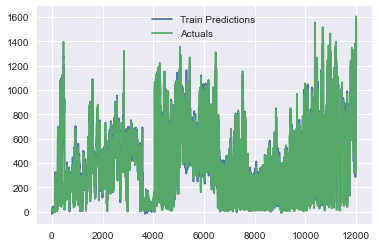

In [20]:
model = load_model('1H_Forecast/1H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(1,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)
train_predictions = model.predict(X_train).flatten()


train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 2 hours forecast

In [21]:
%%time

Trainer(2,6,12)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 14s 20ms/step - loss: 249149.9531 - mean_absolute_error: 408.7222 - val_loss: 359523.4375 - val_mean_absolute_error: 484.4519
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 14ms/step - loss: 236174.4844 - mean_absolute_error: 393.0843 - val_loss: 338715.4688 - val_mean_absolute_error: 463.7095
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 6s 17ms/step - loss: 219271.1094 - mean_absolute_error: 374.2578 - val_loss: 320094.8125 - val_mean_absolute_error: 446.4890
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 14ms/step - loss: 205685.7500 - mean_absolute_error: 359.6084 - val_loss: 304704.9062 - val_mean_absolute_error: 432.4344
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 14ms/step - loss: 193075.9688 - mean_absolute_error: 345.8785 - val_loss: 289123.5625 - val_mean_absolute_error: 418.12272 - mean_absolute
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 15ms/step - loss: 180836.6562 - mean_absolute_error: 332.5052 - val_loss: 273715.7500 - val_mean_absolute_error: 403.6211
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 19ms/step - loss: 168560.8594 - mean_absolute_error: 318.6104 - val_loss: 258512.5000 - val_mean_absolute_error: 389.1225
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 15ms/step - loss: 156790.4688 - mean_absolute_error: 304.9175 - val_loss: 243680.8281 - val_mean_absolute_error: 374.5589
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 15ms/step - loss: 145379.1406 - mean_absolute_error: 291.4418 - val_loss: 229121.2500 - val_mean_absolute_error: 359.8388
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 9s 23ms/step - loss: 134210.8438 - mean_absolute_error: 277.3718 - val_loss: 214597.9375 - val_mean_absolute_error: 344.8366
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 12s 31ms/step - loss: 123459.7891 - mean_absolute_error: 263.7617 - val_loss: 200681.9688 - val_mean_absolute_error: 329.7376
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 15s 40ms/step - loss: 113279.9922 - mean_absolute_error: 250.4159 - val_loss: 187325.9375 - val_mean_absolute_error: 314.9447rror: 251.72 - ETA: 2s - l
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 29s 79ms/step - loss: 103655.8828 - mean_absolute_error: 237.2616 - val_loss: 174529.1094 - val_mean_absolute_error: 300.9331
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 13s 34ms/step - loss: 94671.7031 - mean_absolute_error: 225.0853 - val_loss: 162346.4062 - val_mean_absolute_error: 287.3836
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 14s 37ms/step - loss: 86287.1484 - mean_absolute_error: 213.2992 - val_loss: 150804.9375 - val_mean_absolute_error: 273.9749
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 6s 17ms/step - loss: 78515.8203 - mean_absolute_error: 201.7577 - val_loss: 139924.7031 - val_mean_absolute_error: 261.5485
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 4s 11ms/step - loss: 71379.2031 - mean_absolute_error: 191.0050 - val_loss: 129541.2969 - val_mean_absolute_error: 249.2722
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 12ms/step - loss: 64695.0508 - mean_absolute_error: 180.4434 - val_loss: 119831.1016 - val_mean_absolute_error: 237.4073
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 11ms/step - loss: 58677.7422 - mean_absolute_error: 170.4001 - val_loss: 110413.4766 - val_mean_absolute_error: 225.1027
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 14ms/step - loss: 53046.2461 - mean_absolute_error: 160.3507 - val_loss: 101867.0000 - val_mean_absolute_error: 213.7469
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 12ms/step - loss: 48042.6172 - mean_absolute_error: 151.0300 - val_loss: 93900.9141 - val_mean_absolute_error: 202.6443
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 17ms/step - loss: 43722.2852 - mean_absolute_error: 143.1832 - val_loss: 86805.7344 - val_mean_absolute_error: 193.4591
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 13ms/step - loss: 39890.5977 - mean_absolute_error: 135.6485 - val_loss: 80519.8125 - val_mean_absolute_error: 183.8192
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 17ms/step - loss: 36423.6875 - mean_absolute_error: 128.0640 - val_loss: 74193.1641 - val_mean_absolute_error: 176.1542
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 12ms/step - loss: 33499.9570 - mean_absolute_error: 122.1954 - val_loss: 68781.7109 - val_mean_absolute_error: 168.1031
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 18ms/step - loss: 30960.4258 - mean_absolute_error: 117.0155 - val_loss: 64271.9648 - val_mean_absolute_error: 162.9226
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 10s 27ms/step - loss: 28888.3652 - mean_absolute_error: 112.8252 - val_loss: 59826.3320 - val_mean_absolute_error: 157.0811
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 15ms/step - loss: 27104.1602 - mean_absolute_error: 109.1686 - val_loss: 55898.1602 - val_mean_absolute_error: 151.0771
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 17ms/step - loss: 25470.1250 - mean_absolute_error: 105.5583 - val_loss: 52631.0234 - val_mean_absolute_error: 145.5876
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 10s 26ms/step - loss: 24132.8398 - mean_absolute_error: 102.6343 - val_loss: 49450.9297 - val_mean_absolute_error: 142.0767
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 9s 23ms/step - loss: 22967.9668 - mean_absolute_error: 99.9194 - val_loss: 46692.3320 - val_mean_absolute_error: 136.9816
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 13ms/step - loss: 21896.2637 - mean_absolute_error: 97.2405 - val_loss: 44339.7070 - val_mean_absolute_error: 133.0249
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 12ms/step - loss: 21001.1855 - mean_absolute_error: 95.1966 - val_loss: 41989.5352 - val_mean_absolute_error: 129.0707
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 5s 13ms/step - loss: 20239.8047 - mean_absolute_error: 93.2105 - val_loss: 39954.2500 - val_mean_absolute_error: 126.5505
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 13ms/step - loss: 19566.1719 - mean_absolute_error: 91.6827 - val_loss: 39151.7070 - val_mean_absolute_error: 124.6515
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 4s 11ms/step - loss: 19017.9824 - mean_absolute_error: 90.4600 - val_loss: 36518.3398 - val_mean_absolute_error: 122.0120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 14ms/step - loss: 18525.4492 - mean_absolute_error: 89.4420 - val_loss: 35236.5820 - val_mean_absolute_error: 120.2187
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 12ms/step - loss: 18087.6016 - mean_absolute_error: 88.2815 - val_loss: 33841.8867 - val_mean_absolute_error: 118.2646
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 14ms/step - loss: 17598.9473 - mean_absolute_error: 87.0800 - val_loss: 32770.4453 - val_mean_absolute_error: 117.0400
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 4s 10ms/step - loss: 17246.4258 - mean_absolute_error: 86.3071 - val_loss: 32251.0742 - val_mean_absolute_error: 115.7137
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 13ms/step - loss: 16953.1738 - mean_absolute_error: 85.7376 - val_loss: 31112.7617 - val_mean_absolute_error: 113.4904
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 14ms/step - loss: 16717.8809 - mean_absolute_error: 85.0453 - val_loss: 30461.5820 - val_mean_absolute_error: 112.3091
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 8s 21ms/step - loss: 16474.2168 - mean_absolute_error: 84.6732 - val_loss: 29335.0996 - val_mean_absolute_error: 111.2376
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 11s 29ms/step - loss: 16323.6494 - mean_absolute_error: 84.0835 - val_loss: 28908.2207 - val_mean_absolute_error: 111.0957
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 17s 45ms/step - loss: 16116.2451 - mean_absolute_error: 83.7950 - val_loss: 28205.5234 - val_mean_absolute_error: 109.6868
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 15946.0361 - mean_absolute_error: 83.4023 - val_loss: 27786.4082 - val_mean_absolute_error: 108.4529
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 7s 19ms/step - loss: 15843.2334 - mean_absolute_error: 83.2402 - val_loss: 27808.9902 - val_mean_absolute_error: 108.7640
Epoch 48/100
376/376 [==============================] - 7s 20ms/step - loss: 15747.8770 - mean_absolute_error: 83.0098 - val_loss: 26946.0859 - val_mean_absolute_error: 108.3627
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 8s 21ms/step - loss: 15576.6602 - mean_absolute_error: 82.5453 - val_loss: 26880.8496 - val_mean_absolute_error: 106.9888
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 7s 18ms/step - loss: 15471.1729 - mean_absolute_error: 82.4097 - val_loss: 26312.4453 - val_mean_absolute_error: 106.1279
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 8s 22ms/step - loss: 15412.3545 - mean_absolute_error: 82.2381 - val_loss: 26244.9766 - val_mean_absolute_error: 106.5065
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 22ms/step - loss: 15250.7441 - mean_absolute_error: 81.7737 - val_loss: 25795.4258 - val_mean_absolute_error: 106.7240.9365 - mean_absolut - ETA: 0s - loss: 15082.995
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 8s 21ms/step - loss: 15222.1143 - mean_absolute_error: 81.5928 - val_loss: 25567.1406 - val_mean_absolute_error: 105.1806
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 8s 20ms/step - loss: 15162.0156 - mean_absolute_error: 81.4315 - val_loss: 26166.1934 - val_mean_absolute_error: 106.0688
Epoch 55/100
376/376 [==============================] - 7s 20ms/step - loss: 15077.6025 - mean_absolute_error: 81.3306 - val_loss: 24768.4277 - val_mean_absolute_error: 104.9062
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 7s 19ms/step - loss: 14981.9434 - mean_absolute_error: 81.1010 - val_loss: 24763.8262 - val_mean_absolute_error: 104.2542
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 17s 45ms/step - loss: 14860.6025 - mean_absolute_error: 80.7454 - val_loss: 24633.8340 - val_mean_absolute_error: 105.0460
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 19s 50ms/step - loss: 14810.5771 - mean_absolute_error: 80.5545 - val_loss: 24599.6387 - val_mean_absolute_error: 103.2960
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 14s 36ms/step - loss: 14746.6904 - mean_absolute_error: 80.5230 - val_loss: 23910.0352 - val_mean_absolute_error: 103.0689n_a
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 14701.7900 - mean_absolute_error: 80.2706 - val_loss: 24014.1055 - val_mean_absolute_error: 103.1139
Epoch 61/100
376/376 [==============================] - 6s 15ms/step - loss: 14622.1836 - mean_absolute_error: 80.0238 - val_loss: 23905.5352 - val_mean_absolute_error: 102.6860
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 5s 12ms/step - loss: 14648.3096 - mean_absolute_error: 80.2983 - val_loss: 23926.0605 - val_mean_absolute_error: 102.6922
Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 14521.5420 - mean_absolute_error: 79.7582 - val_loss: 24411.2969 - val_mean_absolute_error: 103.3951
Epoch 64/100
376/376 [==============================] - 4s 11ms/step - loss: 14442.8145 - mean_absolute_error: 79.5800 - val_loss: 23872.7598 - val_mean_absolute_error: 104.4677
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 5s 12ms/step - loss: 14391.4102 - mean_absolute_error: 79.2678 - val_loss: 23702.0820 - val_mean_absolute_error: 102.4934
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 11ms/step - loss: 14345.4199 - mean_absolute_error: 79.2157 - val_loss: 23175.7227 - val_mean_absolute_error: 102.0088
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 14318.9502 - mean_absolute_error: 79.1772 - val_loss: 23497.2422 - val_mean_absolute_error: 101.0380
Epoch 68/100
376/376 [==============================] - 4s 11ms/step - loss: 14347.4004 - mean_absolute_error: 79.2795 - val_loss: 22840.0957 - val_mean_absolute_error: 99.9726
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 11ms/step - loss: 14271.5674 - mean_absolute_error: 79.1050 - val_loss: 23218.5547 - val_mean_absolute_error: 101.1760
Epoch 70/100
376/376 [==============================] - 4s 11ms/step - loss: 14221.1816 - mean_absolute_error: 78.8566 - val_loss: 23812.1602 - val_mean_absolute_error: 101.2915
Epoch 71/100
376/376 [==============================] - 4s 11ms/step - loss: 14197.2041 - mean_absolute_error: 78.9562 - val_loss: 23159.5195 - val_mean_absolute_error: 101.0336
Epoch 72/100
376/376 [==============================] - 4s 12ms/step - loss: 14128.0732 - mean_absolute_error: 78.4244 - val_loss: 23177.4648 - val_mean_absolute_error: 100.7234
Epoch 73/100
376/376 [==============================] - 5s 12ms/step - loss: 14087.7607 - mean_absolute_error: 78.3737 - val_loss: 23525.2344 - val_mean_absolute_error: 100.7259
Epoch 74/100
376/376 [==============================] - 4s 11ms/step - loss: 14100.5059 - mean_absolute_error:

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 4s 11ms/step - loss: 13978.2793 - mean_absolute_error: 77.8711 - val_loss: 22127.6992 - val_mean_absolute_error: 100.9919
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 4s 11ms/step - loss: 14004.7080 - mean_absolute_error: 78.4551 - val_loss: 22041.7305 - val_mean_absolute_error: 99.2606
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 5s 12ms/step - loss: 13885.5674 - mean_absolute_error: 77.7656 - val_loss: 22548.2422 - val_mean_absolute_error: 101.5972
Epoch 80/100
376/376 [==============================] - 4s 11ms/step - loss: 13905.1807 - mean_absolute_error: 77.9393 - val_loss: 22577.6289 - val_mean_absolute_error: 99.6706
Epoch 81/100
376/376 [==============================] - 4s 11ms/step - loss: 13845.1895 - mean_absolute_error: 77.5443 - val_loss: 22502.7344 - val_mean_absolute_error: 99.6551
Epoch 82/100
376/376 [==============================] - 4s 11ms/step - loss: 13811.7490 - mean_absolute_error: 77.7908 - val_loss: 22252.0488 - val_mean_absolute_error: 100.8384
Epoch 83/100
376/376 [==============================] - 4s 11ms/step - loss: 13832.9736 - mean_absolute_error: 77.4134 - val_loss: 22057.7715 - val_mean_absolute_error: 100.5059
Epoch 84/100
376/376 [==============================] - 4s 11ms/step - loss: 13778.1035 - mean_absolute_error: 7

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 4s 11ms/step - loss: 13679.0596 - mean_absolute_error: 77.0022 - val_loss: 21970.7168 - val_mean_absolute_error: 99.5290
Epoch 88/100
376/376 [==============================] - 4s 12ms/step - loss: 13756.6660 - mean_absolute_error: 77.2693 - val_loss: 22147.2520 - val_mean_absolute_error: 100.2673
Epoch 89/100
376/376 [==============================] - 4s 11ms/step - loss: 13616.9072 - mean_absolute_error: 76.9251 - val_loss: 21588.7949 - val_mean_absolute_error: 98.1808
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 4s 11ms/step - loss: 13651.2002 - mean_absolute_error: 77.2010 - val_loss: 22249.8125 - val_mean_absolute_error: 99.0198
Epoch 91/100
376/376 [==============================] - 5s 13ms/step - loss: 13622.7139 - mean_absolute_error: 76.6618 - val_loss: 21857.7988 - val_mean_absolute_error: 100.9859
Epoch 92/100
376/376 [==============================] - 4s 11ms/step - loss: 13617.6104 - mean_absolute_error: 77.0662 - val_loss: 21697.9941 - val_mean_absolute_error: 99.0249
Epoch 93/100
376/376 [==============================] - 4s 11ms/step - loss: 13592.1338 - mean_absolute_error: 76.9592 - val_loss: 22318.6973 - val_mean_absolute_error: 99.1141
Epoch 94/100
376/376 [==============================] - 4s 11ms/step - loss: 13497.0049 - mean_absolute_error: 76.3586 - val_loss: 21933.6309 - val_mean_absolute_error: 100.9053
Epoch 95/100
376/376 [==============================] - 4s 10ms/step - loss: 13565.9775 - mean_absolute_error: 76

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_6_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 4s 11ms/step - loss: 13488.6465 - mean_absolute_error: 76.5208 - val_loss: 21749.9141 - val_mean_absolute_error: 102.1596

-----------------------------------------------------------------------------------------------------------

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_9 (Bidirection (None, 128)               35840     
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 14s 23ms/step - loss: 252802.1250 - 

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 13ms/step - loss: 250501.0156 - mean_absolute_error: 410.2322 - val_loss: 363648.4688 - val_mean_absolute_error: 489.0217
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 245787.6094 - mean_absolute_error: 404.6153 - val_loss: 357054.5625 - val_mean_absolute_error: 482.4489
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 15ms/step - loss: 240324.0312 - mean_absolute_error: 398.2299 - val_loss: 350544.6250 - val_mean_absolute_error: 475.9286
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 16ms/step - loss: 234524.3906 - mean_absolute_error: 391.5255 - val_loss: 343185.8750 - val_mean_absolute_error: 468.6643
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 18ms/step - loss: 228437.0938 - mean_absolute_error: 384.6482 - val_loss: 335579.8750 - val_mean_absolute_error: 461.3349
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 13ms/step - loss: 221967.0312 - mean_absolute_error: 377.4135 - val_loss: 327637.4062 - val_mean_absolute_error: 453.7771
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 23ms/step - loss: 215307.4844 - mean_absolute_error: 370.0667 - val_loss: 319340.2812 - val_mean_absolute_error: 446.0239
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 14ms/step - loss: 208405.9531 - mean_absolute_error: 362.5265 - val_loss: 310741.1250 - val_mean_absolute_error: 438.1245
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 14ms/step - loss: 201172.1719 - mean_absolute_error: 354.6171 - val_loss: 301531.0000 - val_mean_absolute_error: 429.7209
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 12ms/step - loss: 193689.6406 - mean_absolute_error: 346.5341 - val_loss: 292265.3750 - val_mean_absolute_error: 421.2736
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 15ms/step - loss: 186077.4219 - mean_absolute_error: 338.2760 - val_loss: 282667.4375 - val_mean_absolute_error: 412.4519
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 6s 16ms/step - loss: 178437.7812 - mean_absolute_error: 329.8622 - val_loss: 273080.2188 - val_mean_absolute_error: 403.4742
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 6s 16ms/step - loss: 170721.2812 - mean_absolute_error: 321.0923 - val_loss: 263180.6562 - val_mean_absolute_error: 394.1541
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 16ms/step - loss: 162894.5156 - mean_absolute_error: 312.2955 - val_loss: 253356.2188 - val_mean_absolute_error: 384.7156
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 18ms/step - loss: 155215.3281 - mean_absolute_error: 303.3497 - val_loss: 243551.3281 - val_mean_absolute_error: 375.0508
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 7s 19ms/step - loss: 147437.2656 - mean_absolute_error: 294.1637 - val_loss: 233421.1094 - val_mean_absolute_error: 364.9717147636.6562 - mean_absolute_error: 294.40
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 9s 23ms/step - loss: 139792.8125 - mean_absolute_error: 284.8762 - val_loss: 223632.7188 - val_mean_absolute_error: 354.9199
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 6s 16ms/step - loss: 132230.3906 - mean_absolute_error: 275.2577 - val_loss: 213604.5312 - val_mean_absolute_error: 344.1880
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 124727.2422 - mean_absolute_error: 265.4813 - val_loss: 203910.3125 - val_mean_absolute_error: 333.8640
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 20ms/step - loss: 117572.1016 - mean_absolute_error: 256.1175 - val_loss: 194472.3125 - val_mean_absolute_error: 323.6615
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 20ms/step - loss: 110644.9453 - mean_absolute_error: 247.0112 - val_loss: 185224.7500 - val_mean_absolute_error: 313.6713
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 9s 24ms/step - loss: 103978.7812 - mean_absolute_error: 238.2782 - val_loss: 176283.2031 - val_mean_absolute_error: 303.7059
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 19ms/step - loss: 97532.3672 - mean_absolute_error: 229.2269 - val_loss: 167495.4844 - val_mean_absolute_error: 293.8776
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 9s 25ms/step - loss: 91354.2031 - mean_absolute_error: 220.6331 - val_loss: 158927.3125 - val_mean_absolute_error: 284.0861
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 10s 26ms/step - loss: 85389.0156 - mean_absolute_error: 211.9598 - val_loss: 150596.5625 - val_mean_absolute_error: 274.6226
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 19ms/step - loss: 79648.7031 - mean_absolute_error: 203.3095 - val_loss: 142486.9688 - val_mean_absolute_error: 264.8660
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 20ms/step - loss: 74201.3750 - mean_absolute_error: 194.9776 - val_loss: 134676.2188 - val_mean_absolute_error: 255.4805
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 19ms/step - loss: 69093.4141 - mean_absolute_error: 186.6801 - val_loss: 127227.9062 - val_mean_absolute_error: 246.3374
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 19ms/step - loss: 64284.9531 - mean_absolute_error: 178.7785 - val_loss: 120122.6953 - val_mean_absolute_error: 237.7672 mean_absolute_err
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 8s 22ms/step - loss: 59815.0273 - mean_absolute_error: 171.4071 - val_loss: 113376.5781 - val_mean_absolute_error: 228.8811
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 10s 27ms/step - loss: 55643.5352 - mean_absolute_error: 164.1065 - val_loss: 106861.6719 - val_mean_absolute_error: 220.5378
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 16ms/step - loss: 51709.5117 - mean_absolute_error: 157.0023 - val_loss: 100716.2578 - val_mean_absolute_error: 212.0221
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 18ms/step - loss: 48103.0195 - mean_absolute_error: 150.3657 - val_loss: 94675.0469 - val_mean_absolute_error: 203.5908
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 20ms/step - loss: 44709.1758 - mean_absolute_error: 143.9662 - val_loss: 89356.9219 - val_mean_absolute_error: 196.3314
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 18ms/step - loss: 41667.0312 - mean_absolute_error: 138.0256 - val_loss: 84115.0547 - val_mean_absolute_error: 188.8436
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 38876.3164 - mean_absolute_error: 132.7049 - val_loss: 79118.2969 - val_mean_absolute_error: 182.2315 1s - loss: 38811.6953 - mean_abso
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 6s 17ms/step - loss: 36351.0586 - mean_absolute_error: 127.8029 - val_loss: 74727.6484 - val_mean_absolute_error: 176.4900
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 15ms/step - loss: 34128.8398 - mean_absolute_error: 123.1187 - val_loss: 70498.8047 - val_mean_absolute_error: 170.5065
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 15ms/step - loss: 32137.5977 - mean_absolute_error: 119.0887 - val_loss: 66940.8828 - val_mean_absolute_error: 166.1556
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 16ms/step - loss: 30289.1230 - mean_absolute_error: 115.3943 - val_loss: 63158.6523 - val_mean_absolute_error: 160.4976
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 18ms/step - loss: 28732.4219 - mean_absolute_error: 112.1405 - val_loss: 59690.3711 - val_mean_absolute_error: 155.4785
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 7s 20ms/step - loss: 27239.3125 - mean_absolute_error: 108.9016 - val_loss: 56483.9414 - val_mean_absolute_error: 150.02570s - loss: 27182.1035 - mean_absolute_error
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 15ms/step - loss: 25936.5957 - mean_absolute_error: 106.0982 - val_loss: 53982.2344 - val_mean_absolute_error: 146.6565
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 15ms/step - loss: 24767.8926 - mean_absolute_error: 103.6274 - val_loss: 51111.3516 - val_mean_absolute_error: 142.5620
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 17ms/step - loss: 23799.5605 - mean_absolute_error: 101.4242 - val_loss: 48970.4805 - val_mean_absolute_error: 139.6889
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 7s 19ms/step - loss: 22872.8965 - mean_absolute_error: 99.5752 - val_loss: 46960.8242 - val_mean_absolute_error: 137.1733
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 16ms/step - loss: 22135.9805 - mean_absolute_error: 97.7693 - val_loss: 44871.3984 - val_mean_absolute_error: 133.4144
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 16ms/step - loss: 21355.0215 - mean_absolute_error: 96.4296 - val_loss: 43603.6641 - val_mean_absolute_error: 131.2645
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 17ms/step - loss: 20830.6582 - mean_absolute_error: 94.8789 - val_loss: 41345.9688 - val_mean_absolute_error: 128.7571
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 7s 19ms/step - loss: 20208.5801 - mean_absolute_error: 93.8832 - val_loss: 40337.6562 - val_mean_absolute_error: 126.5620
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 6s 17ms/step - loss: 19765.6016 - mean_absolute_error: 92.8663 - val_loss: 38955.0938 - val_mean_absolute_error: 124.4427
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 7s 17ms/step - loss: 19297.0117 - mean_absolute_error: 91.5556 - val_loss: 37561.0859 - val_mean_absolute_error: 122.5148
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 8s 20ms/step - loss: 18880.0449 - mean_absolute_error: 90.5201 - val_loss: 36868.7500 - val_mean_absolute_error: 121.5693
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 6s 15ms/step - loss: 18569.9238 - mean_absolute_error: 89.7838 - val_loss: 35893.5352 - val_mean_absolute_error: 120.8849
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 14ms/step - loss: 18256.0332 - mean_absolute_error: 88.9036 - val_loss: 35476.1094 - val_mean_absolute_error: 120.1592
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 5s 14ms/step - loss: 17940.7754 - mean_absolute_error: 88.5686 - val_loss: 34804.4570 - val_mean_absolute_error: 119.1990
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 5s 13ms/step - loss: 17648.8125 - mean_absolute_error: 87.8162 - val_loss: 32822.8125 - val_mean_absolute_error: 117.3223
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 15ms/step - loss: 17448.4570 - mean_absolute_error: 87.3865 - val_loss: 33129.2070 - val_mean_absolute_error: 116.5563
Epoch 60/100
376/376 [==============================] - 6s 16ms/step - loss: 17212.7402 - mean_absolute_error: 86.4874 - val_loss: 32062.2891 - val_mean_absolute_error: 114.8925
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 17006.2285 - mean_absolute_error: 86.2124 - val_loss: 31552.7129 - val_mean_absolute_error: 113.9463
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 6s 15ms/step - loss: 16798.8164 - mean_absolute_error: 85.4961 - val_loss: 31114.1816 - val_mean_absolute_error: 112.6690
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 5s 14ms/step - loss: 16639.3984 - mean_absolute_error: 85.3186 - val_loss: 30988.2910 - val_mean_absolute_error: 112.9851
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 5s 13ms/step - loss: 16422.9219 - mean_absolute_error: 84.4759 - val_loss: 29443.6367 - val_mean_absolute_error: 112.9882
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 4s 12ms/step - loss: 16275.9307 - mean_absolute_error: 84.5269 - val_loss: 29428.9121 - val_mean_absolute_error: 111.3849
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 6s 16ms/step - loss: 16170.5186 - mean_absolute_error: 84.3037 - val_loss: 28515.6543 - val_mean_absolute_error: 109.0797
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 6s 15ms/step - loss: 16020.3145 - mean_absolute_error: 83.7622 - val_loss: 28180.5781 - val_mean_absolute_error: 109.8809
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 6s 15ms/step - loss: 15893.3125 - mean_absolute_error: 83.2993 - val_loss: 28893.7773 - val_mean_absolute_error: 110.3223
Epoch 69/100
376/376 [==============================] - 6s 15ms/step - loss: 15835.3311 - mean_absolute_error: 83.4665 - val_loss: 27765.4844 - val_mean_absolute_error: 108.1311
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 6s 16ms/step - loss: 15672.8330 - mean_absolute_error: 82.9863 - val_loss: 27637.7070 - val_mean_absolute_error: 107.6123
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 4s 11ms/step - loss: 15607.7461 - mean_absolute_error: 82.7172 - val_loss: 26955.3555 - val_mean_absolute_error: 106.9082
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 6s 17ms/step - loss: 15540.9482 - mean_absolute_error: 82.6268 - val_loss: 27373.7285 - val_mean_absolute_error: 107.8787
Epoch 73/100
376/376 [==============================] - 6s 16ms/step - loss: 15455.1924 - mean_absolute_error: 82.3709 - val_loss: 26475.0859 - val_mean_absolute_error: 106.7849
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 6s 15ms/step - loss: 15371.3945 - mean_absolute_error: 82.1103 - val_loss: 26133.2285 - val_mean_absolute_error: 105.7675
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 7s 17ms/step - loss: 15291.2490 - mean_absolute_error: 81.8057 - val_loss: 26156.8945 - val_mean_absolute_error: 105.6638
Epoch 76/100
376/376 [==============================] - 7s 19ms/step - loss: 15232.0254 - mean_absolute_error: 81.8099 - val_loss: 26129.2891 - val_mean_absolute_error: 105.6331
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 7s 17ms/step - loss: 15086.9443 - mean_absolute_error: 81.4579 - val_loss: 25203.4727 - val_mean_absolute_error: 105.2108
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 7s 17ms/step - loss: 15088.4971 - mean_absolute_error: 81.4484 - val_loss: 25453.8828 - val_mean_absolute_error: 104.2209
Epoch 79/100
376/376 [==============================] - 7s 17ms/step - loss: 15067.0000 - mean_absolute_error: 81.0738 - val_loss: 25030.1289 - val_mean_absolute_error: 104.4964
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 7s 18ms/step - loss: 14950.3555 - mean_absolute_error: 80.9437 - val_loss: 24690.4746 - val_mean_absolute_error: 104.5338
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 7s 19ms/step - loss: 14928.7598 - mean_absolute_error: 80.8174 - val_loss: 24776.5156 - val_mean_absolute_error: 103.8671
Epoch 82/100
376/376 [==============================] - 7s 19ms/step - loss: 14803.5977 - mean_absolute_error: 80.3450 - val_loss: 24766.1875 - val_mean_absolute_error: 105.5570
Epoch 83/100
376/376 [==============================] - 8s 22ms/step - loss: 14822.3994 - mean_absolute_error: 80.4782 - val_loss: 24811.7500 - val_mean_absolute_error: 103.0837
Epoch 84/100
376/376 [==============================] - 8s 22ms/step - loss: 14748.3184 - mean_absolute_error: 80.1140 - val_loss: 24354.2812 - val_mean_absolute_error: 102.8683
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 7s 18ms/step - loss: 14738.3564 - mean_absolute_error: 80.3804 - val_loss: 24070.6543 - val_mean_absolute_error: 103.5926
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 7s 19ms/step - loss: 14609.5469 - mean_absolute_error: 79.6130 - val_loss: 23874.5254 - val_mean_absolute_error: 101.9434
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 7s 18ms/step - loss: 14613.9678 - mean_absolute_error: 79.9263 - val_loss: 24009.7715 - val_mean_absolute_error: 102.0598
Epoch 88/100
376/376 [==============================] - 7s 18ms/step - loss: 14585.4912 - mean_absolute_error: 79.7366 - val_loss: 25852.9883 - val_mean_absolute_error: 107.0339
Epoch 89/100
376/376 [==============================] - 6s 17ms/step - loss: 14631.0938 - mean_absolute_error: 79.9921 - val_loss: 24294.9648 - val_mean_absolute_error: 102.9883
Epoch 90/100
376/376 [==============================] - 6s 16ms/step - loss: 14533.3955 - mean_absolute_error: 79.4729 - val_loss: 23373.3105 - val_mean_absolute_error: 102.0211
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 6s 17ms/step - loss: 14403.0312 - mean_absolute_error: 79.3810 - val_loss: 25218.1035 - val_mean_absolute_error: 104.5610
Epoch 92/100
376/376 [==============================] - 6s 16ms/step - loss: 14487.9424 - mean_absolute_error: 79.2366 - val_loss: 24904.0254 - val_mean_absolute_error: 104.3813
Epoch 93/100
376/376 [==============================] - 6s 16ms/step - loss: 14459.5205 - mean_absolute_error: 79.3765 - val_loss: 23522.5273 - val_mean_absolute_error: 101.3241
Epoch 94/100
376/376 [==============================] - 6s 17ms/step - loss: 14389.4014 - mean_absolute_error: 78.9502 - val_loss: 24201.1738 - val_mean_absolute_error: 102.6278
Epoch 95/100
376/376 [==============================] - 7s 19ms/step - loss: 14363.2822 - mean_absolute_error: 78.8893 - val_loss: 23589.8301 - val_mean_absolute_error: 101.7797
Epoch 96/100
376/376 [==============================] - 7s 19ms/step - loss: 14364.0625 - mean_absolute_error:

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 19ms/step - loss: 237272.1719 - mean_absolute_error: 394.4544 - val_loss: 340213.3125 - val_mean_absolute_error: 465.5900
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 9s 23ms/step - loss: 221434.4531 - mean_absolute_error: 376.7088 - val_loss: 321789.5938 - val_mean_absolute_error: 448.1828 3s - - ETA: 1s - loss: 224421.0469 - mean_
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 7s 20ms/step - loss: 206938.5781 - mean_absolute_error: 360.8848 - val_loss: 304673.9688 - val_mean_absolute_error: 432.4788
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 8s 22ms/step - loss: 192754.5000 - mean_absolute_error: 345.4041 - val_loss: 287073.4688 - val_mean_absolute_error: 416.2329
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 8s 21ms/step - loss: 178937.6094 - mean_absolute_error: 330.2327 - val_loss: 270056.7812 - val_mean_absolute_error: 400.2408
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 8s 22ms/step - loss: 165170.0781 - mean_absolute_error: 314.6370 - val_loss: 252512.7031 - val_mean_absolute_error: 383.4186
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 7s 18ms/step - loss: 151621.2500 - mean_absolute_error: 298.7571 - val_loss: 235579.3438 - val_mean_absolute_error: 366.5805
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 8s 21ms/step - loss: 138671.0625 - mean_absolute_error: 283.0703 - val_loss: 219064.1875 - val_mean_absolute_error: 349.4931
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 7s 19ms/step - loss: 126018.0312 - mean_absolute_error: 267.1192 - val_loss: 202325.3750 - val_mean_absolute_error: 331.9186
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 7s 20ms/step - loss: 113929.7188 - mean_absolute_error: 251.6297 - val_loss: 186417.5781 - val_mean_absolute_error: 314.7687
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 8s 20ms/step - loss: 102620.5156 - mean_absolute_error: 236.5137 - val_loss: 171781.3594 - val_mean_absolute_error: 298.8357
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 19ms/step - loss: 92330.7812 - mean_absolute_error: 222.5642 - val_loss: 157634.9844 - val_mean_absolute_error: 282.8120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 9s 24ms/step - loss: 82718.2812 - mean_absolute_error: 208.6093 - val_loss: 144754.1406 - val_mean_absolute_error: 268.2526
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 22ms/step - loss: 74211.7812 - mean_absolute_error: 196.0114 - val_loss: 132908.1719 - val_mean_absolute_error: 254.3300
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 8s 20ms/step - loss: 66531.8516 - mean_absolute_error: 183.7702 - val_loss: 121518.2578 - val_mean_absolute_error: 240.5739
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 8s 21ms/step - loss: 59713.6523 - mean_absolute_error: 172.9324 - val_loss: 111532.7109 - val_mean_absolute_error: 228.1940
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 8s 20ms/step - loss: 53796.2500 - mean_absolute_error: 163.1645 - val_loss: 102417.5312 - val_mean_absolute_error: 216.9872
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 25ms/step - loss: 48557.8711 - mean_absolute_error: 153.8374 - val_loss: 93938.1875 - val_mean_absolute_error: 206.0154
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 19ms/step - loss: 44022.4648 - mean_absolute_error: 145.6166 - val_loss: 86336.2266 - val_mean_absolute_error: 195.9315
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 19ms/step - loss: 39973.4375 - mean_absolute_error: 137.6185 - val_loss: 79456.1875 - val_mean_absolute_error: 187.5685
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 20ms/step - loss: 36313.0781 - mean_absolute_error: 129.4688 - val_loss: 73057.0156 - val_mean_absolute_error: 177.2288
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 9s 24ms/step - loss: 33255.9531 - mean_absolute_error: 123.1345 - val_loss: 67355.6641 - val_mean_absolute_error: 168.9941
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 9s 25ms/step - loss: 30707.2949 - mean_absolute_error: 117.6649 - val_loss: 62343.9648 - val_mean_absolute_error: 163.1683s - loss: 32800.5430 - mean_absolute_error: 12 - ETA:
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 9s 23ms/step - loss: 28528.1562 - mean_absolute_error: 113.3667 - val_loss: 57928.3672 - val_mean_absolute_error: 156.3227
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 9s 23ms/step - loss: 26657.5273 - mean_absolute_error: 109.2449 - val_loss: 54270.9648 - val_mean_absolute_error: 151.1455
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 8s 20ms/step - loss: 24953.8438 - mean_absolute_error: 105.5859 - val_loss: 50562.6875 - val_mean_absolute_error: 144.5236
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 14ms/step - loss: 23522.4434 - mean_absolute_error: 102.3486 - val_loss: 47540.9688 - val_mean_absolute_error: 141.1124
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 16ms/step - loss: 22418.2930 - mean_absolute_error: 99.9365 - val_loss: 45042.9492 - val_mean_absolute_error: 136.7107
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 15ms/step - loss: 21493.3379 - mean_absolute_error: 97.6519 - val_loss: 43616.9297 - val_mean_absolute_error: 134.8776
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 7s 18ms/step - loss: 20785.9785 - mean_absolute_error: 95.9797 - val_loss: 41050.4844 - val_mean_absolute_error: 130.8663
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 8s 21ms/step - loss: 20078.2422 - mean_absolute_error: 94.7802 - val_loss: 39110.9375 - val_mean_absolute_error: 129.4393
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 20ms/step - loss: 19502.2852 - mean_absolute_error: 93.1251 - val_loss: 38668.7656 - val_mean_absolute_error: 127.5256
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 20ms/step - loss: 18970.5273 - mean_absolute_error: 91.7898 - val_loss: 35762.1602 - val_mean_absolute_error: 123.3365
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 7s 19ms/step - loss: 18391.4141 - mean_absolute_error: 90.3851 - val_loss: 34648.3164 - val_mean_absolute_error: 122.3668
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 8s 20ms/step - loss: 18049.8945 - mean_absolute_error: 89.2476 - val_loss: 33495.1016 - val_mean_absolute_error: 121.1944
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 17721.4512 - mean_absolute_error: 88.3305 - val_loss: 34385.6250 - val_mean_absolute_error: 119.8124
Epoch 38/100
376/376 [==============================] - 8s 20ms/step - loss: 17298.4160 - mean_absolute_error: 87.1081 - val_loss: 32088.5684 - val_mean_absolute_error: 116.8519
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 8s 22ms/step - loss: 16966.4609 - mean_absolute_error: 86.2700 - val_loss: 31648.7383 - val_mean_absolute_error: 116.3255
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 8s 20ms/step - loss: 16745.1133 - mean_absolute_error: 85.3004 - val_loss: 30761.8652 - val_mean_absolute_error: 114.2897
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 21ms/step - loss: 16516.0898 - mean_absolute_error: 84.9948 - val_loss: 30031.9102 - val_mean_absolute_error: 114.5262
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 18ms/step - loss: 16275.5107 - mean_absolute_error: 84.3895 - val_loss: 29413.1855 - val_mean_absolute_error: 112.8433
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 7s 18ms/step - loss: 16156.5342 - mean_absolute_error: 84.1450 - val_loss: 29070.0625 - val_mean_absolute_error: 113.8726an_absolute_
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 8s 22ms/step - loss: 15934.6260 - mean_absolute_error: 83.3168 - val_loss: 28865.0352 - val_mean_absolute_error: 111.3151
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 8s 22ms/step - loss: 15835.2783 - mean_absolute_error: 83.3352 - val_loss: 28085.4668 - val_mean_absolute_error: 110.9224
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 8s 22ms/step - loss: 15762.8096 - mean_absolute_error: 83.0100 - val_loss: 27522.3594 - val_mean_absolute_error: 109.4627
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 8s 22ms/step - loss: 15595.5469 - mean_absolute_error: 82.4726 - val_loss: 28566.6953 - val_mean_absolute_error: 109.9607
Epoch 48/100
376/376 [==============================] - 9s 23ms/step - loss: 15506.9189 - mean_absolute_error: 82.1077 - val_loss: 26115.6660 - val_mean_absolute_error: 106.9832
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 8s 22ms/step - loss: 15417.5703 - mean_absolute_error: 81.7646 - val_loss: 26336.7715 - val_mean_absolute_error: 106.7990
Epoch 50/100
376/376 [==============================] - 8s 21ms/step - loss: 15299.6104 - mean_absolute_error: 81.5172 - val_loss: 25829.4219 - val_mean_absolute_error: 106.8893
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 9s 24ms/step - loss: 15257.0039 - mean_absolute_error: 81.3577 - val_loss: 25413.2949 - val_mean_absolute_error: 105.5376
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 21ms/step - loss: 15268.9980 - mean_absolute_error: 81.3592 - val_loss: 25552.8086 - val_mean_absolute_error: 105.4660
Epoch 53/100
376/376 [==============================] - 8s 22ms/step - loss: 15046.6016 - mean_absolute_error: 80.7562 - val_loss: 24912.5742 - val_mean_absolute_error: 105.8655
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 9s 23ms/step - loss: 15007.4590 - mean_absolute_error: 80.8983 - val_loss: 24304.9395 - val_mean_absolute_error: 105.3933
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 9s 23ms/step - loss: 14994.6172 - mean_absolute_error: 80.5114 - val_loss: 25682.0840 - val_mean_absolute_error: 104.6579
Epoch 56/100
376/376 [==============================] - 8s 21ms/step - loss: 14878.9570 - mean_absolute_error: 80.3152 - val_loss: 26011.9551 - val_mean_absolute_error: 105.7110
Epoch 57/100
376/376 [==============================] - 8s 20ms/step - loss: 14822.1416 - mean_absolute_error: 79.9041 - val_loss: 26414.4590 - val_mean_absolute_error: 105.7145
Epoch 58/100
376/376 [==============================] - 8s 22ms/step - loss: 14820.0547 - mean_absolute_error: 79.8144 - val_loss: 24689.5176 - val_mean_absolute_error: 103.8098
Epoch 59/100
376/376 [==============================] - 8s 20ms/step - loss: 14696.9746 - mean_absolute_error: 79.6909 - val_loss: 24410.4336 - val_mean_absolute_error: 104.4700
Epoch 60/100
376/376 [==============================] - 8s 20ms/step - loss: 14658.6289 - mean_absolute_error:

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 7s 19ms/step - loss: 14669.9854 - mean_absolute_error: 79.4932 - val_loss: 24211.7578 - val_mean_absolute_error: 102.6192
Epoch 62/100
376/376 [==============================] - 7s 19ms/step - loss: 14620.3350 - mean_absolute_error: 79.2132 - val_loss: 24375.5605 - val_mean_absolute_error: 102.8585
Epoch 63/100
376/376 [==============================] - 7s 18ms/step - loss: 14528.3926 - mean_absolute_error: 79.1551 - val_loss: 23483.1172 - val_mean_absolute_error: 102.4352
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 7s 19ms/step - loss: 14512.5400 - mean_absolute_error: 79.2649 - val_loss: 24084.7051 - val_mean_absolute_error: 103.05280s - loss: 14512.5400 - mean_absolute_error: 79.26
Epoch 65/100
376/376 [==============================] - 11s 30ms/step - loss: 14435.1426 - mean_absolute_error: 78.8116 - val_loss: 22824.3887 - val_mean_absolute_error: 101.0846
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 8s 23ms/step - loss: 14432.6484 - mean_absolute_error: 78.7136 - val_loss: 23078.4316 - val_mean_absolute_error: 102.4818
Epoch 67/100
376/376 [==============================] - 9s 23ms/step - loss: 14530.2637 - mean_absolute_error: 79.0170 - val_loss: 25440.0488 - val_mean_absolute_error: 105.7850
Epoch 68/100
376/376 [==============================] - 9s 24ms/step - loss: 14419.7568 - mean_absolute_error: 78.7015 - val_loss: 23777.2734 - val_mean_absolute_error: 101.4597
Epoch 69/100
376/376 [==============================] - 9s 25ms/step - loss: 14234.5098 - mean_absolute_error: 77.9151 - val_loss: 22368.1836 - val_mean_absolute_error: 101.0501
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 10s 25ms/step - loss: 14223.4883 - mean_absolute_error: 78.0638 - val_loss: 23217.8418 - val_mean_absolute_error: 101.0074: 10s - loss: 13635.4 - ETA: 8s - loss: 13191 - ETA: 6s - loss: 136 - ETA: 2s - loss: 14123.6826 - mean_absolute_error: 7 - ETA: 2s - loss: 14142.6992 - mean_absolute_er - ETA: 1s - l
Epoch 71/100
376/376 [==============================] - 9s 25ms/step - loss: 14226.4287 - mean_absolute_error: 78.2641 - val_loss: 22965.3867 - val_mean_absolute_error: 99.8489s - loss: 14149.2217 -  - ETA: 0s - loss: 14261.5771 - mean_absolute_erro
Epoch 72/100
376/376 [==============================] - 9s 24ms/step - loss: 14187.0127 - mean_absolute_error: 78.1023 - val_loss: 24087.5391 - val_mean_absolute_error: 102.2096
Epoch 73/100
376/376 [==============================] - 10s 25ms/step - loss: 14159.4844 - mean_absolute_error: 77.9242 - val_loss: 22654.0430 - val_mean_absolute_error: 100.1928
Epoch 74/100
376/376 [=========

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 7s 19ms/step - loss: 13897.9619 - mean_absolute_error: 77.0833 - val_loss: 24241.7012 - val_mean_absolute_error: 102.3047_a
Epoch 83/100
376/376 [==============================] - 8s 21ms/step - loss: 13893.0361 - mean_absolute_error: 77.1187 - val_loss: 23329.5742 - val_mean_absolute_error: 100.4078
Epoch 84/100
376/376 [==============================] - 8s 21ms/step - loss: 13928.0742 - mean_absolute_error: 77.0338 - val_loss: 21505.1230 - val_mean_absolute_error: 100.7004
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 8s 22ms/step - loss: 13779.2480 - mean_absolute_error: 76.6752 - val_loss: 22297.9102 - val_mean_absolute_error: 99.8329
Epoch 86/100
376/376 [==============================] - 8s 22ms/step - loss: 13697.2471 - mean_absolute_error: 76.1988 - val_loss: 22664.2520 - val_mean_absolute_error: 99.5348
Epoch 87/100
376/376 [==============================] - 9s 24ms/step - loss: 13775.9961 - mean_absolute_error: 76.4405 - val_loss: 23343.6914 - val_mean_absolute_error: 102.1146
Epoch 88/100
376/376 [==============================] - 9s 23ms/step - loss: 13683.7002 - mean_absolute_error: 76.4022 - val_loss: 22505.7988 - val_mean_absolute_error: 98.4246
Epoch 89/100
376/376 [==============================] - 8s 22ms/step - loss: 13649.9600 - mean_absolute_error: 76.1996 - val_loss: 21874.0547 - val_mean_absolute_error: 98.1314
Epoch 90/100
376/376 [==============================] - 8s 21ms/step - loss: 13682.3633 - mean_absolute_error: 76.

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 8s 21ms/step - loss: 13610.4121 - mean_absolute_error: 76.0006 - val_loss: 21605.9473 - val_mean_absolute_error: 98.6593
Epoch 94/100
376/376 [==============================] - 8s 21ms/step - loss: 13641.5225 - mean_absolute_error: 76.2468 - val_loss: 21510.8438 - val_mean_absolute_error: 99.5116
Epoch 95/100
376/376 [==============================] - 8s 21ms/step - loss: 13528.5332 - mean_absolute_error: 75.9074 - val_loss: 20818.2754 - val_mean_absolute_error: 98.2444
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_8_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 8s 23ms/step - loss: 13527.2969 - mean_absolute_error: 76.2182 - val_loss: 21942.7480 - val_mean_absolute_error: 99.0327
Epoch 97/100
376/376 [==============================] - 9s 23ms/step - loss: 13513.6152 - mean_absolute_error: 75.7913 - val_loss: 22472.1445 - val_mean_absolute_error: 98.5109
Epoch 98/100
376/376 [==============================] - 9s 24ms/step - loss: 13472.9287 - mean_absolute_error: 75.8585 - val_loss: 21785.4531 - val_mean_absolute_error: 99.0834
Epoch 99/100
376/376 [==============================] - 9s 25ms/step - loss: 13519.6553 - mean_absolute_error: 75.7922 - val_loss: 21655.5859 - val_mean_absolute_error: 99.3236
Epoch 100/100
376/376 [==============================] - 9s 23ms/step - loss: 13488.6953 - mean_absolute_error: 75.8262 - val_loss: 22201.8691 - val_mean_absolute_error: 100.8609

-----------------------------------------------------------------------------------------------------------

Mod

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 8s 20ms/step - loss: 238902.9375 - mean_absolute_error: 396.3857 - val_loss: 342988.9062 - val_mean_absolute_error: 468.3270
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 8s 22ms/step - loss: 225864.8750 - mean_absolute_error: 381.6239 - val_loss: 329888.0312 - val_mean_absolute_error: 455.9063
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 11s 29ms/step - loss: 215709.8906 - mean_absolute_error: 370.4027 - val_loss: 317538.6250 - val_mean_absolute_error: 444.3378
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 11s 29ms/step - loss: 205793.0938 - mean_absolute_error: 359.5983 - val_loss: 305655.6250 - val_mean_absolute_error: 433.4516
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 11s 28ms/step - loss: 196097.7031 - mean_absolute_error: 348.9758 - val_loss: 293682.8750 - val_mean_absolute_error: 422.4600
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 29s 77ms/step - loss: 186386.1562 - mean_absolute_error: 338.2735 - val_loss: 281595.5938 - val_mean_absolute_error: 411.2346
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 25ms/step - loss: 176670.9219 - mean_absolute_error: 327.4242 - val_loss: 269444.1875 - val_mean_absolute_error: 399.8106
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 8s 22ms/step - loss: 166998.1562 - mean_absolute_error: 316.5359 - val_loss: 257283.6094 - val_mean_absolute_error: 388.3355
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 22ms/step - loss: 157350.7344 - mean_absolute_error: 305.5148 - val_loss: 244931.4844 - val_mean_absolute_error: 376.3107
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 9s 24ms/step - loss: 147779.7344 - mean_absolute_error: 294.3151 - val_loss: 232795.7344 - val_mean_absolute_error: 364.3131
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 9s 23ms/step - loss: 138546.3281 - mean_absolute_error: 283.2805 - val_loss: 220939.8281 - val_mean_absolute_error: 352.2498
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 8s 22ms/step - loss: 129395.0781 - mean_absolute_error: 271.9912 - val_loss: 208938.4688 - val_mean_absolute_error: 339.5521
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 8s 21ms/step - loss: 120435.3125 - mean_absolute_error: 260.2935 - val_loss: 197146.7188 - val_mean_absolute_error: 326.8502
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 21ms/step - loss: 111843.9453 - mean_absolute_error: 249.1035 - val_loss: 185621.7812 - val_mean_absolute_error: 314.6520
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 9s 25ms/step - loss: 103506.8984 - mean_absolute_error: 237.8704 - val_loss: 174672.7500 - val_mean_absolute_error: 302.2707
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 23ms/step - loss: 95729.3359 - mean_absolute_error: 226.7869 - val_loss: 164170.6094 - val_mean_absolute_error: 290.5975_absolute
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 10s 27ms/step - loss: 88434.6484 - mean_absolute_error: 216.5462 - val_loss: 154134.0625 - val_mean_absolute_error: 279.0563
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 25ms/step - loss: 81495.2500 - mean_absolute_error: 206.2247 - val_loss: 144475.8438 - val_mean_absolute_error: 267.58241484 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 22ms/step - loss: 75028.5547 - mean_absolute_error: 196.0677 - val_loss: 135290.7812 - val_mean_absolute_error: 256.7459
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 22ms/step - loss: 69059.5391 - mean_absolute_error: 186.8995 - val_loss: 126653.7344 - val_mean_absolute_error: 246.2682
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 9s 23ms/step - loss: 63436.8516 - mean_absolute_error: 177.4615 - val_loss: 118212.6953 - val_mean_absolute_error: 235.9157
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 8s 22ms/step - loss: 58223.6953 - mean_absolute_error: 168.9330 - val_loss: 110270.0625 - val_mean_absolute_error: 225.4883
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 8s 22ms/step - loss: 53495.0039 - mean_absolute_error: 160.6516 - val_loss: 103024.0078 - val_mean_absolute_error: 216.3859
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 7s 20ms/step - loss: 49246.0156 - mean_absolute_error: 153.1713 - val_loss: 96176.9609 - val_mean_absolute_error: 207.8516
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 9s 25ms/step - loss: 45326.4609 - mean_absolute_error: 145.8874 - val_loss: 89768.3828 - val_mean_absolute_error: 198.9496
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 10s 26ms/step - loss: 41863.7500 - mean_absolute_error: 139.3857 - val_loss: 83902.4453 - val_mean_absolute_error: 191.3732
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 8s 21ms/step - loss: 38703.6797 - mean_absolute_error: 132.9119 - val_loss: 78470.6641 - val_mean_absolute_error: 183.4831
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 10s 27ms/step - loss: 35846.8984 - mean_absolute_error: 127.1647 - val_loss: 72997.6328 - val_mean_absolute_error: 175.1204
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 8s 22ms/step - loss: 33250.7617 - mean_absolute_error: 121.4964 - val_loss: 68294.6094 - val_mean_absolute_error: 168.7790
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 8s 21ms/step - loss: 31022.5176 - mean_absolute_error: 117.0720 - val_loss: 64066.9180 - val_mean_absolute_error: 162.5480
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 8s 20ms/step - loss: 29075.5332 - mean_absolute_error: 113.0874 - val_loss: 59975.3984 - val_mean_absolute_error: 157.6249
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 7s 20ms/step - loss: 27379.6543 - mean_absolute_error: 109.5197 - val_loss: 56629.1914 - val_mean_absolute_error: 152.4385
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 19ms/step - loss: 25913.8574 - mean_absolute_error: 106.2495 - val_loss: 53554.6367 - val_mean_absolute_error: 147.6522
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 7s 19ms/step - loss: 24670.2754 - mean_absolute_error: 103.6411 - val_loss: 50867.4141 - val_mean_absolute_error: 144.0260
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 19ms/step - loss: 23492.0098 - mean_absolute_error: 100.9133 - val_loss: 48140.2617 - val_mean_absolute_error: 140.0426
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 8s 22ms/step - loss: 22459.3184 - mean_absolute_error: 98.6078 - val_loss: 45839.8203 - val_mean_absolute_error: 136.0505
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 9s 25ms/step - loss: 21746.8145 - mean_absolute_error: 96.9706 - val_loss: 45797.6016 - val_mean_absolute_error: 136.0744
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 14s 37ms/step - loss: 20899.5918 - mean_absolute_error: 95.1258 - val_loss: 42142.8750 - val_mean_absolute_error: 130.8626
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 14s 37ms/step - loss: 20169.3887 - mean_absolute_error: 93.3435 - val_loss: 40449.0000 - val_mean_absolute_error: 128.8126
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 13s 34ms/step - loss: 19574.5527 - mean_absolute_error: 91.7926 - val_loss: 38614.6602 - val_mean_absolute_error: 125.6253
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 12s 32ms/step - loss: 19016.9922 - mean_absolute_error: 90.4755 - val_loss: 37729.9727 - val_mean_absolute_error: 124.08410078 - mean_absolute_error: 90.51 - ETA: 0s - loss: 19010.3203 - mean_absolute_error: 90.
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 12s 32ms/step - loss: 18606.5020 - mean_absolute_error: 89.7464 - val_loss: 36175.8047 - val_mean_absolute_error: 121.8239
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 13s 34ms/step - loss: 18166.3086 - mean_absolute_error: 88.5035 - val_loss: 35737.8672 - val_mean_absolute_error: 120.5323
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 11s 30ms/step - loss: 17811.7227 - mean_absolute_error: 87.5959 - val_loss: 34420.1484 - val_mean_absolute_error: 118.3348
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 14s 38ms/step - loss: 17386.3535 - mean_absolute_error: 86.7000 - val_loss: 33158.9492 - val_mean_absolute_error: 116.5261
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 17ms/step - loss: 17096.0469 - mean_absolute_error: 85.8598 - val_loss: 32582.9004 - val_mean_absolute_error: 115.9293
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 16ms/step - loss: 16839.7168 - mean_absolute_error: 85.5190 - val_loss: 32287.0664 - val_mean_absolute_error: 115.2264
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 7s 19ms/step - loss: 16642.6777 - mean_absolute_error: 85.1023 - val_loss: 32256.6328 - val_mean_absolute_error: 115.1168
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 16ms/step - loss: 16399.2930 - mean_absolute_error: 84.3087 - val_loss: 30535.5645 - val_mean_absolute_error: 112.2433
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 6s 17ms/step - loss: 16208.8369 - mean_absolute_error: 83.9272 - val_loss: 30017.5879 - val_mean_absolute_error: 110.9695
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 7s 18ms/step - loss: 15955.6777 - mean_absolute_error: 83.2083 - val_loss: 29047.1152 - val_mean_absolute_error: 110.3527
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 7s 17ms/step - loss: 15851.8105 - mean_absolute_error: 82.9314 - val_loss: 28726.9062 - val_mean_absolute_error: 109.2044
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 8s 20ms/step - loss: 15619.4590 - mean_absolute_error: 82.1347 - val_loss: 28208.6855 - val_mean_absolute_error: 108.2084
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 8s 20ms/step - loss: 15501.6748 - mean_absolute_error: 81.9097 - val_loss: 27996.6582 - val_mean_absolute_error: 107.9743
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 8s 21ms/step - loss: 15398.2969 - mean_absolute_error: 81.6415 - val_loss: 27344.1719 - val_mean_absolute_error: 107.0341
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 7s 17ms/step - loss: 15237.5605 - mean_absolute_error: 80.9645 - val_loss: 26956.5273 - val_mean_absolute_error: 105.9017
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 5s 14ms/step - loss: 15185.0869 - mean_absolute_error: 80.8234 - val_loss: 26782.5020 - val_mean_absolute_error: 105.4449
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 6s 17ms/step - loss: 15028.4092 - mean_absolute_error: 80.5433 - val_loss: 26651.9727 - val_mean_absolute_error: 105.3310
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 7s 18ms/step - loss: 14988.5371 - mean_absolute_error: 80.6162 - val_loss: 25924.4004 - val_mean_absolute_error: 104.1377
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 8s 20ms/step - loss: 14873.3301 - mean_absolute_error: 79.9086 - val_loss: 25727.0352 - val_mean_absolute_error: 104.1371
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 7s 18ms/step - loss: 14824.3877 - mean_absolute_error: 79.9830 - val_loss: 25784.6719 - val_mean_absolute_error: 103.8247
Epoch 63/100
376/376 [==============================] - 6s 16ms/step - loss: 14714.1289 - mean_absolute_error: 79.4747 - val_loss: 25807.7598 - val_mean_absolute_error: 103.3888
Epoch 64/100
376/376 [==============================] - 7s 17ms/step - loss: 14597.7373 - mean_absolute_error: 79.1693 - val_loss: 25593.9160 - val_mean_absolute_error: 103.1688
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 6s 16ms/step - loss: 14572.2012 - mean_absolute_error: 78.9315 - val_loss: 24907.3711 - val_mean_absolute_error: 102.1450
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 6s 17ms/step - loss: 14501.0225 - mean_absolute_error: 79.1022 - val_loss: 26224.2910 - val_mean_absolute_error: 103.1954
Epoch 67/100
376/376 [==============================] - 6s 17ms/step - loss: 14366.4971 - mean_absolute_error: 78.4625 - val_loss: 24666.6797 - val_mean_absolute_error: 100.8920
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 7s 18ms/step - loss: 14390.5635 - mean_absolute_error: 78.8050 - val_loss: 24617.9609 - val_mean_absolute_error: 101.0573
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 7s 18ms/step - loss: 14270.8945 - mean_absolute_error: 78.1876 - val_loss: 24288.4707 - val_mean_absolute_error: 102.2334
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 6s 15ms/step - loss: 14285.5029 - mean_absolute_error: 78.4843 - val_loss: 24268.4004 - val_mean_absolute_error: 102.0804
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 7s 19ms/step - loss: 14177.2041 - mean_absolute_error: 78.0771 - val_loss: 24100.7246 - val_mean_absolute_error: 101.2261
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 7s 17ms/step - loss: 14138.3555 - mean_absolute_error: 77.8490 - val_loss: 24130.9629 - val_mean_absolute_error: 100.8484
Epoch 73/100
376/376 [==============================] - 7s 19ms/step - loss: 14156.1396 - mean_absolute_error: 78.0008 - val_loss: 24279.7148 - val_mean_absolute_error: 100.6987
Epoch 74/100
376/376 [==============================] - 7s 18ms/step - loss: 14035.5947 - mean_absolute_error: 77.6475 - val_loss: 24139.8691 - val_mean_absolute_error: 99.8999
Epoch 75/100
376/376 [==============================] - 7s 18ms/step - loss: 13973.6377 - mean_absolute_error: 77.6062 - val_loss: 23636.2363 - val_mean_absolute_error: 98.8633
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 7s 19ms/step - loss: 13962.1123 - mean_absolute_error: 77.1157 - val_loss: 23752.4961 - val_mean_absolute_error: 99.3161
Epoch 77/100
376/376 [==============================] - 6s 17ms/step - loss: 13901.9824 - mean_absolute_error: 76.9773 - val_loss: 24319.3965 - val_mean_absolute_error: 100.2815
Epoch 78/100
376/376 [==============================] - 6s 16ms/step - loss: 13849.8574 - mean_absolute_error: 77.1430 - val_loss: 23824.5195 - val_mean_absolute_error: 99.5687
Epoch 79/100
376/376 [==============================] - 6s 16ms/step - loss: 13779.8389 - mean_absolute_error: 76.7221 - val_loss: 23271.4004 - val_mean_absolute_error: 98.5555
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 9s 25ms/step - loss: 13814.9258 - mean_absolute_error: 77.1691 - val_loss: 23015.0000 - val_mean_absolute_error: 97.8156
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 6s 16ms/step - loss: 13713.2148 - mean_absolute_error: 76.6840 - val_loss: 22779.1738 - val_mean_absolute_error: 98.6176
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 6s 15ms/step - loss: 13717.5830 - mean_absolute_error: 76.7084 - val_loss: 23308.7930 - val_mean_absolute_error: 99.1415
Epoch 83/100
376/376 [==============================] - 6s 16ms/step - loss: 13702.5986 - mean_absolute_error: 76.5600 - val_loss: 22981.6699 - val_mean_absolute_error: 98.4135
Epoch 84/100
376/376 [==============================] - 6s 17ms/step - loss: 13631.6738 - mean_absolute_error: 76.4410 - val_loss: 22884.5957 - val_mean_absolute_error: 97.6839
Epoch 85/100
376/376 [==============================] - 6s 17ms/step - loss: 13575.3740 - mean_absolute_error: 76.2832 - val_loss: 23559.7188 - val_mean_absolute_error: 98.3293
Epoch 86/100
376/376 [==============================] - 6s 17ms/step - loss: 13634.2588 - mean_absolute_error: 76.5490 - val_loss: 23560.9941 - val_mean_absolute_error: 99.3053
Epoch 87/100
376/376 [==============================] - 7s 18ms/step - loss: 13612.7080 - mean_absolute_error: 76.3

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 7s 18ms/step - loss: 13503.8105 - mean_absolute_error: 76.2331 - val_loss: 22597.2129 - val_mean_absolute_error: 97.1382
Epoch 89/100
376/376 [==============================] - 7s 18ms/step - loss: 13507.5645 - mean_absolute_error: 76.1279 - val_loss: 22969.2344 - val_mean_absolute_error: 97.2794
Epoch 90/100
376/376 [==============================] - 6s 17ms/step - loss: 13491.1074 - mean_absolute_error: 75.8926 - val_loss: 22750.3125 - val_mean_absolute_error: 97.5993
Epoch 91/100
376/376 [==============================] - 6s 17ms/step - loss: 13485.1436 - mean_absolute_error: 76.0984 - val_loss: 22863.9902 - val_mean_absolute_error: 98.4112
Epoch 92/100
376/376 [==============================] - 6s 17ms/step - loss: 13406.8486 - mean_absolute_error: 75.7158 - val_loss: 22668.6699 - val_mean_absolute_error: 97.9744
Epoch 93/100
376/376 [==============================] - 8s 20ms/step - loss: 13408.2051 - mean_absolute_error: 75.3

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 7s 18ms/step - loss: 13271.9678 - mean_absolute_error: 75.1996 - val_loss: 22318.1426 - val_mean_absolute_error: 96.4669

-----------------------------------------------------------------------------------------------------------

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_24 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 14s 22ms/step - loss: 249450.2656 - 

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 18ms/step - loss: 235068.3125 - mean_absolute_error: 391.7444 - val_loss: 333503.0625 - val_mean_absolute_error: 458.6799
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 19ms/step - loss: 212159.0938 - mean_absolute_error: 366.4016 - val_loss: 308048.3438 - val_mean_absolute_error: 435.4189
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 10s 28ms/step - loss: 193969.4688 - mean_absolute_error: 346.6446 - val_loss: 286902.7188 - val_mean_absolute_error: 415.9793
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 13s 34ms/step - loss: 177158.6875 - mean_absolute_error: 327.9978 - val_loss: 266679.3125 - val_mean_absolute_error: 397.1131
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 9s 23ms/step - loss: 161352.1094 - mean_absolute_error: 310.1544 - val_loss: 247059.0156 - val_mean_absolute_error: 378.0779
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 20ms/step - loss: 146402.5156 - mean_absolute_error: 292.3870 - val_loss: 228162.0625 - val_mean_absolute_error: 358.8945
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 23ms/step - loss: 131647.1250 - mean_absolute_error: 274.0182 - val_loss: 209368.6875 - val_mean_absolute_error: 339.3816
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 8s 22ms/step - loss: 118055.6484 - mean_absolute_error: 256.7697 - val_loss: 191690.2812 - val_mean_absolute_error: 320.3679 25
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 10s 26ms/step - loss: 105362.8125 - mean_absolute_error: 240.0487 - val_loss: 175542.5781 - val_mean_absolute_error: 302.8109
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 10s 27ms/step - loss: 93787.6797 - mean_absolute_error: 224.5129 - val_loss: 160092.5000 - val_mean_absolute_error: 285.62595561.1797 -
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 9s 24ms/step - loss: 83472.6172 - mean_absolute_error: 209.7728 - val_loss: 146086.3594 - val_mean_absolute_error: 269.5770
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 9s 24ms/step - loss: 74270.2891 - mean_absolute_error: 196.0430 - val_loss: 133318.5938 - val_mean_absolute_error: 255.0247
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 13s 35ms/step - loss: 65999.1328 - mean_absolute_error: 182.7520 - val_loss: 121440.7734 - val_mean_absolute_error: 240.3955
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 11s 29ms/step - loss: 58588.3945 - mean_absolute_error: 170.2115 - val_loss: 110268.3672 - val_mean_absolute_error: 225.7204
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 10s 25ms/step - loss: 51829.1523 - mean_absolute_error: 158.1882 - val_loss: 99657.2344 - val_mean_absolute_error: 211.8461
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 24ms/step - loss: 46191.0078 - mean_absolute_error: 148.2424 - val_loss: 90554.7109 - val_mean_absolute_error: 200.0712
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 13s 34ms/step - loss: 41428.2461 - mean_absolute_error: 139.3865 - val_loss: 82657.3984 - val_mean_absolute_error: 189.2598
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 25ms/step - loss: 37387.8711 - mean_absolute_error: 131.4992 - val_loss: 75392.5391 - val_mean_absolute_error: 179.8544
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 10s 28ms/step - loss: 33946.4414 - mean_absolute_error: 124.5445 - val_loss: 69259.7266 - val_mean_absolute_error: 172.6506
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 22ms/step - loss: 31010.3750 - mean_absolute_error: 118.0173 - val_loss: 63672.2500 - val_mean_absolute_error: 164.0926
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 9s 23ms/step - loss: 28511.0449 - mean_absolute_error: 112.7872 - val_loss: 58621.2695 - val_mean_absolute_error: 156.8924
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 8s 21ms/step - loss: 26499.8086 - mean_absolute_error: 108.6168 - val_loss: 54236.5508 - val_mean_absolute_error: 150.01236s - 
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 20ms/step - loss: 24798.5371 - mean_absolute_error: 104.8787 - val_loss: 50711.5195 - val_mean_absolute_error: 145.6032
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 13s 35ms/step - loss: 23324.9160 - mean_absolute_error: 101.2765 - val_loss: 47725.1992 - val_mean_absolute_error: 141.0514
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 9s 24ms/step - loss: 22058.9805 - mean_absolute_error: 98.3885 - val_loss: 44779.7656 - val_mean_absolute_error: 134.9721
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 9s 24ms/step - loss: 21024.5859 - mean_absolute_error: 96.0557 - val_loss: 42059.4297 - val_mean_absolute_error: 131.8258
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 10s 27ms/step - loss: 20130.5781 - mean_absolute_error: 93.9908 - val_loss: 40197.5156 - val_mean_absolute_error: 128.1090
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 9s 23ms/step - loss: 19406.4883 - mean_absolute_error: 92.1912 - val_loss: 38027.3867 - val_mean_absolute_error: 125.7818
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 10s 25ms/step - loss: 18692.2207 - mean_absolute_error: 90.3692 - val_loss: 36524.0312 - val_mean_absolute_error: 124.1825
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 9s 25ms/step - loss: 18207.1289 - mean_absolute_error: 89.2795 - val_loss: 34771.1445 - val_mean_absolute_error: 121.3629
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 11s 29ms/step - loss: 17631.5273 - mean_absolute_error: 87.6614 - val_loss: 33047.5977 - val_mean_absolute_error: 117.5723
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 9s 24ms/step - loss: 17180.8047 - mean_absolute_error: 86.5515 - val_loss: 32178.9863 - val_mean_absolute_error: 116.5549
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 9s 23ms/step - loss: 16774.2637 - mean_absolute_error: 85.3893 - val_loss: 31302.4531 - val_mean_absolute_error: 114.7304
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 22ms/step - loss: 16417.5156 - mean_absolute_error: 84.5895 - val_loss: 31389.3398 - val_mean_absolute_error: 113.4456
Epoch 36/100
376/376 [==============================] - 8s 21ms/step - loss: 16183.8232 - mean_absolute_error: 83.8050 - val_loss: 29402.9941 - val_mean_absolute_error: 110.4078
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 8s 21ms/step - loss: 16010.5049 - mean_absolute_error: 83.3809 - val_loss: 28140.2656 - val_mean_absolute_error: 109.0015
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 22ms/step - loss: 15746.6016 - mean_absolute_error: 82.9065 - val_loss: 28225.7676 - val_mean_absolute_error: 108.1832
Epoch 39/100
376/376 [==============================] - 8s 22ms/step - loss: 15616.4209 - mean_absolute_error: 82.5303 - val_loss: 27418.6699 - val_mean_absolute_error: 106.6275
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 12s 31ms/step - loss: 15484.0342 - mean_absolute_error: 81.9210 - val_loss: 26796.1973 - val_mean_absolute_error: 106.8725
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 10s 26ms/step - loss: 15291.6719 - mean_absolute_error: 81.5912 - val_loss: 26571.0098 - val_mean_absolute_error: 106.8432
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 9s 24ms/step - loss: 15145.0410 - mean_absolute_error: 81.1229 - val_loss: 25573.5605 - val_mean_absolute_error: 105.0381
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 7s 18ms/step - loss: 15037.7412 - mean_absolute_error: 80.7696 - val_loss: 25499.7520 - val_mean_absolute_error: 104.0013
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 8s 21ms/step - loss: 15000.9893 - mean_absolute_error: 80.8029 - val_loss: 24477.7188 - val_mean_absolute_error: 103.1198
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 9s 23ms/step - loss: 14807.3828 - mean_absolute_error: 80.1374 - val_loss: 25538.3105 - val_mean_absolute_error: 103.8344
Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 14778.4189 - mean_absolute_error: 80.2195 - val_loss: 24676.6328 - val_mean_absolute_error: 102.6634
Epoch 47/100
376/376 [==============================] - 8s 20ms/step - loss: 14690.4131 - mean_absolute_error: 79.6060 - val_loss: 24268.5215 - val_mean_absolute_error: 101.0007
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 9s 23ms/step - loss: 14554.8750 - mean_absolute_error: 79.3665 - val_loss: 23975.6113 - val_mean_absolute_error: 100.9689
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 7s 19ms/step - loss: 14498.4199 - mean_absolute_error: 79.2728 - val_loss: 23465.6953 - val_mean_absolute_error: 100.7668
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 8s 20ms/step - loss: 14522.1182 - mean_absolute_error: 79.5341 - val_loss: 24207.9863 - val_mean_absolute_error: 101.8228
Epoch 51/100
376/376 [==============================] - 8s 21ms/step - loss: 14473.8398 - mean_absolute_error: 79.1810 - val_loss: 23215.7656 - val_mean_absolute_error: 99.7320
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 10s 26ms/step - loss: 14413.1914 - mean_absolute_error: 78.8543 - val_loss: 24283.4434 - val_mean_absolute_error: 102.2121
Epoch 53/100
376/376 [==============================] - 8s 21ms/step - loss: 14365.3027 - mean_absolute_error: 78.7355 - val_loss: 24353.0039 - val_mean_absolute_error: 100.8288
Epoch 54/100
376/376 [==============================] - 7s 19ms/step - loss: 14285.2607 - mean_absolute_error: 78.6207 - val_loss: 23810.6309 - val_mean_absolute_error: 100.6940
Epoch 55/100
376/376 [==============================] - 7s 18ms/step - loss: 14246.3496 - mean_absolute_error: 78.3689 - val_loss: 24560.3281 - val_mean_absolute_error: 100.2799
Epoch 56/100
376/376 [==============================] - 7s 17ms/step - loss: 14149.1182 - mean_absolute_error: 78.1081 - val_loss: 24077.7461 - val_mean_absolute_error: 100.7556
Epoch 57/100
376/376 [==============================] - 6s 17ms/step - loss: 14166.3643 - mean_absolute_error

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 9s 23ms/step - loss: 13791.2031 - mean_absolute_error: 77.0589 - val_loss: 22681.6973 - val_mean_absolute_error: 99.1899
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 8s 21ms/step - loss: 13755.4570 - mean_absolute_error: 76.9249 - val_loss: 22322.8984 - val_mean_absolute_error: 99.0708
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 8s 22ms/step - loss: 13710.9990 - mean_absolute_error: 76.6555 - val_loss: 22138.7402 - val_mean_absolute_error: 97.2549
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 8s 21ms/step - loss: 13698.5557 - mean_absolute_error: 76.5667 - val_loss: 23576.4043 - val_mean_absolute_error: 98.2645
Epoch 68/100
376/376 [==============================] - 8s 21ms/step - loss: 13626.6709 - mean_absolute_error: 76.4985 - val_loss: 22429.5879 - val_mean_absolute_error: 97.3112
Epoch 69/100
376/376 [==============================] - 8s 22ms/step - loss: 13604.1172 - mean_absolute_error: 76.3450 - val_loss: 22688.2734 - val_mean_absolute_error: 98.1051
Epoch 70/100
376/376 [==============================] - 9s 23ms/step - loss: 13560.5762 - mean_absolute_error: 76.1582 - val_loss: 22115.3379 - val_mean_absolute_error: 96.7952
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 13s 36ms/step - loss: 13494.3643 - mean_absolute_error: 75.9415 - val_loss: 22777.2363 - val_mean_absolute_error: 97.1936
Epoch 72/100
376/376 [==============================] - 14s 37ms/step - loss: 13483.9766 - mean_absolute_error: 76.0334 - val_loss: 22466.1348 - val_mean_absolute_error: 96.8105
Epoch 73/100
376/376 [==============================] - 9s 25ms/step - loss: 13496.4072 - mean_absolute_error: 75.9473 - val_loss: 21865.4863 - val_mean_absolute_error: 96.2798
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 11s 29ms/step - loss: 13409.7646 - mean_absolute_error: 75.8603 - val_loss: 22733.2520 - val_mean_absolute_error: 98.2477
Epoch 75/100
376/376 [==============================] - 10s 28ms/step - loss: 13467.1738 - mean_absolute_error: 75.8455 - val_loss: 22095.0957 - val_mean_absolute_error: 96.1489
Epoch 76/100
376/376 [==============================] - 10s 26ms/step - loss: 13378.8184 - mean_absolute_error: 75.5898 - val_loss: 22382.4023 - val_mean_absolute_error: 97.1760
Epoch 77/100
376/376 [==============================] - 9s 25ms/step - loss: 13404.9082 - mean_absolute_error: 75.8293 - val_loss: 21980.5215 - val_mean_absolute_error: 97.2699
Epoch 78/100
376/376 [==============================] - 9s 24ms/step - loss: 13361.5439 - mean_absolute_error: 75.4758 - val_loss: 22177.4297 - val_mean_absolute_error: 96.8775
Epoch 79/100
376/376 [==============================] - 10s 27ms/step - loss: 13322.0566 - mean_absolute_error: 

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 11s 29ms/step - loss: 13075.2012 - mean_absolute_error: 74.6531 - val_loss: 21479.1992 - val_mean_absolute_error: 95.3503
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 10s 28ms/step - loss: 13015.6289 - mean_absolute_error: 74.3201 - val_loss: 21496.5742 - val_mean_absolute_error: 95.9992
Epoch 95/100
376/376 [==============================] - 11s 28ms/step - loss: 12986.7949 - mean_absolute_error: 74.2945 - val_loss: 22441.0586 - val_mean_absolute_error: 96.5243
Epoch 96/100
376/376 [==============================] - 12s 31ms/step - loss: 12989.0586 - mean_absolute_error: 74.4986 - val_loss: 21443.6973 - val_mean_absolute_error: 96.9599
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 10s 26ms/step - loss: 12990.3252 - mean_absolute_error: 74.3437 - val_loss: 21226.2285 - val_mean_absolute_error: 95.3569
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_10_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 10s 26ms/step - loss: 12916.8574 - mean_absolute_error: 74.0013 - val_loss: 21511.3691 - val_mean_absolute_error: 95.1908
Epoch 99/100
376/376 [==============================] - 12s 31ms/step - loss: 12997.8809 - mean_absolute_error: 74.4757 - val_loss: 21626.2754 - val_mean_absolute_error: 96.0989
Epoch 100/100
376/376 [==============================] - 10s 27ms/step - loss: 12898.2617 - mean_absolute_error: 73.9948 - val_loss: 21554.5254 - val_mean_absolute_error: 95.5621

-----------------------------------------------------------------------------------------------------------

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_13 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 1032      
__

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 8s 22ms/step - loss: 237190.3125 - mean_absolute_error: 394.1949 - val_loss: 338142.3750 - val_mean_absolute_error: 463.5354
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 9s 24ms/step - loss: 219553.7344 - mean_absolute_error: 374.5671 - val_loss: 319704.5938 - val_mean_absolute_error: 446.1548
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 9s 24ms/step - loss: 204920.0938 - mean_absolute_error: 358.5263 - val_loss: 302008.5938 - val_mean_absolute_error: 429.9387
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 10s 27ms/step - loss: 190464.9531 - mean_absolute_error: 342.6394 - val_loss: 284324.9062 - val_mean_absolute_error: 413.6040
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 9s 24ms/step - loss: 176491.5625 - mean_absolute_error: 327.1661 - val_loss: 267355.3438 - val_mean_absolute_error: 397.6706
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 11s 28ms/step - loss: 162991.0625 - mean_absolute_error: 311.6229 - val_loss: 250591.3438 - val_mean_absolute_error: 381.4408
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 10s 27ms/step - loss: 149849.3125 - mean_absolute_error: 296.0400 - val_loss: 234100.2344 - val_mean_absolute_error: 365.0406
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 10s 27ms/step - loss: 137188.8281 - mean_absolute_error: 280.5470 - val_loss: 218005.4219 - val_mean_absolute_error: 348.4844
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 10s 26ms/step - loss: 124735.9766 - mean_absolute_error: 264.7702 - val_loss: 201656.7031 - val_mean_absolute_error: 331.1031
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 13s 33ms/step - loss: 112852.8359 - mean_absolute_error: 249.3691 - val_loss: 185901.0000 - val_mean_absolute_error: 313.8566
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 8s 22ms/step - loss: 101564.8516 - mean_absolute_error: 233.8445 - val_loss: 171409.7344 - val_mean_absolute_error: 297.6992
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 8s 22ms/step - loss: 91439.0781 - mean_absolute_error: 219.7843 - val_loss: 157929.3906 - val_mean_absolute_error: 282.2530
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 8s 22ms/step - loss: 81814.4297 - mean_absolute_error: 205.7644 - val_loss: 144564.3750 - val_mean_absolute_error: 266.8777s: 82407.7500 - mean_absolute_e
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 9s 24ms/step - loss: 73222.6328 - mean_absolute_error: 192.7342 - val_loss: 132608.7500 - val_mean_absolute_error: 252.3735
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 9s 24ms/step - loss: 65573.7031 - mean_absolute_error: 180.6795 - val_loss: 121614.2344 - val_mean_absolute_error: 239.0235
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 24ms/step - loss: 58789.3164 - mean_absolute_error: 169.7691 - val_loss: 111090.5000 - val_mean_absolute_error: 225.7788
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 9s 25ms/step - loss: 52593.8359 - mean_absolute_error: 158.9886 - val_loss: 101868.1328 - val_mean_absolute_error: 213.8321
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 14s 38ms/step - loss: 47303.9570 - mean_absolute_error: 149.7133 - val_loss: 93424.5703 - val_mean_absolute_error: 203.1114
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 9s 24ms/step - loss: 42706.2773 - mean_absolute_error: 140.9950 - val_loss: 85689.1953 - val_mean_absolute_error: 192.2834
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 20ms/step - loss: 38765.1484 - mean_absolute_error: 133.4589 - val_loss: 78606.2578 - val_mean_absolute_error: 183.6090
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 8s 22ms/step - loss: 35359.4375 - mean_absolute_error: 126.6034 - val_loss: 72410.4297 - val_mean_absolute_error: 174.8289
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 19ms/step - loss: 32333.4590 - mean_absolute_error: 120.1480 - val_loss: 67761.6562 - val_mean_absolute_error: 167.4085
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 19ms/step - loss: 29792.3887 - mean_absolute_error: 114.7895 - val_loss: 62139.7969 - val_mean_absolute_error: 160.0565
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 8s 21ms/step - loss: 27567.1445 - mean_absolute_error: 110.0839 - val_loss: 58000.9141 - val_mean_absolute_error: 153.5444
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 8s 20ms/step - loss: 25731.0039 - mean_absolute_error: 105.9415 - val_loss: 53957.6680 - val_mean_absolute_error: 148.4348
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 8s 22ms/step - loss: 24213.9375 - mean_absolute_error: 102.6162 - val_loss: 51189.5586 - val_mean_absolute_error: 144.3255
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 8s 22ms/step - loss: 22953.5684 - mean_absolute_error: 99.9480 - val_loss: 48538.2695 - val_mean_absolute_error: 139.9275
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 18ms/step - loss: 21881.6680 - mean_absolute_error: 97.6571 - val_loss: 45281.7109 - val_mean_absolute_error: 134.7299
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 19ms/step - loss: 20870.1914 - mean_absolute_error: 95.1704 - val_loss: 43371.7578 - val_mean_absolute_error: 131.6601
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 9s 24ms/step - loss: 20069.0195 - mean_absolute_error: 93.1618 - val_loss: 41518.8867 - val_mean_absolute_error: 129.4614
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 7s 18ms/step - loss: 19302.4805 - mean_absolute_error: 91.4432 - val_loss: 40409.5508 - val_mean_absolute_error: 126.7002
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 20ms/step - loss: 18651.9629 - mean_absolute_error: 89.6077 - val_loss: 38148.7695 - val_mean_absolute_error: 123.5949
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 19ms/step - loss: 18168.0742 - mean_absolute_error: 88.6307 - val_loss: 37226.0820 - val_mean_absolute_error: 121.7031
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 7s 19ms/step - loss: 17711.8867 - mean_absolute_error: 87.9019 - val_loss: 35677.9258 - val_mean_absolute_error: 119.9783
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 19ms/step - loss: 17328.9414 - mean_absolute_error: 87.0965 - val_loss: 34950.4609 - val_mean_absolute_error: 118.4210
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 6s 15ms/step - loss: 16988.5410 - mean_absolute_error: 85.9822 - val_loss: 34044.5000 - val_mean_absolute_error: 118.4105
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 21ms/step - loss: 16729.9492 - mean_absolute_error: 85.4576 - val_loss: 32779.7305 - val_mean_absolute_error: 114.7060
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 8s 22ms/step - loss: 16421.3672 - mean_absolute_error: 84.2800 - val_loss: 32939.5117 - val_mean_absolute_error: 115.2248
Epoch 40/100
376/376 [==============================] - 8s 20ms/step - loss: 16086.1279 - mean_absolute_error: 83.5023 - val_loss: 30829.8047 - val_mean_absolute_error: 112.2422
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 7s 17ms/step - loss: 15929.5059 - mean_absolute_error: 83.4257 - val_loss: 30026.7051 - val_mean_absolute_error: 111.7818
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 17ms/step - loss: 15725.8877 - mean_absolute_error: 82.9095 - val_loss: 29721.8906 - val_mean_absolute_error: 110.3931
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 6s 17ms/step - loss: 15557.0068 - mean_absolute_error: 82.0776 - val_loss: 29674.7578 - val_mean_absolute_error: 109.7289
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 7s 18ms/step - loss: 15404.1992 - mean_absolute_error: 81.7781 - val_loss: 29380.9512 - val_mean_absolute_error: 108.9822
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 7s 18ms/step - loss: 15191.3164 - mean_absolute_error: 81.1235 - val_loss: 29259.5293 - val_mean_absolute_error: 108.3803
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 15101.1270 - mean_absolute_error: 81.0161 - val_loss: 28844.0898 - val_mean_absolute_error: 107.8790
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 16ms/step - loss: 14945.8418 - mean_absolute_error: 80.4617 - val_loss: 28810.4395 - val_mean_absolute_error: 107.3220
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 15ms/step - loss: 14827.9131 - mean_absolute_error: 80.0802 - val_loss: 27318.1641 - val_mean_absolute_error: 106.1512
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 15ms/step - loss: 14703.7139 - mean_absolute_error: 79.8660 - val_loss: 27386.6973 - val_mean_absolute_error: 106.5062
Epoch 50/100
376/376 [==============================] - 6s 15ms/step - loss: 14615.0967 - mean_absolute_error: 79.5723 - val_loss: 27172.3164 - val_mean_absolute_error: 105.1798
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 6s 16ms/step - loss: 14500.0518 - mean_absolute_error: 79.1604 - val_loss: 27360.0840 - val_mean_absolute_error: 106.0711
Epoch 52/100
376/376 [==============================] - 6s 16ms/step - loss: 14448.2412 - mean_absolute_error: 78.7861 - val_loss: 26726.4824 - val_mean_absolute_error: 106.0259
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 7s 19ms/step - loss: 14392.3076 - mean_absolute_error: 78.6631 - val_loss: 26921.5020 - val_mean_absolute_error: 103.8833
Epoch 54/100
376/376 [==============================] - 7s 20ms/step - loss: 14313.1924 - mean_absolute_error: 78.4446 - val_loss: 26085.0742 - val_mean_absolute_error: 103.7422
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 7s 20ms/step - loss: 14246.5830 - mean_absolute_error: 78.2652 - val_loss: 26071.3281 - val_mean_absolute_error: 102.8440
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 7s 18ms/step - loss: 14108.5537 - mean_absolute_error: 77.6985 - val_loss: 26710.2402 - val_mean_absolute_error: 103.4713
Epoch 57/100
376/376 [==============================] - 7s 18ms/step - loss: 14000.2842 - mean_absolute_error: 77.5906 - val_loss: 25598.3145 - val_mean_absolute_error: 103.2914
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 8s 22ms/step - loss: 14040.6074 - mean_absolute_error: 77.6019 - val_loss: 24920.5039 - val_mean_absolute_error: 102.2814
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 6s 15ms/step - loss: 13963.5605 - mean_absolute_error: 77.2068 - val_loss: 25561.2812 - val_mean_absolute_error: 101.9092
Epoch 60/100
376/376 [==============================] - 6s 15ms/step - loss: 13900.3369 - mean_absolute_error: 77.0008 - val_loss: 25063.4375 - val_mean_absolute_error: 101.9640
Epoch 61/100
376/376 [==============================] - 6s 15ms/step - loss: 13803.0723 - mean_absolute_error: 76.8180 - val_loss: 26204.4531 - val_mean_absolute_error: 102.8416
Epoch 62/100
376/376 [==============================] - 6s 15ms/step - loss: 13766.9072 - mean_absolute_error: 76.7324 - val_loss: 26021.6055 - val_mean_absolute_error: 102.4591
Epoch 63/100
376/376 [==============================] - 6s 15ms/step - loss: 13755.6953 - mean_absolute_error: 76.5125 - val_loss: 25902.7090 - val_mean_absolute_error: 102.5906
Epoch 64/100
376/376 [==============================] - 6s 16ms/step - loss: 13757.1455 - mean_absolute_error:

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 8s 20ms/step - loss: 13450.6973 - mean_absolute_error: 75.3710 - val_loss: 25059.5664 - val_mean_absolute_error: 100.1334
Epoch 72/100
376/376 [==============================] - 8s 22ms/step - loss: 13369.8535 - mean_absolute_error: 75.2620 - val_loss: 24758.7930 - val_mean_absolute_error: 99.3714 mean_absolute_er
Epoch 73/100
376/376 [==============================] - 8s 21ms/step - loss: 13373.5156 - mean_absolute_error: 75.1645 - val_loss: 24821.5703 - val_mean_absolute_error: 99.6488
Epoch 74/100
376/376 [==============================] - 6s 16ms/step - loss: 13293.9678 - mean_absolute_error: 74.9659 - val_loss: 25619.9121 - val_mean_absolute_error: 100.6641
Epoch 75/100
376/376 [==============================] - 6s 16ms/step - loss: 13334.9170 - mean_absolute_error: 75.2286 - val_loss: 23872.3379 - val_mean_absolute_error: 98.0869
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 7s 18ms/step - loss: 13190.2607 - mean_absolute_error: 74.7282 - val_loss: 24709.1738 - val_mean_absolute_error: 101.1290
Epoch 77/100
376/376 [==============================] - 6s 16ms/step - loss: 13182.3086 - mean_absolute_error: 74.5555 - val_loss: 24549.6406 - val_mean_absolute_error: 98.6711
Epoch 78/100
376/376 [==============================] - 6s 16ms/step - loss: 13145.9082 - mean_absolute_error: 74.3963 - val_loss: 24804.2285 - val_mean_absolute_error: 100.0547
Epoch 79/100
376/376 [==============================] - 6s 16ms/step - loss: 13149.1045 - mean_absolute_error: 74.5140 - val_loss: 24506.3125 - val_mean_absolute_error: 98.5478
Epoch 80/100
376/376 [==============================] - 6s 16ms/step - loss: 13095.2031 - mean_absolute_error: 74.3990 - val_loss: 24783.8457 - val_mean_absolute_error: 100.1163
Epoch 81/100
376/376 [==============================] - 6s 16ms/step - loss: 13100.0342 - mean_absolute_error: 7

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 7s 18ms/step - loss: 13006.1445 - mean_absolute_error: 74.1072 - val_loss: 24266.5801 - val_mean_absolute_error: 101.0448
Epoch 84/100
376/376 [==============================] - 7s 19ms/step - loss: 13037.4189 - mean_absolute_error: 74.1722 - val_loss: 24042.4980 - val_mean_absolute_error: 99.8400
Epoch 85/100
376/376 [==============================] - 7s 18ms/step - loss: 13006.4883 - mean_absolute_error: 74.0872 - val_loss: 23751.0625 - val_mean_absolute_error: 98.5535
Epoch 86/100
376/376 [==============================] - 7s 18ms/step - loss: 12949.0039 - mean_absolute_error: 73.7467 - val_loss: 24842.7754 - val_mean_absolute_error: 100.5219
Epoch 87/100
376/376 [==============================] - 6s 17ms/step - loss: 12977.8281 - mean_absolute_error: 74.0777 - val_loss: 23736.5254 - val_mean_absolute_error: 99.2316
Epoch 88/100
376/376 [==============================] - 6s 17ms/step - loss: 12859.4795 - mean_absolute_error: 73

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 6s 15ms/step - loss: 12888.2754 - mean_absolute_error: 73.7825 - val_loss: 23739.4883 - val_mean_absolute_error: 98.4250
Epoch 90/100
376/376 [==============================] - 6s 16ms/step - loss: 12876.9473 - mean_absolute_error: 73.5560 - val_loss: 23790.0449 - val_mean_absolute_error: 99.4890
Epoch 91/100
376/376 [==============================] - 6s 16ms/step - loss: 12816.3955 - mean_absolute_error: 73.5863 - val_loss: 24406.6016 - val_mean_absolute_error: 99.6658
Epoch 92/100
376/376 [==============================] - 6s 16ms/step - loss: 12789.9678 - mean_absolute_error: 73.4053 - val_loss: 23885.5527 - val_mean_absolute_error: 99.3422
Epoch 93/100
376/376 [==============================] - 6s 15ms/step - loss: 12876.1562 - mean_absolute_error: 73.6741 - val_loss: 24402.6172 - val_mean_absolute_error: 98.6401
Epoch 94/100
376/376 [==============================] - 6s 15ms/step - loss: 12756.4375 - mean_absolute_error: 73.3

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_11_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 7s 19ms/step - loss: 12677.5615 - mean_absolute_error: 73.1546 - val_loss: 23780.7969 - val_mean_absolute_error: 98.3026
Epoch 97/100
376/376 [==============================] - 6s 17ms/step - loss: 12714.6865 - mean_absolute_error: 73.3545 - val_loss: 24144.8867 - val_mean_absolute_error: 99.5181
Epoch 98/100
376/376 [==============================] - 6s 15ms/step - loss: 12709.6455 - mean_absolute_error: 73.1492 - val_loss: 23553.8809 - val_mean_absolute_error: 97.4288
Epoch 99/100
376/376 [==============================] - 5s 14ms/step - loss: 12647.6680 - mean_absolute_error: 73.1923 - val_loss: 23529.6250 - val_mean_absolute_error: 98.7095
Epoch 100/100
376/376 [==============================] - 5s 15ms/step - loss: 12633.0596 - mean_absolute_error: 73.2700 - val_loss: 23629.7910 - val_mean_absolute_error: 97.5765

-----------------------------------------------------------------------------------------------------------

Mode

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 18ms/step - loss: 228853.5469 - mean_absolute_error: 384.3892 - val_loss: 322357.3750 - val_mean_absolute_error: 447.8721
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 18ms/step - loss: 201601.3906 - mean_absolute_error: 354.9419 - val_loss: 293654.0625 - val_mean_absolute_error: 422.3123
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 17ms/step - loss: 181812.6406 - mean_absolute_error: 333.3459 - val_loss: 270696.2500 - val_mean_absolute_error: 400.9120
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 8s 20ms/step - loss: 163930.4219 - mean_absolute_error: 313.2535 - val_loss: 248968.0781 - val_mean_absolute_error: 380.1557
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 20ms/step - loss: 147180.2500 - mean_absolute_error: 293.8626 - val_loss: 228149.5469 - val_mean_absolute_error: 359.5275
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 20ms/step - loss: 131481.5938 - mean_absolute_error: 275.0263 - val_loss: 208391.9375 - val_mean_absolute_error: 339.0364
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 7s 19ms/step - loss: 117009.4922 - mean_absolute_error: 256.8906 - val_loss: 189953.6250 - val_mean_absolute_error: 319.5844
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 19ms/step - loss: 103712.4531 - mean_absolute_error: 239.6296 - val_loss: 172659.2969 - val_mean_absolute_error: 300.8191
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 21ms/step - loss: 91493.5938 - mean_absolute_error: 222.8237 - val_loss: 156145.1875 - val_mean_absolute_error: 282.2309
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 8s 22ms/step - loss: 80301.3203 - mean_absolute_error: 206.5889 - val_loss: 140824.7812 - val_mean_absolute_error: 264.1237
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 11s 30ms/step - loss: 70285.3828 - mean_absolute_error: 190.6512 - val_loss: 126993.6562 - val_mean_absolute_error: 247.5739
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 8s 22ms/step - loss: 61755.8672 - mean_absolute_error: 176.6339 - val_loss: 114397.7969 - val_mean_absolute_error: 232.0151loss: 62764.2422 - mean_absolute_err - ETA: 5s - loss: 64652.2930 - mean_absolute_error: 1 - ETA: 5s - loss: 63999.3398 - mean_absolu
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 8s 21ms/step - loss: 54281.8359 - mean_absolute_error: 163.6643 - val_loss: 103636.8594 - val_mean_absolute_error: 217.1968
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 22ms/step - loss: 47842.4531 - mean_absolute_error: 151.7080 - val_loss: 93271.6250 - val_mean_absolute_error: 203.6187
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 20ms/step - loss: 42406.2422 - mean_absolute_error: 141.3227 - val_loss: 84219.8516 - val_mean_absolute_error: 190.5102
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 24ms/step - loss: 37917.8359 - mean_absolute_error: 132.4875 - val_loss: 76194.8125 - val_mean_absolute_error: 181.2000
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 9s 24ms/step - loss: 34077.9805 - mean_absolute_error: 124.5707 - val_loss: 70245.6250 - val_mean_absolute_error: 173.3334
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 20ms/step - loss: 31104.2793 - mean_absolute_error: 118.5786 - val_loss: 64962.1758 - val_mean_absolute_error: 164.4332
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 19ms/step - loss: 28501.9141 - mean_absolute_error: 113.1646 - val_loss: 59059.9102 - val_mean_absolute_error: 156.0195
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 19ms/step - loss: 26313.1230 - mean_absolute_error: 108.7500 - val_loss: 55151.6836 - val_mean_absolute_error: 150.9695 - loss: 26347.3125 - mean_absolute_
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 8s 22ms/step - loss: 24529.7930 - mean_absolute_error: 104.9130 - val_loss: 51237.4219 - val_mean_absolute_error: 146.2483
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 19ms/step - loss: 23058.6816 - mean_absolute_error: 101.0834 - val_loss: 48004.3242 - val_mean_absolute_error: 140.5038
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 18ms/step - loss: 21727.1680 - mean_absolute_error: 98.1016 - val_loss: 44911.5312 - val_mean_absolute_error: 134.9124
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 9s 24ms/step - loss: 20781.7207 - mean_absolute_error: 96.4001 - val_loss: 43939.5977 - val_mean_absolute_error: 133.8201
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 8s 20ms/step - loss: 19856.7969 - mean_absolute_error: 93.8757 - val_loss: 40936.1406 - val_mean_absolute_error: 130.4421
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 20ms/step - loss: 19130.4141 - mean_absolute_error: 92.1343 - val_loss: 38358.5938 - val_mean_absolute_error: 125.6290
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 20ms/step - loss: 18484.9102 - mean_absolute_error: 90.5784 - val_loss: 36646.5039 - val_mean_absolute_error: 122.8011
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 20ms/step - loss: 18003.9863 - mean_absolute_error: 89.4481 - val_loss: 35017.1758 - val_mean_absolute_error: 121.4445
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 19ms/step - loss: 17541.3027 - mean_absolute_error: 88.3380 - val_loss: 34151.2266 - val_mean_absolute_error: 120.0106
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 7s 19ms/step - loss: 17072.6113 - mean_absolute_error: 87.0844 - val_loss: 33281.9023 - val_mean_absolute_error: 117.6746
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 9s 24ms/step - loss: 16644.3398 - mean_absolute_error: 86.1149 - val_loss: 32198.7930 - val_mean_absolute_error: 115.5613
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 20ms/step - loss: 16361.7881 - mean_absolute_error: 84.9127 - val_loss: 30426.2969 - val_mean_absolute_error: 112.1315
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 8s 20ms/step - loss: 16129.4736 - mean_absolute_error: 84.8755 - val_loss: 29437.8965 - val_mean_absolute_error: 110.4043
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 7s 20ms/step - loss: 15864.4727 - mean_absolute_error: 83.5900 - val_loss: 29257.9844 - val_mean_absolute_error: 110.9497
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 9s 23ms/step - loss: 15732.2734 - mean_absolute_error: 83.2432 - val_loss: 28522.3066 - val_mean_absolute_error: 108.5968
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 8s 20ms/step - loss: 15543.3008 - mean_absolute_error: 82.8230 - val_loss: 28180.1328 - val_mean_absolute_error: 108.2915
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 7s 19ms/step - loss: 15319.2188 - mean_absolute_error: 81.7991 - val_loss: 27308.4102 - val_mean_absolute_error: 108.1459
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 19ms/step - loss: 15124.8965 - mean_absolute_error: 81.3155 - val_loss: 27534.1035 - val_mean_absolute_error: 108.8006
Epoch 40/100
376/376 [==============================] - 7s 18ms/step - loss: 15101.3096 - mean_absolute_error: 81.1546 - val_loss: 26705.7832 - val_mean_absolute_error: 106.4702
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 20ms/step - loss: 14918.3691 - mean_absolute_error: 80.4006 - val_loss: 26395.3320 - val_mean_absolute_error: 105.9835
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 20ms/step - loss: 14793.3525 - mean_absolute_error: 80.4173 - val_loss: 25919.0879 - val_mean_absolute_error: 106.5399
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 11s 28ms/step - loss: 14692.3789 - mean_absolute_error: 80.0198 - val_loss: 26295.4941 - val_mean_absolute_error: 103.3046
Epoch 44/100
376/376 [==============================] - 10s 26ms/step - loss: 14624.9697 - mean_absolute_error: 79.6668 - val_loss: 24755.6465 - val_mean_absolute_error: 104.5824
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 9s 25ms/step - loss: 14682.2617 - mean_absolute_error: 79.9358 - val_loss: 25421.5293 - val_mean_absolute_error: 102.6704
Epoch 46/100
376/376 [==============================] - 9s 25ms/step - loss: 14440.4434 - mean_absolute_error: 79.1033 - val_loss: 24394.0215 - val_mean_absolute_error: 102.2421
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 15s 40ms/step - loss: 14401.1631 - mean_absolute_error: 78.9286 - val_loss: 25148.8047 - val_mean_absolute_error: 102.6331
Epoch 48/100
376/376 [==============================] - 10s 27ms/step - loss: 14345.9326 - mean_absolute_error: 78.8301 - val_loss: 24669.1465 - val_mean_absolute_error: 102.5999
Epoch 49/100
376/376 [==============================] - 10s 25ms/step - loss: 14252.3027 - mean_absolute_error: 78.3664 - val_loss: 24486.8672 - val_mean_absolute_error: 101.1329
Epoch 50/100
376/376 [==============================] - 13s 33ms/step - loss: 14216.9766 - mean_absolute_error: 78.0681 - val_loss: 23945.4863 - val_mean_absolute_error: 101.7814
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 9s 24ms/step - loss: 14170.4365 - mean_absolute_error: 78.4136 - val_loss: 23914.6445 - val_mean_absolute_error: 100.0928
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 9s 24ms/step - loss: 14088.2158 - mean_absolute_error: 77.7984 - val_loss: 26232.1914 - val_mean_absolute_error: 102.46650s - loss: 14081.2236 - mean_absolute_
Epoch 53/100
376/376 [==============================] - 8s 22ms/step - loss: 14036.1768 - mean_absolute_error: 77.5828 - val_loss: 25256.5137 - val_mean_absolute_error: 101.1425
Epoch 54/100
376/376 [==============================] - 9s 24ms/step - loss: 14095.1230 - mean_absolute_error: 77.7563 - val_loss: 25015.4805 - val_mean_absolute_error: 101.0385
Epoch 55/100
376/376 [==============================] - 8s 22ms/step - loss: 14082.8770 - mean_absolute_error: 78.0841 - val_loss: 23941.7539 - val_mean_absolute_error: 99.3252
Epoch 56/100
376/376 [==============================] - 8s 21ms/step - loss: 13950.4355 - mean_absolute_error: 77.6112 - val_loss: 24752.9062 - val_mean_absolute_error: 100.4482
Epoch 57/100
376/376 [==============================] - 8s 21ms/step - lo

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 9s 25ms/step - loss: 13888.4082 - mean_absolute_error: 77.5942 - val_loss: 24192.5430 - val_mean_absolute_error: 100.7272
Epoch 59/100
376/376 [==============================] - 10s 27ms/step - loss: 13832.8994 - mean_absolute_error: 76.9878 - val_loss: 24858.6465 - val_mean_absolute_error: 100.5107
Epoch 60/100
376/376 [==============================] - 10s 27ms/step - loss: 13712.3887 - mean_absolute_error: 76.6941 - val_loss: 25528.2520 - val_mean_absolute_error: 102.4834
Epoch 61/100
376/376 [==============================] - 9s 24ms/step - loss: 13750.2197 - mean_absolute_error: 76.8787 - val_loss: 24127.4590 - val_mean_absolute_error: 99.0646
Epoch 62/100
376/376 [==============================] - 9s 25ms/step - loss: 13750.6855 - mean_absolute_error: 76.8679 - val_loss: 23553.9414 - val_mean_absolute_error: 99.1259
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 8s 20ms/step - loss: 13654.1875 - mean_absolute_error: 76.5373 - val_loss: 23747.0156 - val_mean_absolute_error: 98.6917
Epoch 64/100
376/376 [==============================] - 7s 19ms/step - loss: 13630.2139 - mean_absolute_error: 76.4441 - val_loss: 23815.0586 - val_mean_absolute_error: 98.8613
Epoch 65/100
376/376 [==============================] - 7s 19ms/step - loss: 13606.6846 - mean_absolute_error: 76.3037 - val_loss: 24278.8633 - val_mean_absolute_error: 101.8339
Epoch 66/100
376/376 [==============================] - 8s 21ms/step - loss: 13582.3652 - mean_absolute_error: 76.3708 - val_loss: 24425.3340 - val_mean_absolute_error: 103.3647
Epoch 67/100
376/376 [==============================] - 8s 22ms/step - loss: 13669.5400 - mean_absolute_error: 76.6236 - val_loss: 23573.9336 - val_mean_absolute_error: 98.1674
Epoch 68/100
376/376 [==============================] - 8s 22ms/step - loss: 13588.5029 - mean_absolute_error: 76

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 9s 25ms/step - loss: 13502.0078 - mean_absolute_error: 75.7869 - val_loss: 24173.0723 - val_mean_absolute_error: 100.4168
Epoch 71/100
376/376 [==============================] - 9s 24ms/step - loss: 13395.1660 - mean_absolute_error: 75.7250 - val_loss: 23535.8203 - val_mean_absolute_error: 99.4749
Epoch 72/100
376/376 [==============================] - 9s 24ms/step - loss: 13435.3994 - mean_absolute_error: 75.8642 - val_loss: 24211.7910 - val_mean_absolute_error: 99.0499
Epoch 73/100
376/376 [==============================] - 9s 23ms/step - loss: 13356.0898 - mean_absolute_error: 75.6420 - val_loss: 23922.5273 - val_mean_absolute_error: 98.9169
Epoch 74/100
376/376 [==============================] - 8s 22ms/step - loss: 13379.0078 - mean_absolute_error: 75.6635 - val_loss: 23298.8574 - val_mean_absolute_error: 97.9016absolute_error: - ETA: 0s - loss: 13449.835
Epoch 75/100
376/376 [==============================] - 9s 25ms/step - 

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 9s 23ms/step - loss: 13043.1826 - mean_absolute_error: 74.7226 - val_loss: 23686.2363 - val_mean_absolute_error: 98.1941
Epoch 84/100
376/376 [==============================] - 8s 22ms/step - loss: 13071.7539 - mean_absolute_error: 74.4970 - val_loss: 23525.2871 - val_mean_absolute_error: 97.5029
Epoch 85/100
376/376 [==============================] - 9s 23ms/step - loss: 13156.0195 - mean_absolute_error: 74.9073 - val_loss: 25223.2012 - val_mean_absolute_error: 100.3059
Epoch 86/100
376/376 [==============================] - 9s 23ms/step - loss: 13173.4844 - mean_absolute_error: 75.0103 - val_loss: 23803.9395 - val_mean_absolute_error: 101.9638
Epoch 87/100
376/376 [==============================] - 9s 24ms/step - loss: 12983.3857 - mean_absolute_error: 74.3039 - val_loss: 23541.3594 - val_mean_absolute_error: 102.1880
Epoch 88/100
376/376 [==============================] - 9s 24ms/step - loss: 12983.6699 - mean_absolute_error: 7

INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 9s 23ms/step - loss: 13010.6289 - mean_absolute_error: 74.5623 - val_loss: 23504.3945 - val_mean_absolute_error: 98.4526
Epoch 90/100
376/376 [==============================] - 11s 29ms/step - loss: 12903.8760 - mean_absolute_error: 74.1505 - val_loss: 23632.2832 - val_mean_absolute_error: 99.8355
Epoch 91/100
376/376 [==============================] - 9s 25ms/step - loss: 12962.6094 - mean_absolute_error: 74.7007 - val_loss: 22968.9512 - val_mean_absolute_error: 97.2977
Epoch 92/100
376/376 [==============================] - 9s 23ms/step - loss: 12853.5234 - mean_absolute_error: 73.7719 - val_loss: 22673.2207 - val_mean_absolute_error: 97.8591
INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 2H_Forecast/2H_ForecastModel_12_SizeWindow\assets


Epoch 93/100
376/376 [==============================] - 8s 21ms/step - loss: 12829.2666 - mean_absolute_error: 73.8061 - val_loss: 23101.4941 - val_mean_absolute_error: 99.9439
Epoch 94/100
376/376 [==============================] - 8s 20ms/step - loss: 12955.6113 - mean_absolute_error: 74.7257 - val_loss: 23180.0215 - val_mean_absolute_error: 99.1379
Epoch 95/100
376/376 [==============================] - 8s 20ms/step - loss: 13027.9297 - mean_absolute_error: 74.7989 - val_loss: 24467.1680 - val_mean_absolute_error: 99.9228
Epoch 96/100
376/376 [==============================] - 8s 20ms/step - loss: 13002.7510 - mean_absolute_error: 74.7378 - val_loss: 22944.4082 - val_mean_absolute_error: 98.0645
Epoch 97/100
376/376 [==============================] - 9s 24ms/step - loss: 12888.9258 - mean_absolute_error: 73.9344 - val_loss: 23106.1484 - val_mean_absolute_error: 97.6290
Epoch 98/100
376/376 [==============================] - 8s 22ms/step - loss: 12781.5840 - mean_absolute_error: 73.7

In [22]:
%%time

modelsEvaluator(2,6,12)

(12009, 6, 5) (12009,) (4004, 6, 5) (4004,) (4004, 6, 5) (4004,)
Loading: 2H_Forecast/2H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 20145.4082 - mean_absolute_error: 95.0651
(12009, 7, 5) (12009,) (4003, 7, 5) (4003,) (4004, 7, 5) (4004,)
Loading: 2H_Forecast/2H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 21908.7109 - mean_absolute_error: 98.2635
(12009, 8, 5) (12009,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 4s 4ms/step - loss: 20528.1934 - mean_absolute_error: 92.2983
(12008, 9, 5) (12008,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 19729.3125 - mean_absolute_error: 90.0231
(12007, 10, 5) (12007,) (4003, 10, 5) (4003,) (4003, 10, 5) (4003,)
Loading: 2H_Forecast/2H_ForecastModel_10_Siz

126/126 [==============================] - 1s 4ms/step - loss: 18394.9043 - mean_absolute_error: 88.4940


,Test Predictions,Actuals
0,233.318039,443.681667
1,436.226105,452.508000
2,297.714478,354.636000
3,330.508484,308.158333
4,207.752411,252.036667
5,232.031311,234.740000
6,138.709076,188.511667
7,198.551025,136.190000
8,120.282059,150.125000
9,113.044334,151.265000


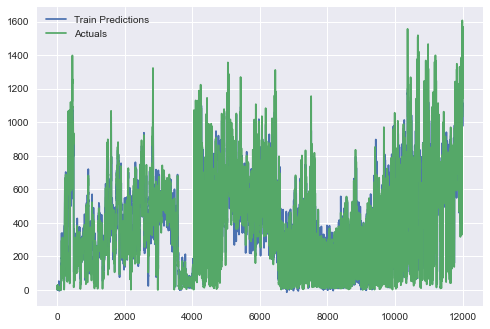

In [23]:
model = load_model('2H_Forecast/2H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(2,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 3 hours forecast

In [24]:
%%time

Trainer(3,6,12)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_15 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 14s 16ms/step - loss: 249598.8438 - mean_absolute_error: 409.1784 - val_loss: 359259.1562 - val_mean_absolute_error: 484.2193
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 14ms/step - loss: 238345.6094 - mean_absolute_error: 395.5760 - val_loss: 343749.6562 - val_mean_absolute_error: 468.9292
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 4s 11ms/step - loss: 225980.0469 - mean_absolute_error: 381.8360 - val_loss: 329607.2812 - val_mean_absolute_error: 455.5633
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 4s 12ms/step - loss: 214905.0781 - mean_absolute_error: 369.6278 - val_loss: 316848.0312 - val_mean_absolute_error: 443.6700
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 12ms/step - loss: 204575.7656 - mean_absolute_error: 358.4612 - val_loss: 303636.4688 - val_mean_absolute_error: 431.6583
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 5s 12ms/step - loss: 193918.4531 - mean_absolute_error: 347.0562 - val_loss: 290898.7188 - val_mean_absolute_error: 420.1103
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 4s 12ms/step - loss: 183813.6719 - mean_absolute_error: 336.3382 - val_loss: 278310.5312 - val_mean_absolute_error: 408.6265
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 12ms/step - loss: 173839.2812 - mean_absolute_error: 325.6203 - val_loss: 265792.7188 - val_mean_absolute_error: 397.1667
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 13ms/step - loss: 164001.7188 - mean_absolute_error: 314.8869 - val_loss: 253362.4844 - val_mean_absolute_error: 385.5791
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 14ms/step - loss: 154312.7188 - mean_absolute_error: 304.1720 - val_loss: 240864.7812 - val_mean_absolute_error: 373.7998
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 12ms/step - loss: 144698.4062 - mean_absolute_error: 293.1509 - val_loss: 228612.5625 - val_mean_absolute_error: 361.8199
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 12ms/step - loss: 135556.4062 - mean_absolute_error: 282.5737 - val_loss: 216844.9219 - val_mean_absolute_error: 350.2343
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 13ms/step - loss: 126710.1406 - mean_absolute_error: 272.1175 - val_loss: 205060.7500 - val_mean_absolute_error: 338.2574
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 13ms/step - loss: 118124.1641 - mean_absolute_error: 261.6939 - val_loss: 193582.9062 - val_mean_absolute_error: 326.5416
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 14ms/step - loss: 110003.3672 - mean_absolute_error: 251.5865 - val_loss: 182824.2031 - val_mean_absolute_error: 315.2994
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 6s 16ms/step - loss: 102452.1562 - mean_absolute_error: 241.7843 - val_loss: 172501.0938 - val_mean_absolute_error: 304.4151
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 14ms/step - loss: 95274.0469 - mean_absolute_error: 232.0854 - val_loss: 162237.6250 - val_mean_absolute_error: 293.4206
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 12ms/step - loss: 88246.5000 - mean_absolute_error: 222.2348 - val_loss: 152543.4062 - val_mean_absolute_error: 282.7580
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 12ms/step - loss: 81975.1172 - mean_absolute_error: 213.5301 - val_loss: 143502.8750 - val_mean_absolute_error: 272.5297
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 12ms/step - loss: 76123.3750 - mean_absolute_error: 204.3988 - val_loss: 134702.5781 - val_mean_absolute_error: 262.2547
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 12ms/step - loss: 70629.1719 - mean_absolute_error: 196.0177 - val_loss: 126443.2109 - val_mean_absolute_error: 252.6113
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 15ms/step - loss: 65648.6406 - mean_absolute_error: 187.7775 - val_loss: 118634.5391 - val_mean_absolute_error: 242.8477
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 13ms/step - loss: 61024.0898 - mean_absolute_error: 179.8495 - val_loss: 111324.6172 - val_mean_absolute_error: 233.4567
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 14ms/step - loss: 56929.0586 - mean_absolute_error: 172.5438 - val_loss: 104524.1719 - val_mean_absolute_error: 225.1672
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 12ms/step - loss: 53254.2344 - mean_absolute_error: 165.9613 - val_loss: 98352.9453 - val_mean_absolute_error: 217.5580
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 13ms/step - loss: 50051.4648 - mean_absolute_error: 160.3451 - val_loss: 92735.7891 - val_mean_absolute_error: 210.8555
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 6s 15ms/step - loss: 47191.5781 - mean_absolute_error: 154.9382 - val_loss: 87422.6875 - val_mean_absolute_error: 203.8610
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 13ms/step - loss: 44665.7344 - mean_absolute_error: 150.0750 - val_loss: 82502.4844 - val_mean_absolute_error: 197.3102
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 12ms/step - loss: 42498.7812 - mean_absolute_error: 146.0440 - val_loss: 78429.0000 - val_mean_absolute_error: 191.8389
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 13ms/step - loss: 40611.3750 - mean_absolute_error: 142.2482 - val_loss: 74375.3203 - val_mean_absolute_error: 186.6103
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 16ms/step - loss: 38771.0625 - mean_absolute_error: 138.2389 - val_loss: 70790.6641 - val_mean_absolute_error: 181.5643
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 17ms/step - loss: 37202.7500 - mean_absolute_error: 134.9072 - val_loss: 67533.8828 - val_mean_absolute_error: 178.9128
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 14ms/step - loss: 35820.0430 - mean_absolute_error: 132.2868 - val_loss: 64378.0195 - val_mean_absolute_error: 173.3446
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 16ms/step - loss: 34649.3125 - mean_absolute_error: 129.5784 - val_loss: 61987.8633 - val_mean_absolute_error: 170.8489
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 13ms/step - loss: 33614.0898 - mean_absolute_error: 127.4276 - val_loss: 60281.9609 - val_mean_absolute_error: 167.3532
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 12ms/step - loss: 32713.6680 - mean_absolute_error: 125.7347 - val_loss: 57378.3828 - val_mean_absolute_error: 163.8558
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 14ms/step - loss: 31823.5566 - mean_absolute_error: 123.6063 - val_loss: 55655.0508 - val_mean_absolute_error: 160.5296
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 13ms/step - loss: 31071.4941 - mean_absolute_error: 121.9186 - val_loss: 53762.3867 - val_mean_absolute_error: 157.7540
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 12ms/step - loss: 30449.0078 - mean_absolute_error: 120.5549 - val_loss: 51650.1680 - val_mean_absolute_error: 156.1635
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 5s 14ms/step - loss: 29899.1641 - mean_absolute_error: 119.4061 - val_loss: 50375.9062 - val_mean_absolute_error: 154.4982
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 13ms/step - loss: 29416.2285 - mean_absolute_error: 118.2008 - val_loss: 49107.1328 - val_mean_absolute_error: 151.6396
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 12ms/step - loss: 29028.5215 - mean_absolute_error: 117.5581 - val_loss: 48413.1719 - val_mean_absolute_error: 151.8642
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 28617.6270 - mean_absolute_error: 116.6221 - val_loss: 47273.4961 - val_mean_absolute_error: 148.5868
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 5s 12ms/step - loss: 28230.0039 - mean_absolute_error: 115.6440 - val_loss: 46902.4219 - val_mean_absolute_error: 149.1419
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 4s 12ms/step - loss: 27922.3867 - mean_absolute_error: 114.9895 - val_loss: 45062.0586 - val_mean_absolute_error: 146.2654
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 5s 14ms/step - loss: 27592.2520 - mean_absolute_error: 114.0924 - val_loss: 45537.0117 - val_mean_absolute_error: 145.9403
Epoch 47/100
376/376 [==============================] - 5s 15ms/step - loss: 27363.6621 - mean_absolute_error: 113.8480 - val_loss: 43797.7773 - val_mean_absolute_error: 144.7789
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 5s 13ms/step - loss: 27155.1699 - mean_absolute_error: 113.2827 - val_loss: 43420.8359 - val_mean_absolute_error: 144.7129
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 5s 12ms/step - loss: 26936.3867 - mean_absolute_error: 112.9212 - val_loss: 42826.9336 - val_mean_absolute_error: 142.9236
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 5s 13ms/step - loss: 26794.5273 - mean_absolute_error: 112.6954 - val_loss: 42109.4219 - val_mean_absolute_error: 143.7451
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 12ms/step - loss: 26629.9688 - mean_absolute_error: 112.0492 - val_loss: 41581.8008 - val_mean_absolute_error: 141.5030
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 4s 12ms/step - loss: 26437.7637 - mean_absolute_error: 111.6219 - val_loss: 41358.3398 - val_mean_absolute_error: 141.2115
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 5s 14ms/step - loss: 26306.1562 - mean_absolute_error: 111.4635 - val_loss: 40839.2656 - val_mean_absolute_error: 140.0508
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 5s 13ms/step - loss: 26126.1113 - mean_absolute_error: 111.1269 - val_loss: 40635.1953 - val_mean_absolute_error: 140.1141
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 14ms/step - loss: 26016.2832 - mean_absolute_error: 110.7176 - val_loss: 39998.9766 - val_mean_absolute_error: 140.4186
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 14ms/step - loss: 25938.4336 - mean_absolute_error: 110.3783 - val_loss: 39906.0430 - val_mean_absolute_error: 139.8020
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 5s 14ms/step - loss: 25767.8984 - mean_absolute_error: 110.1920 - val_loss: 39499.8477 - val_mean_absolute_error: 138.4977
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 5s 12ms/step - loss: 25670.0703 - mean_absolute_error: 110.0704 - val_loss: 38987.3594 - val_mean_absolute_error: 138.4576
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 13ms/step - loss: 25594.1562 - mean_absolute_error: 109.6145 - val_loss: 39075.7148 - val_mean_absolute_error: 138.0038
Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 25476.1855 - mean_absolute_error: 109.3119 - val_loss: 38700.1055 - val_mean_absolute_error: 137.6652
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 25372.6660 - mean_absolute_error: 109.2579 - val_loss: 38818.3750 - val_mean_absolute_error: 137.6486
Epoch 62/100
376/376 [==============================] - 5s 14ms/step - loss: 25338.5430 - mean_absolute_error: 109.0254 - val_loss: 38401.9961 - val_mean_absolute_error: 136.7427
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 5s 15ms/step - loss: 25252.3027 - mean_absolute_error: 108.8549 - val_loss: 38159.8750 - val_mean_absolute_error: 136.0917
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 6s 16ms/step - loss: 25123.9727 - mean_absolute_error: 108.4654 - val_loss: 38191.7109 - val_mean_absolute_error: 135.3832
Epoch 65/100
376/376 [==============================] - 6s 16ms/step - loss: 25114.5195 - mean_absolute_error: 108.3599 - val_loss: 37550.9102 - val_mean_absolute_error: 135.8073
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 4s 12ms/step - loss: 24977.2246 - mean_absolute_error: 108.1517 - val_loss: 37865.9414 - val_mean_absolute_error: 135.6302
Epoch 67/100
376/376 [==============================] - 4s 11ms/step - loss: 24992.5723 - mean_absolute_error: 108.0887 - val_loss: 37526.0586 - val_mean_absolute_error: 135.4882
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 5s 13ms/step - loss: 24863.1602 - mean_absolute_error: 107.8170 - val_loss: 37411.9453 - val_mean_absolute_error: 135.2077
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 11ms/step - loss: 24818.8418 - mean_absolute_error: 107.5872 - val_loss: 37227.3828 - val_mean_absolute_error: 135.0691
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 5s 14ms/step - loss: 24734.4043 - mean_absolute_error: 107.4309 - val_loss: 37044.9922 - val_mean_absolute_error: 134.2140
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 5s 14ms/step - loss: 24707.6074 - mean_absolute_error: 107.2339 - val_loss: 37232.7305 - val_mean_absolute_error: 134.2069
Epoch 72/100
376/376 [==============================] - 5s 13ms/step - loss: 24635.7637 - mean_absolute_error: 107.0648 - val_loss: 37062.2695 - val_mean_absolute_error: 134.6595
Epoch 73/100
376/376 [==============================] - 4s 12ms/step - loss: 24667.0059 - mean_absolute_error: 107.3677 - val_loss: 36705.5703 - val_mean_absolute_error: 133.5078
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 5s 13ms/step - loss: 24503.8965 - mean_absolute_error: 106.6977 - val_loss: 37562.5039 - val_mean_absolute_error: 134.3430
Epoch 75/100
376/376 [==============================] - 5s 13ms/step - loss: 24448.4180 - mean_absolute_error: 106.8512 - val_loss: 36632.2812 - val_mean_absolute_error: 132.9441
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 5s 13ms/step - loss: 24367.7266 - mean_absolute_error: 106.3110 - val_loss: 36089.3281 - val_mean_absolute_error: 134.3502
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 5s 13ms/step - loss: 24354.2168 - mean_absolute_error: 106.8309 - val_loss: 36180.7266 - val_mean_absolute_error: 133.6783
Epoch 78/100
376/376 [==============================] - 5s 13ms/step - loss: 24310.1855 - mean_absolute_error: 106.0669 - val_loss: 36480.3438 - val_mean_absolute_error: 133.1370
Epoch 79/100
376/376 [==============================] - 6s 16ms/step - loss: 24235.2715 - mean_absolute_error: 106.2000 - val_loss: 35982.8867 - val_mean_absolute_error: 134.2343
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 5s 14ms/step - loss: 24234.6367 - mean_absolute_error: 106.1690 - val_loss: 35980.7617 - val_mean_absolute_error: 133.4722
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 5s 13ms/step - loss: 24133.0312 - mean_absolute_error: 105.9840 - val_loss: 36150.0273 - val_mean_absolute_error: 133.5188
Epoch 82/100
376/376 [==============================] - 5s 14ms/step - loss: 24121.0508 - mean_absolute_error: 105.9500 - val_loss: 36009.9883 - val_mean_absolute_error: 132.0883
Epoch 83/100
376/376 [==============================] - 5s 14ms/step - loss: 24052.2734 - mean_absolute_error: 105.7297 - val_loss: 36109.2734 - val_mean_absolute_error: 132.3995
Epoch 84/100
376/376 [==============================] - 6s 15ms/step - loss: 24016.0488 - mean_absolute_error: 105.6498 - val_loss: 35882.6875 - val_mean_absolute_error: 131.5831
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 5s 14ms/step - loss: 23925.3867 - mean_absolute_error: 105.2464 - val_loss: 35340.9062 - val_mean_absolute_error: 131.3654
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 5s 14ms/step - loss: 23937.1543 - mean_absolute_error: 105.3825 - val_loss: 35995.8398 - val_mean_absolute_error: 131.5119
Epoch 87/100
376/376 [==============================] - 5s 14ms/step - loss: 23912.4824 - mean_absolute_error: 105.4298 - val_loss: 36008.3164 - val_mean_absolute_error: 132.0867
Epoch 88/100
376/376 [==============================] - 6s 16ms/step - loss: 23830.5430 - mean_absolute_error: 105.0883 - val_loss: 35660.5859 - val_mean_absolute_error: 131.9383
Epoch 89/100
376/376 [==============================] - 5s 13ms/step - loss: 23793.0195 - mean_absolute_error: 105.2388 - val_loss: 35363.4023 - val_mean_absolute_error: 132.5923
Epoch 90/100
376/376 [==============================] - 6s 15ms/step - loss: 23792.2070 - mean_absolute_error: 105.3392 - val_loss: 35212.6914 - val_mean_absolute_error: 131.6892
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 5s 13ms/step - loss: 23752.9941 - mean_absolute_error: 104.8699 - val_loss: 35551.5625 - val_mean_absolute_error: 131.2980
Epoch 92/100
376/376 [==============================] - 5s 12ms/step - loss: 23738.4395 - mean_absolute_error: 104.9033 - val_loss: 35440.3828 - val_mean_absolute_error: 132.2550
Epoch 93/100
376/376 [==============================] - 5s 12ms/step - loss: 23724.3242 - mean_absolute_error: 104.9382 - val_loss: 34994.6016 - val_mean_absolute_error: 131.7903
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 5s 13ms/step - loss: 23677.3086 - mean_absolute_error: 104.9738 - val_loss: 35247.3047 - val_mean_absolute_error: 133.1599
Epoch 95/100
376/376 [==============================] - 5s 13ms/step - loss: 23652.1484 - mean_absolute_error: 104.6680 - val_loss: 35341.3711 - val_mean_absolute_error: 131.1760
Epoch 96/100
376/376 [==============================] - 5s 13ms/step - loss: 23544.2637 - mean_absolute_error: 104.3387 - val_loss: 34763.2539 - val_mean_absolute_error: 131.2719
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 6s 16ms/step - loss: 23579.0977 - mean_absolute_error: 104.6628 - val_loss: 34994.5352 - val_mean_absolute_error: 131.6927
Epoch 98/100
376/376 [==============================] - 6s 15ms/step - loss: 23497.5605 - mean_absolute_error: 104.5028 - val_loss: 36275.6055 - val_mean_absolute_error: 132.1893
Epoch 99/100
376/376 [==============================] - 6s 15ms/step - loss: 23496.9141 - mean_absolute_error: 104.1963 - val_loss: 36587.7695 - val_mean_absolute_error: 132.5681
Epoch 100/100
376/376 [==============================] - 8s 20ms/step - loss: 23478.6074 - mean_absolute_error: 104.2619 - val_loss: 35090.8281 - val_mean_absolute_error: 131.46155.5352 - mean_

-----------------------------------------------------------------------------------------------------------

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidi

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 16ms/step - loss: 236467.8125 - mean_absolute_error: 393.2522 - val_loss: 338444.0312 - val_mean_absolute_error: 463.4347
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 20ms/step - loss: 218791.0000 - mean_absolute_error: 373.7884 - val_loss: 318761.6875 - val_mean_absolute_error: 445.4116
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 15ms/step - loss: 205144.8750 - mean_absolute_error: 359.0463 - val_loss: 302697.9062 - val_mean_absolute_error: 430.7603
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 14ms/step - loss: 191500.9375 - mean_absolute_error: 344.3844 - val_loss: 285157.9062 - val_mean_absolute_error: 414.8597
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 16ms/step - loss: 177289.9375 - mean_absolute_error: 329.2949 - val_loss: 267648.5938 - val_mean_absolute_error: 398.8939
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 18ms/step - loss: 164335.8125 - mean_absolute_error: 315.3256 - val_loss: 251914.0469 - val_mean_absolute_error: 384.2414
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 13ms/step - loss: 152098.0000 - mean_absolute_error: 301.5830 - val_loss: 236528.3594 - val_mean_absolute_error: 369.5495
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 16ms/step - loss: 140553.6719 - mean_absolute_error: 288.4032 - val_loss: 221615.9531 - val_mean_absolute_error: 354.7450
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 12ms/step - loss: 129511.4922 - mean_absolute_error: 275.4028 - val_loss: 207465.7188 - val_mean_absolute_error: 340.6666
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 17ms/step - loss: 119288.2812 - mean_absolute_error: 263.1289 - val_loss: 194089.9219 - val_mean_absolute_error: 326.7298
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 16ms/step - loss: 109713.4688 - mean_absolute_error: 250.9225 - val_loss: 181311.2969 - val_mean_absolute_error: 313.3310
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 14ms/step - loss: 100812.1797 - mean_absolute_error: 239.3736 - val_loss: 169221.8125 - val_mean_absolute_error: 300.2976
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 14ms/step - loss: 92564.8047 - mean_absolute_error: 228.1151 - val_loss: 157828.3906 - val_mean_absolute_error: 288.1647
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 17ms/step - loss: 85058.1797 - mean_absolute_error: 217.8379 - val_loss: 147212.2656 - val_mean_absolute_error: 276.4584
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 5s 14ms/step - loss: 78034.2578 - mean_absolute_error: 207.6089 - val_loss: 136725.0938 - val_mean_absolute_error: 264.4089
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 7s 18ms/step - loss: 71633.2734 - mean_absolute_error: 197.5195 - val_loss: 127219.0625 - val_mean_absolute_error: 253.5303
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 14ms/step - loss: 65980.5547 - mean_absolute_error: 188.6458 - val_loss: 118440.0469 - val_mean_absolute_error: 243.3927
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 6s 15ms/step - loss: 60831.6445 - mean_absolute_error: 180.2410 - val_loss: 110144.6094 - val_mean_absolute_error: 233.1074
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 56255.5742 - mean_absolute_error: 172.3462 - val_loss: 102555.0156 - val_mean_absolute_error: 223.1635
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 6s 17ms/step - loss: 52219.1836 - mean_absolute_error: 164.9662 - val_loss: 95569.2109 - val_mean_absolute_error: 214.3191
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 18ms/step - loss: 48485.9219 - mean_absolute_error: 157.4397 - val_loss: 89236.7969 - val_mean_absolute_error: 205.9660
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 14ms/step - loss: 45300.9883 - mean_absolute_error: 150.8744 - val_loss: 83692.7812 - val_mean_absolute_error: 198.2109
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 17ms/step - loss: 42489.7734 - mean_absolute_error: 145.0776 - val_loss: 78076.0703 - val_mean_absolute_error: 190.1928
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 15ms/step - loss: 40122.2031 - mean_absolute_error: 140.2626 - val_loss: 73560.3047 - val_mean_absolute_error: 184.3762
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 13ms/step - loss: 38123.3438 - mean_absolute_error: 136.3865 - val_loss: 69278.0000 - val_mean_absolute_error: 178.2869
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 17ms/step - loss: 36284.5430 - mean_absolute_error: 132.4977 - val_loss: 65833.7344 - val_mean_absolute_error: 174.6705
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 19ms/step - loss: 34727.4492 - mean_absolute_error: 129.3550 - val_loss: 63105.9727 - val_mean_absolute_error: 170.1405
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 19ms/step - loss: 33386.5586 - mean_absolute_error: 126.6168 - val_loss: 60035.6914 - val_mean_absolute_error: 166.0299
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 17ms/step - loss: 32273.5254 - mean_absolute_error: 124.3261 - val_loss: 56819.0078 - val_mean_absolute_error: 161.0633
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 8s 20ms/step - loss: 31300.1035 - mean_absolute_error: 122.2355 - val_loss: 54547.0625 - val_mean_absolute_error: 158.3698_absolute_error: 12 - ETA: 1s - loss: 30709.7852 - mean_
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 14ms/step - loss: 30531.3809 - mean_absolute_error: 120.7353 - val_loss: 53481.0000 - val_mean_absolute_error: 156.6364
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 16ms/step - loss: 29831.8750 - mean_absolute_error: 119.3335 - val_loss: 51252.4453 - val_mean_absolute_error: 153.0843
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 17ms/step - loss: 29257.9688 - mean_absolute_error: 118.0437 - val_loss: 49645.5352 - val_mean_absolute_error: 153.8062 - loss: 29595.6777 - me
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 7s 18ms/step - loss: 28672.4180 - mean_absolute_error: 116.6878 - val_loss: 49437.5742 - val_mean_absolute_error: 150.4137
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 13ms/step - loss: 28161.3555 - mean_absolute_error: 115.2040 - val_loss: 47394.2812 - val_mean_absolute_error: 147.8787
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 13ms/step - loss: 27733.8926 - mean_absolute_error: 114.4264 - val_loss: 45845.4648 - val_mean_absolute_error: 146.3165
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 13ms/step - loss: 27388.2852 - mean_absolute_error: 113.5216 - val_loss: 45412.5547 - val_mean_absolute_error: 144.3676
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 17ms/step - loss: 27103.3203 - mean_absolute_error: 112.7505 - val_loss: 44571.2578 - val_mean_absolute_error: 143.5695
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 16ms/step - loss: 26707.7500 - mean_absolute_error: 111.7750 - val_loss: 43219.6797 - val_mean_absolute_error: 141.8193
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 17ms/step - loss: 26470.3242 - mean_absolute_error: 111.3538 - val_loss: 42986.5664 - val_mean_absolute_error: 141.0985
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 19ms/step - loss: 26246.7812 - mean_absolute_error: 110.9102 - val_loss: 43240.3359 - val_mean_absolute_error: 140.8497
Epoch 43/100
376/376 [==============================] - 7s 19ms/step - loss: 26086.1133 - mean_absolute_error: 110.6512 - val_loss: 42718.7695 - val_mean_absolute_error: 140.5730
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 17ms/step - loss: 25845.9863 - mean_absolute_error: 110.0007 - val_loss: 41604.3633 - val_mean_absolute_error: 139.8236
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 17ms/step - loss: 25644.7207 - mean_absolute_error: 109.8329 - val_loss: 40688.6914 - val_mean_absolute_error: 139.3897
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 25520.6387 - mean_absolute_error: 109.1049 - val_loss: 41134.4883 - val_mean_absolute_error: 138.3539
Epoch 47/100
376/376 [==============================] - 7s 18ms/step - loss: 25376.3672 - mean_absolute_error: 109.3451 - val_loss: 40485.9180 - val_mean_absolute_error: 137.4145
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 16ms/step - loss: 25270.9355 - mean_absolute_error: 108.8207 - val_loss: 38881.6602 - val_mean_absolute_error: 136.4166
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 17ms/step - loss: 25095.1543 - mean_absolute_error: 108.3449 - val_loss: 39758.8164 - val_mean_absolute_error: 136.3460
Epoch 50/100
376/376 [==============================] - 7s 18ms/step - loss: 25040.2383 - mean_absolute_error: 107.9665 - val_loss: 39768.4258 - val_mean_absolute_error: 136.7891s: 25316.837
Epoch 51/100
376/376 [==============================] - 6s 16ms/step - loss: 24945.3008 - mean_absolute_error: 107.7896 - val_loss: 38339.2617 - val_mean_absolute_error: 134.5505
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 6s 15ms/step - loss: 24721.5176 - mean_absolute_error: 107.1330 - val_loss: 39267.1602 - val_mean_absolute_error: 136.0122
Epoch 53/100
376/376 [==============================] - 5s 14ms/step - loss: 24659.6543 - mean_absolute_error: 106.8689 - val_loss: 38477.9336 - val_mean_absolute_error: 136.0533
Epoch 54/100
376/376 [==============================] - 5s 14ms/step - loss: 24513.3457 - mean_absolute_error: 107.1266 - val_loss: 38026.7656 - val_mean_absolute_error: 134.5477
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 6s 17ms/step - loss: 24361.9531 - mean_absolute_error: 106.5127 - val_loss: 38707.9961 - val_mean_absolute_error: 135.5597
Epoch 56/100
376/376 [==============================] - 6s 16ms/step - loss: 24232.1348 - mean_absolute_error: 105.9892 - val_loss: 38604.8320 - val_mean_absolute_error: 134.6644
Epoch 57/100
376/376 [==============================] - 6s 16ms/step - loss: 24160.2988 - mean_absolute_error: 105.8714 - val_loss: 38023.5547 - val_mean_absolute_error: 132.8394857.
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 6s 16ms/step - loss: 24055.7227 - mean_absolute_error: 105.6478 - val_loss: 37644.8203 - val_mean_absolute_error: 133.4038
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 6s 17ms/step - loss: 23907.4238 - mean_absolute_error: 105.0537 - val_loss: 36738.1406 - val_mean_absolute_error: 132.3696
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 7s 18ms/step - loss: 23878.2617 - mean_absolute_error: 105.1183 - val_loss: 37393.5078 - val_mean_absolute_error: 134.5609
Epoch 61/100
376/376 [==============================] - 6s 17ms/step - loss: 23808.9375 - mean_absolute_error: 104.8848 - val_loss: 36532.7500 - val_mean_absolute_error: 135.5112
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 6s 15ms/step - loss: 23770.0820 - mean_absolute_error: 104.4788 - val_loss: 36582.0820 - val_mean_absolute_error: 130.5472
Epoch 63/100
376/376 [==============================] - 7s 19ms/step - loss: 23695.0742 - mean_absolute_error: 104.2664 - val_loss: 36906.4922 - val_mean_absolute_error: 133.8148
Epoch 64/100
376/376 [==============================] - 6s 16ms/step - loss: 23555.1543 - mean_absolute_error: 104.1645 - val_loss: 35992.3359 - val_mean_absolute_error: 132.6754
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 6s 16ms/step - loss: 23500.8828 - mean_absolute_error: 103.8709 - val_loss: 36881.8750 - val_mean_absolute_error: 131.2890
Epoch 66/100
376/376 [==============================] - 6s 15ms/step - loss: 23395.7012 - mean_absolute_error: 103.7071 - val_loss: 36420.1016 - val_mean_absolute_error: 130.3649
Epoch 67/100
376/376 [==============================] - 6s 15ms/step - loss: 23305.1211 - mean_absolute_error: 103.2928 - val_loss: 36590.3203 - val_mean_absolute_error: 130.9764
Epoch 68/100
376/376 [==============================] - 6s 15ms/step - loss: 23338.5898 - mean_absolute_error: 103.3159 - val_loss: 36572.2070 - val_mean_absolute_error: 131.2636
Epoch 69/100
376/376 [==============================] - 6s 16ms/step - loss: 23230.3555 - mean_absolute_error: 103.2134 - val_loss: 37107.7070 - val_mean_absolute_error: 132.5244
Epoch 70/100
376/376 [==============================] - 6s 16ms/step - loss: 23171.8887 - mean_absolute_e

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 6s 16ms/step - loss: 23070.3535 - mean_absolute_error: 102.7249 - val_loss: 36291.4766 - val_mean_absolute_error: 129.3290012.9629 - mean_absolute_error:  - ETA: 1s - loss: 22733.1016 - mean_absolute_error: 10 - ETA: 1s - loss: 22907.3340 - 
Epoch 72/100
376/376 [==============================] - 6s 17ms/step - loss: 23034.7988 - mean_absolute_error: 102.4971 - val_loss: 35668.9453 - val_mean_absolute_error: 130.1680
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 7s 18ms/step - loss: 23004.8184 - mean_absolute_error: 102.2837 - val_loss: 36465.7344 - val_mean_absolute_error: 132.8565
Epoch 74/100
376/376 [==============================] - 6s 17ms/step - loss: 22967.7148 - mean_absolute_error: 102.2901 - val_loss: 36461.0469 - val_mean_absolute_error: 130.6973
Epoch 75/100
376/376 [==============================] - 6s 16ms/step - loss: 22926.6816 - mean_absolute_error: 102.1333 - val_loss: 35676.1367 - val_mean_absolute_error: 128.9617
Epoch 76/100
376/376 [==============================] - 6s 15ms/step - loss: 22850.7266 - mean_absolute_error: 101.6656 - val_loss: 36387.5000 - val_mean_absolute_error: 130.2988
Epoch 77/100
376/376 [==============================] - 6s 15ms/step - loss: 22885.0547 - mean_absolute_error: 102.0521 - val_loss: 36545.0430 - val_mean_absolute_error: 130.4296
Epoch 78/100
376/376 [==============================] - 6s 15ms/step - loss: 22761.7109 - mean_absolute_e

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 6s 17ms/step - loss: 22732.6152 - mean_absolute_error: 101.5655 - val_loss: 35411.7578 - val_mean_absolute_error: 129.9404
Epoch 82/100
376/376 [==============================] - 6s 17ms/step - loss: 22534.6836 - mean_absolute_error: 100.8822 - val_loss: 35421.7578 - val_mean_absolute_error: 131.1599
Epoch 83/100
376/376 [==============================] - 6s 17ms/step - loss: 22486.8711 - mean_absolute_error: 100.7789 - val_loss: 35263.8984 - val_mean_absolute_error: 130.3461- mean_absolute_error: 100
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 6s 17ms/step - loss: 22412.5527 - mean_absolute_error: 100.4608 - val_loss: 35865.9297 - val_mean_absolute_error: 129.8857
Epoch 85/100
376/376 [==============================] - 7s 18ms/step - loss: 22436.1973 - mean_absolute_error: 100.5853 - val_loss: 35241.5547 - val_mean_absolute_error: 129.8307
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 7s 18ms/step - loss: 22478.5059 - mean_absolute_error: 100.6368 - val_loss: 34874.0703 - val_mean_absolute_error: 128.20163s - loss: 22317.1309 - mean_absolute_er - ETA: 3s 
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 6s 16ms/step - loss: 22366.7773 - mean_absolute_error: 100.4674 - val_loss: 35679.2695 - val_mean_absolute_error: 130.6897
Epoch 88/100
376/376 [==============================] - 6s 16ms/step - loss: 22332.8906 - mean_absolute_error: 100.3814 - val_loss: 34860.2227 - val_mean_absolute_error: 131.0443
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 7s 18ms/step - loss: 22249.4375 - mean_absolute_error: 99.9962 - val_loss: 34951.3438 - val_mean_absolute_error: 130.1413
Epoch 90/100
376/376 [==============================] - 6s 17ms/step - loss: 22154.6523 - mean_absolute_error: 100.0201 - val_loss: 35028.6289 - val_mean_absolute_error: 129.3565991.5723 
Epoch 91/100
376/376 [==============================] - 6s 17ms/step - loss: 22235.0742 - mean_absolute_error: 99.8244 - val_loss: 34863.1055 - val_mean_absolute_error: 128.1693
Epoch 92/100
376/376 [==============================] - 6s 17ms/step - loss: 22064.3574 - mean_absolute_error: 99.6206 - val_loss: 36286.5547 - val_mean_absolute_error: 131.1982
Epoch 93/100
376/376 [==============================] - 6s 17ms/step - loss: 22151.7578 - mean_absolute_error: 99.9964 - val_loss: 34932.8203 - val_mean_absolute_error: 127.5985
Epoch 94/100
376/376 [==============================] - 6s 17ms/step - loss: 22114.7090 - mean_absol

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 7s 17ms/step - loss: 22003.0156 - mean_absolute_error: 99.3133 - val_loss: 34793.1328 - val_mean_absolute_error: 127.9992
Epoch 97/100
376/376 [==============================] - 6s 16ms/step - loss: 21930.2891 - mean_absolute_error: 99.1244 - val_loss: 35649.5547 - val_mean_absolute_error: 131.7903 - loss: 22359.0391 - me
Epoch 98/100
376/376 [==============================] - 6s 15ms/step - loss: 21873.2207 - mean_absolute_error: 99.0215 - val_loss: 35296.0000 - val_mean_absolute_error: 131.4254
Epoch 99/100
376/376 [==============================] - 6s 15ms/step - loss: 21854.0293 - mean_absolute_error: 98.9768 - val_loss: 34730.3789 - val_mean_absolute_error: 128.5041
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 6s 16ms/step - loss: 21812.5566 - mean_absolute_error: 98.8874 - val_loss: 34858.2773 - val_mean_absolute_error: 128.9334

-----------------------------------------------------------------------------------------------------------

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_17 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 13s 21ms/step - loss: 250818.3281 -

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 17ms/step - loss: 240598.5625 - mean_absolute_error: 398.1925 - val_loss: 344695.7188 - val_mean_absolute_error: 469.9577
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 6s 16ms/step - loss: 226458.9844 - mean_absolute_error: 382.3445 - val_loss: 329322.9062 - val_mean_absolute_error: 455.2741
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 16ms/step - loss: 214423.3438 - mean_absolute_error: 369.0503 - val_loss: 314899.3438 - val_mean_absolute_error: 441.8575
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 19ms/step - loss: 202155.2500 - mean_absolute_error: 355.7609 - val_loss: 299510.7500 - val_mean_absolute_error: 427.8893
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 16ms/step - loss: 189870.4375 - mean_absolute_error: 342.6448 - val_loss: 284465.4688 - val_mean_absolute_error: 414.2007
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 8s 22ms/step - loss: 177907.0000 - mean_absolute_error: 329.8257 - val_loss: 269687.1250 - val_mean_absolute_error: 400.6558
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 17ms/step - loss: 166195.5000 - mean_absolute_error: 317.1416 - val_loss: 254964.2969 - val_mean_absolute_error: 387.0414
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 17ms/step - loss: 154488.5469 - mean_absolute_error: 304.3619 - val_loss: 239880.0781 - val_mean_absolute_error: 372.8670
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 15ms/step - loss: 143189.5469 - mean_absolute_error: 291.6345 - val_loss: 225649.7188 - val_mean_absolute_error: 359.0604
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 16ms/step - loss: 132534.5938 - mean_absolute_error: 279.2313 - val_loss: 211705.1250 - val_mean_absolute_error: 345.1769
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 18ms/step - loss: 122368.3438 - mean_absolute_error: 267.2074 - val_loss: 198562.2188 - val_mean_absolute_error: 332.0183
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 18ms/step - loss: 112856.0391 - mean_absolute_error: 255.8139 - val_loss: 185690.9688 - val_mean_absolute_error: 318.7397
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 8s 22ms/step - loss: 103777.9609 - mean_absolute_error: 244.2236 - val_loss: 173624.6406 - val_mean_absolute_error: 305.9975
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 21ms/step - loss: 95499.8828 - mean_absolute_error: 232.9958 - val_loss: 162284.3438 - val_mean_absolute_error: 293.9934
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 20ms/step - loss: 87928.5234 - mean_absolute_error: 222.8016 - val_loss: 151705.5781 - val_mean_absolute_error: 282.7186
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 16ms/step - loss: 81034.2891 - mean_absolute_error: 212.9666 - val_loss: 141724.2969 - val_mean_absolute_error: 272.0229
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 7s 19ms/step - loss: 74708.3281 - mean_absolute_error: 203.5703 - val_loss: 132239.1719 - val_mean_absolute_error: 261.2697
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 6s 16ms/step - loss: 69003.0391 - mean_absolute_error: 194.8143 - val_loss: 123603.6641 - val_mean_absolute_error: 251.1355
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 15ms/step - loss: 63743.7695 - mean_absolute_error: 185.9610 - val_loss: 115027.6484 - val_mean_absolute_error: 240.8535
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 6s 16ms/step - loss: 59100.8164 - mean_absolute_error: 177.9096 - val_loss: 107437.5859 - val_mean_absolute_error: 231.6255
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 16ms/step - loss: 54779.8047 - mean_absolute_error: 170.4491 - val_loss: 100001.5234 - val_mean_absolute_error: 221.7270
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 18ms/step - loss: 51210.4570 - mean_absolute_error: 163.9821 - val_loss: 93744.0156 - val_mean_absolute_error: 213.9915 1s - loss: 51070.8438 - mean_absol
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 16ms/step - loss: 47878.6250 - mean_absolute_error: 157.5074 - val_loss: 87320.7734 - val_mean_absolute_error: 204.7087
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 14ms/step - loss: 45098.6055 - mean_absolute_error: 151.7880 - val_loss: 82184.7422 - val_mean_absolute_error: 198.5401
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 8s 21ms/step - loss: 42811.6016 - mean_absolute_error: 147.4079 - val_loss: 77741.8438 - val_mean_absolute_error: 192.3356
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 6s 17ms/step - loss: 40782.0820 - mean_absolute_error: 142.9657 - val_loss: 73508.7188 - val_mean_absolute_error: 187.5107
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 19ms/step - loss: 39056.2305 - mean_absolute_error: 139.8308 - val_loss: 69709.0469 - val_mean_absolute_error: 182.2719
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 19ms/step - loss: 37467.8047 - mean_absolute_error: 136.2498 - val_loss: 66276.8047 - val_mean_absolute_error: 177.8602
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 16ms/step - loss: 36143.8047 - mean_absolute_error: 133.4424 - val_loss: 63333.9570 - val_mean_absolute_error: 173.9870
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 7s 18ms/step - loss: 34943.1016 - mean_absolute_error: 131.0144 - val_loss: 61619.9727 - val_mean_absolute_error: 170.5408
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 17ms/step - loss: 33529.6797 - mean_absolute_error: 127.1213 - val_loss: 57792.1445 - val_mean_absolute_error: 165.4238
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 16ms/step - loss: 32367.7305 - mean_absolute_error: 124.6872 - val_loss: 56047.5195 - val_mean_absolute_error: 162.6640
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 16ms/step - loss: 31601.6914 - mean_absolute_error: 123.1712 - val_loss: 53730.2422 - val_mean_absolute_error: 159.4785
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 16ms/step - loss: 30893.6816 - mean_absolute_error: 121.7806 - val_loss: 52012.3789 - val_mean_absolute_error: 156.9033
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 6s 17ms/step - loss: 30304.0586 - mean_absolute_error: 120.2706 - val_loss: 51144.2539 - val_mean_absolute_error: 155.5332
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 29756.9883 - mean_absolute_error: 119.3256 - val_loss: 50151.0703 - val_mean_absolute_error: 154.8825
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 6s 17ms/step - loss: 29151.3633 - mean_absolute_error: 117.3966 - val_loss: 48885.1641 - val_mean_absolute_error: 152.3014
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 19ms/step - loss: 28753.7051 - mean_absolute_error: 116.5633 - val_loss: 48179.8125 - val_mean_absolute_error: 150.4011
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 16ms/step - loss: 28267.7520 - mean_absolute_error: 115.3965 - val_loss: 48325.0234 - val_mean_absolute_error: 149.5273
Epoch 41/100
376/376 [==============================] - 7s 18ms/step - loss: 27828.5781 - mean_absolute_error: 114.4305 - val_loss: 47197.6250 - val_mean_absolute_error: 148.4253
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 16ms/step - loss: 27423.7715 - mean_absolute_error: 113.4039 - val_loss: 45399.4023 - val_mean_absolute_error: 146.1584
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 6s 17ms/step - loss: 27067.2969 - mean_absolute_error: 112.7157 - val_loss: 45542.5430 - val_mean_absolute_error: 146.0233
Epoch 44/100
376/376 [==============================] - 8s 21ms/step - loss: 26731.7070 - mean_absolute_error: 111.9487 - val_loss: 45362.8828 - val_mean_absolute_error: 144.9884
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 5s 14ms/step - loss: 26471.6836 - mean_absolute_error: 111.3073 - val_loss: 43271.2188 - val_mean_absolute_error: 143.1828
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 18ms/step - loss: 26212.0527 - mean_absolute_error: 110.6968 - val_loss: 42813.0000 - val_mean_absolute_error: 140.7722
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 16ms/step - loss: 25927.7832 - mean_absolute_error: 110.0909 - val_loss: 42138.8047 - val_mean_absolute_error: 140.7943
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 16ms/step - loss: 25622.6113 - mean_absolute_error: 109.4292 - val_loss: 42418.7266 - val_mean_absolute_error: 140.1880
Epoch 49/100
376/376 [==============================] - 6s 16ms/step - loss: 25458.8789 - mean_absolute_error: 108.8872 - val_loss: 40948.6406 - val_mean_absolute_error: 138.6156
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 16ms/step - loss: 25192.5762 - mean_absolute_error: 108.4434 - val_loss: 41109.8477 - val_mean_absolute_error: 137.9108
Epoch 51/100
376/376 [==============================] - 6s 16ms/step - loss: 25045.7402 - mean_absolute_error: 108.0133 - val_loss: 39616.9102 - val_mean_absolute_error: 138.8345
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 21ms/step - loss: 24871.2910 - mean_absolute_error: 107.5269 - val_loss: 39732.3906 - val_mean_absolute_error: 136.7134
Epoch 53/100
376/376 [==============================] - 7s 19ms/step - loss: 24630.3320 - mean_absolute_error: 107.3024 - val_loss: 40171.0703 - val_mean_absolute_error: 136.9825
Epoch 54/100
376/376 [==============================] - 9s 23ms/step - loss: 24499.4434 - mean_absolute_error: 107.0943 - val_loss: 39567.2422 - val_mean_absolute_error: 137.4967
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 7s 19ms/step - loss: 24357.4199 - mean_absolute_error: 106.3962 - val_loss: 38879.1250 - val_mean_absolute_error: 135.1309
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 6s 16ms/step - loss: 24150.4727 - mean_absolute_error: 105.9033 - val_loss: 38646.0508 - val_mean_absolute_error: 135.0545
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 7s 18ms/step - loss: 24095.3223 - mean_absolute_error: 106.1310 - val_loss: 39246.2422 - val_mean_absolute_error: 134.7371
Epoch 58/100
376/376 [==============================] - 7s 17ms/step - loss: 23909.7129 - mean_absolute_error: 105.3102 - val_loss: 37822.1211 - val_mean_absolute_error: 133.4643
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 8s 21ms/step - loss: 23840.9785 - mean_absolute_error: 105.0849 - val_loss: 38328.9531 - val_mean_absolute_error: 135.6491
Epoch 60/100
376/376 [==============================] - 8s 21ms/step - loss: 23761.0078 - mean_absolute_error: 104.8923 - val_loss: 37096.8008 - val_mean_absolute_error: 132.4308 ETA: 4s - loss: 23263.6699 - mean_abs - ETA: 2s - loss:
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 8s 20ms/step - loss: 23569.3262 - mean_absolute_error: 104.4808 - val_loss: 38074.8672 - val_mean_absolute_error: 133.2464
Epoch 62/100
376/376 [==============================] - 7s 18ms/step - loss: 23534.0840 - mean_absolute_error: 104.3108 - val_loss: 36921.9727 - val_mean_absolute_error: 132.2360
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 6s 16ms/step - loss: 23392.7266 - mean_absolute_error: 103.8185 - val_loss: 37611.6484 - val_mean_absolute_error: 132.4250
Epoch 64/100
376/376 [==============================] - 6s 17ms/step - loss: 23226.0020 - mean_absolute_error: 103.5197 - val_loss: 37910.2266 - val_mean_absolute_error: 132.2371
Epoch 65/100
376/376 [==============================] - 7s 18ms/step - loss: 23233.9551 - mean_absolute_error: 103.7739 - val_loss: 37176.1289 - val_mean_absolute_error: 132.3985
Epoch 66/100
376/376 [==============================] - 7s 18ms/step - loss: 23186.9121 - mean_absolute_error: 103.4417 - val_loss: 36671.1055 - val_mean_absolute_error: 132.2067
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 8s 22ms/step - loss: 23017.9902 - mean_absolute_error: 102.9910 - val_loss: 36910.9375 - val_mean_absolute_error: 131.1056
Epoch 68/100
376/376 [==============================] - 7s 18ms/step - loss: 22945.9648 - mean_absolute_error: 102.7280 - val_loss: 36113.0547 - val_mean_absolute_error: 130.1731
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 6s 17ms/step - loss: 22827.6719 - mean_absolute_error: 102.3732 - val_loss: 37244.5664 - val_mean_absolute_error: 132.8781
Epoch 70/100
376/376 [==============================] - 6s 15ms/step - loss: 22708.0430 - mean_absolute_error: 102.3326 - val_loss: 36906.6797 - val_mean_absolute_error: 131.1172
Epoch 71/100
376/376 [==============================] - 6s 15ms/step - loss: 22693.6445 - mean_absolute_error: 102.0948 - val_loss: 37981.5156 - val_mean_absolute_error: 131.3810
Epoch 72/100
376/376 [==============================] - 5s 15ms/step - loss: 22643.2441 - mean_absolute_error: 101.8738 - val_loss: 38126.5977 - val_mean_absolute_error: 131.7839
Epoch 73/100
376/376 [==============================] - 5s 15ms/step - loss: 22595.6797 - mean_absolute_error: 101.7719 - val_loss: 37082.7695 - val_mean_absolute_error: 130.2769
Epoch 74/100
376/376 [==============================] - 6s 15ms/step - loss: 22562.6230 - mean_absolute_e

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 8s 22ms/step - loss: 22493.9609 - mean_absolute_error: 101.6385 - val_loss: 35911.7383 - val_mean_absolute_error: 128.9524
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 6s 16ms/step - loss: 22458.3770 - mean_absolute_error: 101.4593 - val_loss: 36968.4258 - val_mean_absolute_error: 129.6902
Epoch 77/100
376/376 [==============================] - 7s 19ms/step - loss: 22399.3555 - mean_absolute_error: 101.3418 - val_loss: 37083.3789 - val_mean_absolute_error: 129.8344
Epoch 78/100
376/376 [==============================] - 8s 20ms/step - loss: 22275.9785 - mean_absolute_error: 100.7822 - val_loss: 35865.2852 - val_mean_absolute_error: 128.4351
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 7s 19ms/step - loss: 22264.0723 - mean_absolute_error: 100.5958 - val_loss: 35816.8555 - val_mean_absolute_error: 129.0485
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 6s 17ms/step - loss: 22173.2383 - mean_absolute_error: 100.6137 - val_loss: 37635.9922 - val_mean_absolute_error: 129.7906
Epoch 81/100
376/376 [==============================] - 7s 18ms/step - loss: 22173.5527 - mean_absolute_error: 100.3296 - val_loss: 35315.9531 - val_mean_absolute_error: 128.9402
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 6s 16ms/step - loss: 22028.0957 - mean_absolute_error: 99.9449 - val_loss: 34923.5039 - val_mean_absolute_error: 127.7704
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 6s 16ms/step - loss: 22053.5527 - mean_absolute_error: 100.3141 - val_loss: 34795.7656 - val_mean_absolute_error: 128.3444
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 5s 14ms/step - loss: 21954.4180 - mean_absolute_error: 99.8507 - val_loss: 35965.7656 - val_mean_absolute_error: 128.5381
Epoch 85/100
376/376 [==============================] - 5s 14ms/step - loss: 21881.9062 - mean_absolute_error: 99.7422 - val_loss: 36958.7188 - val_mean_absolute_error: 129.0084
Epoch 86/100
376/376 [==============================] - 5s 14ms/step - loss: 21835.4902 - mean_absolute_error: 99.4436 - val_loss: 35483.1055 - val_mean_absolute_error: 127.3469
Epoch 87/100
376/376 [==============================] - 5s 14ms/step - loss: 21875.8418 - mean_absolute_error: 99.6506 - val_loss: 36269.5508 - val_mean_absolute_error: 127.9349
Epoch 88/100
376/376 [==============================] - 5s 14ms/step - loss: 21759.4688 - mean_absolute_error: 99.2715 - val_loss: 35532.8945 - val_mean_absolute_error: 128.1571
Epoch 89/100
376/376 [==============================] - 5s 13ms/step - loss: 21728.2734 - mean_absolute_error:

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_8_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_18 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_36 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 17s 25ms/step - loss: 251487.4531 - mean_absolute_error: 411.5357 - val_loss: 363997.3438 - val_mean_absolute_error: 489.5804
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 17ms/step - loss: 245327.0312 - mean_absolute_error: 403.9616 - val_loss: 353821.4375 - val_mean_absolute_error: 479.0511
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 6s 16ms/step - loss: 234882.1250 - mean_absolute_error: 391.8323 - val_loss: 340270.8125 - val_mean_absolute_error: 465.8304
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 7s 20ms/step - loss: 223647.0469 - mean_absolute_error: 379.2410 - val_loss: 326363.4688 - val_mean_absolute_error: 452.5728
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 15ms/step - loss: 211777.0312 - mean_absolute_error: 366.1394 - val_loss: 311147.0312 - val_mean_absolute_error: 438.4896
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 18ms/step - loss: 199039.8125 - mean_absolute_error: 352.3380 - val_loss: 295366.0000 - val_mean_absolute_error: 424.1398
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 6s 17ms/step - loss: 186031.4062 - mean_absolute_error: 338.2804 - val_loss: 279118.8125 - val_mean_absolute_error: 409.3297
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 7s 20ms/step - loss: 172701.7656 - mean_absolute_error: 323.9109 - val_loss: 261727.3750 - val_mean_absolute_error: 393.5238
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 16ms/step - loss: 159353.0000 - mean_absolute_error: 309.3409 - val_loss: 245357.1875 - val_mean_absolute_error: 378.3221
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 16ms/step - loss: 146846.1875 - mean_absolute_error: 295.0504 - val_loss: 229582.7500 - val_mean_absolute_error: 363.1819
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 15ms/step - loss: 134948.9219 - mean_absolute_error: 281.0441 - val_loss: 214319.2500 - val_mean_absolute_error: 348.0919
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 17ms/step - loss: 123548.8594 - mean_absolute_error: 267.3820 - val_loss: 199435.0156 - val_mean_absolute_error: 333.0183
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 18ms/step - loss: 112973.8750 - mean_absolute_error: 254.3668 - val_loss: 185577.9688 - val_mean_absolute_error: 318.7282
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 7s 20ms/step - loss: 103111.1719 - mean_absolute_error: 241.7229 - val_loss: 172182.6719 - val_mean_absolute_error: 304.5747
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 20ms/step - loss: 94013.1172 - mean_absolute_error: 229.5940 - val_loss: 159904.2656 - val_mean_absolute_error: 291.5872
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 6s 17ms/step - loss: 85806.8828 - mean_absolute_error: 218.4774 - val_loss: 148276.8438 - val_mean_absolute_error: 278.6422
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 8s 20ms/step - loss: 78248.5781 - mean_absolute_error: 206.7598 - val_loss: 137496.3281 - val_mean_absolute_error: 267.2103
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 9s 24ms/step - loss: 71514.8125 - mean_absolute_error: 196.8973 - val_loss: 127448.0625 - val_mean_absolute_error: 255.3632
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 21ms/step - loss: 65427.5312 - mean_absolute_error: 186.7065 - val_loss: 118062.6016 - val_mean_absolute_error: 243.7618
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 20ms/step - loss: 60057.9961 - mean_absolute_error: 177.9412 - val_loss: 109556.4844 - val_mean_absolute_error: 233.6183
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 20ms/step - loss: 55388.8086 - mean_absolute_error: 169.8467 - val_loss: 101480.4844 - val_mean_absolute_error: 223.5117
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 18ms/step - loss: 51120.1602 - mean_absolute_error: 162.1407 - val_loss: 94187.7578 - val_mean_absolute_error: 213.6181
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 6s 16ms/step - loss: 47656.6055 - mean_absolute_error: 155.6405 - val_loss: 88040.3828 - val_mean_absolute_error: 206.2448
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 15ms/step - loss: 44665.2695 - mean_absolute_error: 149.6081 - val_loss: 82591.9375 - val_mean_absolute_error: 198.8035
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 7s 19ms/step - loss: 42154.3398 - mean_absolute_error: 144.9115 - val_loss: 77263.7578 - val_mean_absolute_error: 192.1755
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 18ms/step - loss: 40067.9492 - mean_absolute_error: 140.7320 - val_loss: 72992.8672 - val_mean_absolute_error: 186.71264 -
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 19ms/step - loss: 38145.0039 - mean_absolute_error: 136.6684 - val_loss: 68785.3984 - val_mean_absolute_error: 180.9172
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 17ms/step - loss: 36418.3867 - mean_absolute_error: 133.1468 - val_loss: 65205.2109 - val_mean_absolute_error: 175.5999
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 18ms/step - loss: 35012.6680 - mean_absolute_error: 130.1296 - val_loss: 62034.7812 - val_mean_absolute_error: 171.3427
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 18ms/step - loss: 33624.0430 - mean_absolute_error: 126.9965 - val_loss: 58894.1055 - val_mean_absolute_error: 167.2234
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 16ms/step - loss: 32457.0527 - mean_absolute_error: 124.7439 - val_loss: 56930.3750 - val_mean_absolute_error: 163.6276
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 15ms/step - loss: 31485.0312 - mean_absolute_error: 122.5213 - val_loss: 54191.4805 - val_mean_absolute_error: 159.6880
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 21ms/step - loss: 30504.7637 - mean_absolute_error: 120.3395 - val_loss: 52096.7227 - val_mean_absolute_error: 155.7455
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 18ms/step - loss: 29693.9883 - mean_absolute_error: 118.3946 - val_loss: 49979.8945 - val_mean_absolute_error: 153.3175
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 7s 20ms/step - loss: 28952.1328 - mean_absolute_error: 116.6977 - val_loss: 48498.3555 - val_mean_absolute_error: 150.0654
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 19ms/step - loss: 28360.7090 - mean_absolute_error: 115.4135 - val_loss: 47006.4375 - val_mean_absolute_error: 149.1369
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 27745.7715 - mean_absolute_error: 114.1069 - val_loss: 45424.4844 - val_mean_absolute_error: 145.8764
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 21ms/step - loss: 27290.4355 - mean_absolute_error: 112.9335 - val_loss: 44690.6016 - val_mean_absolute_error: 144.710180 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 19ms/step - loss: 26926.9004 - mean_absolute_error: 112.5843 - val_loss: 43217.4883 - val_mean_absolute_error: 142.9496
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 7s 19ms/step - loss: 26496.7539 - mean_absolute_error: 111.4437 - val_loss: 42023.6953 - val_mean_absolute_error: 141.2076
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 9s 25ms/step - loss: 26134.1797 - mean_absolute_error: 110.5798 - val_loss: 41236.8945 - val_mean_absolute_error: 140.5807oss: 26031.3320 - mean_absolute_er
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 18ms/step - loss: 25819.6699 - mean_absolute_error: 109.8764 - val_loss: 40630.0352 - val_mean_absolute_error: 139.0734
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 7s 18ms/step - loss: 25543.2090 - mean_absolute_error: 109.3544 - val_loss: 40305.3672 - val_mean_absolute_error: 137.7645
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 8s 21ms/step - loss: 25252.7754 - mean_absolute_error: 108.3829 - val_loss: 39511.1758 - val_mean_absolute_error: 137.2545
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 16ms/step - loss: 24994.6230 - mean_absolute_error: 107.9943 - val_loss: 38930.5000 - val_mean_absolute_error: 136.2024
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 24719.2207 - mean_absolute_error: 107.2722 - val_loss: 38297.7383 - val_mean_absolute_error: 135.5754
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 8s 21ms/step - loss: 24505.9160 - mean_absolute_error: 106.6585 - val_loss: 38204.4766 - val_mean_absolute_error: 134.6450
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 7s 19ms/step - loss: 24244.6582 - mean_absolute_error: 106.0266 - val_loss: 37852.8008 - val_mean_absolute_error: 133.3441
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 7s 19ms/step - loss: 24021.4668 - mean_absolute_error: 105.3637 - val_loss: 36864.8359 - val_mean_absolute_error: 132.3873
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 16ms/step - loss: 23894.9590 - mean_absolute_error: 105.0362 - val_loss: 37121.1328 - val_mean_absolute_error: 132.3358
Epoch 51/100
376/376 [==============================] - 6s 16ms/step - loss: 23671.8906 - mean_absolute_error: 104.6199 - val_loss: 36271.3555 - val_mean_absolute_error: 131.0770
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 21ms/step - loss: 23527.0684 - mean_absolute_error: 104.3358 - val_loss: 36872.5000 - val_mean_absolute_error: 131.7522
Epoch 53/100
376/376 [==============================] - 7s 20ms/step - loss: 23372.6094 - mean_absolute_error: 103.5015 - val_loss: 35656.4883 - val_mean_absolute_error: 131.8744
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 7s 18ms/step - loss: 23230.2305 - mean_absolute_error: 103.3825 - val_loss: 36189.6875 - val_mean_absolute_error: 130.6352
Epoch 55/100
376/376 [==============================] - 7s 19ms/step - loss: 23044.7891 - mean_absolute_error: 102.9345 - val_loss: 36220.4883 - val_mean_absolute_error: 130.0851
Epoch 56/100
376/376 [==============================] - 7s 18ms/step - loss: 22952.6074 - mean_absolute_error: 102.6222 - val_loss: 35685.4336 - val_mean_absolute_error: 129.3735
Epoch 57/100
376/376 [==============================] - 6s 16ms/step - loss: 22851.0684 - mean_absolute_error: 102.3482 - val_loss: 35022.8086 - val_mean_absolute_error: 128.7835
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 7s 20ms/step - loss: 22613.3184 - mean_absolute_error: 101.6120 - val_loss: 34889.0078 - val_mean_absolute_error: 128.7303
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 6s 16ms/step - loss: 22504.8027 - mean_absolute_error: 101.2922 - val_loss: 35262.6016 - val_mean_absolute_error: 128.2555
Epoch 60/100
376/376 [==============================] - 6s 17ms/step - loss: 22320.6914 - mean_absolute_error: 100.7690 - val_loss: 35024.5547 - val_mean_absolute_error: 128.1646
Epoch 61/100
376/376 [==============================] - 6s 17ms/step - loss: 22223.2852 - mean_absolute_error: 100.4161 - val_loss: 35661.0156 - val_mean_absolute_error: 128.4302
Epoch 62/100
376/376 [==============================] - 6s 16ms/step - loss: 22050.8008 - mean_absolute_error: 100.0234 - val_loss: 35761.6992 - val_mean_absolute_error: 128.1245
Epoch 63/100
376/376 [==============================] - 6s 15ms/step - loss: 22029.8516 - mean_absolute_error: 100.0128 - val_loss: 35244.1680 - val_mean_absolute_error: 127.3325
Epoch 64/100
376/376 [==============================] - 6s 16ms/step - loss: 21886.7090 - mean_absolute_e

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 7s 19ms/step - loss: 21236.4180 - mean_absolute_error: 97.4192 - val_loss: 34334.6836 - val_mean_absolute_error: 125.9684
Epoch 73/100
376/376 [==============================] - 7s 20ms/step - loss: 21160.9395 - mean_absolute_error: 97.0085 - val_loss: 34814.7734 - val_mean_absolute_error: 127.0958
Epoch 74/100
376/376 [==============================] - 7s 19ms/step - loss: 21130.2930 - mean_absolute_error: 96.9946 - val_loss: 34670.9453 - val_mean_absolute_error: 127.9907
Epoch 75/100
376/376 [==============================] - 7s 19ms/step - loss: 21221.9492 - mean_absolute_error: 97.3944 - val_loss: 34882.4688 - val_mean_absolute_error: 127.2109
Epoch 76/100
376/376 [==============================] - 7s 20ms/step - loss: 21079.0820 - mean_absolute_error: 96.9787 - val_loss: 35187.2695 - val_mean_absolute_error: 126.7401
Epoch 77/100
376/376 [==============================] - 7s 19ms/step - loss: 20999.4629 - mean_absolute_error:

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 8s 22ms/step - loss: 20435.4922 - mean_absolute_error: 95.0356 - val_loss: 35942.8789 - val_mean_absolute_error: 127.4465
Epoch 91/100
376/376 [==============================] - 8s 20ms/step - loss: 20403.8848 - mean_absolute_error: 95.0882 - val_loss: 34268.8984 - val_mean_absolute_error: 125.7580
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 8s 21ms/step - loss: 20436.6895 - mean_absolute_error: 94.8828 - val_loss: 34789.2656 - val_mean_absolute_error: 125.8822
Epoch 93/100
376/376 [==============================] - 8s 20ms/step - loss: 20383.3457 - mean_absolute_error: 95.0779 - val_loss: 33971.6523 - val_mean_absolute_error: 125.1522
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 7s 18ms/step - loss: 20344.4238 - mean_absolute_error: 94.6984 - val_loss: 34526.2891 - val_mean_absolute_error: 125.4656
Epoch 95/100
376/376 [==============================] - 7s 18ms/step - loss: 20348.5254 - mean_absolute_error: 94.8210 - val_loss: 33569.8320 - val_mean_absolute_error: 125.5218
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 7s 18ms/step - loss: 20206.3496 - mean_absolute_error: 94.3601 - val_loss: 33968.9961 - val_mean_absolute_error: 124.5540
Epoch 97/100
376/376 [==============================] - 8s 22ms/step - loss: 20230.6875 - mean_absolute_error: 94.3064 - val_loss: 33861.4570 - val_mean_absolute_error: 125.1052
Epoch 98/100
376/376 [==============================] - 7s 20ms/step - loss: 20184.6621 - mean_absolute_error: 94.3575 - val_loss: 34446.6250 - val_mean_absolute_error: 125.4353
Epoch 99/100
376/376 [==============================] - 7s 18ms/step - loss: 20174.1191 - mean_absolute_error: 94.4209 - val_loss: 33393.0977 - val_mean_absolute_error: 124.7889
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 6s 17ms/step - loss: 20135.1191 - mean_absolute_error: 94.0257 - val_loss: 33601.3516 - val_mean_absolute_error: 124.1360

-----------------------------------------------------------------------------------------------------------

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_19 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_38 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 14s 19ms/step - loss: 252223.0312 -

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 17ms/step - loss: 245191.2344 - mean_absolute_error: 403.7105 - val_loss: 353557.4688 - val_mean_absolute_error: 478.6957
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 19ms/step - loss: 235020.3438 - mean_absolute_error: 392.0509 - val_loss: 341611.5938 - val_mean_absolute_error: 467.1166
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 7s 18ms/step - loss: 226303.9375 - mean_absolute_error: 382.2620 - val_loss: 331625.5938 - val_mean_absolute_error: 457.4527
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 20ms/step - loss: 217534.7500 - mean_absolute_error: 372.4811 - val_loss: 320627.9688 - val_mean_absolute_error: 447.0923
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 18ms/step - loss: 208527.9844 - mean_absolute_error: 362.5941 - val_loss: 309574.6250 - val_mean_absolute_error: 436.9224
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 18ms/step - loss: 199189.3906 - mean_absolute_error: 352.4923 - val_loss: 297814.5625 - val_mean_absolute_error: 426.2232
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 8s 21ms/step - loss: 189611.5625 - mean_absolute_error: 342.1213 - val_loss: 285998.3438 - val_mean_absolute_error: 415.4395
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 19ms/step - loss: 180006.4844 - mean_absolute_error: 331.7348 - val_loss: 274010.2188 - val_mean_absolute_error: 404.4940
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 7s 19ms/step - loss: 170404.0156 - mean_absolute_error: 321.2206 - val_loss: 261952.5156 - val_mean_absolute_error: 393.4500
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 7s 18ms/step - loss: 160770.3594 - mean_absolute_error: 310.5608 - val_loss: 249625.3438 - val_mean_absolute_error: 381.9622
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 8s 22ms/step - loss: 150979.6094 - mean_absolute_error: 299.4922 - val_loss: 236915.0000 - val_mean_absolute_error: 369.8319
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 19ms/step - loss: 141340.0938 - mean_absolute_error: 288.4620 - val_loss: 224459.3438 - val_mean_absolute_error: 358.0686
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 7s 17ms/step - loss: 132269.8438 - mean_absolute_error: 277.6843 - val_loss: 212560.1094 - val_mean_absolute_error: 346.3514
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 7s 18ms/step - loss: 123495.7266 - mean_absolute_error: 267.1750 - val_loss: 201200.7656 - val_mean_absolute_error: 334.8305
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 8s 20ms/step - loss: 115227.8828 - mean_absolute_error: 256.9503 - val_loss: 190166.7344 - val_mean_absolute_error: 323.5647
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 8s 21ms/step - loss: 107344.1328 - mean_absolute_error: 247.2782 - val_loss: 179658.0156 - val_mean_absolute_error: 312.9197
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 8s 22ms/step - loss: 99967.2031 - mean_absolute_error: 237.9160 - val_loss: 169670.2344 - val_mean_absolute_error: 302.3025
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 22ms/step - loss: 93008.1016 - mean_absolute_error: 228.3324 - val_loss: 160015.8125 - val_mean_absolute_error: 292.1178
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 86477.9141 - mean_absolute_error: 219.0782 - val_loss: 150823.3438 - val_mean_absolute_error: 282.2527
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 19ms/step - loss: 80334.3125 - mean_absolute_error: 209.9797 - val_loss: 141997.9844 - val_mean_absolute_error: 272.0978
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 18ms/step - loss: 74545.0234 - mean_absolute_error: 201.3132 - val_loss: 133272.1094 - val_mean_absolute_error: 261.9884
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 20ms/step - loss: 69199.9141 - mean_absolute_error: 193.0331 - val_loss: 125190.2969 - val_mean_absolute_error: 252.6600
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 8s 20ms/step - loss: 64350.0273 - mean_absolute_error: 185.2568 - val_loss: 117568.6797 - val_mean_absolute_error: 243.3528
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 8s 22ms/step - loss: 59945.5938 - mean_absolute_error: 177.7802 - val_loss: 110573.0625 - val_mean_absolute_error: 235.3757
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 6s 16ms/step - loss: 56095.4102 - mean_absolute_error: 171.3681 - val_loss: 103985.2734 - val_mean_absolute_error: 226.8082
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 8s 20ms/step - loss: 52664.0898 - mean_absolute_error: 165.2511 - val_loss: 98261.6875 - val_mean_absolute_error: 220.0440
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 20ms/step - loss: 49599.1094 - mean_absolute_error: 159.7579 - val_loss: 92396.2500 - val_mean_absolute_error: 212.2747
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 19ms/step - loss: 46617.2852 - mean_absolute_error: 153.4734 - val_loss: 86828.5469 - val_mean_absolute_error: 204.1565
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 8s 22ms/step - loss: 44235.4648 - mean_absolute_error: 148.9681 - val_loss: 82612.0625 - val_mean_absolute_error: 199.1791
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 8s 23ms/step - loss: 42242.4961 - mean_absolute_error: 145.2272 - val_loss: 78234.3438 - val_mean_absolute_error: 193.6983
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 17ms/step - loss: 40554.6172 - mean_absolute_error: 141.9564 - val_loss: 74609.6797 - val_mean_absolute_error: 189.6283
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 7s 19ms/step - loss: 39056.7695 - mean_absolute_error: 138.9563 - val_loss: 71296.8828 - val_mean_absolute_error: 185.0669
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 18ms/step - loss: 37769.2148 - mean_absolute_error: 136.3660 - val_loss: 68060.6328 - val_mean_absolute_error: 181.1742
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 20ms/step - loss: 36537.7461 - mean_absolute_error: 133.6087 - val_loss: 65502.2266 - val_mean_absolute_error: 177.9114
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 19ms/step - loss: 35472.9570 - mean_absolute_error: 131.3981 - val_loss: 62586.6836 - val_mean_absolute_error: 174.0639
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 34496.9922 - mean_absolute_error: 129.3634 - val_loss: 61016.5430 - val_mean_absolute_error: 171.5830
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 22ms/step - loss: 33637.3086 - mean_absolute_error: 127.4414 - val_loss: 59313.7266 - val_mean_absolute_error: 168.7877
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 20ms/step - loss: 32936.6250 - mean_absolute_error: 125.8176 - val_loss: 57202.9414 - val_mean_absolute_error: 165.9289
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 9s 23ms/step - loss: 32246.8203 - mean_absolute_error: 124.3735 - val_loss: 55453.4805 - val_mean_absolute_error: 163.6800
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 7s 19ms/step - loss: 31646.7637 - mean_absolute_error: 122.8149 - val_loss: 55642.0898 - val_mean_absolute_error: 162.7720
Epoch 42/100
376/376 [==============================] - 6s 17ms/step - loss: 31002.7305 - mean_absolute_error: 121.3614 - val_loss: 52050.7109 - val_mean_absolute_error: 158.7822
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 7s 18ms/step - loss: 30402.3750 - mean_absolute_error: 119.9768 - val_loss: 51454.3047 - val_mean_absolute_error: 157.0171
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 7s 20ms/step - loss: 29939.6348 - mean_absolute_error: 118.9214 - val_loss: 51738.9570 - val_mean_absolute_error: 156.5085
Epoch 45/100
376/376 [==============================] - 8s 20ms/step - loss: 29576.3535 - mean_absolute_error: 118.2391 - val_loss: 51187.0312 - val_mean_absolute_error: 155.7026
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 29161.7051 - mean_absolute_error: 117.2563 - val_loss: 49607.0312 - val_mean_absolute_error: 153.5823
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 7s 18ms/step - loss: 28753.7812 - mean_absolute_error: 116.2691 - val_loss: 48843.9844 - val_mean_absolute_error: 152.4035
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 17ms/step - loss: 28340.5840 - mean_absolute_error: 115.3427 - val_loss: 47317.1133 - val_mean_absolute_error: 150.5414
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 16ms/step - loss: 28009.8457 - mean_absolute_error: 114.8756 - val_loss: 46801.4531 - val_mean_absolute_error: 149.0416
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 7s 19ms/step - loss: 27701.8457 - mean_absolute_error: 114.0804 - val_loss: 44484.3906 - val_mean_absolute_error: 146.3335
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 7s 18ms/step - loss: 27390.1152 - mean_absolute_error: 113.2702 - val_loss: 45383.1562 - val_mean_absolute_error: 146.7166
Epoch 52/100
376/376 [==============================] - 7s 20ms/step - loss: 27102.2617 - mean_absolute_error: 112.5789 - val_loss: 43845.1406 - val_mean_absolute_error: 144.8265
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 7s 19ms/step - loss: 26853.8633 - mean_absolute_error: 112.1714 - val_loss: 44342.7031 - val_mean_absolute_error: 144.4752
Epoch 54/100
376/376 [==============================] - 7s 20ms/step - loss: 26575.6914 - mean_absolute_error: 111.4146 - val_loss: 42678.9609 - val_mean_absolute_error: 143.8179
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 7s 20ms/step - loss: 26414.1680 - mean_absolute_error: 111.1798 - val_loss: 42214.9492 - val_mean_absolute_error: 141.7271
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 7s 19ms/step - loss: 26173.6895 - mean_absolute_error: 110.5105 - val_loss: 41998.1680 - val_mean_absolute_error: 142.6303
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 9s 24ms/step - loss: 25898.5781 - mean_absolute_error: 109.8619 - val_loss: 41858.7344 - val_mean_absolute_error: 140.2100
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 8s 21ms/step - loss: 25574.5586 - mean_absolute_error: 109.0232 - val_loss: 40888.7148 - val_mean_absolute_error: 140.0217
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 8s 20ms/step - loss: 25360.3848 - mean_absolute_error: 108.4514 - val_loss: 41004.8594 - val_mean_absolute_error: 138.4663
Epoch 60/100
376/376 [==============================] - 8s 22ms/step - loss: 25139.0352 - mean_absolute_error: 108.3068 - val_loss: 39679.7734 - val_mean_absolute_error: 136.9084
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 7s 19ms/step - loss: 24987.0684 - mean_absolute_error: 107.5433 - val_loss: 40256.2188 - val_mean_absolute_error: 138.0968
Epoch 62/100
376/376 [==============================] - 7s 18ms/step - loss: 24820.2480 - mean_absolute_error: 107.3264 - val_loss: 38951.1758 - val_mean_absolute_error: 135.6873
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 6s 17ms/step - loss: 24673.3379 - mean_absolute_error: 107.0021 - val_loss: 40098.0703 - val_mean_absolute_error: 136.0473
Epoch 64/100
376/376 [==============================] - 6s 16ms/step - loss: 24510.6348 - mean_absolute_error: 106.5065 - val_loss: 38673.2422 - val_mean_absolute_error: 134.7366
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 7s 18ms/step - loss: 24385.6016 - mean_absolute_error: 106.3626 - val_loss: 38106.1055 - val_mean_absolute_error: 134.3215
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 7s 20ms/step - loss: 24249.2891 - mean_absolute_error: 105.9523 - val_loss: 37752.2461 - val_mean_absolute_error: 133.1951
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 8s 21ms/step - loss: 24093.6543 - mean_absolute_error: 105.5902 - val_loss: 38013.5273 - val_mean_absolute_error: 133.8844
Epoch 68/100
376/376 [==============================] - 8s 20ms/step - loss: 24014.5293 - mean_absolute_error: 105.3019 - val_loss: 36958.8555 - val_mean_absolute_error: 132.2065
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 6s 17ms/step - loss: 23841.4746 - mean_absolute_error: 104.9751 - val_loss: 37959.8477 - val_mean_absolute_error: 133.8420A: 2s - loss: 239
Epoch 70/100
376/376 [==============================] - 7s 19ms/step - loss: 23819.1074 - mean_absolute_error: 104.9023 - val_loss: 35917.4492 - val_mean_absolute_error: 131.1520
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 6s 17ms/step - loss: 23641.0566 - mean_absolute_error: 104.4845 - val_loss: 37015.0000 - val_mean_absolute_error: 131.1365
Epoch 72/100
376/376 [==============================] - 6s 16ms/step - loss: 23532.4629 - mean_absolute_error: 103.8706 - val_loss: 37480.9062 - val_mean_absolute_error: 131.9942
Epoch 73/100
376/376 [==============================] - 6s 15ms/step - loss: 23461.6855 - mean_absolute_error: 103.9849 - val_loss: 38407.0391 - val_mean_absolute_error: 132.4019
Epoch 74/100
376/376 [==============================] - 6s 15ms/step - loss: 23300.1895 - mean_absolute_error: 103.6522 - val_loss: 37186.6484 - val_mean_absolute_error: 131.2531
Epoch 75/100
376/376 [==============================] - 6s 15ms/step - loss: 23210.7012 - mean_absolute_error: 103.4885 - val_loss: 36405.8750 - val_mean_absolute_error: 130.3840
Epoch 76/100
376/376 [==============================] - 6s 17ms/step - loss: 23175.1133 - mean_absolute_e

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 8s 22ms/step - loss: 23011.1875 - mean_absolute_error: 102.7435 - val_loss: 35510.5938 - val_mean_absolute_error: 129.6091
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 9s 23ms/step - loss: 22968.9824 - mean_absolute_error: 102.9414 - val_loss: 36704.6914 - val_mean_absolute_error: 129.8045
Epoch 79/100
376/376 [==============================] - 7s 20ms/step - loss: 22917.4453 - mean_absolute_error: 102.4776 - val_loss: 37162.1055 - val_mean_absolute_error: 131.6609
Epoch 80/100
376/376 [==============================] - 7s 19ms/step - loss: 22805.9551 - mean_absolute_error: 102.2597 - val_loss: 37081.7344 - val_mean_absolute_error: 129.7606
Epoch 81/100
376/376 [==============================] - 7s 18ms/step - loss: 22715.9961 - mean_absolute_error: 102.2597 - val_loss: 36275.0195 - val_mean_absolute_error: 129.6027
Epoch 82/100
376/376 [==============================] - 7s 18ms/step - loss: 22590.8594 - mean_absolute_error: 101.6868 - val_loss: 36157.4922 - val_mean_absolute_error: 129.2430
Epoch 83/100
376/376 [==============================] - 7s 18ms/step - loss: 22605.2637 - mean_absolute_e

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 8s 20ms/step - loss: 22435.7520 - mean_absolute_error: 101.4439 - val_loss: 35917.7695 - val_mean_absolute_error: 128.4962
Epoch 86/100
376/376 [==============================] - 9s 23ms/step - loss: 22368.1328 - mean_absolute_error: 101.1611 - val_loss: 35644.7031 - val_mean_absolute_error: 128.8588
Epoch 87/100
376/376 [==============================] - 7s 19ms/step - loss: 22323.3457 - mean_absolute_error: 100.8428 - val_loss: 36088.3906 - val_mean_absolute_error: 128.5353
Epoch 88/100
376/376 [==============================] - 7s 18ms/step - loss: 22213.1055 - mean_absolute_error: 100.7254 - val_loss: 35073.6211 - val_mean_absolute_error: 128.3705
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 7s 18ms/step - loss: 22244.4121 - mean_absolute_error: 100.9092 - val_loss: 36659.9961 - val_mean_absolute_error: 129.0693
Epoch 90/100
376/376 [==============================] - 7s 18ms/step - loss: 22139.7090 - mean_absolute_error: 100.8329 - val_loss: 34807.2461 - val_mean_absolute_error: 130.0887e
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_10_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 6s 17ms/step - loss: 22055.5449 - mean_absolute_error: 100.4221 - val_loss: 35900.9531 - val_mean_absolute_error: 128.7742
Epoch 92/100
376/376 [==============================] - 6s 16ms/step - loss: 21996.5078 - mean_absolute_error: 99.9967 - val_loss: 35001.5820 - val_mean_absolute_error: 127.3538
Epoch 93/100
376/376 [==============================] - 6s 17ms/step - loss: 22036.9102 - mean_absolute_error: 100.0419 - val_loss: 36868.7578 - val_mean_absolute_error: 128.4919
Epoch 94/100
376/376 [==============================] - 6s 16ms/step - loss: 21925.0410 - mean_absolute_error: 99.8530 - val_loss: 36002.0312 - val_mean_absolute_error: 128.4635
Epoch 95/100
376/376 [==============================] - 6s 17ms/step - loss: 21826.5684 - mean_absolute_error: 99.6822 - val_loss: 36248.4844 - val_mean_absolute_error: 129.0904
Epoch 96/100
376/376 [==============================] - 6s 16ms/step - loss: 21697.9746 - mean_absolute_erro

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 9s 24ms/step - loss: 247442.9531 - mean_absolute_error: 406.4206 - val_loss: 357406.2812 - val_mean_absolute_error: 482.7105bsolute_err
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 20ms/step - loss: 240184.7812 - mean_absolute_error: 397.9073 - val_loss: 348744.0938 - val_mean_absolute_error: 474.0673
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 8s 21ms/step - loss: 232888.7812 - mean_absolute_error: 389.5738 - val_loss: 339865.2188 - val_mean_absolute_error: 465.4405
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 8s 20ms/step - loss: 225796.8594 - mean_absolute_error: 381.5905 - val_loss: 331478.5625 - val_mean_absolute_error: 457.3678
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 20ms/step - loss: 218679.1250 - mean_absolute_error: 373.6581 - val_loss: 322709.3125 - val_mean_absolute_error: 449.0487
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 9s 23ms/step - loss: 211398.8906 - mean_absolute_error: 365.6795 - val_loss: 314016.0938 - val_mean_absolute_error: 440.9877
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 8s 21ms/step - loss: 204090.3438 - mean_absolute_error: 357.6896 - val_loss: 304605.7500 - val_mean_absolute_error: 432.3763
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 9s 23ms/step - loss: 196326.2031 - mean_absolute_error: 349.3333 - val_loss: 295196.6875 - val_mean_absolute_error: 423.8851
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 22ms/step - loss: 188721.1094 - mean_absolute_error: 341.1369 - val_loss: 285617.5000 - val_mean_absolute_error: 415.1360
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 8s 20ms/step - loss: 180976.5781 - mean_absolute_error: 332.7501 - val_loss: 276063.0938 - val_mean_absolute_error: 406.3942
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 20ms/step - loss: 173311.8594 - mean_absolute_error: 324.4474 - val_loss: 266503.1875 - val_mean_absolute_error: 397.6522
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 8s 20ms/step - loss: 165699.7344 - mean_absolute_error: 315.9648 - val_loss: 256926.8438 - val_mean_absolute_error: 388.7961
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 10s 26ms/step - loss: 158148.6250 - mean_absolute_error: 307.4712 - val_loss: 247404.7969 - val_mean_absolute_error: 379.8439
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 21ms/step - loss: 150509.5469 - mean_absolute_error: 298.7373 - val_loss: 237446.1562 - val_mean_absolute_error: 370.3228
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 8s 22ms/step - loss: 142641.5625 - mean_absolute_error: 289.6070 - val_loss: 227419.7969 - val_mean_absolute_error: 360.7014
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 11s 30ms/step - loss: 135291.3750 - mean_absolute_error: 280.9751 - val_loss: 217943.5625 - val_mean_absolute_error: 351.4294
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 8s 21ms/step - loss: 128210.5703 - mean_absolute_error: 272.5934 - val_loss: 208781.2656 - val_mean_absolute_error: 342.2555
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 24ms/step - loss: 121261.3984 - mean_absolute_error: 264.0054 - val_loss: 199392.7500 - val_mean_absolute_error: 332.7761
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 9s 24ms/step - loss: 114469.7422 - mean_absolute_error: 255.4050 - val_loss: 190523.8594 - val_mean_absolute_error: 323.5454
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 22ms/step - loss: 108055.2188 - mean_absolute_error: 247.2389 - val_loss: 181876.7969 - val_mean_absolute_error: 314.4555
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 9s 23ms/step - loss: 101794.2969 - mean_absolute_error: 239.1747 - val_loss: 173159.8594 - val_mean_absolute_error: 305.2916
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 11s 29ms/step - loss: 95799.9922 - mean_absolute_error: 230.9509 - val_loss: 164958.1406 - val_mean_absolute_error: 296.1109
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 8s 22ms/step - loss: 90124.8906 - mean_absolute_error: 222.9029 - val_loss: 157043.6406 - val_mean_absolute_error: 287.4916
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 9s 25ms/step - loss: 84705.5938 - mean_absolute_error: 214.9281 - val_loss: 149217.8125 - val_mean_absolute_error: 278.5356s - loss: 85697.1562 - me
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 8s 22ms/step - loss: 79511.2344 - mean_absolute_error: 207.2260 - val_loss: 141759.7031 - val_mean_absolute_error: 270.2923 loss: 79922.8
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 20ms/step - loss: 74693.4141 - mean_absolute_error: 199.7894 - val_loss: 134517.9531 - val_mean_absolute_error: 261.7380
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 9s 25ms/step - loss: 70188.7344 - mean_absolute_error: 192.8796 - val_loss: 127795.2891 - val_mean_absolute_error: 254.1140
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 8s 21ms/step - loss: 65964.4531 - mean_absolute_error: 185.9753 - val_loss: 121310.5938 - val_mean_absolute_error: 246.1983
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 8s 20ms/step - loss: 62004.7266 - mean_absolute_error: 179.2990 - val_loss: 114959.9297 - val_mean_absolute_error: 238.1042
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 7s 18ms/step - loss: 58332.0195 - mean_absolute_error: 173.0671 - val_loss: 109049.7656 - val_mean_absolute_error: 231.3521
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 10s 25ms/step - loss: 54963.5156 - mean_absolute_error: 167.2338 - val_loss: 103515.3203 - val_mean_absolute_error: 224.6379 loss: 55244.3867 - mean_absolute_error: 1
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 9s 23ms/step - loss: 51948.9219 - mean_absolute_error: 161.8841 - val_loss: 98340.9141 - val_mean_absolute_error: 217.6495
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 9s 24ms/step - loss: 49177.3945 - mean_absolute_error: 156.8389 - val_loss: 93311.1016 - val_mean_absolute_error: 210.3552
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 20ms/step - loss: 46602.2305 - mean_absolute_error: 151.6992 - val_loss: 88690.2031 - val_mean_absolute_error: 204.4472
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 19ms/step - loss: 44244.4180 - mean_absolute_error: 147.1062 - val_loss: 84109.3125 - val_mean_absolute_error: 198.3920
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 9s 25ms/step - loss: 42077.1953 - mean_absolute_error: 142.5812 - val_loss: 80111.6875 - val_mean_absolute_error: 192.7014
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 21ms/step - loss: 40188.3320 - mean_absolute_error: 138.8429 - val_loss: 76213.8906 - val_mean_absolute_error: 187.7050
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 8s 21ms/step - loss: 38525.3594 - mean_absolute_error: 135.4923 - val_loss: 72701.9922 - val_mean_absolute_error: 181.9867
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 8s 20ms/step - loss: 36972.6992 - mean_absolute_error: 132.2058 - val_loss: 69782.7188 - val_mean_absolute_error: 178.0363
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 7s 19ms/step - loss: 35543.9727 - mean_absolute_error: 129.3141 - val_loss: 66480.0547 - val_mean_absolute_error: 174.8556
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 23ms/step - loss: 34383.1133 - mean_absolute_error: 127.1536 - val_loss: 63762.4336 - val_mean_absolute_error: 170.9705ss: 34187.8516 - mean_absolute_error: 127.107 - ETA: 2s - loss: 34149.2656 - mean_absolute_error: 127. - ETA: 2s - loss: 34382.3789 - mean_absolute_er - ETA: 1s - loss: 34306.1094 - mean_abs
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 9s 24ms/step - loss: 33302.5000 - mean_absolute_error: 124.9738 - val_loss: 62661.3047 - val_mean_absolute_error: 168.0202
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 7s 18ms/step - loss: 32313.2227 - mean_absolute_error: 123.0736 - val_loss: 59480.5664 - val_mean_absolute_error: 164.4763
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 9s 23ms/step - loss: 31467.6445 - mean_absolute_error: 121.2774 - val_loss: 57380.1523 - val_mean_absolute_error: 161.4784
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 8s 21ms/step - loss: 30702.9023 - mean_absolute_error: 119.8603 - val_loss: 55906.4062 - val_mean_absolute_error: 159.8288
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 8s 22ms/step - loss: 30101.9863 - mean_absolute_error: 118.6965 - val_loss: 54957.7266 - val_mean_absolute_error: 157.8690
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 8s 22ms/step - loss: 29505.6094 - mean_absolute_error: 117.3800 - val_loss: 52355.5664 - val_mean_absolute_error: 155.3120
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 10s 26ms/step - loss: 29011.5078 - mean_absolute_error: 116.4284 - val_loss: 51309.5430 - val_mean_absolute_error: 153.2489
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 8s 21ms/step - loss: 28482.0195 - mean_absolute_error: 115.1961 - val_loss: 49931.4727 - val_mean_absolute_error: 151.2823
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 8s 22ms/step - loss: 27917.0312 - mean_absolute_error: 114.2298 - val_loss: 49697.9453 - val_mean_absolute_error: 151.3365
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 20ms/step - loss: 27596.8105 - mean_absolute_error: 113.4957 - val_loss: 47338.5234 - val_mean_absolute_error: 148.4303
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 8s 20ms/step - loss: 27207.4902 - mean_absolute_error: 112.6231 - val_loss: 46685.1406 - val_mean_absolute_error: 147.0249
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 9s 25ms/step - loss: 26849.9648 - mean_absolute_error: 111.8378 - val_loss: 46854.5820 - val_mean_absolute_error: 146.8918
Epoch 55/100
376/376 [==============================] - 8s 21ms/step - loss: 26556.1934 - mean_absolute_error: 110.8977 - val_loss: 45120.0742 - val_mean_absolute_error: 145.0361
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 9s 23ms/step - loss: 26198.1855 - mean_absolute_error: 110.3818 - val_loss: 44538.2734 - val_mean_absolute_error: 143.5192
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 7s 20ms/step - loss: 25956.1133 - mean_absolute_error: 109.5284 - val_loss: 43811.1602 - val_mean_absolute_error: 143.8528
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 7s 19ms/step - loss: 25705.1172 - mean_absolute_error: 109.0681 - val_loss: 45323.3320 - val_mean_absolute_error: 143.9266
Epoch 59/100
376/376 [==============================] - 8s 21ms/step - loss: 25507.2383 - mean_absolute_error: 108.6306 - val_loss: 43525.9453 - val_mean_absolute_error: 141.6605
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 8s 21ms/step - loss: 25340.6094 - mean_absolute_error: 107.9977 - val_loss: 41726.1367 - val_mean_absolute_error: 140.0040
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 9s 24ms/step - loss: 24974.6211 - mean_absolute_error: 107.1597 - val_loss: 41626.5078 - val_mean_absolute_error: 137.8251
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 9s 25ms/step - loss: 24792.6895 - mean_absolute_error: 106.6783 - val_loss: 40968.4961 - val_mean_absolute_error: 137.1999
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 7s 19ms/step - loss: 24610.9531 - mean_absolute_error: 106.2554 - val_loss: 41179.4922 - val_mean_absolute_error: 137.5978
Epoch 64/100
376/376 [==============================] - 7s 18ms/step - loss: 24428.3184 - mean_absolute_error: 105.9787 - val_loss: 40134.3516 - val_mean_absolute_error: 136.1781
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 8s 22ms/step - loss: 24204.7930 - mean_absolute_error: 105.0729 - val_loss: 40441.8281 - val_mean_absolute_error: 136.1674
Epoch 66/100
376/376 [==============================] - 9s 24ms/step - loss: 24111.7598 - mean_absolute_error: 104.9183 - val_loss: 39596.8984 - val_mean_absolute_error: 135.4836
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 8s 20ms/step - loss: 23928.1953 - mean_absolute_error: 104.5375 - val_loss: 38474.7930 - val_mean_absolute_error: 133.8943
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 10s 26ms/step - loss: 23655.2852 - mean_absolute_error: 103.7827 - val_loss: 40769.7852 - val_mean_absolute_error: 136.4942
Epoch 69/100
376/376 [==============================] - 8s 22ms/step - loss: 23696.2344 - mean_absolute_error: 103.6194 - val_loss: 39357.4648 - val_mean_absolute_error: 134.0165
Epoch 70/100
376/376 [==============================] - 8s 20ms/step - loss: 23434.5742 - mean_absolute_error: 103.4253 - val_loss: 37877.7539 - val_mean_absolute_error: 132.0479
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 7s 19ms/step - loss: 23313.5117 - mean_absolute_error: 102.8044 - val_loss: 37201.3672 - val_mean_absolute_error: 132.7243
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 7s 18ms/step - loss: 23166.0566 - mean_absolute_error: 102.4228 - val_loss: 38534.9062 - val_mean_absolute_error: 132.5539
Epoch 73/100
376/376 [==============================] - 8s 22ms/step - loss: 23194.2012 - mean_absolute_error: 102.6631 - val_loss: 37156.6094 - val_mean_absolute_error: 131.4289
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 8s 22ms/step - loss: 22974.4648 - mean_absolute_error: 101.8053 - val_loss: 37302.8906 - val_mean_absolute_error: 131.1542
Epoch 75/100
376/376 [==============================] - 9s 25ms/step - loss: 22839.7207 - mean_absolute_error: 101.5561 - val_loss: 36782.6289 - val_mean_absolute_error: 130.3566
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 9s 23ms/step - loss: 22763.8945 - mean_absolute_error: 101.1712 - val_loss: 36886.6797 - val_mean_absolute_error: 129.9506
Epoch 77/100
376/376 [==============================] - 8s 20ms/step - loss: 22568.5820 - mean_absolute_error: 100.8019 - val_loss: 36941.2773 - val_mean_absolute_error: 128.8327
Epoch 78/100
376/376 [==============================] - 7s 20ms/step - loss: 22548.5527 - mean_absolute_error: 100.6183 - val_loss: 35766.8047 - val_mean_absolute_error: 128.8513
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 8s 21ms/step - loss: 22422.3887 - mean_absolute_error: 100.1292 - val_loss: 36635.3594 - val_mean_absolute_error: 128.8046
Epoch 80/100
376/376 [==============================] - 7s 19ms/step - loss: 22394.1230 - mean_absolute_error: 100.1821 - val_loss: 36026.3203 - val_mean_absolute_error: 129.2735
Epoch 81/100
376/376 [==============================] - 7s 19ms/step - loss: 22244.7422 - mean_absolute_error: 99.7520 - val_loss: 36257.3594 - val_mean_absolute_error: 127.6216ss: 23155.3887 - mean_absolute_ - ET
Epoch 82/100
376/376 [==============================] - 7s 19ms/step - loss: 22150.4961 - mean_absolute_error: 99.4803 - val_loss: 37684.5234 - val_mean_absolute_error: 128.7877
Epoch 83/100
376/376 [==============================] - 7s 20ms/step - loss: 22120.6387 - mean_absolute_error: 99.3321 - val_loss: 35981.2539 - val_mean_absolute_error: 127.0926
Epoch 84/100
376/376 [==============================] - 7s 20ms/step - l

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 8s 21ms/step - loss: 21667.3379 - mean_absolute_error: 98.3886 - val_loss: 35651.4570 - val_mean_absolute_error: 126.9755
Epoch 92/100
376/376 [==============================] - 8s 21ms/step - loss: 21599.1016 - mean_absolute_error: 97.8750 - val_loss: 36406.7852 - val_mean_absolute_error: 127.2386
Epoch 93/100
376/376 [==============================] - 8s 23ms/step - loss: 21609.7344 - mean_absolute_error: 98.0310 - val_loss: 36188.9766 - val_mean_absolute_error: 127.4945
Epoch 94/100
376/376 [==============================] - 7s 19ms/step - loss: 21478.9824 - mean_absolute_error: 97.6445 - val_loss: 35483.9297 - val_mean_absolute_error: 126.9545
Epoch 95/100
376/376 [==============================] - 7s 18ms/step - loss: 21395.0508 - mean_absolute_error: 97.3907 - val_loss: 35298.3711 - val_mean_absolute_error: 125.5313
Epoch 96/100
376/376 [==============================] - 7s 18ms/step - loss: 21388.3301 - mean_absolute_error:

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 8s 22ms/step - loss: 21219.4336 - mean_absolute_error: 96.7388 - val_loss: 34566.3438 - val_mean_absolute_error: 124.6884
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_11_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 8s 20ms/step - loss: 21217.1523 - mean_absolute_error: 96.8878 - val_loss: 34812.8789 - val_mean_absolute_error: 125.2887
Epoch 100/100
376/376 [==============================] - 9s 23ms/step - loss: 21193.9453 - mean_absolute_error: 96.7707 - val_loss: 36248.9570 - val_mean_absolute_error: 127.4159

-----------------------------------------------------------------------------------------------------------

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_21 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_42 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
No

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 8s 21ms/step - loss: 236590.7656 - mean_absolute_error: 393.4806 - val_loss: 338489.2812 - val_mean_absolute_error: 463.9052
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 20ms/step - loss: 221200.8594 - mean_absolute_error: 376.4586 - val_loss: 322202.9062 - val_mean_absolute_error: 448.6674
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 9s 24ms/step - loss: 208339.7344 - mean_absolute_error: 362.3146 - val_loss: 306109.7812 - val_mean_absolute_error: 433.7456
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 9s 24ms/step - loss: 194566.3750 - mean_absolute_error: 347.4509 - val_loss: 289279.1562 - val_mean_absolute_error: 418.4785
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 9s 24ms/step - loss: 181415.0625 - mean_absolute_error: 333.0429 - val_loss: 273148.3750 - val_mean_absolute_error: 403.7127
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 9s 24ms/step - loss: 168459.7031 - mean_absolute_error: 318.7576 - val_loss: 256889.4375 - val_mean_absolute_error: 388.6856
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 23ms/step - loss: 155536.9375 - mean_absolute_error: 304.3511 - val_loss: 240838.6250 - val_mean_absolute_error: 373.5725
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 9s 24ms/step - loss: 143217.5938 - mean_absolute_error: 289.9003 - val_loss: 225382.1875 - val_mean_absolute_error: 358.5068
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 22ms/step - loss: 131514.0938 - mean_absolute_error: 276.0483 - val_loss: 210486.4062 - val_mean_absolute_error: 343.7313
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 11s 30ms/step - loss: 120445.2188 - mean_absolute_error: 262.6394 - val_loss: 196209.7188 - val_mean_absolute_error: 329.2925
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 9s 23ms/step - loss: 110080.3906 - mean_absolute_error: 249.6296 - val_loss: 182404.6562 - val_mean_absolute_error: 314.5940
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 10s 26ms/step - loss: 100020.4297 - mean_absolute_error: 235.8965 - val_loss: 168938.8438 - val_mean_absolute_error: 299.9254
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 10s 27ms/step - loss: 90770.2734 - mean_absolute_error: 223.0770 - val_loss: 156404.5156 - val_mean_absolute_error: 285.75991823.312
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 22ms/step - loss: 82151.8594 - mean_absolute_error: 210.7647 - val_loss: 144226.2031 - val_mean_absolute_error: 271.9258
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 8s 22ms/step - loss: 74296.2422 - mean_absolute_error: 198.6600 - val_loss: 133131.9531 - val_mean_absolute_error: 259.2916oss: 76073.02 - ETA: 3s - loss: 74530.1328 - mean_absolute_erro - ETA: 2s - loss: 7436
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 10s 27ms/step - loss: 67208.5000 - mean_absolute_error: 187.3490 - val_loss: 122630.6797 - val_mean_absolute_error: 246.1425
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 9s 23ms/step - loss: 60839.3359 - mean_absolute_error: 176.7084 - val_loss: 112650.0781 - val_mean_absolute_error: 233.2054
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 22ms/step - loss: 55302.6797 - mean_absolute_error: 167.1099 - val_loss: 103655.9609 - val_mean_absolute_error: 222.0307: 1s - loss: 55459.5273 - mean_absol
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 20ms/step - loss: 50657.6953 - mean_absolute_error: 158.9373 - val_loss: 96044.4922 - val_mean_absolute_error: 212.0486
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 9s 25ms/step - loss: 46753.4492 - mean_absolute_error: 151.6702 - val_loss: 88346.2188 - val_mean_absolute_error: 201.8569
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 9s 24ms/step - loss: 43454.0508 - mean_absolute_error: 145.3956 - val_loss: 82215.1406 - val_mean_absolute_error: 193.3830
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 11s 30ms/step - loss: 40658.8789 - mean_absolute_error: 139.9955 - val_loss: 77024.2422 - val_mean_absolute_error: 187.1704
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 10s 26ms/step - loss: 38284.4805 - mean_absolute_error: 135.3370 - val_loss: 72408.2109 - val_mean_absolute_error: 181.2955
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 8s 23ms/step - loss: 36333.2266 - mean_absolute_error: 131.6781 - val_loss: 68297.4375 - val_mean_absolute_error: 175.7400
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 20ms/step - loss: 34664.3750 - mean_absolute_error: 128.3088 - val_loss: 64702.5781 - val_mean_absolute_error: 170.9526
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 9s 25ms/step - loss: 33087.9883 - mean_absolute_error: 125.1071 - val_loss: 61205.5391 - val_mean_absolute_error: 166.1659
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 8s 22ms/step - loss: 31906.5371 - mean_absolute_error: 122.7747 - val_loss: 58945.9844 - val_mean_absolute_error: 163.3171
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 8s 22ms/step - loss: 30807.7676 - mean_absolute_error: 120.7848 - val_loss: 57086.9688 - val_mean_absolute_error: 160.7034
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 8s 21ms/step - loss: 29843.6777 - mean_absolute_error: 118.4703 - val_loss: 54650.8125 - val_mean_absolute_error: 156.9707
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 10s 27ms/step - loss: 29065.0879 - mean_absolute_error: 116.9241 - val_loss: 52719.9961 - val_mean_absolute_error: 155.0451
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 8s 22ms/step - loss: 28333.9805 - mean_absolute_error: 115.0430 - val_loss: 51400.4648 - val_mean_absolute_error: 152.6934
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 12s 31ms/step - loss: 27548.6602 - mean_absolute_error: 113.4783 - val_loss: 49913.1562 - val_mean_absolute_error: 150.6094
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 9s 23ms/step - loss: 27039.0508 - mean_absolute_error: 112.3148 - val_loss: 47782.8320 - val_mean_absolute_error: 147.5962
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 22ms/step - loss: 26457.0391 - mean_absolute_error: 110.8262 - val_loss: 46211.0195 - val_mean_absolute_error: 144.8437
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 10s 25ms/step - loss: 26099.3848 - mean_absolute_error: 109.8757 - val_loss: 44569.9453 - val_mean_absolute_error: 143.4400
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 10s 26ms/step - loss: 25689.4785 - mean_absolute_error: 108.9919 - val_loss: 44103.6680 - val_mean_absolute_error: 142.6882
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 23ms/step - loss: 25310.0117 - mean_absolute_error: 108.2080 - val_loss: 43191.2695 - val_mean_absolute_error: 141.7766 25762.6914 - me
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 11s 30ms/step - loss: 25027.9121 - mean_absolute_error: 107.4311 - val_loss: 42178.9570 - val_mean_absolute_error: 138.9607
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 9s 24ms/step - loss: 24831.7832 - mean_absolute_error: 106.9675 - val_loss: 42900.4844 - val_mean_absolute_error: 140.0149
Epoch 41/100
376/376 [==============================] - 9s 23ms/step - loss: 24571.4512 - mean_absolute_error: 106.3438 - val_loss: 40726.3633 - val_mean_absolute_error: 138.3541
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 9s 24ms/step - loss: 24457.6543 - mean_absolute_error: 106.3290 - val_loss: 41363.9492 - val_mean_absolute_error: 138.9179
Epoch 43/100
376/376 [==============================] - 9s 24ms/step - loss: 24166.6172 - mean_absolute_error: 105.6278 - val_loss: 42140.9141 - val_mean_absolute_error: 139.5016
Epoch 44/100
376/376 [==============================] - 8s 23ms/step - loss: 24074.8926 - mean_absolute_error: 105.3283 - val_loss: 39412.0547 - val_mean_absolute_error: 135.7590
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 10s 27ms/step - loss: 23822.6094 - mean_absolute_error: 104.4633 - val_loss: 40552.1172 - val_mean_absolute_error: 136.9681
Epoch 46/100
376/376 [==============================] - 11s 28ms/step - loss: 23685.2383 - mean_absolute_error: 104.2006 - val_loss: 39387.8125 - val_mean_absolute_error: 134.8238
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 10s 25ms/step - loss: 23520.4766 - mean_absolute_error: 103.5480 - val_loss: 39053.5820 - val_mean_absolute_error: 133.8151
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 9s 23ms/step - loss: 23226.8340 - mean_absolute_error: 102.8899 - val_loss: 39308.3633 - val_mean_absolute_error: 133.6950
Epoch 49/100
376/376 [==============================] - 9s 23ms/step - loss: 23189.1113 - mean_absolute_error: 102.8002 - val_loss: 37788.2930 - val_mean_absolute_error: 132.3041
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 9s 23ms/step - loss: 23165.9219 - mean_absolute_error: 102.8088 - val_loss: 36963.8359 - val_mean_absolute_error: 130.7687
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 8s 22ms/step - loss: 23000.1484 - mean_absolute_error: 102.2440 - val_loss: 38731.9336 - val_mean_absolute_error: 132.7494
Epoch 52/100
376/376 [==============================] - 9s 23ms/step - loss: 23001.5117 - mean_absolute_error: 102.0923 - val_loss: 37234.6172 - val_mean_absolute_error: 130.9679
Epoch 53/100
376/376 [==============================] - 8s 21ms/step - loss: 22798.2520 - mean_absolute_error: 101.6532 - val_loss: 36777.4844 - val_mean_absolute_error: 130.1120
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 8s 21ms/step - loss: 22823.1797 - mean_absolute_error: 101.9740 - val_loss: 37448.5820 - val_mean_absolute_error: 131.9542
Epoch 55/100
376/376 [==============================] - 8s 22ms/step - loss: 22710.3496 - mean_absolute_error: 101.5997 - val_loss: 37333.1250 - val_mean_absolute_error: 130.5885
Epoch 56/100
376/376 [==============================] - 8s 20ms/step - loss: 22556.0977 - mean_absolute_error: 101.2732 - val_loss: 36793.3281 - val_mean_absolute_error: 129.2424
Epoch 57/100
376/376 [==============================] - 7s 20ms/step - loss: 22411.5293 - mean_absolute_error: 100.7884 - val_loss: 37350.2188 - val_mean_absolute_error: 130.7469
Epoch 58/100
376/376 [==============================] - 7s 20ms/step - loss: 22340.7852 - mean_absolute_error: 100.6210 - val_loss: 36233.1289 - val_mean_absolute_error: 129.6560
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 7s 19ms/step - loss: 22258.7168 - mean_absolute_error: 100.4609 - val_loss: 35748.3203 - val_mean_absolute_error: 128.0274
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 8s 23ms/step - loss: 22110.6602 - mean_absolute_error: 100.0448 - val_loss: 36204.5859 - val_mean_absolute_error: 128.8781
Epoch 61/100
376/376 [==============================] - 8s 23ms/step - loss: 22077.5430 - mean_absolute_error: 99.8440 - val_loss: 36069.3984 - val_mean_absolute_error: 128.3359
Epoch 62/100
376/376 [==============================] - 9s 23ms/step - loss: 22082.8809 - mean_absolute_error: 100.0390 - val_loss: 35262.8594 - val_mean_absolute_error: 127.3607oss: 23182.5566 - mean_absolute - ETA: 3s - loss: 22619.7793 - mean_absolute_error - ETA: 2s - los
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 10s 27ms/step - loss: 21901.6641 - mean_absolute_error: 99.4496 - val_loss: 35265.7070 - val_mean_absolute_error: 127.6053
Epoch 64/100
376/376 [==============================] - 9s 23ms/step - loss: 21795.4766 - mean_absolute_error: 99.0594 - val_loss: 35371.8047 - val_mean_absolute_error: 128.4884
Epoch 65/100
376/376 [==============================] - 8s 22ms/step - loss: 21767.1523 - mean_absolute_error: 98.7842 - val_loss: 35222.8398 - val_mean_absolute_error: 127.1051
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 10s 27ms/step - loss: 21618.0879 - mean_absolute_error: 98.7394 - val_loss: 34800.7109 - val_mean_absolute_error: 128.3339
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 8s 22ms/step - loss: 21549.3867 - mean_absolute_error: 98.6485 - val_loss: 34661.6289 - val_mean_absolute_error: 127.6349
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 8s 20ms/step - loss: 21531.0215 - mean_absolute_error: 98.2253 - val_loss: 35162.8633 - val_mean_absolute_error: 127.7315
Epoch 69/100
376/376 [==============================] - 7s 19ms/step - loss: 21417.8125 - mean_absolute_error: 98.1708 - val_loss: 35166.7656 - val_mean_absolute_error: 127.9309
Epoch 70/100
376/376 [==============================] - 7s 20ms/step - loss: 21416.9355 - mean_absolute_error: 98.1965 - val_loss: 36183.5312 - val_mean_absolute_error: 128.5127
Epoch 71/100
376/376 [==============================] - 8s 21ms/step - loss: 21430.7207 - mean_absolute_error: 98.0526 - val_loss: 35190.6172 - val_mean_absolute_error: 127.8004
Epoch 72/100
376/376 [==============================] - 7s 20ms/step - loss: 21435.5039 - mean_absolute_error: 98.0713 - val_loss: 34778.9219 - val_mean_absolute_error: 127.2148
Epoch 73/100
376/376 [==============================] - 8s 20ms/step - loss: 21193.0410 - mean_absolute_error:

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 9s 24ms/step - loss: 21001.5840 - mean_absolute_error: 97.1465 - val_loss: 33811.1914 - val_mean_absolute_error: 126.9808
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 9s 23ms/step - loss: 21050.0156 - mean_absolute_error: 97.0177 - val_loss: 35040.7461 - val_mean_absolute_error: 126.3080
Epoch 79/100
376/376 [==============================] - 9s 23ms/step - loss: 20887.1094 - mean_absolute_error: 96.4218 - val_loss: 34855.6758 - val_mean_absolute_error: 126.1942
Epoch 80/100
376/376 [==============================] - 9s 24ms/step - loss: 20797.0879 - mean_absolute_error: 96.1640 - val_loss: 33863.7031 - val_mean_absolute_error: 125.0935
Epoch 81/100
376/376 [==============================] - 8s 22ms/step - loss: 20825.2637 - mean_absolute_error: 96.1897 - val_loss: 34736.1836 - val_mean_absolute_error: 125.9982
Epoch 82/100
376/376 [==============================] - 8s 22ms/step - loss: 20662.1992 - mean_absolute_error: 96.0129 - val_loss: 33969.8047 - val_mean_absolute_error: 126.2978
Epoch 83/100
376/376 [==============================] - 8s 22ms/step - loss: 20770.0039 - mean_absolute_error:

INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 10s 26ms/step - loss: 20504.9297 - mean_absolute_error: 95.4769 - val_loss: 34424.6367 - val_mean_absolute_error: 125.2393
Epoch 89/100
376/376 [==============================] - 8s 22ms/step - loss: 20452.0820 - mean_absolute_error: 95.3379 - val_loss: 34496.9062 - val_mean_absolute_error: 125.5813
Epoch 90/100
376/376 [==============================] - 8s 22ms/step - loss: 20424.3379 - mean_absolute_error: 95.3483 - val_loss: 33432.6680 - val_mean_absolute_error: 124.5163
INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 3H_Forecast/3H_ForecastModel_12_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 9s 25ms/step - loss: 20348.0078 - mean_absolute_error: 94.9538 - val_loss: 33850.7148 - val_mean_absolute_error: 127.2304
Epoch 92/100
376/376 [==============================] - 9s 25ms/step - loss: 20671.4863 - mean_absolute_error: 96.2071 - val_loss: 34744.4492 - val_mean_absolute_error: 129.4049
Epoch 93/100
376/376 [==============================] - 9s 25ms/step - loss: 20497.9199 - mean_absolute_error: 95.4494 - val_loss: 35464.5703 - val_mean_absolute_error: 127.6948
Epoch 94/100
376/376 [==============================] - 9s 25ms/step - loss: 20524.3008 - mean_absolute_error: 95.5809 - val_loss: 33847.6719 - val_mean_absolute_error: 125.2985
Epoch 95/100
376/376 [==============================] - 9s 25ms/step - loss: 20473.6426 - mean_absolute_error: 95.4001 - val_loss: 34033.1523 - val_mean_absolute_error: 126.0276
Epoch 96/100
376/376 [==============================] - 10s 26ms/step - loss: 20376.4492 - mean_absolute_error

In [25]:
%%time

modelsEvaluator(3,6,12)

(12009, 6, 5) (12009,) (4003, 6, 5) (4003,) (4004, 6, 5) (4004,)
Loading: 3H_Forecast/3H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 33691.6523 - mean_absolute_error: 129.3289
(12009, 7, 5) (12009,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 32461.8594 - mean_absolute_error: 123.5162
(12008, 8, 5) (12008,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 28739.3848 - mean_absolute_error: 116.1829
(12007, 9, 5) (12007,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 26640.3809 - mean_absolute_error: 110.9833
(12006, 10, 5) (12006,) (4003, 10, 5) (4003,) (4003, 10, 5) (4003,)
Loading: 3H_Forecast/3H_ForecastModel_10

126/126 [==============================] - 1s 4ms/step - loss: 26260.6152 - mean_absolute_error: 109.8719


,Test Predictions,Actuals
0,207.535126,452.508000
1,329.053253,354.636000
2,256.263947,308.158333
3,293.684601,252.036667
4,215.190079,234.740000
5,264.453461,188.511667
6,197.845627,136.190000
7,219.796555,150.125000
8,164.156174,151.265000
9,164.283173,179.690000


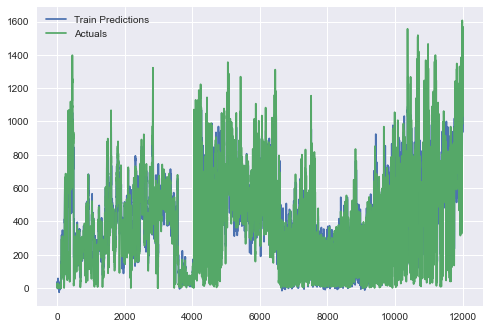

In [26]:
model = load_model('3H_Forecast/3H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(3,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 4 hours forecast

In [27]:
%%time

Trainer(4,6,12)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_22 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_44 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 11s 14ms/step - loss: 248553.7812 - mean_absolute_error: 407.8428 - val_loss: 356458.0312 - val_mean_absolute_error: 481.4004
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 12ms/step - loss: 231164.0625 - mean_absolute_error: 387.2814 - val_loss: 325735.6562 - val_mean_absolute_error: 451.1050
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 203429.9375 - mean_absolute_error: 357.1417 - val_loss: 295393.5625 - val_mean_absolute_error: 424.0542
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 13ms/step - loss: 183029.5312 - mean_absolute_error: 335.4393 - val_loss: 272033.3750 - val_mean_absolute_error: 402.8839
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 14ms/step - loss: 165491.0000 - mean_absolute_error: 316.8816 - val_loss: 250499.4844 - val_mean_absolute_error: 383.1108
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 15ms/step - loss: 149302.1406 - mean_absolute_error: 299.5571 - val_loss: 230238.3438 - val_mean_absolute_error: 364.1416
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 13ms/step - loss: 134308.2031 - mean_absolute_error: 283.1919 - val_loss: 210845.3750 - val_mean_absolute_error: 345.6185
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 13ms/step - loss: 120562.2266 - mean_absolute_error: 267.7200 - val_loss: 192928.5781 - val_mean_absolute_error: 328.0359
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 13ms/step - loss: 108166.0312 - mean_absolute_error: 253.5094 - val_loss: 176517.2812 - val_mean_absolute_error: 311.8141
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 12ms/step - loss: 97540.7969 - mean_absolute_error: 240.8523 - val_loss: 162342.1094 - val_mean_absolute_error: 297.6338
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 4s 11ms/step - loss: 88428.4219 - mean_absolute_error: 228.6630 - val_loss: 149082.4531 - val_mean_absolute_error: 283.8783
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 13ms/step - loss: 80335.3984 - mean_absolute_error: 217.3549 - val_loss: 137351.1719 - val_mean_absolute_error: 271.3728
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 4s 12ms/step - loss: 73505.8438 - mean_absolute_error: 206.9437 - val_loss: 126613.2891 - val_mean_absolute_error: 259.3519
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 13ms/step - loss: 67594.9219 - mean_absolute_error: 197.6612 - val_loss: 117088.9062 - val_mean_absolute_error: 248.0708
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 12ms/step - loss: 62739.5898 - mean_absolute_error: 189.5542 - val_loss: 108553.1641 - val_mean_absolute_error: 237.5214
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 5s 14ms/step - loss: 58680.0859 - mean_absolute_error: 182.5832 - val_loss: 101412.7422 - val_mean_absolute_error: 229.1768
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 14ms/step - loss: 55274.6094 - mean_absolute_error: 176.0001 - val_loss: 94728.3125 - val_mean_absolute_error: 220.1850
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 13ms/step - loss: 52417.6406 - mean_absolute_error: 170.0259 - val_loss: 88883.4609 - val_mean_absolute_error: 212.6316
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 14ms/step - loss: 50188.3008 - mean_absolute_error: 165.7710 - val_loss: 84344.2109 - val_mean_absolute_error: 207.9798
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 12ms/step - loss: 48459.3516 - mean_absolute_error: 162.5061 - val_loss: 80994.1562 - val_mean_absolute_error: 203.1305
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 4s 12ms/step - loss: 46851.1211 - mean_absolute_error: 158.8294 - val_loss: 76958.4609 - val_mean_absolute_error: 198.6691
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 13ms/step - loss: 45432.1758 - mean_absolute_error: 155.9360 - val_loss: 73447.9922 - val_mean_absolute_error: 194.2537
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 19ms/step - loss: 44193.2539 - mean_absolute_error: 153.1869 - val_loss: 71273.0547 - val_mean_absolute_error: 190.4850
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 14ms/step - loss: 43096.9102 - mean_absolute_error: 150.7660 - val_loss: 68450.6562 - val_mean_absolute_error: 187.6873- mea
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 15ms/step - loss: 42194.5742 - mean_absolute_error: 148.8130 - val_loss: 66022.6328 - val_mean_absolute_error: 183.9249ss: 42429.1445 - mea
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 13ms/step - loss: 41440.0781 - mean_absolute_error: 147.1538 - val_loss: 65008.8125 - val_mean_absolute_error: 182.3035
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 12ms/step - loss: 40847.2891 - mean_absolute_error: 146.0065 - val_loss: 63444.9648 - val_mean_absolute_error: 180.1766
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 12ms/step - loss: 40182.6406 - mean_absolute_error: 144.4077 - val_loss: 62679.8516 - val_mean_absolute_error: 178.4167
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 13ms/step - loss: 39477.6133 - mean_absolute_error: 142.8008 - val_loss: 60131.6836 - val_mean_absolute_error: 175.2006
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 14ms/step - loss: 38962.2617 - mean_absolute_error: 141.8646 - val_loss: 58659.3867 - val_mean_absolute_error: 174.0784
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 5s 14ms/step - loss: 38553.4102 - mean_absolute_error: 140.8594 - val_loss: 57730.0430 - val_mean_absolute_error: 172.6706
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 14ms/step - loss: 38119.4844 - mean_absolute_error: 139.9807 - val_loss: 57065.9805 - val_mean_absolute_error: 170.9105
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 12ms/step - loss: 37793.7734 - mean_absolute_error: 139.1314 - val_loss: 57265.1406 - val_mean_absolute_error: 170.7908
Epoch 34/100
376/376 [==============================] - 5s 12ms/step - loss: 37405.5312 - mean_absolute_error: 138.4309 - val_loss: 55445.5820 - val_mean_absolute_error: 168.2944
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 17ms/step - loss: 37080.8633 - mean_absolute_error: 137.5432 - val_loss: 54853.4102 - val_mean_absolute_error: 167.5214
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 13ms/step - loss: 36792.7617 - mean_absolute_error: 136.9188 - val_loss: 53718.2266 - val_mean_absolute_error: 166.6799
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 6s 15ms/step - loss: 36452.8008 - mean_absolute_error: 136.1089 - val_loss: 53623.7188 - val_mean_absolute_error: 165.6539
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 13ms/step - loss: 36207.9258 - mean_absolute_error: 135.5559 - val_loss: 52399.7891 - val_mean_absolute_error: 163.7991
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 13ms/step - loss: 35938.9883 - mean_absolute_error: 134.7526 - val_loss: 53149.7656 - val_mean_absolute_error: 165.2742
Epoch 40/100
376/376 [==============================] - 5s 13ms/step - loss: 35711.1719 - mean_absolute_error: 134.4622 - val_loss: 51654.4102 - val_mean_absolute_error: 162.5137
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 13ms/step - loss: 35421.2617 - mean_absolute_error: 133.7726 - val_loss: 51880.0938 - val_mean_absolute_error: 162.9975
Epoch 42/100
376/376 [==============================] - 5s 14ms/step - loss: 35215.7812 - mean_absolute_error: 133.1833 - val_loss: 52494.9414 - val_mean_absolute_error: 163.6295
Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 34996.2344 - mean_absolute_error: 133.0227 - val_loss: 51001.5000 - val_mean_absolute_error: 162.1514
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 5s 13ms/step - loss: 34821.6641 - mean_absolute_error: 132.3157 - val_loss: 50352.7500 - val_mean_absolute_error: 161.3656
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 5s 14ms/step - loss: 34614.1133 - mean_absolute_error: 132.0272 - val_loss: 50990.8281 - val_mean_absolute_error: 161.6907
Epoch 46/100
376/376 [==============================] - 5s 13ms/step - loss: 34430.9102 - mean_absolute_error: 131.5901 - val_loss: 50189.3281 - val_mean_absolute_error: 161.4589
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 5s 14ms/step - loss: 34309.1914 - mean_absolute_error: 131.1663 - val_loss: 49052.0938 - val_mean_absolute_error: 159.2421
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 4s 12ms/step - loss: 34179.1484 - mean_absolute_error: 130.7773 - val_loss: 49131.7812 - val_mean_absolute_error: 159.2205
Epoch 49/100
376/376 [==============================] - 4s 11ms/step - loss: 33964.7617 - mean_absolute_error: 130.4326 - val_loss: 49876.8906 - val_mean_absolute_error: 159.7613
Epoch 50/100
376/376 [==============================] - 4s 11ms/step - loss: 33876.5195 - mean_absolute_error: 130.2940 - val_loss: 47925.2930 - val_mean_absolute_error: 157.5396
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 13ms/step - loss: 33682.8555 - mean_absolute_error: 129.7932 - val_loss: 48736.8789 - val_mean_absolute_error: 157.1535
Epoch 52/100
376/376 [==============================] - 5s 13ms/step - loss: 33581.0781 - mean_absolute_error: 129.6656 - val_loss: 48684.6875 - val_mean_absolute_error: 158.1358
Epoch 53/100
376/376 [==============================] - 5s 13ms/step - loss: 33507.2148 - mean_absolute_error: 129.4518 - val_loss: 48374.3320 - val_mean_absolute_error: 156.8109
Epoch 54/100
376/376 [==============================] - 5s 12ms/step - loss: 33336.8164 - mean_absolute_error: 128.8609 - val_loss: 49064.9531 - val_mean_absolute_error: 157.5471
Epoch 55/100
376/376 [==============================] - 4s 12ms/step - loss: 33237.4258 - mean_absolute_error: 129.0270 - val_loss: 48743.9766 - val_mean_absolute_error: 158.4786
Epoch 56/100
376/376 [==============================] - 4s 12ms/step - loss: 33218.9062 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 6s 15ms/step - loss: 33109.5000 - mean_absolute_error: 128.6031 - val_loss: 47623.2266 - val_mean_absolute_error: 157.2456
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 5s 13ms/step - loss: 33035.3906 - mean_absolute_error: 128.6766 - val_loss: 47127.4492 - val_mean_absolute_error: 154.8092
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 14ms/step - loss: 32920.3477 - mean_absolute_error: 128.1464 - val_loss: 47669.0195 - val_mean_absolute_error: 156.2226
Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 32856.1016 - mean_absolute_error: 128.0347 - val_loss: 47036.2969 - val_mean_absolute_error: 157.0128
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 6s 16ms/step - loss: 32675.2207 - mean_absolute_error: 127.5267 - val_loss: 47662.9062 - val_mean_absolute_error: 156.5866
Epoch 62/100
376/376 [==============================] - 5s 14ms/step - loss: 32600.4590 - mean_absolute_error: 127.4450 - val_loss: 47721.9023 - val_mean_absolute_error: 156.3342
Epoch 63/100
376/376 [==============================] - 5s 13ms/step - loss: 32556.2207 - mean_absolute_error: 127.2735 - val_loss: 47343.2461 - val_mean_absolute_error: 156.6431
Epoch 64/100
376/376 [==============================] - 5s 13ms/step - loss: 32462.0664 - mean_absolute_error: 127.3380 - val_loss: 46728.7305 - val_mean_absolute_error: 154.4819
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 6s 16ms/step - loss: 32329.1445 - mean_absolute_error: 126.5932 - val_loss: 48634.7305 - val_mean_absolute_error: 157.9614297.0449 - mean_
Epoch 66/100
376/376 [==============================] - 5s 14ms/step - loss: 32343.4590 - mean_absolute_error: 127.0255 - val_loss: 46716.8828 - val_mean_absolute_error: 154.6749
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 5s 12ms/step - loss: 32213.3281 - mean_absolute_error: 126.5753 - val_loss: 46614.9375 - val_mean_absolute_error: 154.5540
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 5s 13ms/step - loss: 32179.1934 - mean_absolute_error: 126.4527 - val_loss: 46393.7656 - val_mean_absolute_error: 154.6108
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 4s 12ms/step - loss: 32144.5059 - mean_absolute_error: 126.4891 - val_loss: 45407.6562 - val_mean_absolute_error: 154.0884
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 4s 12ms/step - loss: 32025.0801 - mean_absolute_error: 126.1875 - val_loss: 46914.5508 - val_mean_absolute_error: 155.5558loss: 32324.4180 - mean_absolute_error:
Epoch 71/100
376/376 [==============================] - 4s 12ms/step - loss: 31833.0059 - mean_absolute_error: 125.7308 - val_loss: 46033.2812 - val_mean_absolute_error: 154.7923
Epoch 72/100
376/376 [==============================] - 4s 12ms/step - loss: 31881.0527 - mean_absolute_error: 125.6811 - val_loss: 45585.0781 - val_mean_absolute_error: 153.8372
Epoch 73/100
376/376 [==============================] - 4s 12ms/step - loss: 31806.9961 - mean_absolute_error: 125.6051 - val_loss: 46780.9219 - val_mean_absolute_error: 156.8555
Epoch 74/100
376/376 [==============================] - 4s 12ms/step - loss: 31762.5059 - mean_absolute_error: 125.6645 - val_loss: 46067.9648 - val_mean_absolute_error: 152.9836
Epoch 75/100
376/376 [==============================] - 4s 12ms/st

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 6s 15ms/step - loss: 31576.5957 - mean_absolute_error: 125.4476 - val_loss: 45627.7891 - val_mean_absolute_error: 152.8568
Epoch 78/100
376/376 [==============================] - 5s 14ms/step - loss: 31488.0430 - mean_absolute_error: 125.0456 - val_loss: 45157.1797 - val_mean_absolute_error: 152.7077
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 5s 14ms/step - loss: 31391.5254 - mean_absolute_error: 124.8236 - val_loss: 46002.8789 - val_mean_absolute_error: 153.8391
Epoch 80/100
376/376 [==============================] - 5s 13ms/step - loss: 31323.0566 - mean_absolute_error: 124.5861 - val_loss: 45097.1055 - val_mean_absolute_error: 152.374630997.4980 - m
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 81/100
376/376 [==============================] - 5s 13ms/step - loss: 31226.3730 - mean_absolute_error: 124.5272 - val_loss: 46258.3633 - val_mean_absolute_error: 154.3907
Epoch 82/100
376/376 [==============================] - 5s 13ms/step - loss: 31277.2812 - mean_absolute_error: 124.3924 - val_loss: 45965.8789 - val_mean_absolute_error: 153.8680
Epoch 83/100
376/376 [==============================] - 5s 13ms/step - loss: 31166.9414 - mean_absolute_error: 124.2617 - val_loss: 45584.8086 - val_mean_absolute_error: 154.5874
Epoch 84/100
376/376 [==============================] - 5s 13ms/step - loss: 31177.5039 - mean_absolute_error: 124.4399 - val_loss: 47311.1484 - val_mean_absolute_error: 155.9306
Epoch 85/100
376/376 [==============================] - 5s 13ms/step - loss: 31105.8926 - mean_absolute_error: 123.9836 - val_loss: 45846.0781 - val_mean_absolute_error: 153.5432
Epoch 86/100
376/376 [==============================] - 5s 13ms/step - loss: 30984.3262 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_6_SizeWindow\assets


Epoch 99/100
376/376 [==============================] - 5s 12ms/step - loss: 30220.2656 - mean_absolute_error: 121.5410 - val_loss: 46068.1914 - val_mean_absolute_error: 153.3142
Epoch 100/100
376/376 [==============================] - 5s 13ms/step - loss: 30112.9043 - mean_absolute_error: 121.5322 - val_loss: 45141.9297 - val_mean_absolute_error: 152.0737

-----------------------------------------------------------------------------------------------------------

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_23 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 13ms/step - loss: 245815.7500 - mean_absolute_error: 404.6160 - val_loss: 355342.7812 - val_mean_absolute_error: 480.5624
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 237096.4375 - mean_absolute_error: 394.3857 - val_loss: 343912.8125 - val_mean_absolute_error: 469.3167
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 16ms/step - loss: 227636.7031 - mean_absolute_error: 383.6939 - val_loss: 332488.0000 - val_mean_absolute_error: 458.4285
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 16ms/step - loss: 218318.7500 - mean_absolute_error: 373.3597 - val_loss: 320983.9688 - val_mean_absolute_error: 447.6025
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 5s 14ms/step - loss: 208815.3281 - mean_absolute_error: 363.0074 - val_loss: 309296.6875 - val_mean_absolute_error: 436.8524
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 15ms/step - loss: 199006.8438 - mean_absolute_error: 352.4706 - val_loss: 297063.4688 - val_mean_absolute_error: 425.7686
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 13ms/step - loss: 189271.7969 - mean_absolute_error: 342.1070 - val_loss: 285003.4062 - val_mean_absolute_error: 414.8070
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 14ms/step - loss: 179590.1406 - mean_absolute_error: 331.7859 - val_loss: 272827.3125 - val_mean_absolute_error: 403.7093
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 15ms/step - loss: 169949.4375 - mean_absolute_error: 321.5487 - val_loss: 260657.0938 - val_mean_absolute_error: 392.6227
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 14ms/step - loss: 160440.9844 - mean_absolute_error: 311.2940 - val_loss: 248625.1562 - val_mean_absolute_error: 381.5511
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 5s 14ms/step - loss: 151152.0781 - mean_absolute_error: 301.2604 - val_loss: 236774.8281 - val_mean_absolute_error: 370.5765
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 13ms/step - loss: 142202.6562 - mean_absolute_error: 291.4815 - val_loss: 225193.1719 - val_mean_absolute_error: 359.5672
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 14ms/step - loss: 133262.4375 - mean_absolute_error: 281.4698 - val_loss: 213237.7500 - val_mean_absolute_error: 348.0659
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 15ms/step - loss: 124749.7109 - mean_absolute_error: 271.7805 - val_loss: 202203.4688 - val_mean_absolute_error: 337.3323
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 5s 14ms/step - loss: 116875.6641 - mean_absolute_error: 262.5303 - val_loss: 191710.2812 - val_mean_absolute_error: 327.0365
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 15ms/step - loss: 109495.5859 - mean_absolute_error: 253.8820 - val_loss: 181711.8750 - val_mean_absolute_error: 317.0006
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 13ms/step - loss: 102612.8594 - mean_absolute_error: 245.5870 - val_loss: 172221.0000 - val_mean_absolute_error: 307.5360
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 14ms/step - loss: 96266.7656 - mean_absolute_error: 237.8079 - val_loss: 163338.6406 - val_mean_absolute_error: 298.6170
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 90382.3828 - mean_absolute_error: 229.9723 - val_loss: 154803.7031 - val_mean_absolute_error: 289.6203
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 15ms/step - loss: 84850.4766 - mean_absolute_error: 221.7671 - val_loss: 146579.4062 - val_mean_absolute_error: 280.9004
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 15ms/step - loss: 79773.5469 - mean_absolute_error: 214.5500 - val_loss: 138938.0312 - val_mean_absolute_error: 273.1127
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 14ms/step - loss: 74993.8750 - mean_absolute_error: 207.6064 - val_loss: 131566.3438 - val_mean_absolute_error: 264.3546
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 14ms/step - loss: 70736.2188 - mean_absolute_error: 200.9727 - val_loss: 124782.2969 - val_mean_absolute_error: 257.2614
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 15ms/step - loss: 66828.3828 - mean_absolute_error: 195.0142 - val_loss: 118137.1641 - val_mean_absolute_error: 249.7302
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 6s 15ms/step - loss: 63379.7188 - mean_absolute_error: 189.3972 - val_loss: 112261.4219 - val_mean_absolute_error: 242.9060
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 6s 15ms/step - loss: 60304.2734 - mean_absolute_error: 183.9990 - val_loss: 106488.7031 - val_mean_absolute_error: 235.3427
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 15ms/step - loss: 57382.8164 - mean_absolute_error: 178.6731 - val_loss: 101423.2188 - val_mean_absolute_error: 229.0645
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 15ms/step - loss: 54920.7344 - mean_absolute_error: 174.0722 - val_loss: 96545.2188 - val_mean_absolute_error: 222.6504
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 14ms/step - loss: 52666.2383 - mean_absolute_error: 169.7555 - val_loss: 92172.2734 - val_mean_absolute_error: 216.6789
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 5s 13ms/step - loss: 50690.6523 - mean_absolute_error: 165.7637 - val_loss: 87989.4844 - val_mean_absolute_error: 211.4715
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 15ms/step - loss: 48827.4102 - mean_absolute_error: 161.6534 - val_loss: 84382.0625 - val_mean_absolute_error: 205.6486
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 14ms/step - loss: 47168.0430 - mean_absolute_error: 158.1311 - val_loss: 80751.5469 - val_mean_absolute_error: 200.5691
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 15ms/step - loss: 45729.4648 - mean_absolute_error: 155.2929 - val_loss: 77825.2891 - val_mean_absolute_error: 196.3432
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 14ms/step - loss: 44271.1172 - mean_absolute_error: 152.2006 - val_loss: 75020.3828 - val_mean_absolute_error: 193.1301
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 13ms/step - loss: 42970.3281 - mean_absolute_error: 149.1613 - val_loss: 72302.4375 - val_mean_absolute_error: 188.9681
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 13ms/step - loss: 41823.5547 - mean_absolute_error: 146.8564 - val_loss: 69797.7656 - val_mean_absolute_error: 186.5352
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 14ms/step - loss: 40991.6602 - mean_absolute_error: 145.3174 - val_loss: 67745.2812 - val_mean_absolute_error: 182.8527
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 15ms/step - loss: 40010.0938 - mean_absolute_error: 143.1403 - val_loss: 65944.5781 - val_mean_absolute_error: 180.2802
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 15ms/step - loss: 39242.9453 - mean_absolute_error: 141.5443 - val_loss: 63901.8008 - val_mean_absolute_error: 178.1769
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 14ms/step - loss: 38624.9062 - mean_absolute_error: 140.4223 - val_loss: 61612.9414 - val_mean_absolute_error: 174.8472
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 15ms/step - loss: 38014.5938 - mean_absolute_error: 139.2366 - val_loss: 61860.4297 - val_mean_absolute_error: 176.2589
Epoch 43/100
376/376 [==============================] - 6s 16ms/step - loss: 37425.2109 - mean_absolute_error: 138.0973 - val_loss: 59605.8359 - val_mean_absolute_error: 172.1702
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 5s 13ms/step - loss: 37001.0430 - mean_absolute_error: 137.0615 - val_loss: 58821.8281 - val_mean_absolute_error: 170.7153
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 17ms/step - loss: 36543.6289 - mean_absolute_error: 136.2218 - val_loss: 58592.1797 - val_mean_absolute_error: 172.8822
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 5s 14ms/step - loss: 36126.2383 - mean_absolute_error: 135.0629 - val_loss: 57182.4570 - val_mean_absolute_error: 169.6176
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 7s 17ms/step - loss: 35664.2266 - mean_absolute_error: 134.0812 - val_loss: 56525.5117 - val_mean_absolute_error: 168.5052
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 15ms/step - loss: 35335.1133 - mean_absolute_error: 133.2015 - val_loss: 54712.0820 - val_mean_absolute_error: 165.4714
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 5s 14ms/step - loss: 35056.3789 - mean_absolute_error: 132.6358 - val_loss: 55098.2344 - val_mean_absolute_error: 165.7265
Epoch 50/100
376/376 [==============================] - 5s 13ms/step - loss: 34809.0469 - mean_absolute_error: 132.2300 - val_loss: 53500.8242 - val_mean_absolute_error: 163.5571
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 6s 15ms/step - loss: 34454.3945 - mean_absolute_error: 131.0929 - val_loss: 53666.2227 - val_mean_absolute_error: 164.4570
Epoch 52/100
376/376 [==============================] - 5s 14ms/step - loss: 34223.6133 - mean_absolute_error: 130.8154 - val_loss: 53179.9141 - val_mean_absolute_error: 165.6278
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 6s 15ms/step - loss: 33923.4258 - mean_absolute_error: 130.1198 - val_loss: 52344.8867 - val_mean_absolute_error: 162.0375
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 5s 14ms/step - loss: 33709.1172 - mean_absolute_error: 129.5421 - val_loss: 50696.3867 - val_mean_absolute_error: 159.4467
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 13ms/step - loss: 33464.7500 - mean_absolute_error: 128.9614 - val_loss: 53854.5352 - val_mean_absolute_error: 164.5719
Epoch 56/100
376/376 [==============================] - 5s 13ms/step - loss: 33319.5586 - mean_absolute_error: 128.5381 - val_loss: 51086.4180 - val_mean_absolute_error: 159.6918
Epoch 57/100
376/376 [==============================] - 5s 14ms/step - loss: 33049.1719 - mean_absolute_error: 128.0666 - val_loss: 51157.0000 - val_mean_absolute_error: 161.2366
Epoch 58/100
376/376 [==============================] - 6s 15ms/step - loss: 32919.2422 - mean_absolute_error: 127.9391 - val_loss: 50472.8164 - val_mean_absolute_error: 160.9692
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 6s 16ms/step - loss: 32764.8242 - mean_absolute_error: 127.4498 - val_loss: 49356.4922 - val_mean_absolute_error: 157.4726
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 32604.5645 - mean_absolute_error: 127.0965 - val_loss: 49746.4336 - val_mean_absolute_error: 158.2821
Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 32388.0664 - mean_absolute_error: 126.6095 - val_loss: 50197.0391 - val_mean_absolute_error: 159.1432
Epoch 62/100
376/376 [==============================] - 5s 14ms/step - loss: 32255.3496 - mean_absolute_error: 126.2534 - val_loss: 51328.6914 - val_mean_absolute_error: 160.7393
Epoch 63/100
376/376 [==============================] - 5s 14ms/step - loss: 32271.3359 - mean_absolute_error: 126.5141 - val_loss: 49291.2852 - val_mean_absolute_error: 158.5106
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 6s 15ms/step - loss: 31898.5215 - mean_absolute_error: 125.2597 - val_loss: 49586.1758 - val_mean_absolute_error: 159.7764
Epoch 65/100
376/376 [==============================] - 5s 14ms/step - loss: 31975.4824 - mean_absolute_error: 125.3283 - val_loss: 48351.0508 - val_mean_absolute_error: 156.7825
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 6s 17ms/step - loss: 31775.5898 - mean_absolute_error: 125.2743 - val_loss: 47783.5547 - val_mean_absolute_error: 155.2252
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 6s 15ms/step - loss: 31602.4570 - mean_absolute_error: 124.8822 - val_loss: 48975.1172 - val_mean_absolute_error: 156.4188
Epoch 68/100
376/376 [==============================] - 6s 15ms/step - loss: 31558.5664 - mean_absolute_error: 124.5498 - val_loss: 47631.5625 - val_mean_absolute_error: 155.1165
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 6s 15ms/step - loss: 31450.4668 - mean_absolute_error: 124.0102 - val_loss: 47730.4766 - val_mean_absolute_error: 155.4288
Epoch 70/100
376/376 [==============================] - 6s 15ms/step - loss: 31319.9258 - mean_absolute_error: 124.1145 - val_loss: 49262.1992 - val_mean_absolute_error: 158.9704
Epoch 71/100
376/376 [==============================] - 6s 16ms/step - loss: 31162.9746 - mean_absolute_error: 124.1031 - val_loss: 47850.6289 - val_mean_absolute_error: 155.2321
Epoch 72/100
376/376 [==============================] - 6s 15ms/step - loss: 31114.9180 - mean_absolute_error: 123.3832 - val_loss: 48906.2461 - val_mean_absolute_error: 157.2823
Epoch 73/100
376/376 [==============================] - 6s 15ms/step - loss: 30979.7930 - mean_absolute_error: 123.2593 - val_loss: 46783.8281 - val_mean_absolute_error: 154.1701
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 6s 15ms/step - loss: 30978.9980 - mean_absolute_error: 122.9799 - val_loss: 47597.3789 - val_mean_absolute_error: 155.4418
Epoch 75/100
376/376 [==============================] - 6s 15ms/step - loss: 30882.4668 - mean_absolute_error: 123.1903 - val_loss: 47732.2266 - val_mean_absolute_error: 154.2425
Epoch 76/100
376/376 [==============================] - 6s 15ms/step - loss: 30743.4902 - mean_absolute_error: 122.3799 - val_loss: 46538.6406 - val_mean_absolute_error: 154.8309
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 6s 15ms/step - loss: 30602.2656 - mean_absolute_error: 122.3516 - val_loss: 48245.3828 - val_mean_absolute_error: 156.3617
Epoch 78/100
376/376 [==============================] - 6s 15ms/step - loss: 30568.2168 - mean_absolute_error: 122.1391 - val_loss: 46710.4883 - val_mean_absolute_error: 153.4870
Epoch 79/100
376/376 [==============================] - 6s 15ms/step - loss: 30482.1562 - mean_absolute_error: 121.8130 - val_loss: 46694.4297 - val_mean_absolute_error: 152.8303
Epoch 80/100
376/376 [==============================] - 6s 15ms/step - loss: 30393.4492 - mean_absolute_error: 121.9555 - val_loss: 46784.8477 - val_mean_absolute_error: 152.7297
Epoch 81/100
376/376 [==============================] - 6s 15ms/step - loss: 30429.6328 - mean_absolute_error: 121.7701 - val_loss: 46655.1289 - val_mean_absolute_error: 152.8156
Epoch 82/100
376/376 [==============================] - 6s 17ms/step - loss: 30213.2383 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 7s 18ms/step - loss: 30314.6348 - mean_absolute_error: 121.4309 - val_loss: 46657.6367 - val_mean_absolute_error: 153.8383
Epoch 84/100
376/376 [==============================] - 6s 15ms/step - loss: 30199.3691 - mean_absolute_error: 121.1949 - val_loss: 47378.7148 - val_mean_absolute_error: 154.9019
Epoch 85/100
376/376 [==============================] - 6s 15ms/step - loss: 30116.4805 - mean_absolute_error: 121.0966 - val_loss: 46820.9219 - val_mean_absolute_error: 154.0609
Epoch 86/100
376/376 [==============================] - 6s 15ms/step - loss: 30087.6074 - mean_absolute_error: 121.0903 - val_loss: 46991.9219 - val_mean_absolute_error: 154.5091
Epoch 87/100
376/376 [==============================] - 6s 15ms/step - loss: 30146.8066 - mean_absolute_error: 120.6268 - val_loss: 48460.0117 - val_mean_absolute_error: 155.4168
Epoch 88/100
376/376 [==============================] - 6s 15ms/step - loss: 29978.8145 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_7_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 6s 15ms/step - loss: 29194.7344 - mean_absolute_error: 118.6090 - val_loss: 47109.2773 - val_mean_absolute_error: 152.1410

-----------------------------------------------------------------------------------------------------------

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_24 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_48 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 15s 27ms/step - loss: 252017.5156 

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 15ms/step - loss: 246793.1250 - mean_absolute_error: 405.7956 - val_loss: 356300.5625 - val_mean_absolute_error: 481.6170
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 18ms/step - loss: 238308.9844 - mean_absolute_error: 395.7791 - val_loss: 345690.7188 - val_mean_absolute_error: 471.0508
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 16ms/step - loss: 229407.8594 - mean_absolute_error: 385.6812 - val_loss: 335042.4375 - val_mean_absolute_error: 460.8636
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 15ms/step - loss: 220722.8438 - mean_absolute_error: 375.9788 - val_loss: 324366.3750 - val_mean_absolute_error: 450.7499
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 16ms/step - loss: 211615.7188 - mean_absolute_error: 365.9838 - val_loss: 312909.2812 - val_mean_absolute_error: 440.1380
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 6s 17ms/step - loss: 202025.9375 - mean_absolute_error: 355.6239 - val_loss: 301001.0938 - val_mean_absolute_error: 429.3302
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 16ms/step - loss: 192524.5781 - mean_absolute_error: 345.4022 - val_loss: 289211.1875 - val_mean_absolute_error: 418.5972
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 19ms/step - loss: 182911.0156 - mean_absolute_error: 335.1860 - val_loss: 277001.4062 - val_mean_absolute_error: 407.4806
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 17ms/step - loss: 172954.3438 - mean_absolute_error: 324.4682 - val_loss: 264046.2188 - val_mean_absolute_error: 395.6944
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 17ms/step - loss: 162753.2031 - mean_absolute_error: 313.5288 - val_loss: 251425.0781 - val_mean_absolute_error: 384.1254
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 18ms/step - loss: 152960.1562 - mean_absolute_error: 302.8575 - val_loss: 238998.3125 - val_mean_absolute_error: 372.4952
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 6s 17ms/step - loss: 143654.2344 - mean_absolute_error: 292.7397 - val_loss: 227125.1094 - val_mean_absolute_error: 361.3643l
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 7s 20ms/step - loss: 134735.6562 - mean_absolute_error: 282.7065 - val_loss: 215459.8438 - val_mean_absolute_error: 350.2777
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 17ms/step - loss: 126118.0078 - mean_absolute_error: 273.0840 - val_loss: 204234.8594 - val_mean_absolute_error: 339.5274
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 18ms/step - loss: 118030.0625 - mean_absolute_error: 263.8037 - val_loss: 193466.2500 - val_mean_absolute_error: 328.9889
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 7s 18ms/step - loss: 110369.8984 - mean_absolute_error: 254.5508 - val_loss: 183115.5000 - val_mean_absolute_error: 318.6173
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 7s 20ms/step - loss: 103231.6406 - mean_absolute_error: 246.0257 - val_loss: 173169.7969 - val_mean_absolute_error: 308.7053
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 7s 18ms/step - loss: 96584.1953 - mean_absolute_error: 237.8043 - val_loss: 164006.1562 - val_mean_absolute_error: 299.7008
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 90561.2422 - mean_absolute_error: 229.9943 - val_loss: 155444.4375 - val_mean_absolute_error: 291.1102
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 6s 15ms/step - loss: 85027.7578 - mean_absolute_error: 222.4330 - val_loss: 147171.9844 - val_mean_absolute_error: 282.2615
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 17ms/step - loss: 79894.4531 - mean_absolute_error: 215.1757 - val_loss: 139389.4375 - val_mean_absolute_error: 273.7004
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 6s 16ms/step - loss: 75228.9062 - mean_absolute_error: 208.3771 - val_loss: 132166.2969 - val_mean_absolute_error: 266.0378
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 15ms/step - loss: 71081.1562 - mean_absolute_error: 202.3326 - val_loss: 125340.4375 - val_mean_absolute_error: 258.4557
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 15ms/step - loss: 67206.7031 - mean_absolute_error: 195.8201 - val_loss: 118854.9609 - val_mean_absolute_error: 250.5632
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 19ms/step - loss: 63681.6055 - mean_absolute_error: 189.7224 - val_loss: 112790.0469 - val_mean_absolute_error: 243.2084
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 6s 16ms/step - loss: 60420.3438 - mean_absolute_error: 184.0075 - val_loss: 106462.3203 - val_mean_absolute_error: 234.8685
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 16ms/step - loss: 57339.3398 - mean_absolute_error: 178.1408 - val_loss: 100947.3906 - val_mean_absolute_error: 228.0026
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 17ms/step - loss: 54742.6367 - mean_absolute_error: 173.2221 - val_loss: 95909.0156 - val_mean_absolute_error: 221.7304
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 16ms/step - loss: 52464.9141 - mean_absolute_error: 168.4805 - val_loss: 91426.9688 - val_mean_absolute_error: 216.0988
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 16ms/step - loss: 50529.7344 - mean_absolute_error: 164.8512 - val_loss: 87692.3047 - val_mean_absolute_error: 211.3724
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 7s 19ms/step - loss: 48739.6445 - mean_absolute_error: 161.0592 - val_loss: 83798.0625 - val_mean_absolute_error: 205.8645
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 16ms/step - loss: 47112.4688 - mean_absolute_error: 157.8556 - val_loss: 80172.5859 - val_mean_absolute_error: 201.2751
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 17ms/step - loss: 45739.0312 - mean_absolute_error: 155.2834 - val_loss: 77228.6641 - val_mean_absolute_error: 197.8277
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 17ms/step - loss: 44602.0469 - mean_absolute_error: 153.1666 - val_loss: 74691.0078 - val_mean_absolute_error: 194.2473
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 6s 17ms/step - loss: 43641.7891 - mean_absolute_error: 151.2393 - val_loss: 72405.7422 - val_mean_absolute_error: 191.7930
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 6s 16ms/step - loss: 42692.6289 - mean_absolute_error: 149.0462 - val_loss: 70335.1172 - val_mean_absolute_error: 188.9053
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 6s 15ms/step - loss: 41708.2070 - mean_absolute_error: 146.8951 - val_loss: 67784.4453 - val_mean_absolute_error: 184.5799
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 15ms/step - loss: 40700.7070 - mean_absolute_error: 145.0274 - val_loss: 65969.3359 - val_mean_absolute_error: 182.1783
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 15ms/step - loss: 39925.5859 - mean_absolute_error: 143.2012 - val_loss: 64163.7812 - val_mean_absolute_error: 179.3803
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 15ms/step - loss: 39261.3867 - mean_absolute_error: 141.8085 - val_loss: 62984.9727 - val_mean_absolute_error: 177.6128
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 15ms/step - loss: 38549.4688 - mean_absolute_error: 139.8360 - val_loss: 61107.0703 - val_mean_absolute_error: 174.8710
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 7s 17ms/step - loss: 38057.9492 - mean_absolute_error: 138.8401 - val_loss: 60520.6992 - val_mean_absolute_error: 173.5849
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 15ms/step - loss: 37539.7148 - mean_absolute_error: 137.5265 - val_loss: 60300.2695 - val_mean_absolute_error: 172.6202
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 7s 19ms/step - loss: 36928.6250 - mean_absolute_error: 136.2570 - val_loss: 57713.4844 - val_mean_absolute_error: 169.8169
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 36501.3672 - mean_absolute_error: 135.6855 - val_loss: 57177.2695 - val_mean_absolute_error: 168.7740
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 16ms/step - loss: 36019.2617 - mean_absolute_error: 134.2507 - val_loss: 55787.4180 - val_mean_absolute_error: 166.6754
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 16ms/step - loss: 35555.1250 - mean_absolute_error: 133.4916 - val_loss: 56460.9023 - val_mean_absolute_error: 167.3991
Epoch 49/100
376/376 [==============================] - 6s 15ms/step - loss: 35062.5859 - mean_absolute_error: 132.2315 - val_loss: 54599.0312 - val_mean_absolute_error: 165.0930
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 15ms/step - loss: 34628.1914 - mean_absolute_error: 131.2601 - val_loss: 53319.6523 - val_mean_absolute_error: 163.4440
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 6s 15ms/step - loss: 34290.6367 - mean_absolute_error: 130.5415 - val_loss: 54182.0586 - val_mean_absolute_error: 163.5884
Epoch 52/100
376/376 [==============================] - 6s 15ms/step - loss: 33937.4492 - mean_absolute_error: 129.8619 - val_loss: 51876.3203 - val_mean_absolute_error: 162.0974
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 6s 15ms/step - loss: 33562.4375 - mean_absolute_error: 129.0618 - val_loss: 52616.4961 - val_mean_absolute_error: 161.8319
Epoch 54/100
376/376 [==============================] - 6s 15ms/step - loss: 33219.3008 - mean_absolute_error: 128.4016 - val_loss: 52695.6719 - val_mean_absolute_error: 160.6902
Epoch 55/100
376/376 [==============================] - 6s 15ms/step - loss: 32852.0391 - mean_absolute_error: 127.3448 - val_loss: 51522.8086 - val_mean_absolute_error: 160.3320
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 15ms/step - loss: 32651.3613 - mean_absolute_error: 127.1069 - val_loss: 51254.9766 - val_mean_absolute_error: 159.6777
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 7s 18ms/step - loss: 32360.2930 - mean_absolute_error: 126.2722 - val_loss: 50813.7812 - val_mean_absolute_error: 158.4824
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 6s 16ms/step - loss: 32104.8730 - mean_absolute_error: 125.8128 - val_loss: 51338.9336 - val_mean_absolute_error: 159.2657
Epoch 59/100
376/376 [==============================] - 5s 15ms/step - loss: 31860.9219 - mean_absolute_error: 125.5548 - val_loss: 49115.3867 - val_mean_absolute_error: 157.0577
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 7s 19ms/step - loss: 31770.5605 - mean_absolute_error: 125.4487 - val_loss: 50100.0273 - val_mean_absolute_error: 157.8786
Epoch 61/100
376/376 [==============================] - 7s 19ms/step - loss: 31479.1191 - mean_absolute_error: 124.5256 - val_loss: 49374.3125 - val_mean_absolute_error: 157.4160
Epoch 62/100
376/376 [==============================] - 7s 19ms/step - loss: 31333.4961 - mean_absolute_error: 124.1211 - val_loss: 49958.7734 - val_mean_absolute_error: 157.4394
Epoch 63/100
376/376 [==============================] - 7s 18ms/step - loss: 31087.8477 - mean_absolute_error: 123.2734 - val_loss: 50570.1289 - val_mean_absolute_error: 158.0548
Epoch 64/100
376/376 [==============================] - 7s 18ms/step - loss: 30901.6914 - mean_absolute_error: 123.1531 - val_loss: 48743.3828 - val_mean_absolute_error: 156.3441rror: 123.1
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 6s 16ms/step - loss: 30742.7871 - mean_absolute_error: 122.6919 - val_loss: 49329.8203 - val_mean_absolute_error: 156.7985
Epoch 66/100
376/376 [==============================] - 6s 16ms/step - loss: 30572.4941 - mean_absolute_error: 122.3648 - val_loss: 49047.2461 - val_mean_absolute_error: 156.3734
Epoch 67/100
376/376 [==============================] - 7s 18ms/step - loss: 30447.9180 - mean_absolute_error: 122.1239 - val_loss: 49501.6875 - val_mean_absolute_error: 156.5318
Epoch 68/100
376/376 [==============================] - 6s 16ms/step - loss: 30237.4043 - mean_absolute_error: 121.6852 - val_loss: 50073.3672 - val_mean_absolute_error: 157.1640
Epoch 69/100
376/376 [==============================] - 6s 16ms/step - loss: 30122.7520 - mean_absolute_error: 121.3150 - val_loss: 48272.5117 - val_mean_absolute_error: 154.8066
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 6s 17ms/step - loss: 29963.2578 - mean_absolute_error: 120.6780 - val_loss: 48373.1680 - val_mean_absolute_error: 155.6544
Epoch 71/100
376/376 [==============================] - 6s 17ms/step - loss: 29877.1016 - mean_absolute_error: 120.4466 - val_loss: 47989.3672 - val_mean_absolute_error: 154.7886
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 6s 17ms/step - loss: 29711.4922 - mean_absolute_error: 120.1087 - val_loss: 48589.8828 - val_mean_absolute_error: 155.2079
Epoch 73/100
376/376 [==============================] - 6s 16ms/step - loss: 29430.7441 - mean_absolute_error: 119.4875 - val_loss: 48656.1641 - val_mean_absolute_error: 154.9959
Epoch 74/100
376/376 [==============================] - 6s 17ms/step - loss: 29294.5918 - mean_absolute_error: 119.1540 - val_loss: 49750.0898 - val_mean_absolute_error: 155.8366
Epoch 75/100
376/376 [==============================] - 6s 17ms/step - loss: 29137.5820 - mean_absolute_error: 118.8621 - val_loss: 49033.0781 - val_mean_absolute_error: 154.5987
Epoch 76/100
376/376 [==============================] - 6s 16ms/step - loss: 29193.7363 - mean_absolute_error: 118.4883 - val_loss: 47233.8711 - val_mean_absolute_error: 152.4218
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 6s 17ms/step - loss: 28986.0332 - mean_absolute_error: 118.0927 - val_loss: 47809.8828 - val_mean_absolute_error: 153.9813
Epoch 78/100
376/376 [==============================] - 7s 18ms/step - loss: 28894.4082 - mean_absolute_error: 117.7123 - val_loss: 47168.3984 - val_mean_absolute_error: 153.4182
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 6s 17ms/step - loss: 28912.3203 - mean_absolute_error: 118.0827 - val_loss: 47102.5430 - val_mean_absolute_error: 153.1492: 
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 7s 20ms/step - loss: 28725.7422 - mean_absolute_error: 117.4239 - val_loss: 48490.1562 - val_mean_absolute_error: 154.8138
Epoch 81/100
376/376 [==============================] - 7s 20ms/step - loss: 28686.1777 - mean_absolute_error: 117.5873 - val_loss: 47145.8359 - val_mean_absolute_error: 153.2314
Epoch 82/100
376/376 [==============================] - 8s 20ms/step - loss: 28562.9062 - mean_absolute_error: 116.9946 - val_loss: 48170.3633 - val_mean_absolute_error: 153.7144
Epoch 83/100
376/376 [==============================] - 7s 20ms/step - loss: 28463.5430 - mean_absolute_error: 116.8267 - val_loss: 47278.5977 - val_mean_absolute_error: 153.7225
Epoch 84/100
376/376 [==============================] - 7s 19ms/step - loss: 28445.1289 - mean_absolute_error: 116.6883 - val_loss: 46075.9766 - val_mean_absolute_error: 151.4841
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 6s 17ms/step - loss: 28316.6895 - mean_absolute_error: 116.2291 - val_loss: 47146.0703 - val_mean_absolute_error: 152.8170
Epoch 86/100
376/376 [==============================] - 6s 17ms/step - loss: 28247.1621 - mean_absolute_error: 116.0553 - val_loss: 47619.9609 - val_mean_absolute_error: 154.2189
Epoch 87/100
376/376 [==============================] - 7s 19ms/step - loss: 28246.4688 - mean_absolute_error: 116.1089 - val_loss: 46757.6484 - val_mean_absolute_error: 152.0158
Epoch 88/100
376/376 [==============================] - 7s 18ms/step - loss: 28187.6816 - mean_absolute_error: 116.1080 - val_loss: 45753.7305 - val_mean_absolute_error: 151.1249
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 6s 17ms/step - loss: 28054.1719 - mean_absolute_error: 115.6274 - val_loss: 47648.5703 - val_mean_absolute_error: 152.1322
Epoch 90/100
376/376 [==============================] - 6s 17ms/step - loss: 28061.5996 - mean_absolute_error: 115.5973 - val_loss: 46035.3789 - val_mean_absolute_error: 151.8848
Epoch 91/100
376/376 [==============================] - 6s 17ms/step - loss: 27984.1582 - mean_absolute_error: 115.2426 - val_loss: 46196.5547 - val_mean_absolute_error: 152.2460
Epoch 92/100
376/376 [==============================] - 6s 17ms/step - loss: 27867.2246 - mean_absolute_error: 115.1482 - val_loss: 46214.5156 - val_mean_absolute_error: 152.1208
Epoch 93/100
376/376 [==============================] - 6s 17ms/step - loss: 27827.4531 - mean_absolute_error: 114.8926 - val_loss: 46847.8945 - val_mean_absolute_error: 152.5639
Epoch 94/100
376/376 [==============================] - 7s 17ms/step - loss: 27779.6426 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_8_SizeWindow\assets


Epoch 98/100
376/376 [==============================] - 6s 17ms/step - loss: 27531.9082 - mean_absolute_error: 114.2296 - val_loss: 47333.0430 - val_mean_absolute_error: 152.0662
Epoch 99/100
376/376 [==============================] - 6s 16ms/step - loss: 27466.5840 - mean_absolute_error: 113.8590 - val_loss: 45484.5273 - val_mean_absolute_error: 151.1585
Epoch 100/100
376/376 [==============================] - 6s 17ms/step - loss: 27544.1758 - mean_absolute_error: 113.8346 - val_loss: 46117.0195 - val_mean_absolute_error: 151.4907loss: 27264.6797 - mean_absolute_err - ETA: 3s

-----------------------------------------------------------------------------------------------------------

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_25 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_50 (Dense)   

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 17ms/step - loss: 239628.7031 - mean_absolute_error: 397.0264 - val_loss: 342071.1875 - val_mean_absolute_error: 467.0164
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 17ms/step - loss: 222195.5625 - mean_absolute_error: 377.5413 - val_loss: 322160.2188 - val_mean_absolute_error: 448.4802
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 7s 17ms/step - loss: 207485.6094 - mean_absolute_error: 361.6151 - val_loss: 305888.7188 - val_mean_absolute_error: 433.6349
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 18ms/step - loss: 194560.4219 - mean_absolute_error: 347.6007 - val_loss: 289743.4062 - val_mean_absolute_error: 418.8980
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 19ms/step - loss: 181332.5156 - mean_absolute_error: 333.4896 - val_loss: 273503.3438 - val_mean_absolute_error: 404.1039
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 19ms/step - loss: 168866.4219 - mean_absolute_error: 320.2357 - val_loss: 258174.3594 - val_mean_absolute_error: 390.0714
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 7s 18ms/step - loss: 156984.7188 - mean_absolute_error: 307.4665 - val_loss: 243242.6875 - val_mean_absolute_error: 376.2427
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 20ms/step - loss: 145422.1562 - mean_absolute_error: 294.7661 - val_loss: 228351.2812 - val_mean_absolute_error: 362.2199
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 7s 19ms/step - loss: 134471.9844 - mean_absolute_error: 282.5169 - val_loss: 214490.5781 - val_mean_absolute_error: 349.0909
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 7s 19ms/step - loss: 124342.7578 - mean_absolute_error: 270.9984 - val_loss: 201297.0469 - val_mean_absolute_error: 336.1961
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 15ms/step - loss: 114891.8438 - mean_absolute_error: 259.9301 - val_loss: 188668.3594 - val_mean_absolute_error: 323.9433
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 6s 17ms/step - loss: 106180.2734 - mean_absolute_error: 249.8062 - val_loss: 177089.6719 - val_mean_absolute_error: 312.5854
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 6s 17ms/step - loss: 98381.6562 - mean_absolute_error: 240.3494 - val_loss: 166468.8281 - val_mean_absolute_error: 302.1959
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 7s 17ms/step - loss: 91164.0625 - mean_absolute_error: 230.4829 - val_loss: 156250.3906 - val_mean_absolute_error: 291.3287
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 6s 17ms/step - loss: 84496.3750 - mean_absolute_error: 220.8634 - val_loss: 146589.4062 - val_mean_absolute_error: 280.8989
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 15ms/step - loss: 78419.9922 - mean_absolute_error: 211.9152 - val_loss: 137478.8594 - val_mean_absolute_error: 271.1520
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 7s 18ms/step - loss: 72969.4453 - mean_absolute_error: 203.7249 - val_loss: 128803.9688 - val_mean_absolute_error: 261.4541
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 20ms/step - loss: 68006.8750 - mean_absolute_error: 195.8837 - val_loss: 120846.2188 - val_mean_absolute_error: 252.3415
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 63659.6367 - mean_absolute_error: 188.5125 - val_loss: 113475.3047 - val_mean_absolute_error: 243.2998
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 19ms/step - loss: 59758.5586 - mean_absolute_error: 181.5157 - val_loss: 106407.1094 - val_mean_absolute_error: 234.2827
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 15ms/step - loss: 56464.5469 - mean_absolute_error: 175.5854 - val_loss: 100464.0859 - val_mean_absolute_error: 227.1407
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 6s 16ms/step - loss: 53672.9453 - mean_absolute_error: 170.3938 - val_loss: 95359.3828 - val_mean_absolute_error: 220.1850
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 16ms/step - loss: 51273.5938 - mean_absolute_error: 165.6313 - val_loss: 90168.0469 - val_mean_absolute_error: 213.3625
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 16ms/step - loss: 49133.7852 - mean_absolute_error: 161.0050 - val_loss: 85458.8203 - val_mean_absolute_error: 207.6174
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 18ms/step - loss: 47279.7930 - mean_absolute_error: 157.2026 - val_loss: 82056.4609 - val_mean_absolute_error: 203.3474
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 18ms/step - loss: 45715.1016 - mean_absolute_error: 154.0688 - val_loss: 78175.9531 - val_mean_absolute_error: 198.5168
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 18ms/step - loss: 44205.8789 - mean_absolute_error: 150.9543 - val_loss: 74645.1719 - val_mean_absolute_error: 194.9091
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 18ms/step - loss: 42734.6211 - mean_absolute_error: 147.5199 - val_loss: 72406.0938 - val_mean_absolute_error: 189.8828
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 18ms/step - loss: 41562.7109 - mean_absolute_error: 145.3470 - val_loss: 69391.9531 - val_mean_absolute_error: 186.0133
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 7s 19ms/step - loss: 40603.0898 - mean_absolute_error: 143.5445 - val_loss: 66820.1484 - val_mean_absolute_error: 182.9405
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 7s 18ms/step - loss: 39679.9375 - mean_absolute_error: 141.9434 - val_loss: 65173.7969 - val_mean_absolute_error: 180.2759
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 17ms/step - loss: 38841.0664 - mean_absolute_error: 140.0967 - val_loss: 63385.0078 - val_mean_absolute_error: 178.1750
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 17ms/step - loss: 38168.7031 - mean_absolute_error: 139.0098 - val_loss: 61657.1602 - val_mean_absolute_error: 175.6686
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 17ms/step - loss: 37521.6914 - mean_absolute_error: 137.7336 - val_loss: 60599.2969 - val_mean_absolute_error: 174.2628
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 6s 17ms/step - loss: 36893.1836 - mean_absolute_error: 136.4942 - val_loss: 58902.0273 - val_mean_absolute_error: 172.0071
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 17ms/step - loss: 36365.6953 - mean_absolute_error: 135.5013 - val_loss: 57416.0742 - val_mean_absolute_error: 169.4339
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 6s 16ms/step - loss: 35832.2188 - mean_absolute_error: 134.0743 - val_loss: 56076.3555 - val_mean_absolute_error: 167.9778
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 15ms/step - loss: 35378.9492 - mean_absolute_error: 133.2621 - val_loss: 56329.4727 - val_mean_absolute_error: 168.0229
Epoch 40/100
376/376 [==============================] - 6s 15ms/step - loss: 34829.1953 - mean_absolute_error: 132.0598 - val_loss: 54966.4453 - val_mean_absolute_error: 166.5933
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 7s 19ms/step - loss: 34373.9883 - mean_absolute_error: 131.0583 - val_loss: 54070.9336 - val_mean_absolute_error: 165.3292
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 20ms/step - loss: 34024.7305 - mean_absolute_error: 130.4288 - val_loss: 55432.4570 - val_mean_absolute_error: 166.0348
Epoch 43/100
376/376 [==============================] - 7s 18ms/step - loss: 33704.8203 - mean_absolute_error: 129.9224 - val_loss: 53348.4922 - val_mean_absolute_error: 164.3332
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 16ms/step - loss: 33332.7539 - mean_absolute_error: 129.2725 - val_loss: 51079.6992 - val_mean_absolute_error: 160.9491
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 16ms/step - loss: 33022.0586 - mean_absolute_error: 128.3761 - val_loss: 51686.8086 - val_mean_absolute_error: 160.4139
Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 32649.6328 - mean_absolute_error: 127.7007 - val_loss: 50552.4219 - val_mean_absolute_error: 159.9875 0s - loss: 32586.2070 - mean_absolute_error: 127.
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 7s 17ms/step - loss: 32330.4434 - mean_absolute_error: 126.9611 - val_loss: 50798.2852 - val_mean_absolute_error: 159.0610
Epoch 48/100
376/376 [==============================] - 8s 20ms/step - loss: 32114.1055 - mean_absolute_error: 126.3113 - val_loss: 50384.5039 - val_mean_absolute_error: 158.8105
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 7s 19ms/step - loss: 31821.5312 - mean_absolute_error: 125.8362 - val_loss: 48840.7266 - val_mean_absolute_error: 157.9541
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 8s 22ms/step - loss: 31620.8730 - mean_absolute_error: 125.4419 - val_loss: 49050.4375 - val_mean_absolute_error: 156.8226
Epoch 51/100
376/376 [==============================] - 7s 19ms/step - loss: 31369.8379 - mean_absolute_error: 124.7385 - val_loss: 49229.0859 - val_mean_absolute_error: 157.6613
Epoch 52/100
376/376 [==============================] - 7s 19ms/step - loss: 31237.8828 - mean_absolute_error: 124.5173 - val_loss: 48773.4570 - val_mean_absolute_error: 156.1335
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 6s 17ms/step - loss: 30925.6973 - mean_absolute_error: 123.7360 - val_loss: 47712.9414 - val_mean_absolute_error: 155.9339
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 5s 14ms/step - loss: 30734.4199 - mean_absolute_error: 123.0980 - val_loss: 47739.0352 - val_mean_absolute_error: 154.9578
Epoch 55/100
376/376 [==============================] - 5s 14ms/step - loss: 30531.8457 - mean_absolute_error: 122.7803 - val_loss: 47627.3711 - val_mean_absolute_error: 154.9811
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 7s 18ms/step - loss: 30371.9824 - mean_absolute_error: 122.3884 - val_loss: 47906.1211 - val_mean_absolute_error: 155.6575
Epoch 57/100
376/376 [==============================] - 7s 20ms/step - loss: 30152.1504 - mean_absolute_error: 121.9143 - val_loss: 46088.2148 - val_mean_absolute_error: 154.1759
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 6s 17ms/step - loss: 30139.2695 - mean_absolute_error: 121.4028 - val_loss: 47552.6523 - val_mean_absolute_error: 153.2640
Epoch 59/100
376/376 [==============================] - 6s 17ms/step - loss: 29950.1289 - mean_absolute_error: 121.2991 - val_loss: 46488.8867 - val_mean_absolute_error: 153.1865
Epoch 60/100
376/376 [==============================] - 6s 17ms/step - loss: 29790.7500 - mean_absolute_error: 120.9165 - val_loss: 46976.0625 - val_mean_absolute_error: 153.2710
Epoch 61/100
376/376 [==============================] - 6s 16ms/step - loss: 29600.1113 - mean_absolute_error: 120.2632 - val_loss: 46370.7852 - val_mean_absolute_error: 151.8330
Epoch 62/100
376/376 [==============================] - 6s 16ms/step - loss: 29575.4258 - mean_absolute_error: 120.4373 - val_loss: 46278.0156 - val_mean_absolute_error: 152.6217
Epoch 63/100
376/376 [==============================] - 7s 18ms/step - loss: 29346.2852 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 6s 17ms/step - loss: 28649.2090 - mean_absolute_error: 117.6953 - val_loss: 45146.1094 - val_mean_absolute_error: 150.4103
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 6s 16ms/step - loss: 28555.3965 - mean_absolute_error: 117.5068 - val_loss: 46773.0781 - val_mean_absolute_error: 151.1429
Epoch 70/100
376/376 [==============================] - 6s 15ms/step - loss: 28471.9082 - mean_absolute_error: 116.8164 - val_loss: 45990.3008 - val_mean_absolute_error: 151.9589
Epoch 71/100
376/376 [==============================] - 6s 15ms/step - loss: 28352.1738 - mean_absolute_error: 117.0415 - val_loss: 44880.4688 - val_mean_absolute_error: 150.0855
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 6s 16ms/step - loss: 28401.8184 - mean_absolute_error: 116.7216 - val_loss: 45154.2539 - val_mean_absolute_error: 148.8404
Epoch 73/100
376/376 [==============================] - 6s 15ms/step - loss: 28241.6465 - mean_absolute_error: 116.2040 - val_loss: 45369.1094 - val_mean_absolute_error: 149.1713
Epoch 74/100
376/376 [==============================] - 8s 20ms/step - loss: 28129.4102 - mean_absolute_error: 116.1495 - val_loss: 45010.3672 - val_mean_absolute_error: 148.9220
Epoch 75/100
376/376 [==============================] - 6s 16ms/step - loss: 28094.2617 - mean_absolute_error: 115.8882 - val_loss: 45197.8359 - val_mean_absolute_error: 151.5462
Epoch 76/100
376/376 [==============================] - 6s 15ms/step - loss: 27951.7363 - mean_absolute_error: 115.2509 - val_loss: 46332.5859 - val_mean_absolute_error: 149.6486
Epoch 77/100
376/376 [==============================] - 6s 15ms/step - loss: 27767.9023 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 8s 20ms/step - loss: 27572.7051 - mean_absolute_error: 114.6512 - val_loss: 45397.8320 - val_mean_absolute_error: 149.5500
Epoch 83/100
376/376 [==============================] - 8s 20ms/step - loss: 27494.7441 - mean_absolute_error: 114.4598 - val_loss: 44148.3047 - val_mean_absolute_error: 148.3529
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 7s 17ms/step - loss: 27420.6504 - mean_absolute_error: 114.0257 - val_loss: 45611.2148 - val_mean_absolute_error: 148.7950
Epoch 85/100
376/376 [==============================] - 8s 21ms/step - loss: 27347.2910 - mean_absolute_error: 113.7465 - val_loss: 46268.4414 - val_mean_absolute_error: 150.4249
Epoch 86/100
376/376 [==============================] - 6s 17ms/step - loss: 27290.0352 - mean_absolute_error: 113.7758 - val_loss: 44871.3047 - val_mean_absolute_error: 148.9803loss: 24277.7246 - mean_absolute_e - ETA: 4s - los - ETA: 1s - loss: 26574.0117
Epoch 87/100
376/376 [==============================] - 6s 17ms/step - loss: 27316.2969 - mean_absolute_error: 113.9507 - val_loss: 45415.3828 - val_mean_absolute_error: 149.0787
Epoch 88/100
376/376 [==============================] - 6s 17ms/step - loss: 27284.4648 - mean_absolute_error: 113.6495 - val_loss: 43958.5859 - val_mean_absolute_error: 148.5117
INFO:tensorflow:Assets wri

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 7s 18ms/step - loss: 27168.7148 - mean_absolute_error: 113.2569 - val_loss: 43784.4961 - val_mean_absolute_error: 147.5607
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 6s 16ms/step - loss: 27015.6582 - mean_absolute_error: 112.6561 - val_loss: 43408.1562 - val_mean_absolute_error: 145.6140
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_9_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 6s 16ms/step - loss: 26865.8945 - mean_absolute_error: 112.2475 - val_loss: 44095.7031 - val_mean_absolute_error: 147.5432
Epoch 92/100
376/376 [==============================] - 6s 15ms/step - loss: 26911.5664 - mean_absolute_error: 112.2707 - val_loss: 44022.0547 - val_mean_absolute_error: 148.9016
Epoch 93/100
376/376 [==============================] - 6s 15ms/step - loss: 26771.9180 - mean_absolute_error: 111.8298 - val_loss: 45377.7422 - val_mean_absolute_error: 146.8101
Epoch 94/100
376/376 [==============================] - 6s 15ms/step - loss: 26901.7969 - mean_absolute_error: 112.2765 - val_loss: 43455.1523 - val_mean_absolute_error: 148.6030
Epoch 95/100
376/376 [==============================] - 6s 15ms/step - loss: 26936.3398 - mean_absolute_error: 112.7408 - val_loss: 44710.0898 - val_mean_absolute_error: 147.3685
Epoch 96/100
376/376 [==============================] - 6s 16ms/step - loss: 26698.6504 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 8s 21ms/step - loss: 242406.4375 - mean_absolute_error: 400.3280 - val_loss: 348119.9688 - val_mean_absolute_error: 473.1148
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 9s 25ms/step - loss: 228513.9531 - mean_absolute_error: 384.6006 - val_loss: 331266.2188 - val_mean_absolute_error: 457.1923
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 9s 23ms/step - loss: 216371.5625 - mean_absolute_error: 371.1638 - val_loss: 317079.5625 - val_mean_absolute_error: 443.8810
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 19ms/step - loss: 204583.8750 - mean_absolute_error: 358.3155 - val_loss: 302485.3438 - val_mean_absolute_error: 430.5171
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 8s 21ms/step - loss: 192427.8594 - mean_absolute_error: 345.2494 - val_loss: 287345.8125 - val_mean_absolute_error: 416.7882
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 19ms/step - loss: 180427.5000 - mean_absolute_error: 332.4102 - val_loss: 272632.7812 - val_mean_absolute_error: 403.3568
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 7s 19ms/step - loss: 168450.9688 - mean_absolute_error: 319.4227 - val_loss: 257413.0000 - val_mean_absolute_error: 389.4344
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 19ms/step - loss: 156712.1875 - mean_absolute_error: 306.6672 - val_loss: 242669.5156 - val_mean_absolute_error: 375.7653
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 21ms/step - loss: 145384.2031 - mean_absolute_error: 294.1722 - val_loss: 228345.9219 - val_mean_absolute_error: 362.2689
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 8s 22ms/step - loss: 134699.4375 - mean_absolute_error: 282.0775 - val_loss: 214801.8594 - val_mean_absolute_error: 349.4182
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 8s 21ms/step - loss: 124697.6719 - mean_absolute_error: 270.5923 - val_loss: 201820.0312 - val_mean_absolute_error: 336.8159
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 19ms/step - loss: 115367.2422 - mean_absolute_error: 259.5567 - val_loss: 189529.5469 - val_mean_absolute_error: 324.9411
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 8s 21ms/step - loss: 106455.2969 - mean_absolute_error: 248.6216 - val_loss: 177461.0312 - val_mean_absolute_error: 312.8487
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 20ms/step - loss: 98076.5312 - mean_absolute_error: 238.1627 - val_loss: 166022.2500 - val_mean_absolute_error: 301.1393
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 19ms/step - loss: 90508.1641 - mean_absolute_error: 228.0254 - val_loss: 155657.5312 - val_mean_absolute_error: 290.2908
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 17ms/step - loss: 83588.1562 - mean_absolute_error: 218.0289 - val_loss: 145756.4531 - val_mean_absolute_error: 279.3400
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 17ms/step - loss: 77131.1172 - mean_absolute_error: 208.4327 - val_loss: 136157.6719 - val_mean_absolute_error: 268.5275
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 24ms/step - loss: 71295.2734 - mean_absolute_error: 199.4734 - val_loss: 127492.5156 - val_mean_absolute_error: 258.7452
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 17ms/step - loss: 66254.8125 - mean_absolute_error: 191.4431 - val_loss: 119152.0938 - val_mean_absolute_error: 249.2347
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 22ms/step - loss: 61873.8086 - mean_absolute_error: 184.3877 - val_loss: 112048.5156 - val_mean_absolute_error: 241.1918
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 18ms/step - loss: 57939.9219 - mean_absolute_error: 177.7617 - val_loss: 104873.5859 - val_mean_absolute_error: 231.4371
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 20ms/step - loss: 54520.2617 - mean_absolute_error: 171.6107 - val_loss: 99150.8672 - val_mean_absolute_error: 224.6878
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 18ms/step - loss: 51612.8008 - mean_absolute_error: 166.3030 - val_loss: 93232.7969 - val_mean_absolute_error: 216.6094
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 7s 20ms/step - loss: 48927.3320 - mean_absolute_error: 161.2115 - val_loss: 87698.6094 - val_mean_absolute_error: 209.3598
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 19ms/step - loss: 46748.8984 - mean_absolute_error: 157.1335 - val_loss: 83804.1641 - val_mean_absolute_error: 204.7914
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 6s 16ms/step - loss: 44981.7383 - mean_absolute_error: 153.6512 - val_loss: 79476.7344 - val_mean_absolute_error: 198.7675
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 18ms/step - loss: 43330.0938 - mean_absolute_error: 150.3859 - val_loss: 75519.4688 - val_mean_absolute_error: 193.7370
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 19ms/step - loss: 41979.9531 - mean_absolute_error: 147.9415 - val_loss: 72717.0859 - val_mean_absolute_error: 190.4811
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 18ms/step - loss: 40720.6289 - mean_absolute_error: 145.3219 - val_loss: 69590.2031 - val_mean_absolute_error: 186.0784
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 7s 18ms/step - loss: 39757.4414 - mean_absolute_error: 143.4984 - val_loss: 67695.6094 - val_mean_absolute_error: 184.2398
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 9s 23ms/step - loss: 38770.7031 - mean_absolute_error: 141.2182 - val_loss: 65728.5156 - val_mean_absolute_error: 181.3081
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 21ms/step - loss: 37809.8203 - mean_absolute_error: 139.1207 - val_loss: 64192.6094 - val_mean_absolute_error: 179.4528
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 8s 20ms/step - loss: 37076.2344 - mean_absolute_error: 137.3928 - val_loss: 63526.1172 - val_mean_absolute_error: 178.5905
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 20ms/step - loss: 36402.8477 - mean_absolute_error: 135.9273 - val_loss: 62208.8906 - val_mean_absolute_error: 176.7514
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 6s 17ms/step - loss: 35843.3750 - mean_absolute_error: 134.9293 - val_loss: 60008.2500 - val_mean_absolute_error: 173.3151
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 35301.1523 - mean_absolute_error: 133.5589 - val_loss: 59537.0117 - val_mean_absolute_error: 172.7434
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 21ms/step - loss: 34684.8359 - mean_absolute_error: 132.3170 - val_loss: 57849.2930 - val_mean_absolute_error: 170.9543
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 18ms/step - loss: 34033.0664 - mean_absolute_error: 131.2281 - val_loss: 58067.9102 - val_mean_absolute_error: 170.0601
Epoch 40/100
376/376 [==============================] - 7s 18ms/step - loss: 33499.8789 - mean_absolute_error: 129.5877 - val_loss: 56261.9023 - val_mean_absolute_error: 168.1154
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 22ms/step - loss: 33184.1367 - mean_absolute_error: 129.0401 - val_loss: 54766.1914 - val_mean_absolute_error: 166.4503398 - mean_absolute_error: 129.02
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 7s 19ms/step - loss: 32699.0078 - mean_absolute_error: 127.7183 - val_loss: 55096.2500 - val_mean_absolute_error: 166.0016
Epoch 43/100
376/376 [==============================] - 8s 21ms/step - loss: 32220.6895 - mean_absolute_error: 126.6994 - val_loss: 54786.7422 - val_mean_absolute_error: 164.3956
Epoch 44/100
376/376 [==============================] - 8s 23ms/step - loss: 31830.9707 - mean_absolute_error: 125.6862 - val_loss: 54645.5234 - val_mean_absolute_error: 163.7663
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 10s 26ms/step - loss: 31391.7891 - mean_absolute_error: 124.5096 - val_loss: 52489.1289 - val_mean_absolute_error: 161.9471
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 31047.0762 - mean_absolute_error: 123.5904 - val_loss: 53223.1016 - val_mean_absolute_error: 162.1614
Epoch 47/100
376/376 [==============================] - 7s 18ms/step - loss: 30741.4219 - mean_absolute_error: 122.7943 - val_loss: 51515.8867 - val_mean_absolute_error: 160.5895
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 7s 18ms/step - loss: 30577.7715 - mean_absolute_error: 122.3194 - val_loss: 52809.8984 - val_mean_absolute_error: 161.4910
Epoch 49/100
376/376 [==============================] - 7s 19ms/step - loss: 30339.1504 - mean_absolute_error: 121.5776 - val_loss: 51440.3945 - val_mean_absolute_error: 158.9250
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 7s 18ms/step - loss: 29926.8320 - mean_absolute_error: 120.7357 - val_loss: 51460.9336 - val_mean_absolute_error: 158.4537
Epoch 51/100
376/376 [==============================] - 6s 17ms/step - loss: 29760.8320 - mean_absolute_error: 120.4062 - val_loss: 50904.8398 - val_mean_absolute_error: 157.4487
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 22ms/step - loss: 29604.4805 - mean_absolute_error: 119.7317 - val_loss: 50582.0469 - val_mean_absolute_error: 157.7457
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 7s 19ms/step - loss: 29371.7227 - mean_absolute_error: 118.9903 - val_loss: 49336.2031 - val_mean_absolute_error: 155.8617
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 7s 18ms/step - loss: 29334.4258 - mean_absolute_error: 119.0298 - val_loss: 50057.7656 - val_mean_absolute_error: 156.9350
Epoch 55/100
376/376 [==============================] - 7s 18ms/step - loss: 29366.0547 - mean_absolute_error: 119.1649 - val_loss: 47936.2812 - val_mean_absolute_error: 153.8000
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 8s 20ms/step - loss: 29036.2852 - mean_absolute_error: 118.1761 - val_loss: 48703.1484 - val_mean_absolute_error: 155.6501
Epoch 57/100
376/376 [==============================] - 8s 22ms/step - loss: 28769.4395 - mean_absolute_error: 117.1250 - val_loss: 50192.5156 - val_mean_absolute_error: 156.1673
Epoch 58/100
376/376 [==============================] - 8s 20ms/step - loss: 28602.0645 - mean_absolute_error: 117.1479 - val_loss: 48305.8984 - val_mean_absolute_error: 153.9411
Epoch 59/100
376/376 [==============================] - 7s 20ms/step - loss: 28534.8398 - mean_absolute_error: 116.6730 - val_loss: 48002.5625 - val_mean_absolute_error: 153.9630
Epoch 60/100
376/376 [==============================] - 7s 19ms/step - loss: 28478.1641 - mean_absolute_error: 116.4451 - val_loss: 48335.8789 - val_mean_absolute_error: 154.0412
Epoch 61/100
376/376 [==============================] - 7s 19ms/step - loss: 28380.8516 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 7s 19ms/step - loss: 28083.7871 - mean_absolute_error: 115.4138 - val_loss: 45925.1758 - val_mean_absolute_error: 150.2165
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 11s 29ms/step - loss: 27945.1602 - mean_absolute_error: 114.8101 - val_loss: 47962.6484 - val_mean_absolute_error: 151.5250
Epoch 66/100
376/376 [==============================] - 8s 22ms/step - loss: 27787.1680 - mean_absolute_error: 114.4839 - val_loss: 47396.9336 - val_mean_absolute_error: 153.3932
Epoch 67/100
376/376 [==============================] - 7s 19ms/step - loss: 27708.2637 - mean_absolute_error: 114.2677 - val_loss: 47358.2852 - val_mean_absolute_error: 151.6152
Epoch 68/100
376/376 [==============================] - 7s 19ms/step - loss: 27591.2930 - mean_absolute_error: 114.0085 - val_loss: 45778.6055 - val_mean_absolute_error: 150.8878
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 7s 19ms/step - loss: 27576.1992 - mean_absolute_error: 113.8653 - val_loss: 46512.8672 - val_mean_absolute_error: 150.6227
Epoch 70/100
376/376 [==============================] - 7s 20ms/step - loss: 27525.7598 - mean_absolute_error: 113.5214 - val_loss: 45603.0430 - val_mean_absolute_error: 151.0350
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 7s 19ms/step - loss: 27553.5273 - mean_absolute_error: 113.6684 - val_loss: 46211.3047 - val_mean_absolute_error: 150.0245
Epoch 72/100
376/376 [==============================] - 7s 18ms/step - loss: 27368.8750 - mean_absolute_error: 113.2117 - val_loss: 47472.8477 - val_mean_absolute_error: 150.0199
Epoch 73/100
376/376 [==============================] - 7s 18ms/step - loss: 27352.7832 - mean_absolute_error: 113.2729 - val_loss: 45717.1836 - val_mean_absolute_error: 149.6959
Epoch 74/100
376/376 [==============================] - 7s 18ms/step - loss: 27221.0312 - mean_absolute_error: 112.5216 - val_loss: 46928.7930 - val_mean_absolute_error: 150.6769
Epoch 75/100
376/376 [==============================] - 8s 20ms/step - loss: 27178.8613 - mean_absolute_error: 112.4800 - val_loss: 45433.0195 - val_mean_absolute_error: 150.1042
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 7s 19ms/step - loss: 27117.2832 - mean_absolute_error: 112.4039 - val_loss: 45476.0078 - val_mean_absolute_error: 149.1863
Epoch 77/100
376/376 [==============================] - 8s 20ms/step - loss: 27094.3223 - mean_absolute_error: 112.2909 - val_loss: 47390.0508 - val_mean_absolute_error: 151.3125
Epoch 78/100
376/376 [==============================] - 7s 18ms/step - loss: 26984.3535 - mean_absolute_error: 111.9994 - val_loss: 46204.7344 - val_mean_absolute_error: 149.4834
Epoch 79/100
376/376 [==============================] - 7s 18ms/step - loss: 26861.3906 - mean_absolute_error: 111.7015 - val_loss: 48766.0625 - val_mean_absolute_error: 151.5523
Epoch 80/100
376/376 [==============================] - 6s 17ms/step - loss: 26970.1465 - mean_absolute_error: 111.9610 - val_loss: 45537.5117 - val_mean_absolute_error: 148.4383
Epoch 81/100
376/376 [==============================] - 6s 16ms/step - loss: 26891.4297 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 8s 21ms/step - loss: 26631.2520 - mean_absolute_error: 111.0317 - val_loss: 46839.7070 - val_mean_absolute_error: 150.4624
Epoch 86/100
376/376 [==============================] - 6s 17ms/step - loss: 26666.4297 - mean_absolute_error: 111.1256 - val_loss: 46837.5586 - val_mean_absolute_error: 149.0620n_abso
Epoch 87/100
376/376 [==============================] - 6s 17ms/step - loss: 26609.8711 - mean_absolute_error: 111.0075 - val_loss: 48438.7773 - val_mean_absolute_error: 150.9429
Epoch 88/100
376/376 [==============================] - 8s 20ms/step - loss: 26484.5117 - mean_absolute_error: 110.3880 - val_loss: 48796.1133 - val_mean_absolute_error: 151.9631
Epoch 89/100
376/376 [==============================] - 7s 18ms/step - loss: 26442.2891 - mean_absolute_error: 110.5703 - val_loss: 45272.7461 - val_mean_absolute_error: 147.3833
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_10_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 7s 18ms/step - loss: 26527.5176 - mean_absolute_error: 110.6610 - val_loss: 45674.8555 - val_mean_absolute_error: 147.2699
Epoch 91/100
376/376 [==============================] - 6s 17ms/step - loss: 26442.4141 - mean_absolute_error: 110.5336 - val_loss: 46289.8906 - val_mean_absolute_error: 149.9971
Epoch 92/100
376/376 [==============================] - 6s 16ms/step - loss: 26244.7559 - mean_absolute_error: 109.8402 - val_loss: 47327.1055 - val_mean_absolute_error: 149.0795
Epoch 93/100
376/376 [==============================] - 6s 17ms/step - loss: 26193.5625 - mean_absolute_error: 109.5918 - val_loss: 48215.6523 - val_mean_absolute_error: 151.6098
Epoch 94/100
376/376 [==============================] - 6s 16ms/step - loss: 26220.4766 - mean_absolute_error: 109.7796 - val_loss: 49194.8125 - val_mean_absolute_error: 150.5070
Epoch 95/100
376/376 [==============================] - 7s 18ms/step - loss: 26175.5039 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 9s 23ms/step - loss: 241176.7344 - mean_absolute_error: 398.8457 - val_loss: 345148.1562 - val_mean_absolute_error: 470.5755
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 8s 21ms/step - loss: 227989.5156 - mean_absolute_error: 384.1137 - val_loss: 330724.6562 - val_mean_absolute_error: 456.6867
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 7s 20ms/step - loss: 216148.7344 - mean_absolute_error: 370.9086 - val_loss: 316767.1875 - val_mean_absolute_error: 443.6261
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 8s 20ms/step - loss: 204940.5000 - mean_absolute_error: 358.7023 - val_loss: 303346.9375 - val_mean_absolute_error: 431.3385
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 8s 20ms/step - loss: 193705.6875 - mean_absolute_error: 346.6609 - val_loss: 289159.6562 - val_mean_absolute_error: 418.4090
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 19ms/step - loss: 182016.2188 - mean_absolute_error: 334.1518 - val_loss: 274662.2188 - val_mean_absolute_error: 405.1522
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 7s 18ms/step - loss: 170667.3281 - mean_absolute_error: 321.9704 - val_loss: 260648.6719 - val_mean_absolute_error: 392.3148
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 20ms/step - loss: 159683.1719 - mean_absolute_error: 310.0850 - val_loss: 246906.9531 - val_mean_absolute_error: 379.5932
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 20ms/step - loss: 148922.3281 - mean_absolute_error: 298.1408 - val_loss: 233129.5312 - val_mean_absolute_error: 366.6006
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 10s 27ms/step - loss: 138551.2969 - mean_absolute_error: 286.5864 - val_loss: 220045.0625 - val_mean_absolute_error: 354.1443
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 8s 21ms/step - loss: 128665.2656 - mean_absolute_error: 275.2010 - val_loss: 207018.2188 - val_mean_absolute_error: 341.5656
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 8s 21ms/step - loss: 119282.7500 - mean_absolute_error: 264.2250 - val_loss: 194974.7344 - val_mean_absolute_error: 329.7468
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 9s 23ms/step - loss: 110696.6016 - mean_absolute_error: 254.0935 - val_loss: 183662.9219 - val_mean_absolute_error: 318.6326
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 22ms/step - loss: 102712.0391 - mean_absolute_error: 244.5535 - val_loss: 173051.3281 - val_mean_absolute_error: 308.1726
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 8s 22ms/step - loss: 95333.1016 - mean_absolute_error: 235.0889 - val_loss: 162791.4375 - val_mean_absolute_error: 297.5496
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 24ms/step - loss: 88410.1562 - mean_absolute_error: 225.6053 - val_loss: 153223.4531 - val_mean_absolute_error: 287.3760
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 9s 23ms/step - loss: 81985.4219 - mean_absolute_error: 216.3202 - val_loss: 143953.0469 - val_mean_absolute_error: 277.3858
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 23ms/step - loss: 75794.9531 - mean_absolute_error: 206.4416 - val_loss: 134693.0938 - val_mean_absolute_error: 267.3961
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 22ms/step - loss: 70373.6094 - mean_absolute_error: 198.1652 - val_loss: 126620.4766 - val_mean_absolute_error: 258.3691
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 20ms/step - loss: 65666.0938 - mean_absolute_error: 190.5749 - val_loss: 119275.2188 - val_mean_absolute_error: 249.5375
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 20ms/step - loss: 61455.7852 - mean_absolute_error: 183.3877 - val_loss: 112104.0703 - val_mean_absolute_error: 240.4728
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 19ms/step - loss: 57717.7852 - mean_absolute_error: 176.8573 - val_loss: 105584.0781 - val_mean_absolute_error: 232.3827
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 9s 23ms/step - loss: 54463.4023 - mean_absolute_error: 170.8191 - val_loss: 99871.5938 - val_mean_absolute_error: 225.0666
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 8s 21ms/step - loss: 51583.4922 - mean_absolute_error: 165.2952 - val_loss: 93979.7812 - val_mean_absolute_error: 217.2055
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 9s 24ms/step - loss: 49003.1836 - mean_absolute_error: 160.0693 - val_loss: 88794.1328 - val_mean_absolute_error: 211.5193
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 19ms/step - loss: 46860.9336 - mean_absolute_error: 156.2249 - val_loss: 84634.3984 - val_mean_absolute_error: 205.3797
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 8s 21ms/step - loss: 44988.7305 - mean_absolute_error: 152.7130 - val_loss: 80801.4844 - val_mean_absolute_error: 199.4676
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 8s 20ms/step - loss: 43136.2422 - mean_absolute_error: 149.0051 - val_loss: 77011.9375 - val_mean_absolute_error: 195.1045
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 8s 22ms/step - loss: 41486.3594 - mean_absolute_error: 145.5649 - val_loss: 73742.9141 - val_mean_absolute_error: 190.4517
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 9s 23ms/step - loss: 40085.2461 - mean_absolute_error: 142.8784 - val_loss: 70625.9297 - val_mean_absolute_error: 186.0390
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 8s 22ms/step - loss: 38725.8984 - mean_absolute_error: 140.0979 - val_loss: 68353.8672 - val_mean_absolute_error: 182.9018
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 7s 18ms/step - loss: 37523.8359 - mean_absolute_error: 137.5141 - val_loss: 66336.3125 - val_mean_absolute_error: 179.7426_absolute_error:
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 8s 20ms/step - loss: 36635.6523 - mean_absolute_error: 136.0159 - val_loss: 63757.9297 - val_mean_absolute_error: 176.6737
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 21ms/step - loss: 35705.7188 - mean_absolute_error: 134.0625 - val_loss: 61953.3984 - val_mean_absolute_error: 174.1073
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 8s 20ms/step - loss: 34936.1836 - mean_absolute_error: 132.8606 - val_loss: 59615.7109 - val_mean_absolute_error: 173.0412
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 34252.6094 - mean_absolute_error: 131.1806 - val_loss: 59203.4648 - val_mean_absolute_error: 170.8721810.1680 - mean_absolute_error: - ETA: 0s - loss: 34814.8320 - mean_absolu
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 22ms/step - loss: 33744.3242 - mean_absolute_error: 129.8419 - val_loss: 58200.5703 - val_mean_absolute_error: 168.7847
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 20ms/step - loss: 33157.1719 - mean_absolute_error: 128.8989 - val_loss: 56096.1055 - val_mean_absolute_error: 166.7930
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 8s 21ms/step - loss: 32728.3027 - mean_absolute_error: 127.8130 - val_loss: 55428.0469 - val_mean_absolute_error: 165.1082
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 7s 19ms/step - loss: 32226.7070 - mean_absolute_error: 126.6562 - val_loss: 54793.2148 - val_mean_absolute_error: 164.6169
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 20ms/step - loss: 31848.0449 - mean_absolute_error: 125.7886 - val_loss: 56646.0078 - val_mean_absolute_error: 165.1771
Epoch 43/100
376/376 [==============================] - 10s 27ms/step - loss: 31478.5762 - mean_absolute_error: 124.8353 - val_loss: 54887.6484 - val_mean_absolute_error: 163.6284
Epoch 44/100
376/376 [==============================] - 9s 25ms/step - loss: 31143.4824 - mean_absolute_error: 124.0441 - val_loss: 53734.9375 - val_mean_absolute_error: 161.6707
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 8s 22ms/step - loss: 30864.9863 - mean_absolute_error: 123.1518 - val_loss: 54702.7773 - val_mean_absolute_error: 163.0398
Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 30459.9355 - mean_absolute_error: 122.2995 - val_loss: 50834.0977 - val_mean_absolute_error: 157.8411
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 8s 21ms/step - loss: 30260.2461 - mean_absolute_error: 121.7641 - val_loss: 52162.0117 - val_mean_absolute_error: 159.0499
Epoch 48/100
376/376 [==============================] - 8s 20ms/step - loss: 30084.0879 - mean_absolute_error: 121.3624 - val_loss: 50355.7852 - val_mean_absolute_error: 158.9539A
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 8s 22ms/step - loss: 29864.3086 - mean_absolute_error: 120.5830 - val_loss: 50116.8906 - val_mean_absolute_error: 157.8140
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 9s 23ms/step - loss: 29580.6152 - mean_absolute_error: 119.7713 - val_loss: 50453.5352 - val_mean_absolute_error: 156.4020
Epoch 51/100
376/376 [==============================] - 8s 21ms/step - loss: 29397.9941 - mean_absolute_error: 119.7184 - val_loss: 48142.8320 - val_mean_absolute_error: 155.8139
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 21ms/step - loss: 29210.2637 - mean_absolute_error: 119.1454 - val_loss: 48328.7305 - val_mean_absolute_error: 154.7804
Epoch 53/100
376/376 [==============================] - 8s 20ms/step - loss: 29055.6426 - mean_absolute_error: 118.8246 - val_loss: 47930.9922 - val_mean_absolute_error: 155.3362
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 8s 22ms/step - loss: 28835.5586 - mean_absolute_error: 117.9412 - val_loss: 50112.2422 - val_mean_absolute_error: 155.7883
Epoch 55/100
376/376 [==============================] - 8s 20ms/step - loss: 28721.2422 - mean_absolute_error: 117.6506 - val_loss: 48586.3477 - val_mean_absolute_error: 153.4799
Epoch 56/100
376/376 [==============================] - 8s 20ms/step - loss: 28572.2266 - mean_absolute_error: 117.5022 - val_loss: 48602.7422 - val_mean_absolute_error: 154.0949
Epoch 57/100
376/376 [==============================] - 7s 20ms/step - loss: 28422.5352 - mean_absolute_error: 116.5532 - val_loss: 46862.9688 - val_mean_absolute_error: 152.9218
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 7s 19ms/step - loss: 28276.6172 - mean_absolute_error: 116.4326 - val_loss: 50253.9258 - val_mean_absolute_error: 155.8652
Epoch 59/100
376/376 [==============================] - 7s 18ms/step - loss: 28079.1035 - mean_absolute_error: 115.9218 - val_loss: 48306.2891 - val_mean_absolute_error: 152.8626
Epoch 60/100
376/376 [==============================] - 7s 19ms/step - loss: 28021.9941 - mean_absolute_error: 115.6465 - val_loss: 45684.3281 - val_mean_absolute_error: 150.6800
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 9s 24ms/step - loss: 27923.3984 - mean_absolute_error: 115.3225 - val_loss: 47161.6211 - val_mean_absolute_error: 151.4865
Epoch 62/100
376/376 [==============================] - 9s 24ms/step - loss: 27901.1348 - mean_absolute_error: 115.2790 - val_loss: 50131.1250 - val_mean_absolute_error: 153.17589.9746 - mean
Epoch 63/100
376/376 [==============================] - 8s 22ms/step - loss: 27633.0586 - mean_absolute_error: 114.6099 - val_loss: 47533.6680 - val_mean_absolute_error: 150.8224
Epoch 64/100
376/376 [==============================] - 8s 22ms/step - loss: 27534.4512 - mean_absolute_error: 114.4998 - val_loss: 46876.5859 - val_mean_absolute_error: 152.1097
Epoch 65/100
376/376 [==============================] - 8s 22ms/step - loss: 27346.0820 - mean_absolute_error: 113.9254 - val_loss: 45963.3984 - val_mean_absolute_error: 149.3071
Epoch 66/100
376/376 [==============================] - 9s 24ms/step - loss: 27497.5117 - me

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 10s 25ms/step - loss: 26872.8789 - mean_absolute_error: 112.7239 - val_loss: 44253.2461 - val_mean_absolute_error: 146.5056
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 8s 21ms/step - loss: 26822.0879 - mean_absolute_error: 112.0118 - val_loss: 46517.0977 - val_mean_absolute_error: 151.3172
Epoch 73/100
376/376 [==============================] - 8s 21ms/step - loss: 26650.7891 - mean_absolute_error: 111.9621 - val_loss: 47983.2031 - val_mean_absolute_error: 150.3119
Epoch 74/100
376/376 [==============================] - 8s 21ms/step - loss: 26781.5605 - mean_absolute_error: 112.0104 - val_loss: 45658.3945 - val_mean_absolute_error: 147.0643
Epoch 75/100
376/376 [==============================] - 8s 21ms/step - loss: 26625.2988 - mean_absolute_error: 111.3324 - val_loss: 45485.8477 - val_mean_absolute_error: 146.6234
Epoch 76/100
376/376 [==============================] - 8s 20ms/step - loss: 26446.3125 - mean_absolute_error: 111.1715 - val_loss: 45486.8242 - val_mean_absolute_error: 146.5547
Epoch 77/100
376/376 [==============================] - 7s 19ms/step - loss: 26371.5684 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_11_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 7s 18ms/step - loss: 26202.5117 - mean_absolute_error: 110.1584 - val_loss: 45711.0195 - val_mean_absolute_error: 146.7568
Epoch 80/100
376/376 [==============================] - 9s 25ms/step - loss: 26212.8320 - mean_absolute_error: 110.6905 - val_loss: 44763.2656 - val_mean_absolute_error: 148.8506
Epoch 81/100
376/376 [==============================] - 9s 23ms/step - loss: 26192.6211 - mean_absolute_error: 110.2480 - val_loss: 45582.6875 - val_mean_absolute_error: 146.4082
Epoch 82/100
376/376 [==============================] - 7s 19ms/step - loss: 26178.1621 - mean_absolute_error: 110.2058 - val_loss: 44942.2070 - val_mean_absolute_error: 148.8227
Epoch 83/100
376/376 [==============================] - 7s 18ms/step - loss: 26184.0195 - mean_absolute_error: 110.1920 - val_loss: 46477.2656 - val_mean_absolute_error: 148.8256
Epoch 84/100
376/376 [==============================] - 7s 18ms/step - loss: 26017.8320 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 9s 23ms/step - loss: 237453.1406 - mean_absolute_error: 394.4787 - val_loss: 337385.3750 - val_mean_absolute_error: 462.6953
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 8s 21ms/step - loss: 217673.0938 - mean_absolute_error: 372.5190 - val_loss: 315174.6875 - val_mean_absolute_error: 442.0064
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 9s 23ms/step - loss: 201028.5000 - mean_absolute_error: 354.5195 - val_loss: 296225.0312 - val_mean_absolute_error: 424.8354
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 8s 21ms/step - loss: 186505.7344 - mean_absolute_error: 338.8580 - val_loss: 278743.7500 - val_mean_absolute_error: 408.8297
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 9s 24ms/step - loss: 172509.1094 - mean_absolute_error: 323.8412 - val_loss: 261421.8125 - val_mean_absolute_error: 392.9326a
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 8s 21ms/step - loss: 158561.3281 - mean_absolute_error: 308.3730 - val_loss: 243766.5781 - val_mean_absolute_error: 376.5722
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 8s 21ms/step - loss: 145198.6719 - mean_absolute_error: 293.5458 - val_loss: 227304.4375 - val_mean_absolute_error: 360.9904
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 19ms/step - loss: 132842.6406 - mean_absolute_error: 279.2164 - val_loss: 211737.7812 - val_mean_absolute_error: 346.1337 0s - loss: 134018.7812 -
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 22ms/step - loss: 121474.3906 - mean_absolute_error: 266.0862 - val_loss: 197151.8750 - val_mean_absolute_error: 331.7575
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 7s 19ms/step - loss: 110833.0312 - mean_absolute_error: 253.3935 - val_loss: 183107.2812 - val_mean_absolute_error: 318.0591
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 9s 24ms/step - loss: 101074.5859 - mean_absolute_error: 241.7585 - val_loss: 170184.5469 - val_mean_absolute_error: 305.0334
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 8s 21ms/step - loss: 92069.0000 - mean_absolute_error: 229.9227 - val_loss: 157545.8125 - val_mean_absolute_error: 292.0793
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 9s 23ms/step - loss: 83819.0391 - mean_absolute_error: 218.5747 - val_loss: 146300.3438 - val_mean_absolute_error: 280.1644
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 9s 23ms/step - loss: 76538.2891 - mean_absolute_error: 207.5105 - val_loss: 135930.9219 - val_mean_absolute_error: 268.3299
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 9s 25ms/step - loss: 70091.4609 - mean_absolute_error: 197.4596 - val_loss: 126482.7812 - val_mean_absolute_error: 257.5169
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 8s 20ms/step - loss: 64025.6016 - mean_absolute_error: 187.5424 - val_loss: 115744.3516 - val_mean_absolute_error: 244.3002
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 7s 19ms/step - loss: 58726.2070 - mean_absolute_error: 178.4547 - val_loss: 107627.9766 - val_mean_absolute_error: 234.3214
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 22ms/step - loss: 54549.3398 - mean_absolute_error: 170.9560 - val_loss: 99973.0469 - val_mean_absolute_error: 223.8442
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 22ms/step - loss: 51156.7266 - mean_absolute_error: 164.7878 - val_loss: 93047.0312 - val_mean_absolute_error: 214.7331
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 9s 23ms/step - loss: 48295.2617 - mean_absolute_error: 159.4350 - val_loss: 87573.6562 - val_mean_absolute_error: 208.2647
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 20ms/step - loss: 45978.7656 - mean_absolute_error: 155.2137 - val_loss: 81727.9453 - val_mean_absolute_error: 200.1110
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 8s 22ms/step - loss: 43600.0820 - mean_absolute_error: 150.5590 - val_loss: 77885.6953 - val_mean_absolute_error: 194.7841
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 10s 27ms/step - loss: 41703.6094 - mean_absolute_error: 146.7860 - val_loss: 73195.2812 - val_mean_absolute_error: 189.0389
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 8s 22ms/step - loss: 40011.1914 - mean_absolute_error: 143.6196 - val_loss: 70150.7656 - val_mean_absolute_error: 185.4554
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 9s 25ms/step - loss: 38464.7422 - mean_absolute_error: 140.2490 - val_loss: 66736.3047 - val_mean_absolute_error: 181.7266
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 9s 23ms/step - loss: 37275.0117 - mean_absolute_error: 137.9954 - val_loss: 63977.8203 - val_mean_absolute_error: 177.6407: 37112.
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 8s 20ms/step - loss: 36672.5898 - mean_absolute_error: 137.0088 - val_loss: 62321.0977 - val_mean_absolute_error: 176.2117
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 20ms/step - loss: 35616.7773 - mean_absolute_error: 134.6500 - val_loss: 59894.1367 - val_mean_absolute_error: 173.1237
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 10s 25ms/step - loss: 34882.7227 - mean_absolute_error: 133.0202 - val_loss: 60520.1641 - val_mean_absolute_error: 172.8735
Epoch 31/100
376/376 [==============================] - 9s 24ms/step - loss: 34384.9570 - mean_absolute_error: 131.8970 - val_loss: 58808.4844 - val_mean_absolute_error: 170.3310
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 8s 23ms/step - loss: 33746.1055 - mean_absolute_error: 130.3811 - val_loss: 56884.9180 - val_mean_absolute_error: 167.3941
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 22ms/step - loss: 33334.6172 - mean_absolute_error: 129.6362 - val_loss: 55684.3867 - val_mean_absolute_error: 165.22517.9180 - mean_ab
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 8s 21ms/step - loss: 32855.4023 - mean_absolute_error: 128.2947 - val_loss: 54676.6562 - val_mean_absolute_error: 165.9119
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 10s 28ms/step - loss: 32486.3301 - mean_absolute_error: 127.4960 - val_loss: 55530.1797 - val_mean_absolute_error: 166.0936
Epoch 36/100
376/376 [==============================] - 10s 26ms/step - loss: 32619.3691 - mean_absolute_error: 127.6637 - val_loss: 53362.9570 - val_mean_absolute_error: 162.6266
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 10s 27ms/step - loss: 31872.6523 - mean_absolute_error: 125.9831 - val_loss: 51824.1445 - val_mean_absolute_error: 160.4991
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 9s 23ms/step - loss: 31701.6816 - mean_absolute_error: 125.4642 - val_loss: 51471.7422 - val_mean_absolute_error: 159.4991
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 8s 22ms/step - loss: 31362.0801 - mean_absolute_error: 124.5400 - val_loss: 51041.2188 - val_mean_absolute_error: 159.5718 5s - loss: 30 - ETA: 2s - l
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 8s 21ms/step - loss: 31067.6367 - mean_absolute_error: 123.7316 - val_loss: 50660.2734 - val_mean_absolute_error: 158.7751
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 20ms/step - loss: 31020.6797 - mean_absolute_error: 123.6766 - val_loss: 50577.1680 - val_mean_absolute_error: 157.8950
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 23ms/step - loss: 30661.0664 - mean_absolute_error: 122.9492 - val_loss: 50203.5352 - val_mean_absolute_error: 157.4227684.8242 - mean_absolute_error
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 10s 26ms/step - loss: 30492.4551 - mean_absolute_error: 122.6386 - val_loss: 49363.4727 - val_mean_absolute_error: 156.5509
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 9s 23ms/step - loss: 30253.3828 - mean_absolute_error: 121.6949 - val_loss: 48890.5703 - val_mean_absolute_error: 154.7691
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 7s 19ms/step - loss: 30237.1348 - mean_absolute_error: 121.7549 - val_loss: 48705.0938 - val_mean_absolute_error: 155.0905
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 8s 22ms/step - loss: 30161.3125 - mean_absolute_error: 121.2356 - val_loss: 48520.7266 - val_mean_absolute_error: 153.9127
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 9s 25ms/step - loss: 29811.5977 - mean_absolute_error: 120.6488 - val_loss: 48052.7188 - val_mean_absolute_error: 154.2203
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 9s 23ms/step - loss: 29840.8711 - mean_absolute_error: 120.4767 - val_loss: 48577.2344 - val_mean_absolute_error: 153.5783
Epoch 49/100
376/376 [==============================] - 8s 22ms/step - loss: 29434.3301 - mean_absolute_error: 119.5146 - val_loss: 47905.3086 - val_mean_absolute_error: 152.1768
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 7s 20ms/step - loss: 29444.3105 - mean_absolute_error: 119.5195 - val_loss: 46644.1016 - val_mean_absolute_error: 150.9110
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 8s 22ms/step - loss: 29320.9199 - mean_absolute_error: 118.8301 - val_loss: 46855.1758 - val_mean_absolute_error: 150.5686
Epoch 52/100
376/376 [==============================] - 8s 23ms/step - loss: 29085.0137 - mean_absolute_error: 118.4563 - val_loss: 47093.7773 - val_mean_absolute_error: 153.5018
Epoch 53/100
376/376 [==============================] - 8s 20ms/step - loss: 28906.3711 - mean_absolute_error: 117.7938 - val_loss: 45867.6523 - val_mean_absolute_error: 149.3865
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 8s 21ms/step - loss: 28980.0352 - mean_absolute_error: 117.6246 - val_loss: 48181.9102 - val_mean_absolute_error: 151.5983
Epoch 55/100
376/376 [==============================] - 9s 23ms/step - loss: 28784.9922 - mean_absolute_error: 117.2978 - val_loss: 46878.1133 - val_mean_absolute_error: 152.4928
Epoch 56/100
376/376 [==============================] - 10s 25ms/step - loss: 28548.9824 - mean_absolute_error: 117.2847 - val_loss: 45525.2617 - val_mean_absolute_error: 148.4354
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 8s 22ms/step - loss: 28542.0547 - mean_absolute_error: 117.0872 - val_loss: 45550.6406 - val_mean_absolute_error: 149.1572
Epoch 58/100
376/376 [==============================] - 8s 21ms/step - loss: 28639.7656 - mean_absolute_error: 117.2890 - val_loss: 45341.7383 - val_mean_absolute_error: 149.9231
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 8s 20ms/step - loss: 28457.6113 - mean_absolute_error: 116.1329 - val_loss: 46974.3164 - val_mean_absolute_error: 149.0699
Epoch 60/100
376/376 [==============================] - 8s 22ms/step - loss: 28222.2227 - mean_absolute_error: 115.5721 - val_loss: 47736.0898 - val_mean_absolute_error: 151.0222
Epoch 61/100
376/376 [==============================] - 7s 19ms/step - loss: 28294.8242 - mean_absolute_error: 116.0290 - val_loss: 45734.7031 - val_mean_absolute_error: 148.1676
Epoch 62/100
376/376 [==============================] - 7s 18ms/step - loss: 28107.0352 - mean_absolute_error: 115.7420 - val_loss: 46990.3516 - val_mean_absolute_error: 150.0930
Epoch 63/100
376/376 [==============================] - 7s 18ms/step - loss: 27972.8945 - mean_absolute_error: 115.3378 - val_loss: 46642.8398 - val_mean_absolute_error: 150.2692
Epoch 64/100
376/376 [==============================] - 7s 18ms/step - loss: 28055.7793 - mean_absolute_e

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 8s 21ms/step - loss: 27941.9785 - mean_absolute_error: 115.2410 - val_loss: 45654.6055 - val_mean_absolute_error: 150.3179
Epoch 67/100
376/376 [==============================] - 8s 21ms/step - loss: 27875.0859 - mean_absolute_error: 114.7454 - val_loss: 45710.5508 - val_mean_absolute_error: 151.1720
Epoch 68/100
376/376 [==============================] - 8s 20ms/step - loss: 27794.3145 - mean_absolute_error: 114.2849 - val_loss: 46020.7617 - val_mean_absolute_error: 149.2954
Epoch 69/100
376/376 [==============================] - 8s 20ms/step - loss: 27692.0234 - mean_absolute_error: 114.0983 - val_loss: 45725.5703 - val_mean_absolute_error: 147.3227
Epoch 70/100
376/376 [==============================] - 7s 20ms/step - loss: 27724.5684 - mean_absolute_error: 114.3822 - val_loss: 44762.8828 - val_mean_absolute_error: 145.6939
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 9s 25ms/step - loss: 27554.8359 - mean_absolute_error: 113.8618 - val_loss: 45138.4102 - val_mean_absolute_error: 146.4868
Epoch 72/100
376/376 [==============================] - 10s 28ms/step - loss: 27405.0195 - mean_absolute_error: 113.2458 - val_loss: 44306.4961 - val_mean_absolute_error: 145.1638
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 10s 26ms/step - loss: 27416.6328 - mean_absolute_error: 112.9926 - val_loss: 44032.1641 - val_mean_absolute_error: 145.8298
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 9s 23ms/step - loss: 27143.0801 - mean_absolute_error: 112.8395 - val_loss: 45826.7148 - val_mean_absolute_error: 153.5564
Epoch 75/100
376/376 [==============================] - 10s 25ms/step - loss: 27251.4551 - mean_absolute_error: 112.4746 - val_loss: 45350.5938 - val_mean_absolute_error: 146.8608
Epoch 76/100
376/376 [==============================] - 11s 28ms/step - loss: 27207.5293 - mean_absolute_error: 112.4151 - val_loss: 44672.8672 - val_mean_absolute_error: 144.6688
Epoch 77/100
376/376 [==============================] - 8s 22ms/step - loss: 27081.7168 - mean_absolute_error: 112.0372 - val_loss: 43590.6094 - val_mean_absolute_error: 144.1346
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 8s 22ms/step - loss: 26999.6602 - mean_absolute_error: 112.2543 - val_loss: 48831.3828 - val_mean_absolute_error: 151.3168
Epoch 79/100
376/376 [==============================] - 8s 22ms/step - loss: 27455.7305 - mean_absolute_error: 114.1167 - val_loss: 46599.3438 - val_mean_absolute_error: 147.7011274.9277 - mean_absol
Epoch 80/100
376/376 [==============================] - 8s 22ms/step - loss: 27161.8340 - mean_absolute_error: 112.6884 - val_loss: 44175.5273 - val_mean_absolute_error: 145.2647
Epoch 81/100
376/376 [==============================] - 8s 21ms/step - loss: 27037.6230 - mean_absolute_error: 112.1114 - val_loss: 45941.2852 - val_mean_absolute_error: 146.0325
Epoch 82/100
376/376 [==============================] - 8s 21ms/step - loss: 26841.9863 - mean_absolute_error: 111.6213 - val_loss: 43228.1953 - val_mean_absolute_error: 146.2076
INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets

INFO:tensorflow:Assets written to: 4H_Forecast/4H_ForecastModel_12_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 8s 22ms/step - loss: 26993.5254 - mean_absolute_error: 112.3423 - val_loss: 43837.1953 - val_mean_absolute_error: 144.0574
Epoch 84/100
376/376 [==============================] - 8s 21ms/step - loss: 27073.7773 - mean_absolute_error: 111.8401 - val_loss: 45114.2891 - val_mean_absolute_error: 149.3568
Epoch 85/100
376/376 [==============================] - 8s 21ms/step - loss: 26934.7246 - mean_absolute_error: 111.5962 - val_loss: 45004.6875 - val_mean_absolute_error: 145.4583
Epoch 86/100
376/376 [==============================] - 8s 21ms/step - loss: 26661.5000 - mean_absolute_error: 111.5180 - val_loss: 43619.8047 - val_mean_absolute_error: 144.6432
Epoch 87/100
376/376 [==============================] - 8s 21ms/step - loss: 27193.4980 - mean_absolute_error: 112.8526 - val_loss: 45560.5898 - val_mean_absolute_error: 148.9563
Epoch 88/100
376/376 [==============================] - 8s 22ms/step - loss: 26608.2148 - mean_absolute_e

In [28]:
%%time

modelsEvaluator(4,6,12)

(12009, 6, 5) (12009,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 2s 3ms/step - loss: 41734.1875 - mean_absolute_error: 147.8738
(12008, 7, 5) (12008,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 36677.1836 - mean_absolute_error: 139.2167
(12007, 8, 5) (12007,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 34248.6992 - mean_absolute_error: 133.0842
(12006, 9, 5) (12006,) (4003, 9, 5) (4003,) (4003, 9, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 1s 4ms/step - loss: 32950.0039 - mean_absolute_error: 129.9547
(12006, 10, 5) (12006,) (4002, 10, 5) (4002,) (4003, 10, 5) (4003,)
Loading: 4H_Forecast/4H_ForecastModel_10

126/126 [==============================] - 1s 4ms/step - loss: 29079.7305 - mean_absolute_error: 117.2247


,Test Predictions,Actuals
0,706.147705,452.508000
1,340.387756,354.636000
2,337.540649,308.158333
3,318.795929,252.036667
4,357.934906,234.740000
5,285.147919,188.511667
6,288.746185,136.190000
7,258.809784,150.125000
8,255.785080,151.265000
9,207.972961,179.690000


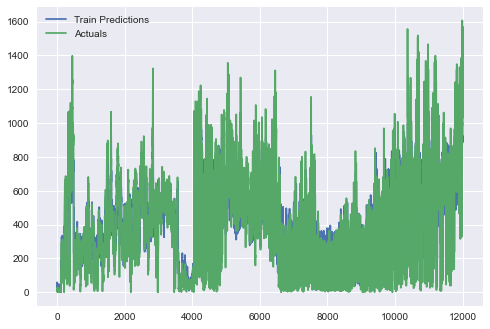

In [29]:
model = load_model('4H_Forecast/4H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(4,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 5 hours forecast

In [30]:
%%time

Trainer(5,6,12)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_29 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_58 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 9s 14ms/step - loss: 249952.2969 - mean_absolute_error: 409.5361 - val_loss: 359207.8438 - val_mean_absolute_error: 484.0741
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 11ms/step - loss: 233945.3125 - mean_absolute_error: 390.5818 - val_loss: 333749.8125 - val_mean_absolute_error: 459.2375
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 13ms/step - loss: 215036.7031 - mean_absolute_error: 369.6996 - val_loss: 312254.0312 - val_mean_absolute_error: 439.5142
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 13ms/step - loss: 198205.9375 - mean_absolute_error: 351.6085 - val_loss: 292620.8125 - val_mean_absolute_error: 421.7379
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 13ms/step - loss: 183068.9531 - mean_absolute_error: 335.5366 - val_loss: 273971.5625 - val_mean_absolute_error: 404.7153
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 4s 12ms/step - loss: 168409.1406 - mean_absolute_error: 320.0234 - val_loss: 255564.8125 - val_mean_absolute_error: 387.8457
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 12ms/step - loss: 154386.3906 - mean_absolute_error: 305.1219 - val_loss: 237925.1094 - val_mean_absolute_error: 371.4783
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 14ms/step - loss: 141041.4531 - mean_absolute_error: 290.7022 - val_loss: 220535.6094 - val_mean_absolute_error: 355.0747
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 4s 12ms/step - loss: 128356.2344 - mean_absolute_error: 276.9689 - val_loss: 204039.7500 - val_mean_absolute_error: 339.4064
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 4s 12ms/step - loss: 117080.6016 - mean_absolute_error: 264.6552 - val_loss: 189521.6875 - val_mean_absolute_error: 325.6543
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 14ms/step - loss: 107363.0781 - mean_absolute_error: 254.1933 - val_loss: 176477.4375 - val_mean_absolute_error: 313.3193
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 18ms/step - loss: 98888.8594 - mean_absolute_error: 244.5891 - val_loss: 164586.5312 - val_mean_absolute_error: 301.5060
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 14ms/step - loss: 91361.7266 - mean_absolute_error: 235.0532 - val_loss: 153845.6406 - val_mean_absolute_error: 290.8805
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 12ms/step - loss: 84750.6328 - mean_absolute_error: 226.1730 - val_loss: 143835.0938 - val_mean_absolute_error: 280.8546
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 4s 12ms/step - loss: 79019.6016 - mean_absolute_error: 218.3481 - val_loss: 134800.4375 - val_mean_absolute_error: 271.5554
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 4s 12ms/step - loss: 74046.1562 - mean_absolute_error: 210.7534 - val_loss: 126383.6094 - val_mean_absolute_error: 261.9662
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 13ms/step - loss: 69646.8047 - mean_absolute_error: 203.4493 - val_loss: 118762.2812 - val_mean_absolute_error: 252.9766
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 4s 11ms/step - loss: 66065.5469 - mean_absolute_error: 197.4896 - val_loss: 112277.7656 - val_mean_absolute_error: 246.2867
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 11ms/step - loss: 63069.8906 - mean_absolute_error: 192.6360 - val_loss: 106374.0156 - val_mean_absolute_error: 239.2841
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 4s 12ms/step - loss: 60675.6172 - mean_absolute_error: 188.3564 - val_loss: 101150.7656 - val_mean_absolute_error: 231.9557
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 6s 16ms/step - loss: 58559.0664 - mean_absolute_error: 184.2135 - val_loss: 96799.4688 - val_mean_absolute_error: 227.5046
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 15ms/step - loss: 57014.4492 - mean_absolute_error: 181.6222 - val_loss: 93229.4531 - val_mean_absolute_error: 223.3812
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 12ms/step - loss: 55604.1133 - mean_absolute_error: 179.1562 - val_loss: 89530.0312 - val_mean_absolute_error: 219.0918
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 4s 12ms/step - loss: 54144.8477 - mean_absolute_error: 176.2814 - val_loss: 85992.8438 - val_mean_absolute_error: 214.0069
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 4s 12ms/step - loss: 52741.0117 - mean_absolute_error: 173.1425 - val_loss: 83482.1953 - val_mean_absolute_error: 210.1370
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 13ms/step - loss: 51516.4023 - mean_absolute_error: 170.2774 - val_loss: 80808.9297 - val_mean_absolute_error: 206.9543
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 13ms/step - loss: 50583.1523 - mean_absolute_error: 168.4641 - val_loss: 78449.1797 - val_mean_absolute_error: 203.9680
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 13ms/step - loss: 49805.9688 - mean_absolute_error: 167.0985 - val_loss: 76425.3438 - val_mean_absolute_error: 202.1494
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 5s 12ms/step - loss: 49143.6172 - mean_absolute_error: 165.9055 - val_loss: 74560.9844 - val_mean_absolute_error: 199.4765
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 16ms/step - loss: 48591.0234 - mean_absolute_error: 164.7565 - val_loss: 73763.0078 - val_mean_absolute_error: 198.2432
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 5s 14ms/step - loss: 48001.2773 - mean_absolute_error: 163.2131 - val_loss: 72301.7422 - val_mean_absolute_error: 196.3006
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 13ms/step - loss: 47410.6484 - mean_absolute_error: 162.0150 - val_loss: 71259.7812 - val_mean_absolute_error: 194.3730
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 4s 12ms/step - loss: 46759.6758 - mean_absolute_error: 160.3553 - val_loss: 68908.6797 - val_mean_absolute_error: 191.4710
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 4s 11ms/step - loss: 46228.0898 - mean_absolute_error: 159.3417 - val_loss: 68281.8203 - val_mean_absolute_error: 190.0942
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 5s 13ms/step - loss: 45859.0273 - mean_absolute_error: 159.2109 - val_loss: 67258.1328 - val_mean_absolute_error: 188.8829
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 5s 12ms/step - loss: 45283.2344 - mean_absolute_error: 157.4524 - val_loss: 66855.7266 - val_mean_absolute_error: 187.7579
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 6s 15ms/step - loss: 44801.8711 - mean_absolute_error: 156.5122 - val_loss: 65900.4688 - val_mean_absolute_error: 185.9947
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 4s 11ms/step - loss: 44294.7891 - mean_absolute_error: 155.1740 - val_loss: 64787.9297 - val_mean_absolute_error: 184.5954
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 15ms/step - loss: 43992.9688 - mean_absolute_error: 155.1582 - val_loss: 64065.6055 - val_mean_absolute_error: 183.5954
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 5s 13ms/step - loss: 43586.2031 - mean_absolute_error: 153.9261 - val_loss: 63179.3828 - val_mean_absolute_error: 182.2695
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 15ms/step - loss: 43186.3008 - mean_absolute_error: 153.3526 - val_loss: 62840.5820 - val_mean_absolute_error: 181.5065
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 13ms/step - loss: 42848.2070 - mean_absolute_error: 152.5224 - val_loss: 61709.7109 - val_mean_absolute_error: 180.6250
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 42498.6562 - mean_absolute_error: 152.0815 - val_loss: 61355.6758 - val_mean_absolute_error: 179.6310
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 15ms/step - loss: 42153.4531 - mean_absolute_error: 151.2198 - val_loss: 61240.0703 - val_mean_absolute_error: 179.1212
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 5s 13ms/step - loss: 41858.4180 - mean_absolute_error: 150.6068 - val_loss: 61338.7148 - val_mean_absolute_error: 178.8297
Epoch 46/100
376/376 [==============================] - 5s 12ms/step - loss: 41571.8789 - mean_absolute_error: 150.0986 - val_loss: 59784.3125 - val_mean_absolute_error: 177.7047
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 5s 13ms/step - loss: 41272.4219 - mean_absolute_error: 149.6629 - val_loss: 60822.6289 - val_mean_absolute_error: 177.8450
Epoch 48/100
376/376 [==============================] - 5s 14ms/step - loss: 41012.1289 - mean_absolute_error: 148.8479 - val_loss: 59560.4414 - val_mean_absolute_error: 177.0778
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 4s 12ms/step - loss: 40675.7812 - mean_absolute_error: 148.2308 - val_loss: 59083.6484 - val_mean_absolute_error: 176.1039
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 5s 13ms/step - loss: 40366.4180 - mean_absolute_error: 147.5554 - val_loss: 58527.4805 - val_mean_absolute_error: 175.7039
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 12ms/step - loss: 40106.0352 - mean_absolute_error: 147.2587 - val_loss: 58548.8516 - val_mean_absolute_error: 175.2998
Epoch 52/100
376/376 [==============================] - 5s 12ms/step - loss: 39890.9727 - mean_absolute_error: 146.6142 - val_loss: 57715.0156 - val_mean_absolute_error: 175.5352
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 5s 13ms/step - loss: 39755.0898 - mean_absolute_error: 146.4026 - val_loss: 58546.2656 - val_mean_absolute_error: 175.3807
Epoch 54/100
376/376 [==============================] - 5s 12ms/step - loss: 39455.7031 - mean_absolute_error: 145.6728 - val_loss: 57296.2070 - val_mean_absolute_error: 174.1196
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 14ms/step - loss: 39293.5430 - mean_absolute_error: 145.2708 - val_loss: 56638.3633 - val_mean_absolute_error: 173.2416
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 13ms/step - loss: 39031.7617 - mean_absolute_error: 144.8478 - val_loss: 56500.4180 - val_mean_absolute_error: 172.5541
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 5s 14ms/step - loss: 38837.0625 - mean_absolute_error: 144.4791 - val_loss: 56733.4219 - val_mean_absolute_error: 172.9786
Epoch 58/100
376/376 [==============================] - 5s 13ms/step - loss: 38689.9570 - mean_absolute_error: 144.1593 - val_loss: 57156.7656 - val_mean_absolute_error: 173.3474
Epoch 59/100
376/376 [==============================] - 5s 14ms/step - loss: 38464.1484 - mean_absolute_error: 143.4826 - val_loss: 56752.5703 - val_mean_absolute_error: 171.5492
Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 38270.6250 - mean_absolute_error: 142.9495 - val_loss: 55750.2266 - val_mean_absolute_error: 172.3038
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 38156.3242 - mean_absolute_error: 142.8609 - val_loss: 56651.4141 - val_mean_absolute_error: 172.4091
Epoch 62/100
376/376 [==============================] - 5s 14ms/step - loss: 37992.3516 - mean_absolute_error: 142.4301 - val_loss: 55946.4609 - val_mean_absolute_error: 171.4906
Epoch 63/100
376/376 [==============================] - 5s 14ms/step - loss: 37814.1406 - mean_absolute_error: 141.8308 - val_loss: 56564.2891 - val_mean_absolute_error: 172.3432
Epoch 64/100
376/376 [==============================] - 5s 13ms/step - loss: 37669.3086 - mean_absolute_error: 141.6656 - val_loss: 56827.0430 - val_mean_absolute_error: 173.7113
Epoch 65/100
376/376 [==============================] - 5s 13ms/step - loss: 37512.6211 - mean_absolute_error: 141.1487 - val_loss: 55891.6797 - val_mean_absolute_error: 172.6810
Epoch 66/100
376/376 [==============================] - 5s 13ms/step - loss: 37404.7109 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 5s 14ms/step - loss: 37388.7266 - mean_absolute_error: 140.6973 - val_loss: 55744.4102 - val_mean_absolute_error: 171.2206
Epoch 68/100
376/376 [==============================] - 5s 13ms/step - loss: 37194.4062 - mean_absolute_error: 140.3286 - val_loss: 56880.5664 - val_mean_absolute_error: 171.3862
Epoch 69/100
376/376 [==============================] - 5s 13ms/step - loss: 37079.6133 - mean_absolute_error: 140.0886 - val_loss: 54817.7266 - val_mean_absolute_error: 169.7555
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 5s 13ms/step - loss: 36885.3906 - mean_absolute_error: 139.5980 - val_loss: 54222.5547 - val_mean_absolute_error: 169.0453
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 5s 14ms/step - loss: 36780.7344 - mean_absolute_error: 139.1353 - val_loss: 56153.9180 - val_mean_absolute_error: 171.3347
Epoch 72/100
376/376 [==============================] - 5s 13ms/step - loss: 36587.9219 - mean_absolute_error: 138.8487 - val_loss: 54421.1211 - val_mean_absolute_error: 169.6345
Epoch 73/100
376/376 [==============================] - 5s 13ms/step - loss: 36574.3672 - mean_absolute_error: 138.5221 - val_loss: 55125.8555 - val_mean_absolute_error: 170.3812
Epoch 74/100
376/376 [==============================] - 5s 14ms/step - loss: 36403.8359 - mean_absolute_error: 138.1087 - val_loss: 55424.4258 - val_mean_absolute_error: 169.4530
Epoch 75/100
376/376 [==============================] - 5s 13ms/step - loss: 36270.0000 - mean_absolute_error: 137.7063 - val_loss: 56523.5508 - val_mean_absolute_error: 170.6129
Epoch 76/100
376/376 [==============================] - 5s 12ms/step - loss: 36326.6914 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_6_SizeWindow\assets


Epoch 96/100
376/376 [==============================] - 4s 12ms/step - loss: 34553.7461 - mean_absolute_error: 132.4646 - val_loss: 54618.5000 - val_mean_absolute_error: 168.2723
Epoch 97/100
376/376 [==============================] - 4s 11ms/step - loss: 34419.6289 - mean_absolute_error: 132.1263 - val_loss: 55317.0781 - val_mean_absolute_error: 168.6544
Epoch 98/100
376/376 [==============================] - 5s 14ms/step - loss: 34320.2422 - mean_absolute_error: 131.9364 - val_loss: 54646.2266 - val_mean_absolute_error: 169.3438
Epoch 99/100
376/376 [==============================] - 5s 12ms/step - loss: 34417.1211 - mean_absolute_error: 131.9926 - val_loss: 54788.2695 - val_mean_absolute_error: 167.5519
Epoch 100/100
376/376 [==============================] - 4s 12ms/step - loss: 34268.5312 - mean_absolute_error: 131.6337 - val_loss: 54203.5273 - val_mean_absolute_error: 167.9593

-------------------------------------------------------------------------------------------------------

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 15ms/step - loss: 237016.1875 - mean_absolute_error: 393.9167 - val_loss: 339198.9688 - val_mean_absolute_error: 464.3324
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 15ms/step - loss: 220370.3906 - mean_absolute_error: 375.5696 - val_loss: 320930.0312 - val_mean_absolute_error: 447.4568
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 15ms/step - loss: 206799.3594 - mean_absolute_error: 360.8742 - val_loss: 304778.8750 - val_mean_absolute_error: 432.7377
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 5s 14ms/step - loss: 194228.7969 - mean_absolute_error: 347.3506 - val_loss: 289781.6562 - val_mean_absolute_error: 419.1063
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 5s 14ms/step - loss: 182112.0469 - mean_absolute_error: 334.5026 - val_loss: 274516.4688 - val_mean_absolute_error: 405.2142
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 5s 14ms/step - loss: 170285.3906 - mean_absolute_error: 321.9621 - val_loss: 259862.4844 - val_mean_absolute_error: 391.8334
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 16ms/step - loss: 158837.7500 - mean_absolute_error: 309.7501 - val_loss: 244603.8906 - val_mean_absolute_error: 377.7446
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 15ms/step - loss: 147194.0938 - mean_absolute_error: 297.2224 - val_loss: 230339.0312 - val_mean_absolute_error: 364.3489
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 13ms/step - loss: 136707.5469 - mean_absolute_error: 285.8480 - val_loss: 216832.9531 - val_mean_absolute_error: 351.6218
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 16ms/step - loss: 126972.3828 - mean_absolute_error: 275.1751 - val_loss: 204191.2344 - val_mean_absolute_error: 339.7495
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 17ms/step - loss: 118025.2344 - mean_absolute_error: 265.3885 - val_loss: 192323.6562 - val_mean_absolute_error: 328.4585
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 15ms/step - loss: 109879.7891 - mean_absolute_error: 256.5408 - val_loss: 181352.1250 - val_mean_absolute_error: 318.1211
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 6s 16ms/step - loss: 102609.9219 - mean_absolute_error: 248.6719 - val_loss: 171331.7656 - val_mean_absolute_error: 308.8350
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 5s 14ms/step - loss: 96067.4453 - mean_absolute_error: 241.1055 - val_loss: 161938.6562 - val_mean_absolute_error: 299.5764
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 18ms/step - loss: 90035.6719 - mean_absolute_error: 233.1483 - val_loss: 153291.5469 - val_mean_absolute_error: 291.3021
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 7s 18ms/step - loss: 84659.5078 - mean_absolute_error: 226.0918 - val_loss: 145218.7344 - val_mean_absolute_error: 283.3783
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 7s 18ms/step - loss: 79738.9219 - mean_absolute_error: 218.9700 - val_loss: 137391.2656 - val_mean_absolute_error: 274.9808
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 5s 12ms/step - loss: 75338.5078 - mean_absolute_error: 212.4141 - val_loss: 130357.3516 - val_mean_absolute_error: 267.6013
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 16ms/step - loss: 71498.7031 - mean_absolute_error: 206.4230 - val_loss: 123790.9531 - val_mean_absolute_error: 260.4302
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 6s 15ms/step - loss: 68055.4609 - mean_absolute_error: 200.8235 - val_loss: 117699.0391 - val_mean_absolute_error: 253.2827
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 14ms/step - loss: 65095.9688 - mean_absolute_error: 195.9345 - val_loss: 111719.4922 - val_mean_absolute_error: 245.4762
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 5s 13ms/step - loss: 62197.3555 - mean_absolute_error: 190.5314 - val_loss: 107292.3594 - val_mean_absolute_error: 241.5193
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 16ms/step - loss: 59809.4297 - mean_absolute_error: 186.0775 - val_loss: 103047.3125 - val_mean_absolute_error: 236.9236
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 14ms/step - loss: 57599.0312 - mean_absolute_error: 182.1569 - val_loss: 97861.1016 - val_mean_absolute_error: 229.8959
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 19ms/step - loss: 55409.6836 - mean_absolute_error: 177.4520 - val_loss: 93039.6172 - val_mean_absolute_error: 222.1726
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 14ms/step - loss: 53633.9766 - mean_absolute_error: 174.1466 - val_loss: 90914.9375 - val_mean_absolute_error: 220.6526
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 5s 13ms/step - loss: 51979.3477 - mean_absolute_error: 170.8718 - val_loss: 87284.5469 - val_mean_absolute_error: 215.8317
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 16ms/step - loss: 50710.7695 - mean_absolute_error: 168.9697 - val_loss: 85433.5469 - val_mean_absolute_error: 214.6211
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 5s 14ms/step - loss: 49520.0312 - mean_absolute_error: 166.8700 - val_loss: 83509.0312 - val_mean_absolute_error: 212.5870
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 16ms/step - loss: 48310.9492 - mean_absolute_error: 164.2061 - val_loss: 82104.7656 - val_mean_absolute_error: 210.7801
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 17ms/step - loss: 47088.9648 - mean_absolute_error: 161.6430 - val_loss: 78777.8047 - val_mean_absolute_error: 205.7487
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 5s 14ms/step - loss: 46112.3125 - mean_absolute_error: 159.8889 - val_loss: 74630.8203 - val_mean_absolute_error: 198.8959
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 15ms/step - loss: 45387.7969 - mean_absolute_error: 158.6759 - val_loss: 77059.5781 - val_mean_absolute_error: 205.1266: 1
Epoch 35/100
376/376 [==============================] - 5s 15ms/step - loss: 44701.2383 - mean_absolute_error: 157.2741 - val_loss: 76144.3906 - val_mean_absolute_error: 203.9928
Epoch 36/100
376/376 [==============================] - 6s 16ms/step - loss: 44108.1914 - mean_absolute_error: 156.0418 - val_loss: 74561.4766 - val_mean_absolute_error: 202.1741
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 5s 14ms/step - loss: 43340.6016 - mean_absolute_error: 154.2606 - val_loss: 73317.0156 - val_mean_absolute_error: 200.4199
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 5s 14ms/step - loss: 42837.9961 - mean_absolute_error: 153.4700 - val_loss: 71379.6172 - val_mean_absolute_error: 197.0060
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 5s 14ms/step - loss: 42241.8984 - mean_absolute_error: 152.1131 - val_loss: 67618.9297 - val_mean_absolute_error: 190.6087
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 16ms/step - loss: 41774.8672 - mean_absolute_error: 151.0097 - val_loss: 70199.3047 - val_mean_absolute_error: 196.2044
Epoch 41/100
376/376 [==============================] - 6s 16ms/step - loss: 41228.7695 - mean_absolute_error: 149.9205 - val_loss: 68675.5781 - val_mean_absolute_error: 193.9373
Epoch 42/100
376/376 [==============================] - 6s 16ms/step - loss: 40795.1562 - mean_absolute_error: 148.7867 - val_loss: 70575.7812 - val_mean_absolute_error: 197.4217
Epoch 43/100
376/376 [==============================] - 6s 16ms/step - loss: 40570.3867 - mean_absolute_error: 148.1892 - val_loss: 66426.8203 - val_mean_absolute_error: 189.0025
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 5s 14ms/step - loss: 40027.9766 - mean_absolute_error: 147.0914 - val_loss: 65946.8047 - val_mean_absolute_error: 189.8660
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 15ms/step - loss: 39599.6914 - mean_absolute_error: 145.9885 - val_loss: 65533.2422 - val_mean_absolute_error: 187.8207
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 39299.8047 - mean_absolute_error: 145.2263 - val_loss: 64774.8359 - val_mean_absolute_error: 185.1525
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 6s 16ms/step - loss: 38965.1875 - mean_absolute_error: 144.5940 - val_loss: 64684.5391 - val_mean_absolute_error: 185.5890
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 17ms/step - loss: 38680.0312 - mean_absolute_error: 143.8464 - val_loss: 63244.0664 - val_mean_absolute_error: 183.9881
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 16ms/step - loss: 38347.9805 - mean_absolute_error: 142.8225 - val_loss: 62847.4844 - val_mean_absolute_error: 183.6213
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 6s 15ms/step - loss: 38167.5469 - mean_absolute_error: 142.1602 - val_loss: 62737.8906 - val_mean_absolute_error: 182.7592
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 6s 17ms/step - loss: 37813.9297 - mean_absolute_error: 141.4923 - val_loss: 63762.6836 - val_mean_absolute_error: 184.3406
Epoch 52/100
376/376 [==============================] - 6s 15ms/step - loss: 37592.1094 - mean_absolute_error: 140.9640 - val_loss: 62277.0508 - val_mean_absolute_error: 181.8948
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 5s 14ms/step - loss: 37512.0195 - mean_absolute_error: 140.6045 - val_loss: 63132.3906 - val_mean_absolute_error: 183.1907
Epoch 54/100
376/376 [==============================] - 5s 14ms/step - loss: 37496.9883 - mean_absolute_error: 140.5027 - val_loss: 62217.4414 - val_mean_absolute_error: 184.5058
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 6s 15ms/step - loss: 37165.9141 - mean_absolute_error: 139.3367 - val_loss: 62358.4570 - val_mean_absolute_error: 181.4682
Epoch 56/100
376/376 [==============================] - 5s 14ms/step - loss: 36978.3984 - mean_absolute_error: 139.2001 - val_loss: 61510.5312 - val_mean_absolute_error: 181.5442
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 5s 14ms/step - loss: 36935.9727 - mean_absolute_error: 138.8634 - val_loss: 62247.7422 - val_mean_absolute_error: 180.7658
Epoch 58/100
376/376 [==============================] - 5s 13ms/step - loss: 36743.9570 - mean_absolute_error: 138.4215 - val_loss: 60432.5273 - val_mean_absolute_error: 178.1967
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 13ms/step - loss: 36498.4531 - mean_absolute_error: 137.7036 - val_loss: 60464.7656 - val_mean_absolute_error: 178.7891
Epoch 60/100
376/376 [==============================] - 6s 16ms/step - loss: 36183.9258 - mean_absolute_error: 137.0742 - val_loss: 61267.6211 - val_mean_absolute_error: 179.9585
Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 36079.8320 - mean_absolute_error: 136.7718 - val_loss: 60312.7227 - val_mean_absolute_error: 177.8048
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 7s 18ms/step - loss: 36000.0625 - mean_absolute_error: 136.2859 - val_loss: 61096.5625 - val_mean_absolute_error: 181.7733
Epoch 63/100
376/376 [==============================] - 6s 17ms/step - loss: 35892.7148 - mean_absolute_error: 136.1308 - val_loss: 59996.7891 - val_mean_absolute_error: 176.9494
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 6s 17ms/step - loss: 35604.0195 - mean_absolute_error: 135.3741 - val_loss: 60627.9570 - val_mean_absolute_error: 178.5726
Epoch 65/100
376/376 [==============================] - 7s 18ms/step - loss: 35544.1133 - mean_absolute_error: 135.2143 - val_loss: 58803.6953 - val_mean_absolute_error: 175.6454
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 5s 14ms/step - loss: 35564.7969 - mean_absolute_error: 135.2643 - val_loss: 59963.2070 - val_mean_absolute_error: 176.2731
Epoch 67/100
376/376 [==============================] - 5s 15ms/step - loss: 35355.5117 - mean_absolute_error: 134.4231 - val_loss: 59508.5859 - val_mean_absolute_error: 176.8108
Epoch 68/100
376/376 [==============================] - 5s 14ms/step - loss: 35298.8750 - mean_absolute_error: 134.5237 - val_loss: 59441.3359 - val_mean_absolute_error: 176.8862
Epoch 69/100
376/376 [==============================] - 5s 14ms/step - loss: 35378.1367 - mean_absolute_error: 134.4552 - val_loss: 58104.5195 - val_mean_absolute_error: 173.8129
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 5s 15ms/step - loss: 35088.5352 - mean_absolute_error: 133.6696 - val_loss: 60475.5195 - val_mean_absolute_error: 178.5463
Epoch 71/100
376/376 [==============================] - 5s 14ms/step - loss: 34828.0859 - mean_absolute_error: 133.5328 - val_loss: 59670.8828 - val_mean_absolute_error: 176.9670
Epoch 72/100
376/376 [==============================] - 5s 14ms/step - loss: 34814.0508 - mean_absolute_error: 133.0798 - val_loss: 59004.6602 - val_mean_absolute_error: 177.7975
Epoch 73/100
376/376 [==============================] - 5s 14ms/step - loss: 34669.1523 - mean_absolute_error: 132.9069 - val_loss: 57956.6211 - val_mean_absolute_error: 173.8035
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 6s 17ms/step - loss: 34589.3789 - mean_absolute_error: 132.6860 - val_loss: 59254.0742 - val_mean_absolute_error: 175.5222
Epoch 75/100
376/376 [==============================] - 6s 16ms/step - loss: 34511.4805 - mean_absolute_error: 132.3356 - val_loss: 58623.7617 - val_mean_absolute_error: 175.5428
Epoch 76/100
376/376 [==============================] - 6s 16ms/step - loss: 34239.8906 - mean_absolute_error: 131.7042 - val_loss: 57569.2656 - val_mean_absolute_error: 173.7336
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 5s 14ms/step - loss: 34352.0547 - mean_absolute_error: 131.9400 - val_loss: 58216.3359 - val_mean_absolute_error: 174.4751
Epoch 78/100
376/376 [==============================] - 6s 16ms/step - loss: 34156.3789 - mean_absolute_error: 131.5997 - val_loss: 59487.0234 - val_mean_absolute_error: 176.1436
Epoch 79/100
376/376 [==============================] - 6s 16ms/step - loss: 33991.7461 - mean_absolute_error: 131.0180 - val_loss: 59304.1602 - val_mean_absolute_error: 175.0114
Epoch 80/100
376/376 [==============================] - 5s 14ms/step - loss: 33948.0273 - mean_absolute_error: 131.0000 - val_loss: 59294.0195 - val_mean_absolute_error: 174.0898
Epoch 81/100
376/376 [==============================] - 5s 14ms/step - loss: 33955.1953 - mean_absolute_error: 130.6597 - val_loss: 59264.2227 - val_mean_absolute_error: 174.6902
Epoch 82/100
376/376 [==============================] - 5s 13ms/step - loss: 33591.6562 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 84/100
376/376 [==============================] - 6s 15ms/step - loss: 33525.0742 - mean_absolute_error: 129.7807 - val_loss: 56913.2617 - val_mean_absolute_error: 173.2401
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 6s 16ms/step - loss: 33445.2656 - mean_absolute_error: 129.2788 - val_loss: 57043.8789 - val_mean_absolute_error: 174.3206
Epoch 86/100
376/376 [==============================] - 6s 17ms/step - loss: 33521.2031 - mean_absolute_error: 129.7265 - val_loss: 58340.6992 - val_mean_absolute_error: 174.5372
Epoch 87/100
376/376 [==============================] - 6s 17ms/step - loss: 33238.0977 - mean_absolute_error: 128.8519 - val_loss: 57312.8828 - val_mean_absolute_error: 173.5291: 33455.8281 - mean_absolute_error: 129.181 - ETA: 0s - loss: 33374.4375 - mean_absolute_er
Epoch 88/100
376/376 [==============================] - 6s 16ms/step - loss: 33101.4844 - mean_absolute_error: 128.7232 - val_loss: 56758.4219 - val_mean_absolute_error: 170.1384
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 89/100
376/376 [==============================] - 6s 16ms/step - loss: 33144.0859 - mean_absolute_error: 128.5088 - val_loss: 57291.7383 - val_mean_absolute_error: 173.6305
Epoch 90/100
376/376 [==============================] - 7s 19ms/step - loss: 33008.0938 - mean_absolute_error: 128.2482 - val_loss: 57357.2734 - val_mean_absolute_error: 172.0109
Epoch 91/100
376/376 [==============================] - 6s 16ms/step - loss: 32829.0859 - mean_absolute_error: 127.7260 - val_loss: 57546.5312 - val_mean_absolute_error: 173.5252
Epoch 92/100
376/376 [==============================] - 6s 15ms/step - loss: 32831.6953 - mean_absolute_error: 127.5984 - val_loss: 57337.5117 - val_mean_absolute_error: 172.7233
Epoch 93/100
376/376 [==============================] - 6s 15ms/step - loss: 32785.3984 - mean_absolute_error: 127.6769 - val_loss: 56442.4570 - val_mean_absolute_error: 170.3346
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 7s 20ms/step - loss: 32697.4062 - mean_absolute_error: 127.4676 - val_loss: 56722.6367 - val_mean_absolute_error: 172.2262
Epoch 95/100
376/376 [==============================] - 7s 17ms/step - loss: 32609.8887 - mean_absolute_error: 126.9554 - val_loss: 56647.4180 - val_mean_absolute_error: 169.7473
Epoch 96/100
376/376 [==============================] - 6s 16ms/step - loss: 32683.8008 - mean_absolute_error: 127.2303 - val_loss: 56041.7344 - val_mean_absolute_error: 171.5018
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 5s 15ms/step - loss: 32393.4883 - mean_absolute_error: 126.3736 - val_loss: 57808.9961 - val_mean_absolute_error: 175.0412
Epoch 98/100
376/376 [==============================] - 6s 17ms/step - loss: 32445.4785 - mean_absolute_error: 126.8607 - val_loss: 59997.9766 - val_mean_absolute_error: 177.9005
Epoch 99/100
376/376 [==============================] - 6s 15ms/step - loss: 32370.2422 - mean_absolute_error: 126.4815 - val_loss: 56277.1758 - val_mean_absolute_error: 172.2179
Epoch 100/100
376/376 [==============================] - 5s 15ms/step - loss: 32205.2832 - mean_absolute_error: 126.0438 - val_loss: 57442.3828 - val_mean_absolute_error: 171.1901

-----------------------------------------------------------------------------------------------------------

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_31 (

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 14ms/step - loss: 248298.3125 - mean_absolute_error: 407.5657 - val_loss: 359428.2812 - val_mean_absolute_error: 484.8492
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 18ms/step - loss: 242472.4219 - mean_absolute_error: 400.7179 - val_loss: 352742.7500 - val_mean_absolute_error: 478.1631
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 15ms/step - loss: 236561.6719 - mean_absolute_error: 393.8627 - val_loss: 345206.4062 - val_mean_absolute_error: 470.7531
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 19ms/step - loss: 230644.5000 - mean_absolute_error: 387.1450 - val_loss: 338074.1562 - val_mean_absolute_error: 463.8207
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 18ms/step - loss: 224563.9219 - mean_absolute_error: 380.2993 - val_loss: 330525.9062 - val_mean_absolute_error: 456.5997
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 18ms/step - loss: 218288.0156 - mean_absolute_error: 373.3531 - val_loss: 322741.0938 - val_mean_absolute_error: 449.2637
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 16ms/step - loss: 211567.5312 - mean_absolute_error: 366.0319 - val_loss: 313937.0312 - val_mean_absolute_error: 441.1484
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 15ms/step - loss: 204328.7969 - mean_absolute_error: 358.2005 - val_loss: 305185.7812 - val_mean_absolute_error: 433.1817
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 17ms/step - loss: 197110.8125 - mean_absolute_error: 350.4371 - val_loss: 296073.2500 - val_mean_absolute_error: 424.9154
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 7s 19ms/step - loss: 189750.5625 - mean_absolute_error: 342.5549 - val_loss: 286935.3438 - val_mean_absolute_error: 416.5993
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 19ms/step - loss: 182408.0781 - mean_absolute_error: 334.7575 - val_loss: 277712.7188 - val_mean_absolute_error: 408.1897
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 18ms/step - loss: 175059.5312 - mean_absolute_error: 326.9690 - val_loss: 268432.8125 - val_mean_absolute_error: 399.7599
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 6s 17ms/step - loss: 167733.2188 - mean_absolute_error: 319.0824 - val_loss: 259198.4219 - val_mean_absolute_error: 391.3465
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 6s 16ms/step - loss: 160448.1562 - mean_absolute_error: 311.2648 - val_loss: 249683.5469 - val_mean_absolute_error: 382.5497
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 20ms/step - loss: 153049.3594 - mean_absolute_error: 303.2677 - val_loss: 240329.4375 - val_mean_absolute_error: 373.8651
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 17ms/step - loss: 145961.7656 - mean_absolute_error: 295.5335 - val_loss: 231212.5312 - val_mean_absolute_error: 365.3266
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 16ms/step - loss: 139074.0938 - mean_absolute_error: 287.9406 - val_loss: 222271.9375 - val_mean_absolute_error: 356.9090
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 7s 19ms/step - loss: 132283.3750 - mean_absolute_error: 280.4290 - val_loss: 213261.3906 - val_mean_absolute_error: 348.4758
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 17ms/step - loss: 125759.4219 - mean_absolute_error: 273.1740 - val_loss: 204768.0781 - val_mean_absolute_error: 340.5012
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 6s 17ms/step - loss: 119604.0469 - mean_absolute_error: 266.2532 - val_loss: 196530.4844 - val_mean_absolute_error: 332.5993
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 8s 20ms/step - loss: 113760.0156 - mean_absolute_error: 259.7373 - val_loss: 188613.7500 - val_mean_absolute_error: 325.0840
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 18ms/step - loss: 108230.4609 - mean_absolute_error: 253.4494 - val_loss: 181055.3125 - val_mean_absolute_error: 317.8878
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 18ms/step - loss: 102975.1016 - mean_absolute_error: 247.4012 - val_loss: 173640.2031 - val_mean_absolute_error: 310.6562
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 17ms/step - loss: 97827.6016 - mean_absolute_error: 241.3925 - val_loss: 166149.9375 - val_mean_absolute_error: 303.2474
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 9s 25ms/step - loss: 93073.4766 - mean_absolute_error: 235.4597 - val_loss: 159341.6875 - val_mean_absolute_error: 296.3899: 10s 
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 20ms/step - loss: 88638.6875 - mean_absolute_error: 229.7204 - val_loss: 152613.7344 - val_mean_absolute_error: 289.70268994
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 20ms/step - loss: 84400.8047 - mean_absolute_error: 223.6444 - val_loss: 146123.2656 - val_mean_absolute_error: 282.3934
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 17ms/step - loss: 80250.8984 - mean_absolute_error: 217.1945 - val_loss: 139596.0156 - val_mean_absolute_error: 274.7005
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 15ms/step - loss: 76388.2109 - mean_absolute_error: 211.1677 - val_loss: 133340.1094 - val_mean_absolute_error: 267.4927
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 16ms/step - loss: 72925.3203 - mean_absolute_error: 206.2203 - val_loss: 127574.6172 - val_mean_absolute_error: 260.7318
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 6s 16ms/step - loss: 69743.3984 - mean_absolute_error: 201.4831 - val_loss: 122160.6797 - val_mean_absolute_error: 254.9881
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 16ms/step - loss: 66696.6484 - mean_absolute_error: 196.4396 - val_loss: 116656.7578 - val_mean_absolute_error: 248.0712
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 15ms/step - loss: 63838.5547 - mean_absolute_error: 191.7100 - val_loss: 111488.8359 - val_mean_absolute_error: 241.4750
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 16ms/step - loss: 61066.5820 - mean_absolute_error: 187.0261 - val_loss: 106670.9375 - val_mean_absolute_error: 235.2531
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 18ms/step - loss: 58828.1094 - mean_absolute_error: 183.4538 - val_loss: 102827.7734 - val_mean_absolute_error: 230.3712
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 8s 20ms/step - loss: 56792.7656 - mean_absolute_error: 179.9084 - val_loss: 99502.7422 - val_mean_absolute_error: 226.3193
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 6s 17ms/step - loss: 54892.4805 - mean_absolute_error: 176.3836 - val_loss: 94663.2812 - val_mean_absolute_error: 220.2316
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 16ms/step - loss: 53208.7969 - mean_absolute_error: 173.3388 - val_loss: 91380.6484 - val_mean_absolute_error: 215.5223
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 15ms/step - loss: 51617.7422 - mean_absolute_error: 170.3426 - val_loss: 88885.7031 - val_mean_absolute_error: 212.8054
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 7s 20ms/step - loss: 50152.9922 - mean_absolute_error: 167.2211 - val_loss: 84632.4531 - val_mean_absolute_error: 207.3342
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 16ms/step - loss: 48900.0508 - mean_absolute_error: 164.8133 - val_loss: 83424.1875 - val_mean_absolute_error: 205.7927
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 8s 21ms/step - loss: 47814.2461 - mean_absolute_error: 162.8120 - val_loss: 81841.8203 - val_mean_absolute_error: 203.7872
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 7s 18ms/step - loss: 46833.7578 - mean_absolute_error: 160.8539 - val_loss: 78339.0625 - val_mean_absolute_error: 199.3634
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 17ms/step - loss: 45860.7031 - mean_absolute_error: 158.9156 - val_loss: 76420.9297 - val_mean_absolute_error: 197.2976
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 45039.2617 - mean_absolute_error: 157.3301 - val_loss: 75567.6328 - val_mean_absolute_error: 196.5207
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 8s 21ms/step - loss: 44133.1328 - mean_absolute_error: 155.2909 - val_loss: 73979.0547 - val_mean_absolute_error: 194.4595
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 17ms/step - loss: 43256.9922 - mean_absolute_error: 153.4147 - val_loss: 71511.8984 - val_mean_absolute_error: 191.8204
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 6s 16ms/step - loss: 42658.3945 - mean_absolute_error: 152.3725 - val_loss: 71598.4531 - val_mean_absolute_error: 191.6590
Epoch 50/100
376/376 [==============================] - 6s 16ms/step - loss: 41926.4375 - mean_absolute_error: 150.5477 - val_loss: 70705.2266 - val_mean_absolute_error: 189.9274
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 7s 17ms/step - loss: 41606.1250 - mean_absolute_error: 149.7783 - val_loss: 68782.5156 - val_mean_absolute_error: 188.9117
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 20ms/step - loss: 41001.3789 - mean_absolute_error: 148.4760 - val_loss: 67118.8828 - val_mean_absolute_error: 185.6941
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 9s 25ms/step - loss: 40627.4375 - mean_absolute_error: 147.7942 - val_loss: 66805.3984 - val_mean_absolute_error: 185.5954
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 7s 19ms/step - loss: 40153.0938 - mean_absolute_error: 146.5035 - val_loss: 66129.6406 - val_mean_absolute_error: 183.6097
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 9s 24ms/step - loss: 39761.5938 - mean_absolute_error: 145.5334 - val_loss: 66420.9531 - val_mean_absolute_error: 184.3214
Epoch 56/100
376/376 [==============================] - 9s 24ms/step - loss: 39439.1992 - mean_absolute_error: 144.9156 - val_loss: 65020.2812 - val_mean_absolute_error: 183.2882
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 6s 17ms/step - loss: 39077.2383 - mean_absolute_error: 143.7538 - val_loss: 64040.1016 - val_mean_absolute_error: 181.9636
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 6s 17ms/step - loss: 38700.5820 - mean_absolute_error: 142.9305 - val_loss: 63751.4375 - val_mean_absolute_error: 181.3736
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 6s 17ms/step - loss: 38336.5391 - mean_absolute_error: 142.0450 - val_loss: 62259.4336 - val_mean_absolute_error: 180.3587
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 6s 16ms/step - loss: 38087.4492 - mean_absolute_error: 141.3382 - val_loss: 63123.2812 - val_mean_absolute_error: 180.1907
Epoch 61/100
376/376 [==============================] - 6s 15ms/step - loss: 37858.0977 - mean_absolute_error: 140.7978 - val_loss: 62682.4297 - val_mean_absolute_error: 178.9644
Epoch 62/100
376/376 [==============================] - 6s 16ms/step - loss: 37653.0469 - mean_absolute_error: 140.1115 - val_loss: 62912.8164 - val_mean_absolute_error: 180.1802
Epoch 63/100
376/376 [==============================] - 5s 14ms/step - loss: 37286.2617 - mean_absolute_error: 139.2781 - val_loss: 60683.0664 - val_mean_absolute_error: 177.2678
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 7s 20ms/step - loss: 37200.6133 - mean_absolute_error: 138.9004 - val_loss: 63308.2383 - val_mean_absolute_error: 179.2226
Epoch 65/100
376/376 [==============================] - 8s 21ms/step - loss: 37030.1016 - mean_absolute_error: 138.3526 - val_loss: 61409.9727 - val_mean_absolute_error: 178.4464
Epoch 66/100
376/376 [==============================] - 7s 18ms/step - loss: 36725.3672 - mean_absolute_error: 137.8611 - val_loss: 61361.2812 - val_mean_absolute_error: 177.3437 0s - loss: 36759.0430 - mean_absolute_error:
Epoch 67/100
376/376 [==============================] - 8s 20ms/step - loss: 36468.5234 - mean_absolute_error: 137.1693 - val_loss: 60100.7812 - val_mean_absolute_error: 175.9001
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 7s 19ms/step - loss: 36196.4453 - mean_absolute_error: 136.4215 - val_loss: 60307.8398 - val_mean_absolute_error: 176.5021
Epoch 69/100
376/376 [==============================] - 7s 20ms/step - loss: 36030.8867 - mean_absolute_error: 136.0893 - val_loss: 58973.1289 - val_mean_absolute_error: 174.0137
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 8s 20ms/step - loss: 35865.6602 - mean_absolute_error: 135.4421 - val_loss: 58501.7539 - val_mean_absolute_error: 173.9912
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 6s 17ms/step - loss: 35665.6094 - mean_absolute_error: 134.9247 - val_loss: 58961.6289 - val_mean_absolute_error: 174.0060
Epoch 72/100
376/376 [==============================] - 6s 16ms/step - loss: 35619.9844 - mean_absolute_error: 134.7969 - val_loss: 58977.7930 - val_mean_absolute_error: 174.6421
Epoch 73/100
376/376 [==============================] - 6s 16ms/step - loss: 35386.5508 - mean_absolute_error: 134.2731 - val_loss: 59240.2852 - val_mean_absolute_error: 173.9856
Epoch 74/100
376/376 [==============================] - 6s 16ms/step - loss: 35135.3438 - mean_absolute_error: 133.6667 - val_loss: 59900.1328 - val_mean_absolute_error: 174.7142
Epoch 75/100
376/376 [==============================] - 6s 16ms/step - loss: 35061.6602 - mean_absolute_error: 133.5057 - val_loss: 57649.0430 - val_mean_absolute_error: 172.2848
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 76/100
376/376 [==============================] - 6s 17ms/step - loss: 34835.6719 - mean_absolute_error: 132.6503 - val_loss: 58509.1406 - val_mean_absolute_error: 172.7780
Epoch 77/100
376/376 [==============================] - 6s 16ms/step - loss: 34634.8711 - mean_absolute_error: 132.0186 - val_loss: 58206.8516 - val_mean_absolute_error: 173.0511
Epoch 78/100
376/376 [==============================] - 6s 16ms/step - loss: 34675.7109 - mean_absolute_error: 132.1959 - val_loss: 57475.9570 - val_mean_absolute_error: 171.5258
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 6s 15ms/step - loss: 34483.9727 - mean_absolute_error: 131.6118 - val_loss: 59383.4688 - val_mean_absolute_error: 173.2704
Epoch 80/100
376/376 [==============================] - 6s 16ms/step - loss: 34331.5117 - mean_absolute_error: 131.3437 - val_loss: 57521.5273 - val_mean_absolute_error: 171.1667
Epoch 81/100
376/376 [==============================] - 6s 15ms/step - loss: 34114.0234 - mean_absolute_error: 130.5139 - val_loss: 58145.4336 - val_mean_absolute_error: 173.3537
Epoch 82/100
376/376 [==============================] - 6s 15ms/step - loss: 34031.9141 - mean_absolute_error: 130.4260 - val_loss: 60558.7266 - val_mean_absolute_error: 173.7686
Epoch 83/100
376/376 [==============================] - 6s 15ms/step - loss: 34027.7109 - mean_absolute_error: 130.4752 - val_loss: 57962.8281 - val_mean_absolute_error: 171.4097
Epoch 84/100
376/376 [==============================] - 6s 15ms/step - loss: 33795.3359 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 6s 15ms/step - loss: 33792.7148 - mean_absolute_error: 129.7805 - val_loss: 57602.1445 - val_mean_absolute_error: 170.4240
Epoch 86/100
376/376 [==============================] - 5s 15ms/step - loss: 33724.2383 - mean_absolute_error: 129.4553 - val_loss: 57448.4805 - val_mean_absolute_error: 173.5101
Epoch 87/100
376/376 [==============================] - 5s 15ms/step - loss: 33624.4102 - mean_absolute_error: 129.1418 - val_loss: 56774.8867 - val_mean_absolute_error: 171.7283
Epoch 88/100
376/376 [==============================] - 6s 15ms/step - loss: 33583.9023 - mean_absolute_error: 128.9530 - val_loss: 56841.2227 - val_mean_absolute_error: 169.4192
Epoch 89/100
376/376 [==============================] - 6s 15ms/step - loss: 33361.8672 - mean_absolute_error: 128.6633 - val_loss: 57339.5859 - val_mean_absolute_error: 169.7374
Epoch 90/100
376/376 [==============================] - 6s 16ms/step - loss: 33288.4375 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 8s 21ms/step - loss: 33154.8320 - mean_absolute_error: 128.0918 - val_loss: 57988.9961 - val_mean_absolute_error: 170.0696
Epoch 92/100
376/376 [==============================] - 6s 17ms/step - loss: 33128.8984 - mean_absolute_error: 127.9077 - val_loss: 57238.1484 - val_mean_absolute_error: 175.7539
Epoch 93/100
376/376 [==============================] - 6s 15ms/step - loss: 33087.4922 - mean_absolute_error: 127.7840 - val_loss: 56931.7930 - val_mean_absolute_error: 168.3726
Epoch 94/100
376/376 [==============================] - 6s 15ms/step - loss: 33002.6094 - mean_absolute_error: 127.7071 - val_loss: 55218.3047 - val_mean_absolute_error: 169.2754
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_8_SizeWindow\assets


Epoch 95/100
376/376 [==============================] - 7s 18ms/step - loss: 32805.7734 - mean_absolute_error: 126.9171 - val_loss: 56544.0742 - val_mean_absolute_error: 172.1577
Epoch 96/100
376/376 [==============================] - 7s 18ms/step - loss: 32783.2148 - mean_absolute_error: 127.1514 - val_loss: 56814.1836 - val_mean_absolute_error: 168.7836
Epoch 97/100
376/376 [==============================] - 7s 18ms/step - loss: 32644.9844 - mean_absolute_error: 126.7394 - val_loss: 55703.3164 - val_mean_absolute_error: 171.7688
Epoch 98/100
376/376 [==============================] - 6s 17ms/step - loss: 32674.5664 - mean_absolute_error: 126.4779 - val_loss: 57201.2852 - val_mean_absolute_error: 171.0697
Epoch 99/100
376/376 [==============================] - 7s 17ms/step - loss: 32556.2637 - mean_absolute_error: 126.4809 - val_loss: 55399.8945 - val_mean_absolute_error: 169.6655
Epoch 100/100
376/376 [==============================] - 7s 17ms/step - loss: 32456.1816 - mean_absolute_

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 19ms/step - loss: 244194.8594 - mean_absolute_error: 402.5585 - val_loss: 351529.3750 - val_mean_absolute_error: 476.7644
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 6s 17ms/step - loss: 233479.2656 - mean_absolute_error: 390.2325 - val_loss: 338688.0312 - val_mean_absolute_error: 464.3008
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 8s 22ms/step - loss: 223099.3594 - mean_absolute_error: 378.6265 - val_loss: 325899.8438 - val_mean_absolute_error: 452.1833
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 19ms/step - loss: 212772.0938 - mean_absolute_error: 367.2422 - val_loss: 313668.5312 - val_mean_absolute_error: 440.8234
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 19ms/step - loss: 202482.1250 - mean_absolute_error: 356.1280 - val_loss: 300768.7500 - val_mean_absolute_error: 429.0702
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 9s 23ms/step - loss: 192004.8125 - mean_absolute_error: 344.9103 - val_loss: 287770.0938 - val_mean_absolute_error: 417.2076
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 23ms/step - loss: 181429.4375 - mean_absolute_error: 333.6225 - val_loss: 274618.6250 - val_mean_absolute_error: 405.2678
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 17ms/step - loss: 171095.5781 - mean_absolute_error: 322.5399 - val_loss: 261645.8281 - val_mean_absolute_error: 393.4070
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 9s 24ms/step - loss: 160938.2188 - mean_absolute_error: 311.6129 - val_loss: 248714.8281 - val_mean_absolute_error: 381.4895s - loss: 161265.1562 - mean_ab
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 7s 19ms/step - loss: 151008.6094 - mean_absolute_error: 300.8444 - val_loss: 236203.4375 - val_mean_absolute_error: 369.8229
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 19ms/step - loss: 141406.0781 - mean_absolute_error: 290.2063 - val_loss: 223717.6719 - val_mean_absolute_error: 358.0819
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 8s 22ms/step - loss: 132161.3594 - mean_absolute_error: 279.8947 - val_loss: 211863.7344 - val_mean_absolute_error: 346.8664
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 7s 19ms/step - loss: 123538.0156 - mean_absolute_error: 270.0891 - val_loss: 200648.3594 - val_mean_absolute_error: 336.2646
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 23ms/step - loss: 115511.9219 - mean_absolute_error: 261.0227 - val_loss: 189992.9375 - val_mean_absolute_error: 326.1360
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 10s 27ms/step - loss: 108136.2109 - mean_absolute_error: 252.8390 - val_loss: 180084.7969 - val_mean_absolute_error: 316.8278
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 25ms/step - loss: 101396.0078 - mean_absolute_error: 244.9963 - val_loss: 170843.3125 - val_mean_absolute_error: 308.0333
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 8s 22ms/step - loss: 95237.7500 - mean_absolute_error: 237.7069 - val_loss: 162094.7500 - val_mean_absolute_error: 299.5078
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 21ms/step - loss: 89666.6875 - mean_absolute_error: 230.7309 - val_loss: 154161.5312 - val_mean_absolute_error: 291.9936
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 20ms/step - loss: 84524.8281 - mean_absolute_error: 223.7890 - val_loss: 146505.1094 - val_mean_absolute_error: 284.4706
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 9s 23ms/step - loss: 79629.1797 - mean_absolute_error: 216.5905 - val_loss: 138815.4219 - val_mean_absolute_error: 275.5859
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 9s 23ms/step - loss: 75176.6719 - mean_absolute_error: 209.6059 - val_loss: 131840.2031 - val_mean_absolute_error: 268.5124mean_absol
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 8s 22ms/step - loss: 71077.8438 - mean_absolute_error: 203.0660 - val_loss: 124952.2031 - val_mean_absolute_error: 260.4201
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 8s 22ms/step - loss: 67497.0156 - mean_absolute_error: 197.2968 - val_loss: 118955.8672 - val_mean_absolute_error: 253.9338
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 12s 33ms/step - loss: 64356.7344 - mean_absolute_error: 192.0608 - val_loss: 112997.6328 - val_mean_absolute_error: 245.8550
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 8s 20ms/step - loss: 61550.9805 - mean_absolute_error: 186.8996 - val_loss: 107699.6328 - val_mean_absolute_error: 239.4363
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 8s 21ms/step - loss: 59256.0781 - mean_absolute_error: 183.2218 - val_loss: 103228.4922 - val_mean_absolute_error: 234.7473
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 9s 24ms/step - loss: 57162.3242 - mean_absolute_error: 179.0155 - val_loss: 98638.3672 - val_mean_absolute_error: 228.4662
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 8s 22ms/step - loss: 55351.0234 - mean_absolute_error: 175.5846 - val_loss: 94953.1172 - val_mean_absolute_error: 224.5643
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 9s 23ms/step - loss: 53833.6758 - mean_absolute_error: 172.7459 - val_loss: 91773.4766 - val_mean_absolute_error: 220.1130
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 8s 21ms/step - loss: 52425.2578 - mean_absolute_error: 170.0505 - val_loss: 88108.1484 - val_mean_absolute_error: 216.2962
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 7s 19ms/step - loss: 51180.3281 - mean_absolute_error: 167.7084 - val_loss: 85821.0625 - val_mean_absolute_error: 212.4977
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 7s 19ms/step - loss: 50036.9961 - mean_absolute_error: 165.4921 - val_loss: 82658.3516 - val_mean_absolute_error: 208.6717
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 18ms/step - loss: 48803.7031 - mean_absolute_error: 162.4592 - val_loss: 79991.8203 - val_mean_absolute_error: 204.9101 mean_absolute_error: 162.78 - ETA: 0s - loss: 48891.0703 - mean_absolute_erro - ETA: 0s - loss: 48966.7422 - mean_absolute_error: 162
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 8s 21ms/step - loss: 47715.3438 - mean_absolute_error: 160.3720 - val_loss: 78064.0078 - val_mean_absolute_error: 202.3259
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 10s 28ms/step - loss: 46879.1836 - mean_absolute_error: 158.9682 - val_loss: 76097.0625 - val_mean_absolute_error: 200.1436 2s - loss: 46
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 11s 29ms/step - loss: 46075.2969 - mean_absolute_error: 157.2798 - val_loss: 73623.1562 - val_mean_absolute_error: 196.8478
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 9s 23ms/step - loss: 45074.6836 - mean_absolute_error: 155.4495 - val_loss: 71557.0938 - val_mean_absolute_error: 194.0098
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 10s 25ms/step - loss: 44118.8672 - mean_absolute_error: 153.3873 - val_loss: 71230.1172 - val_mean_absolute_error: 192.6775
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 9s 23ms/step - loss: 43225.9297 - mean_absolute_error: 151.7103 - val_loss: 69358.4766 - val_mean_absolute_error: 189.1021
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 9s 23ms/step - loss: 42455.0469 - mean_absolute_error: 150.3229 - val_loss: 67556.1953 - val_mean_absolute_error: 187.4879
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 22ms/step - loss: 41715.6719 - mean_absolute_error: 148.6175 - val_loss: 66831.8359 - val_mean_absolute_error: 185.7231
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 9s 23ms/step - loss: 41145.5586 - mean_absolute_error: 147.9230 - val_loss: 65336.0469 - val_mean_absolute_error: 184.6144
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 8s 21ms/step - loss: 40573.4062 - mean_absolute_error: 146.5604 - val_loss: 66361.1016 - val_mean_absolute_error: 184.4096
Epoch 45/100
376/376 [==============================] - 8s 23ms/step - loss: 40014.3359 - mean_absolute_error: 145.4217 - val_loss: 63728.6289 - val_mean_absolute_error: 181.3779
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 10s 26ms/step - loss: 39447.6289 - mean_absolute_error: 144.2919 - val_loss: 64197.6719 - val_mean_absolute_error: 181.6696 - loss: 39612.4102 - mean_ab
Epoch 47/100
376/376 [==============================] - 9s 24ms/step - loss: 38848.5898 - mean_absolute_error: 142.7564 - val_loss: 62256.7617 - val_mean_absolute_error: 178.6356
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 9s 24ms/step - loss: 38320.5312 - mean_absolute_error: 141.8987 - val_loss: 61229.1641 - val_mean_absolute_error: 176.78632.4375 - mean_absolute_error: 143.369 - ETA: 3s - loss: 39422.8555 - mean_absolute_error: 143.6 - ETA: 3s - lo
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 8s 22ms/step - loss: 37788.0938 - mean_absolute_error: 140.6055 - val_loss: 59760.1719 - val_mean_absolute_error: 175.7988
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 9s 23ms/step - loss: 37416.3398 - mean_absolute_error: 139.4072 - val_loss: 62043.1328 - val_mean_absolute_error: 178.1452
Epoch 51/100
376/376 [==============================] - 12s 33ms/step - loss: 36798.9219 - mean_absolute_error: 138.3153 - val_loss: 59300.3164 - val_mean_absolute_error: 174.8874
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 12s 33ms/step - loss: 36533.5430 - mean_absolute_error: 137.9378 - val_loss: 63544.4570 - val_mean_absolute_error: 178.5545
Epoch 53/100
376/376 [==============================] - 12s 32ms/step - loss: 36046.3438 - mean_absolute_error: 136.7856 - val_loss: 57387.7305 - val_mean_absolute_error: 170.9096
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 11s 30ms/step - loss: 35811.8672 - mean_absolute_error: 136.0715 - val_loss: 57727.9375 - val_mean_absolute_error: 171.2608
Epoch 55/100
376/376 [==============================] - 13s 33ms/step - loss: 35391.7031 - mean_absolute_error: 135.4453 - val_loss: 58449.2422 - val_mean_absolute_error: 172.2962
Epoch 56/100
376/376 [==============================] - 16s 42ms/step - loss: 35092.5742 - mean_absolute_error: 134.4019 - val_loss: 56495.3906 - val_mean_absolute_error: 171.8728
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 11s 30ms/step - loss: 34839.2812 - mean_absolute_error: 133.7198 - val_loss: 58392.9180 - val_mean_absolute_error: 170.8336
Epoch 58/100
376/376 [==============================] - 8s 21ms/step - loss: 34444.9180 - mean_absolute_error: 132.4911 - val_loss: 57419.5508 - val_mean_absolute_error: 170.8486
Epoch 59/100
376/376 [==============================] - 6s 17ms/step - loss: 34179.6758 - mean_absolute_error: 132.2031 - val_loss: 57024.7148 - val_mean_absolute_error: 173.3429
Epoch 60/100
376/376 [==============================] - 6s 17ms/step - loss: 34176.7422 - mean_absolute_error: 131.9969 - val_loss: 57090.9727 - val_mean_absolute_error: 174.4768
Epoch 61/100
376/376 [==============================] - 6s 16ms/step - loss: 33833.3750 - mean_absolute_error: 131.2681 - val_loss: 56469.1602 - val_mean_absolute_error: 170.9144
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 8s 21ms/step - loss: 33721.5273 - mean_absolute_error: 130.7914 - val_loss: 55698.4141 - val_mean_absolute_error: 171.8644
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 7s 20ms/step - loss: 33547.3828 - mean_absolute_error: 130.6073 - val_loss: 55123.6641 - val_mean_absolute_error: 166.6150
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 9s 24ms/step - loss: 33267.8359 - mean_absolute_error: 129.7909 - val_loss: 54474.5664 - val_mean_absolute_error: 165.6563
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 8s 22ms/step - loss: 33096.8086 - mean_absolute_error: 128.8445 - val_loss: 56219.8906 - val_mean_absolute_error: 168.1469an
Epoch 66/100
376/376 [==============================] - 8s 22ms/step - loss: 32898.0938 - mean_absolute_error: 128.6069 - val_loss: 55130.9570 - val_mean_absolute_error: 167.6291
Epoch 67/100
376/376 [==============================] - 8s 22ms/step - loss: 32937.9219 - mean_absolute_error: 128.8733 - val_loss: 55388.8750 - val_mean_absolute_error: 165.5127
Epoch 68/100
376/376 [==============================] - 8s 22ms/step - loss: 32584.2812 - mean_absolute_error: 127.8427 - val_loss: 55824.7734 - val_mean_absolute_error: 166.5454 loss: 32595.0059 - mean_absol
Epoch 69/100
376/376 [==============================] - 8s 22ms/step - loss: 32370.7637 - mean_absolute_error: 127.1797 - val_loss: 54562.1797 - val_mean_absolute_error: 165.7371
Epoch 70/100
376/376 [==============================] - 8s 22ms/step - lo

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 9s 24ms/step - loss: 31820.1348 - mean_absolute_error: 125.8008 - val_loss: 54307.5781 - val_mean_absolute_error: 163.9700
Epoch 75/100
376/376 [==============================] - 9s 24ms/step - loss: 31815.0156 - mean_absolute_error: 125.7182 - val_loss: 54442.6094 - val_mean_absolute_error: 162.7444
Epoch 76/100
376/376 [==============================] - 9s 24ms/step - loss: 31650.4629 - mean_absolute_error: 125.3056 - val_loss: 54662.4297 - val_mean_absolute_error: 166.0566
Epoch 77/100
376/376 [==============================] - 8s 22ms/step - loss: 31471.8457 - mean_absolute_error: 124.5578 - val_loss: 55201.6133 - val_mean_absolute_error: 163.8022
Epoch 78/100
376/376 [==============================] - 8s 21ms/step - loss: 31487.4355 - mean_absolute_error: 124.3860 - val_loss: 56171.9258 - val_mean_absolute_error: 169.3330
Epoch 79/100
376/376 [==============================] - 8s 20ms/step - loss: 31133.3086 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 9s 25ms/step - loss: 30325.6855 - mean_absolute_error: 121.3522 - val_loss: 54197.2461 - val_mean_absolute_error: 163.4391A: 3s - lo
Epoch 93/100
376/376 [==============================] - 9s 25ms/step - loss: 30319.8613 - mean_absolute_error: 121.2300 - val_loss: 54247.8008 - val_mean_absolute_error: 165.2014loss: 30609.6699 - mean_absolute_error: 121 - ETA: 2s - loss: 30587.9395 - mean_absolute_error:  - ETA: 2s - loss: 30505.1289 - mean_absolute_erro - ETA: 1s - loss: 30143.6426 - mean_
Epoch 94/100
376/376 [==============================] - 10s 27ms/step - loss: 30231.1797 - mean_absolute_error: 120.9409 - val_loss: 53681.9688 - val_mean_absolute_error: 160.48300.6895 - mean_absolute_error: - ETA: 4s - loss: 29535.0703 - mean_absol - E
Epoch 95/100
376/376 [==============================] - 10s 26ms/step - loss: 30141.7129 - mean_absolute_error: 121.1094 - val_loss: 56870.0234 - val_mean_absolute_error: 166.0096
Epoch 96/100
3

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_9_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_33 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_66 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 18s 31ms/step - loss: 250771.9531 - mean_absolute_error: 410.5027 - val_loss: 361313.4375 - val_mean_absolute_error: 486.5728
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 10s 28ms/step - loss: 241881.9219 - mean_absolute_error: 399.6888 - val_loss: 348194.1562 - val_mean_absolute_error: 473.3945
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 9s 24ms/step - loss: 231304.1875 - mean_absolute_error: 387.7341 - val_loss: 336462.3750 - val_mean_absolute_error: 462.1490- loss: 231476.8906 - mean_absolute_error:  - ETA: 0s - loss: 230943.9531 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 9s 23ms/step - loss: 222051.1875 - mean_absolute_error: 377.4504 - val_loss: 325740.5312 - val_mean_absolute_error: 452.0074 4s - loss: 227754.9219 - mean_ - ETA: 4s - loss: 227356.8906 - mean_abso - ETA: 3s - loss: 227297.6719 - mean_absolute_error: 382. - ETA: 1s - loss: 222223.1562 - mean_absolute_err - ETA: 1s - loss: 221
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 9s 24ms/step - loss: 213890.6250 - mean_absolute_error: 368.4903 - val_loss: 316219.8750 - val_mean_absolute_error: 443.1155
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 10s 27ms/step - loss: 205927.6562 - mean_absolute_error: 359.7942 - val_loss: 306352.5000 - val_mean_absolute_error: 434.1018
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 9s 24ms/step - loss: 197718.8438 - mean_absolute_error: 350.9557 - val_loss: 296031.8438 - val_mean_absolute_error: 424.7133
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 24ms/step - loss: 189465.5469 - mean_absolute_error: 342.1357 - val_loss: 286042.7812 - val_mean_absolute_error: 415.5944
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 9s 24ms/step - loss: 181419.4375 - mean_absolute_error: 333.4447 - val_loss: 276026.1562 - val_mean_absolute_error: 406.4383
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 21ms/step - loss: 173421.1094 - mean_absolute_error: 324.8364 - val_loss: 266036.0938 - val_mean_absolute_error: 397.3431
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 11s 28ms/step - loss: 165477.7188 - mean_absolute_error: 316.2393 - val_loss: 256049.4688 - val_mean_absolute_error: 388.1556
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 9s 24ms/step - loss: 157663.4688 - mean_absolute_error: 307.7846 - val_loss: 246160.8281 - val_mean_absolute_error: 379.0191
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 9s 24ms/step - loss: 150021.1250 - mean_absolute_error: 299.3889 - val_loss: 236459.8906 - val_mean_absolute_error: 369.9586
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 7s 19ms/step - loss: 142579.2188 - mean_absolute_error: 291.0910 - val_loss: 226848.0469 - val_mean_absolute_error: 360.8460
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 7s 20ms/step - loss: 135257.5938 - mean_absolute_error: 282.8298 - val_loss: 217370.5781 - val_mean_absolute_error: 351.9229
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 9s 24ms/step - loss: 128204.2422 - mean_absolute_error: 274.8614 - val_loss: 208065.4531 - val_mean_absolute_error: 343.1183
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 9s 23ms/step - loss: 121416.6172 - mean_absolute_error: 267.1502 - val_loss: 199188.5625 - val_mean_absolute_error: 334.6651
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 8s 22ms/step - loss: 115085.1328 - mean_absolute_error: 259.9565 - val_loss: 190622.9375 - val_mean_absolute_error: 326.5812
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 8s 20ms/step - loss: 109021.2578 - mean_absolute_error: 253.0408 - val_loss: 182537.5000 - val_mean_absolute_error: 318.9465
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 12s 31ms/step - loss: 103399.1172 - mean_absolute_error: 246.5063 - val_loss: 174877.5625 - val_mean_absolute_error: 311.6926
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 11s 28ms/step - loss: 98054.8203 - mean_absolute_error: 239.9714 - val_loss: 167453.7812 - val_mean_absolute_error: 304.5216
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 9s 23ms/step - loss: 93033.9609 - mean_absolute_error: 233.5830 - val_loss: 160425.8438 - val_mean_absolute_error: 297.4870
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 18ms/step - loss: 88336.3984 - mean_absolute_error: 227.3329 - val_loss: 153603.0781 - val_mean_absolute_error: 290.5795
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 16s 43ms/step - loss: 83861.6875 - mean_absolute_error: 220.9631 - val_loss: 146950.8906 - val_mean_absolute_error: 283.4729
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 15s 40ms/step - loss: 79529.6094 - mean_absolute_error: 214.5381 - val_loss: 140456.5938 - val_mean_absolute_error: 276.2160
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 12s 33ms/step - loss: 75615.5859 - mean_absolute_error: 208.9148 - val_loss: 134314.4688 - val_mean_absolute_error: 269.6251
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 13s 35ms/step - loss: 71968.5469 - mean_absolute_error: 203.1771 - val_loss: 128733.9609 - val_mean_absolute_error: 263.1739219 - mean_ - ETA: 4s - loss: 72850.5938 - mean_absolute_error: 
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 13s 35ms/step - loss: 68472.5391 - mean_absolute_error: 197.7028 - val_loss: 123221.9219 - val_mean_absolute_error: 256.7350
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 13s 36ms/step - loss: 65341.2812 - mean_absolute_error: 192.5088 - val_loss: 117522.6172 - val_mean_absolute_error: 249.9605ror: - ETA: 0s - loss: 65421.5586 - mean_absolute_error: 1 - ETA: 0s - loss: 65294.2734 - mean_absolute_error: 192.4
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 15s 40ms/step - loss: 62412.0273 - mean_absolute_error: 187.6828 - val_loss: 112591.5078 - val_mean_absolute_error: 243.5556s - loss: 62792.5938 - mean_absolute_e
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 13s 34ms/step - loss: 59652.1250 - mean_absolute_error: 182.5602 - val_loss: 107773.0547 - val_mean_absolute_error: 237.3696lute_error: 18
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 12s 33ms/step - loss: 57105.7656 - mean_absolute_error: 177.6930 - val_loss: 102903.0547 - val_mean_absolute_error: 230.6631 mean_absolute_error: 1 - ETA - ETA: 0s - loss: 56893.0117 - mean_absolute_error:
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 10s 25ms/step - loss: 54784.3359 - mean_absolute_error: 173.4926 - val_loss: 98615.9922 - val_mean_absolute_error: 225.4100
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 12s 31ms/step - loss: 52808.0391 - mean_absolute_error: 169.7962 - val_loss: 95185.6250 - val_mean_absolute_error: 220.7793
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 10s 25ms/step - loss: 50976.1562 - mean_absolute_error: 166.4363 - val_loss: 91014.6484 - val_mean_absolute_error: 215.3870_error: 166
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 8s 20ms/step - loss: 49246.0820 - mean_absolute_error: 162.9932 - val_loss: 87774.0859 - val_mean_absolute_error: 210.9677
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 20ms/step - loss: 47750.2031 - mean_absolute_error: 160.3593 - val_loss: 84951.4141 - val_mean_absolute_error: 207.2350
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 7s 19ms/step - loss: 46421.2695 - mean_absolute_error: 157.7068 - val_loss: 82101.7656 - val_mean_absolute_error: 203.7915
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 19ms/step - loss: 45181.8203 - mean_absolute_error: 155.4675 - val_loss: 79885.8516 - val_mean_absolute_error: 201.0058
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 7s 18ms/step - loss: 44082.1523 - mean_absolute_error: 153.1821 - val_loss: 77122.8672 - val_mean_absolute_error: 197.6397
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 22ms/step - loss: 43007.7109 - mean_absolute_error: 150.7008 - val_loss: 76140.7031 - val_mean_absolute_error: 195.5758
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 22ms/step - loss: 42080.3164 - mean_absolute_error: 148.8124 - val_loss: 73669.5625 - val_mean_absolute_error: 192.5866
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 7s 20ms/step - loss: 41122.0469 - mean_absolute_error: 146.6324 - val_loss: 71274.2031 - val_mean_absolute_error: 189.6660
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 8s 20ms/step - loss: 40310.2422 - mean_absolute_error: 144.9033 - val_loss: 69451.0000 - val_mean_absolute_error: 187.2217
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 7s 19ms/step - loss: 39519.5156 - mean_absolute_error: 143.0575 - val_loss: 68617.1484 - val_mean_absolute_error: 185.4857
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 38724.2617 - mean_absolute_error: 141.1239 - val_loss: 68091.7109 - val_mean_absolute_error: 184.9509
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 9s 25ms/step - loss: 38175.1719 - mean_absolute_error: 139.9797 - val_loss: 66691.0938 - val_mean_absolute_error: 183.0261
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 11s 30ms/step - loss: 37611.9492 - mean_absolute_error: 138.5100 - val_loss: 65099.9023 - val_mean_absolute_error: 181.9142
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 10s 26ms/step - loss: 37154.2227 - mean_absolute_error: 137.6076 - val_loss: 64538.5703 - val_mean_absolute_error: 181.1932mean_absolute_err - ETA
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 21s 55ms/step - loss: 36620.3984 - mean_absolute_error: 136.3951 - val_loss: 65436.8555 - val_mean_absolute_error: 180.6951
Epoch 51/100
376/376 [==============================] - 12s 31ms/step - loss: 36228.3398 - mean_absolute_error: 135.3408 - val_loss: 64425.9922 - val_mean_absolute_error: 179.7703
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 22ms/step - loss: 35747.4453 - mean_absolute_error: 134.1029 - val_loss: 62942.3242 - val_mean_absolute_error: 177.6320
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 8s 20ms/step - loss: 35406.7969 - mean_absolute_error: 133.1986 - val_loss: 60708.5781 - val_mean_absolute_error: 176.1780
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 8s 22ms/step - loss: 35160.3555 - mean_absolute_error: 132.6577 - val_loss: 60143.9219 - val_mean_absolute_error: 175.2111
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 10s 27ms/step - loss: 34761.0742 - mean_absolute_error: 131.7515 - val_loss: 59997.1445 - val_mean_absolute_error: 173.9816
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 14s 36ms/step - loss: 34433.0430 - mean_absolute_error: 130.9318 - val_loss: 59450.3477 - val_mean_absolute_error: 173.1831
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 14s 37ms/step - loss: 34132.9922 - mean_absolute_error: 130.1695 - val_loss: 61865.6875 - val_mean_absolute_error: 175.5750
Epoch 58/100
376/376 [==============================] - 15s 40ms/step - loss: 33891.1562 - mean_absolute_error: 129.4546 - val_loss: 59448.0234 - val_mean_absolute_error: 173.6212loss: 33903.2031 - mean_absolute_error: 129.484 - ETA: 0s - loss: 33882.0469 - mean_absolute_error: 129.454
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 13s 35ms/step - loss: 33713.2969 - mean_absolute_error: 128.9918 - val_loss: 60375.3359 - val_mean_absolute_error: 173.6033 33743.9727 - mean_absolute_err
Epoch 60/100
376/376 [==============================] - 13s 34ms/step - loss: 33516.8086 - mean_absolute_error: 128.3976 - val_loss: 60781.9375 - val_mean_absolute_error: 173.07843.3594 - mean_absolute_erro - ETA: 3
Epoch 61/100
376/376 [==============================] - 16s 41ms/step - loss: 33349.1328 - mean_absolute_error: 127.6348 - val_loss: 61140.2031 - val_mean_absolute_error: 173.2957oss: 33327.5938 - mean_abs
Epoch 62/100
376/376 [==============================] - 9s 25ms/step - loss: 33099.6484 - mean_absolute_error: 127.3335 - val_loss: 58652.9531 - val_mean_absolute_error: 171.5195
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 14s 37ms/step - loss: 32972.1797 - mean_absolute_error: 126.7541 - val_loss: 59364.0352 - val_mean_absolute_error: 172.1002
Epoch 64/100
376/376 [==============================] - 12s 32ms/step - loss: 32841.8516 - mean_absolute_error: 126.6737 - val_loss: 59123.7188 - val_mean_absolute_error: 171.70891s - loss: 33263.01
Epoch 65/100
376/376 [==============================] - 13s 34ms/step - loss: 32609.3145 - mean_absolute_error: 125.8071 - val_loss: 57884.9297 - val_mean_absolute_error: 169.9850
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 12s 31ms/step - loss: 32564.6348 - mean_absolute_error: 125.7572 - val_loss: 57945.5391 - val_mean_absolute_error: 170.2850
Epoch 67/100
376/376 [==============================] - 10s 28ms/step - loss: 32335.2754 - mean_absolute_error: 125.0672 - val_loss: 56100.7578 - val_mean_absolute_error: 166.6976
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 11s 29ms/step - loss: 32332.4336 - mean_absolute_error: 125.0692 - val_loss: 57167.4922 - val_mean_absolute_error: 169.52728s - loss: 33844. - ETA: 5s - loss: 33260.5156 - mean_absolute_error: 127.6 - ETA: 5s - loss: 33102.8008 - mean
Epoch 69/100
376/376 [==============================] - 13s 35ms/step - loss: 32242.8945 - mean_absolute_error: 124.5590 - val_loss: 56790.9883 - val_mean_absolute_error: 168.8025s - loss: 32250.2305 - ETA: 1s - loss: 32030.3867 - mean_absolute_error: 123.8 - ETA: 1s - loss: 32037.1562 - 
Epoch 70/100
376/376 [==============================] - 13s 36ms/step - loss: 31984.9375 - mean_absolute_error: 124.4297 - val_loss: 57099.9844 - val_mean_absolute_error: 169.2405
Epoch 71/100
376/376 [==============================] - 14s 38ms/step - loss: 31846.6270 - mean_absolute_error: 123.8241 - val_loss: 57325.8086 - val_mean_absolute_error: 168.5909r: 124.201 - ETA: 6s - loss: 32296.9102 - mean_abso - ETA: 1

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 9s 25ms/step - loss: 31521.4570 - mean_absolute_error: 122.6223 - val_loss: 56856.0898 - val_mean_absolute_error: 168.2808
Epoch 76/100
376/376 [==============================] - 9s 24ms/step - loss: 31437.1504 - mean_absolute_error: 122.5594 - val_loss: 55954.4531 - val_mean_absolute_error: 170.1013 loss: 29 - ETA - ETA: 1s - loss: 30927.9863 - m
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 11s 30ms/step - loss: 31314.1172 - mean_absolute_error: 122.3422 - val_loss: 56595.3633 - val_mean_absolute_error: 167.9003
Epoch 78/100
376/376 [==============================] - 11s 29ms/step - loss: 31214.3711 - mean_absolute_error: 122.1215 - val_loss: 56489.2305 - val_mean_absolute_error: 166.8861
Epoch 79/100
376/376 [==============================] - 10s 27ms/step - loss: 31248.5176 - mean_absolute_error: 122.0175 - val_loss: 59103.2305 - val_mean_absolute_error: 170.6827
Epoch 80/100
376/376 [==============================] - 11s 28ms/step - loss: 30950.9902 - mean_absolute_error: 121.4241 - val_loss: 58792.9766 - val_mean_absolute_error: 169.7937
Epoch 81/100
376/376 [==============================] - 10s 26ms/step - loss: 31026.6328 - mean_absolute_error: 121.3777 - val_loss: 57120.9805 - val_mean_absolute_error: 167.2615
Epoch 82/100
376/376 [==============================] - 10s 27ms/step - loss: 30956.4160 - mean_abso

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 85/100
376/376 [==============================] - 10s 27ms/step - loss: 30831.0039 - mean_absolute_error: 120.9866 - val_loss: 56293.9609 - val_mean_absolute_error: 166.2654
Epoch 86/100
376/376 [==============================] - 10s 28ms/step - loss: 30603.1406 - mean_absolute_error: 120.7107 - val_loss: 56048.9102 - val_mean_absolute_error: 167.0502
Epoch 87/100
376/376 [==============================] - 10s 26ms/step - loss: 30598.0645 - mean_absolute_error: 120.3665 - val_loss: 57694.1445 - val_mean_absolute_error: 169.1995 - ETA: 0s - loss: 30867.7090 - mean_absolute_error: 1
Epoch 88/100
376/376 [==============================] - 9s 25ms/step - loss: 30571.8066 - mean_absolute_error: 120.3584 - val_loss: 56410.7461 - val_mean_absolute_error: 167.009230259.7852 - mean_absolute_erro - ETA: 5s - loss: 30590.7148 - mean_absolute_erro - ETA: 4s - loss - ETA: 1s - loss: 30669.8945 - 
Epoch 89/100
376/376 [==============================] - 10s 28ms/step - loss: 30407.7988 - mean_a

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_10_SizeWindow\assets


Epoch 92/100
376/376 [==============================] - 9s 25ms/step - loss: 30227.6270 - mean_absolute_error: 119.5724 - val_loss: 55801.1016 - val_mean_absolute_error: 166.2560
Epoch 93/100
376/376 [==============================] - 9s 23ms/step - loss: 30185.7129 - mean_absolute_error: 119.6941 - val_loss: 55435.6523 - val_mean_absolute_error: 168.3395
Epoch 94/100
376/376 [==============================] - 8s 23ms/step - loss: 30176.0781 - mean_absolute_error: 119.2876 - val_loss: 55849.6914 - val_mean_absolute_error: 166.4034
Epoch 95/100
376/376 [==============================] - 8s 23ms/step - loss: 30111.0352 - mean_absolute_error: 119.3435 - val_loss: 55116.0234 - val_mean_absolute_error: 165.7794 2s - loss: 30629.9043  - ETA: 1s - loss: 30168.5137 - mean_absol
Epoch 96/100
376/376 [==============================] - 9s 23ms/step - loss: 30250.4512 - mean_absolute_error: 119.5525 - val_loss: 53807.5430 - val_mean_absolute_error: 164.5505
Epoch 97/100
376/376 [==================

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 12s 31ms/step - loss: 230026.5938 - mean_absolute_error: 386.0649 - val_loss: 326774.2812 - val_mean_absolute_error: 452.5979 230188.7812 - mean_absolute_error: 385.86 - ETA: 0s - loss: 230175.7500 - mean_absolute_err
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 15s 41ms/step - loss: 209632.3594 - mean_absolute_error: 363.7108 - val_loss: 306049.9062 - val_mean_absolute_error: 433.7332
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 14s 37ms/step - loss: 194036.5938 - mean_absolute_error: 346.9024 - val_loss: 287660.2812 - val_mean_absolute_error: 416.9538
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 13s 35ms/step - loss: 178832.0000 - mean_absolute_error: 330.5297 - val_loss: 268321.1875 - val_mean_absolute_error: 399.2220
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 14s 36ms/step - loss: 163460.4062 - mean_absolute_error: 313.9193 - val_loss: 249503.1250 - val_mean_absolute_error: 381.9188
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 14s 38ms/step - loss: 149401.4688 - mean_absolute_error: 298.5633 - val_loss: 231710.5781 - val_mean_absolute_error: 365.2055
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 13s 36ms/step - loss: 135998.8281 - mean_absolute_error: 283.6694 - val_loss: 215376.8125 - val_mean_absolute_error: 349.6992
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 14s 37ms/step - loss: 124145.0938 - mean_absolute_error: 270.3246 - val_loss: 200061.4688 - val_mean_absolute_error: 335.0457
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 12s 32ms/step - loss: 113130.4531 - mean_absolute_error: 257.7238 - val_loss: 185909.0781 - val_mean_absolute_error: 321.6216absolu - ETA: 2s - loss: 113619.6484 - m - ETA: 1s - loss: 1
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 18s 49ms/step - loss: 103451.2812 - mean_absolute_error: 246.2870 - val_loss: 173307.8906 - val_mean_absolute_error: 309.5139
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 19s 49ms/step - loss: 94638.5312 - mean_absolute_error: 235.3299 - val_loss: 161245.0938 - val_mean_absolute_error: 297.3949
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 10s 27ms/step - loss: 86728.3828 - mean_absolute_error: 224.7368 - val_loss: 150453.5625 - val_mean_absolute_error: 286.5273
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 10s 26ms/step - loss: 79899.8516 - mean_absolute_error: 215.2358 - val_loss: 140580.6094 - val_mean_absolute_error: 276.0636
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 10s 27ms/step - loss: 73863.2578 - mean_absolute_error: 206.3629 - val_loss: 131555.7031 - val_mean_absolute_error: 266.3368
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 10s 27ms/step - loss: 68516.9297 - mean_absolute_error: 198.1180 - val_loss: 123141.2891 - val_mean_absolute_error: 256.9376
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 10s 28ms/step - loss: 63969.4375 - mean_absolute_error: 190.7257 - val_loss: 115689.1406 - val_mean_absolute_error: 248.2682oss: 64175.2891 - mean_abs - ETA: 3s - ETA: 0s - loss: 63646.3555 - mean_absolute_error: 190.
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 10s 28ms/step - loss: 60225.7500 - mean_absolute_error: 184.4808 - val_loss: 108856.3359 - val_mean_absolute_error: 239.9144
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 25ms/step - loss: 57162.9648 - mean_absolute_error: 179.2013 - val_loss: 102115.9375 - val_mean_absolute_error: 231.8952
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 13s 34ms/step - loss: 54492.5469 - mean_absolute_error: 173.9819 - val_loss: 97149.3672 - val_mean_absolute_error: 225.2536
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 11s 28ms/step - loss: 52159.3828 - mean_absolute_error: 169.4178 - val_loss: 91762.5312 - val_mean_absolute_error: 218.3106
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 10s 26ms/step - loss: 50105.9023 - mean_absolute_error: 165.3295 - val_loss: 87424.0938 - val_mean_absolute_error: 212.8730
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 11s 29ms/step - loss: 48449.9336 - mean_absolute_error: 162.2786 - val_loss: 83254.7344 - val_mean_absolute_error: 207.8129
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 13s 33ms/step - loss: 46827.9766 - mean_absolute_error: 158.9792 - val_loss: 79744.1797 - val_mean_absolute_error: 203.391047011.3750 - mean_ab - ETA: 1s - loss: 46745.0586 - mean_ab
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 11s 28ms/step - loss: 45305.4766 - mean_absolute_error: 156.0069 - val_loss: 76840.7109 - val_mean_absolute_error: 200.2323
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 10s 27ms/step - loss: 44024.0469 - mean_absolute_error: 153.4968 - val_loss: 73345.1562 - val_mean_absolute_error: 195.2408
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 9s 24ms/step - loss: 42742.0039 - mean_absolute_error: 151.1934 - val_loss: 70972.2500 - val_mean_absolute_error: 192.1859
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 12s 31ms/step - loss: 41494.8594 - mean_absolute_error: 148.3304 - val_loss: 69163.9844 - val_mean_absolute_error: 189.3264
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 11s 29ms/step - loss: 40414.3164 - mean_absolute_error: 146.0354 - val_loss: 68592.0625 - val_mean_absolute_error: 187.2446
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 11s 30ms/step - loss: 39444.5469 - mean_absolute_error: 144.0250 - val_loss: 67435.1484 - val_mean_absolute_error: 185.2381
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 18s 48ms/step - loss: 38683.7109 - mean_absolute_error: 142.4444 - val_loss: 64759.9883 - val_mean_absolute_error: 182.8047
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 16s 42ms/step - loss: 37915.5625 - mean_absolute_error: 140.8160 - val_loss: 63606.3945 - val_mean_absolute_error: 180.4267
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 11s 29ms/step - loss: 37314.2812 - mean_absolute_error: 139.4323 - val_loss: 61620.9609 - val_mean_absolute_error: 179.099138169.0312 - mean_absolute_erro
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 10s 27ms/step - loss: 36781.1953 - mean_absolute_error: 137.9494 - val_loss: 60791.6133 - val_mean_absolute_error: 176.5143
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 12s 31ms/step - loss: 36187.7539 - mean_absolute_error: 136.9404 - val_loss: 60785.7578 - val_mean_absolute_error: 175.6413
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 10s 27ms/step - loss: 35810.6875 - mean_absolute_error: 136.1562 - val_loss: 58924.6562 - val_mean_absolute_error: 173.6140 37150.5820 - mean_ab - ETA: 5s - loss: 36669.9961 - 
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 10s 26ms/step - loss: 35474.6758 - mean_absolute_error: 135.3783 - val_loss: 57831.5352 - val_mean_absolute_error: 172.5128
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 10s 26ms/step - loss: 35081.5664 - mean_absolute_error: 134.3655 - val_loss: 56491.4141 - val_mean_absolute_error: 169.696234.35
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 9s 25ms/step - loss: 34808.2031 - mean_absolute_error: 133.8696 - val_loss: 57882.0898 - val_mean_absolute_error: 171.9279
Epoch 40/100
376/376 [==============================] - 9s 24ms/step - loss: 34596.8008 - mean_absolute_error: 133.2021 - val_loss: 56696.8945 - val_mean_absolute_error: 169.7265
Epoch 41/100
376/376 [==============================] - 9s 23ms/step - loss: 34352.4688 - mean_absolute_error: 132.4643 - val_loss: 56225.7969 - val_mean_absolute_error: 168.5790
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 13s 36ms/step - loss: 33927.2812 - mean_absolute_error: 131.2858 - val_loss: 55847.1094 - val_mean_absolute_error: 170.0335
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 10s 27ms/step - loss: 33800.1289 - mean_absolute_error: 130.9599 - val_loss: 55597.4336 - val_mean_absolute_error: 167.2478A: 0s - loss: 33773.8398 - mean_absolute_err
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 9s 24ms/step - loss: 33728.2109 - mean_absolute_error: 130.7567 - val_loss: 55568.5469 - val_mean_absolute_error: 169.3395
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 8s 21ms/step - loss: 33551.1836 - mean_absolute_error: 130.2470 - val_loss: 56046.0977 - val_mean_absolute_error: 170.0582
Epoch 46/100
376/376 [==============================] - 8s 20ms/step - loss: 33238.7148 - mean_absolute_error: 129.4785 - val_loss: 54490.7734 - val_mean_absolute_error: 166.5122
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 10s 26ms/step - loss: 33171.4727 - mean_absolute_error: 129.1493 - val_loss: 54264.4531 - val_mean_absolute_error: 165.1000
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 10s 27ms/step - loss: 33011.3945 - mean_absolute_error: 128.8742 - val_loss: 54764.6094 - val_mean_absolute_error: 166.9788
Epoch 49/100
376/376 [==============================] - 9s 25ms/step - loss: 32809.1250 - mean_absolute_error: 128.3701 - val_loss: 53796.9453 - val_mean_absolute_error: 165.3109
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 9s 23ms/step - loss: 32692.8066 - mean_absolute_error: 127.9566 - val_loss: 53665.4180 - val_mean_absolute_error: 166.3865
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 8s 22ms/step - loss: 32537.4980 - mean_absolute_error: 127.2316 - val_loss: 55498.4375 - val_mean_absolute_error: 164.2704A: 2s - loss: 318
Epoch 52/100
376/376 [==============================] - 8s 22ms/step - loss: 32372.1445 - mean_absolute_error: 126.8132 - val_loss: 55095.8906 - val_mean_absolute_error: 165.1991 - mean_absolute_ - ETA: 1s - loss: 32457.6934 - mean_
Epoch 53/100
376/376 [==============================] - 8s 22ms/step - loss: 32502.4043 - mean_absolute_error: 127.2145 - val_loss: 55261.8633 - val_mean_absolute_error: 165.2694
Epoch 54/100
376/376 [==============================] - 8s 21ms/step - loss: 31971.7402 - mean_absolute_error: 125.7681 - val_loss: 55955.9648 - val_mean_absolute_error: 166.3708
Epoch 55/100
376/376 [==============================] - 9s 24ms/step - loss: 32170.6973 - mean_absolute_error: 126.1543 - val_loss: 56038.2031 - val_mean_absolute_error: 167.1730
Epoch 56/100
376/376 [============

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 11s 29ms/step - loss: 31842.7129 - mean_absolute_error: 125.0689 - val_loss: 55161.3438 - val_mean_absolute_error: 164.7828ss: 31982.1934 - mean_abs
Epoch 58/100
376/376 [==============================] - 11s 29ms/step - loss: 31775.1738 - mean_absolute_error: 125.1129 - val_loss: 53083.2539 - val_mean_absolute_error: 163.2541
Epoch 59/100
376/376 [==============================] - 15s 41ms/step - loss: 31736.2812 - mean_absolute_error: 124.8901 - val_loss: 52564.3203 - val_mean_absolute_error: 163.3847
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 11s 29ms/step - loss: 31469.8613 - mean_absolute_error: 124.2072 - val_loss: 53620.9258 - val_mean_absolute_error: 163.7997
Epoch 61/100
376/376 [==============================] - 11s 29ms/step - loss: 31574.0469 - mean_absolute_error: 124.2563 - val_loss: 54818.4375 - val_mean_absolute_error: 165.2130
Epoch 62/100
376/376 [==============================] - 11s 29ms/step - loss: 31413.7539 - mean_absolute_error: 123.9138 - val_loss: 54236.7773 - val_mean_absolute_error: 162.5675
Epoch 63/100
376/376 [==============================] - 12s 31ms/step - loss: 31305.5879 - mean_absolute_error: 123.4347 - val_loss: 52999.6016 - val_mean_absolute_error: 161.5188 1s - loss: 31444.7812 - mean_absol - ETA: 0s - loss: 31317.2852 - mean_absolute_error: 123.466
Epoch 64/100
376/376 [==============================] - 11s 28ms/step - loss: 31136.9512 - mean_absolute_error: 123.1578 - val_loss: 54509.8398 - val_mean_absolute_error: 163.3605
Epoch

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 11s 29ms/step - loss: 30620.3438 - mean_absolute_error: 121.6369 - val_loss: 53931.6719 - val_mean_absolute_error: 162.5191
Epoch 72/100
376/376 [==============================] - 10s 27ms/step - loss: 30498.4746 - mean_absolute_error: 121.5777 - val_loss: 56206.1758 - val_mean_absolute_error: 162.8564o - ETA: 0s - loss: 30572.6172 - mean_absolute_error: 121.
Epoch 73/100
376/376 [==============================] - 9s 25ms/step - loss: 30624.3281 - mean_absolute_error: 121.7041 - val_loss: 53186.6406 - val_mean_absolute_error: 159.4781 - loss: 30581.5664 -
Epoch 74/100
376/376 [==============================] - 9s 25ms/step - loss: 30479.1992 - mean_absolute_error: 121.4350 - val_loss: 54346.9883 - val_mean_absolute_error: 160.63915.6172 - mean_absolute_error: - ETA: 6s - loss: 2999 - ETA: 4s - ETA: 0s - loss: 30738.1836 - mean_absolute_e
Epoch 75/100
376/376 [==============================] - 10s 26ms/step - loss: 30301.5742 - mea

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 13s 35ms/step - loss: 30241.4375 - mean_absolute_error: 120.2775 - val_loss: 53297.9531 - val_mean_absolute_error: 161.4094855 - mean_ab - ETA: 0s - loss: 30150.0996 - mean_absolute_error: 1
Epoch 78/100
376/376 [==============================] - 12s 33ms/step - loss: 30251.5703 - mean_absolute_error: 120.3285 - val_loss: 54819.0156 - val_mean_absolute_error: 163.7545lute_error:  - ETA: 3
Epoch 79/100
376/376 [==============================] - 14s 36ms/step - loss: 30091.8184 - mean_absolute_error: 119.7783 - val_loss: 55115.2695 - val_mean_absolute_error: 163.8326
Epoch 80/100
376/376 [==============================] - 14s 36ms/step - loss: 29973.7559 - mean_absolute_error: 119.5372 - val_loss: 53212.1133 - val_mean_absolute_error: 160.4259: 29724.5195 - mean_absolute_error - ETA: 5s - loss: 29648.2578 - mean_absolute_error: 119. - ETA - ETA: 0s - loss: 29806.1738 - mean_absolute_e
Epoch 81/100
376/376 [==========================

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 13s 34ms/step - loss: 243549.5156 - mean_absolute_error: 401.7036 - val_loss: 349936.5938 - val_mean_absolute_error: 475.1053
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 11s 30ms/step - loss: 232767.5781 - mean_absolute_error: 389.3992 - val_loss: 338650.0000 - val_mean_absolute_error: 464.22670s - loss: 234140.0156 - mean_absolu - ETA: 0s - loss: 232841.6719 - mean_absolute_error: 389.44
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 13s 34ms/step - loss: 223607.2500 - mean_absolute_error: 379.1798 - val_loss: 327024.8125 - val_mean_absolute_error: 453.1868
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 11s 29ms/step - loss: 214316.6719 - mean_absolute_error: 368.9370 - val_loss: 315916.7812 - val_mean_absolute_error: 442.7931
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 11s 30ms/step - loss: 204722.9062 - mean_absolute_error: 358.5138 - val_loss: 303843.7500 - val_mean_absolute_error: 431.7422
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 13s 33ms/step - loss: 194823.9062 - mean_absolute_error: 347.8139 - val_loss: 291747.7500 - val_mean_absolute_error: 420.6956
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 11s 30ms/step - loss: 185063.9375 - mean_absolute_error: 337.3799 - val_loss: 279749.7188 - val_mean_absolute_error: 409.7016
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 11s 30ms/step - loss: 175341.2969 - mean_absolute_error: 326.9380 - val_loss: 267431.8125 - val_mean_absolute_error: 398.4492
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 12s 31ms/step - loss: 165563.1250 - mean_absolute_error: 316.3781 - val_loss: 255412.7344 - val_mean_absolute_error: 387.3565
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 13s 34ms/step - loss: 156103.4219 - mean_absolute_error: 305.9470 - val_loss: 243501.6562 - val_mean_absolute_error: 376.2592
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 13s 35ms/step - loss: 146894.3438 - mean_absolute_error: 295.8190 - val_loss: 231817.1250 - val_mean_absolute_error: 365.2085
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 11s 30ms/step - loss: 138005.3438 - mean_absolute_error: 285.9423 - val_loss: 220210.0156 - val_mean_absolute_error: 354.2141
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 12s 32ms/step - loss: 128891.8984 - mean_absolute_error: 275.5904 - val_loss: 208244.7969 - val_mean_absolute_error: 342.8436
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 11s 30ms/step - loss: 120357.7344 - mean_absolute_error: 265.5706 - val_loss: 197281.4844 - val_mean_absolute_error: 332.3574
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 11s 30ms/step - loss: 112332.4688 - mean_absolute_error: 256.3471 - val_loss: 186791.9062 - val_mean_absolute_error: 322.4165
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 11s 30ms/step - loss: 105048.0000 - mean_absolute_error: 247.5268 - val_loss: 177190.3906 - val_mean_absolute_error: 313.2362
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 11s 30ms/step - loss: 98303.3906 - mean_absolute_error: 239.1775 - val_loss: 167761.0469 - val_mean_absolute_error: 304.1626
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 11s 28ms/step - loss: 91922.7812 - mean_absolute_error: 231.0452 - val_loss: 158730.0469 - val_mean_absolute_error: 295.1528solut
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 11s 30ms/step - loss: 85937.4766 - mean_absolute_error: 223.0670 - val_loss: 150312.9062 - val_mean_absolute_error: 286.5320
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 12s 31ms/step - loss: 80319.1016 - mean_absolute_error: 215.0775 - val_loss: 142160.5156 - val_mean_absolute_error: 277.8968
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 16s 42ms/step - loss: 75166.5781 - mean_absolute_error: 207.5638 - val_loss: 134725.6875 - val_mean_absolute_error: 269.6751
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 21s 57ms/step - loss: 70689.0156 - mean_absolute_error: 200.9177 - val_loss: 127410.9453 - val_mean_absolute_error: 261.8734
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 17s 46ms/step - loss: 66657.1562 - mean_absolute_error: 194.3526 - val_loss: 120942.5078 - val_mean_absolute_error: 254.4196
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 26s 69ms/step - loss: 63131.1484 - mean_absolute_error: 188.4570 - val_loss: 114691.0234 - val_mean_absolute_error: 246.9796
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 34s 90ms/step - loss: 60085.6289 - mean_absolute_error: 183.1205 - val_loss: 109400.9219 - val_mean_absolute_error: 240.5140
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 11s 30ms/step - loss: 57374.2148 - mean_absolute_error: 178.4515 - val_loss: 104215.1641 - val_mean_absolute_error: 234.2103
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 10s 27ms/step - loss: 54910.2773 - mean_absolute_error: 174.1553 - val_loss: 99311.9688 - val_mean_absolute_error: 228.0511
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 14s 37ms/step - loss: 52780.9805 - mean_absolute_error: 170.1072 - val_loss: 94972.5625 - val_mean_absolute_error: 222.4808ut
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 12s 33ms/step - loss: 50736.8945 - mean_absolute_error: 165.8487 - val_loss: 90315.6016 - val_mean_absolute_error: 216.2519
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 10s 27ms/step - loss: 48896.9023 - mean_absolute_error: 162.1309 - val_loss: 86473.7734 - val_mean_absolute_error: 210.8750
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 12s 33ms/step - loss: 47362.5156 - mean_absolute_error: 159.2159 - val_loss: 84668.5000 - val_mean_absolute_error: 208.5195
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 10s 27ms/step - loss: 45958.0586 - mean_absolute_error: 156.3690 - val_loss: 80145.2266 - val_mean_absolute_error: 203.6221
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 11s 28ms/step - loss: 44754.1797 - mean_absolute_error: 154.1490 - val_loss: 78457.9375 - val_mean_absolute_error: 200.7805
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 10s 27ms/step - loss: 43524.1523 - mean_absolute_error: 151.5921 - val_loss: 75194.3281 - val_mean_absolute_error: 196.6143
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 11s 30ms/step - loss: 42393.4297 - mean_absolute_error: 149.2753 - val_loss: 73502.7578 - val_mean_absolute_error: 194.0833s: 42626.6797 - mean - ETA: 4s - loss: 42016.7617 - mean_absolute_error: 1 - ETA: 3s - loss: 42192.4688 - mean_absolute - ETA: 2s - loss: 42410.1289 - mea
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 9s 24ms/step - loss: 41418.6289 - mean_absolute_error: 147.4025 - val_loss: 72289.4844 - val_mean_absolute_error: 192.1226
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 12s 32ms/step - loss: 40635.7891 - mean_absolute_error: 145.7265 - val_loss: 71362.0156 - val_mean_absolute_error: 191.3927
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 11s 29ms/step - loss: 40039.2539 - mean_absolute_error: 144.6162 - val_loss: 69008.5156 - val_mean_absolute_error: 188.0560
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 12s 33ms/step - loss: 39259.7031 - mean_absolute_error: 142.8900 - val_loss: 66342.2266 - val_mean_absolute_error: 184.7222
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 13s 33ms/step - loss: 38623.8750 - mean_absolute_error: 141.5552 - val_loss: 65416.6523 - val_mean_absolute_error: 183.4494
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 11s 28ms/step - loss: 38118.4102 - mean_absolute_error: 140.6581 - val_loss: 65116.0820 - val_mean_absolute_error: 182.3715
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 10s 27ms/step - loss: 37581.0586 - mean_absolute_error: 139.2114 - val_loss: 63978.7148 - val_mean_absolute_error: 181.2643
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 10s 26ms/step - loss: 37141.6641 - mean_absolute_error: 138.2694 - val_loss: 62720.7617 - val_mean_absolute_error: 179.0665
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 14s 38ms/step - loss: 36667.6289 - mean_absolute_error: 137.4275 - val_loss: 63230.6133 - val_mean_absolute_error: 179.3868
Epoch 46/100
376/376 [==============================] - 14s 38ms/step - loss: 36277.1172 - mean_absolute_error: 136.2114 - val_loss: 61798.0586 - val_mean_absolute_error: 177.4812587.8828 - mean_absolute_error: 137.187 - ETA: 8s - loss: 36577.46 - ETA: 0s - loss: 36272.8477 - mean_absolute_error: 1
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 11s 30ms/step - loss: 35853.7305 - mean_absolute_error: 135.2080 - val_loss: 61092.9727 - val_mean_absolute_error: 177.4783
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 18s 47ms/step - loss: 35511.9453 - mean_absolute_error: 134.2660 - val_loss: 61271.1875 - val_mean_absolute_error: 176.3894
Epoch 49/100
376/376 [==============================] - 16s 43ms/step - loss: 35123.5312 - mean_absolute_error: 133.5548 - val_loss: 59783.9375 - val_mean_absolute_error: 174.7868
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 15s 39ms/step - loss: 34781.7969 - mean_absolute_error: 132.6068 - val_loss: 58823.1211 - val_mean_absolute_error: 173.0348
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 10s 26ms/step - loss: 34424.3320 - mean_absolute_error: 131.9077 - val_loss: 58580.1680 - val_mean_absolute_error: 173.1620
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 9s 23ms/step - loss: 34181.3320 - mean_absolute_error: 131.3145 - val_loss: 58124.1484 - val_mean_absolute_error: 171.0851
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 9s 24ms/step - loss: 33847.5156 - mean_absolute_error: 130.6066 - val_loss: 58557.7812 - val_mean_absolute_error: 173.3457
Epoch 54/100
376/376 [==============================] - 9s 24ms/step - loss: 33625.6523 - mean_absolute_error: 129.8580 - val_loss: 59677.0820 - val_mean_absolute_error: 171.3442
Epoch 55/100
376/376 [==============================] - 8s 21ms/step - loss: 33486.5781 - mean_absolute_error: 129.7301 - val_loss: 58308.7461 - val_mean_absolute_error: 170.0255
Epoch 56/100
376/376 [==============================] - 8s 21ms/step - loss: 33234.5625 - mean_absolute_error: 128.9218 - val_loss: 59328.7461 - val_mean_absolute_error: 173.1517
Epoch 57/100
376/376 [==============================] - 8s 22ms/step - loss: 33087.1992 - mean_absolute_error: 128.5612 - val_loss: 59616.1172 - val_mean_absolute_error: 170.8769
Epoch 58/100
376/376 [==============================] - 8s 22ms/step - loss: 32856.4062 - mean_absolute_e

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 8s 21ms/step - loss: 32681.3223 - mean_absolute_error: 127.2430 - val_loss: 56534.6914 - val_mean_absolute_error: 169.1301
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 9s 25ms/step - loss: 32546.1211 - mean_absolute_error: 126.8562 - val_loss: 58568.7734 - val_mean_absolute_error: 169.2365
Epoch 61/100
376/376 [==============================] - 8s 22ms/step - loss: 32302.6758 - mean_absolute_error: 126.1608 - val_loss: 57611.5039 - val_mean_absolute_error: 169.2531
Epoch 62/100
376/376 [==============================] - 9s 24ms/step - loss: 32161.0293 - mean_absolute_error: 125.6753 - val_loss: 57756.9375 - val_mean_absolute_error: 168.2924
Epoch 63/100
376/376 [==============================] - 8s 21ms/step - loss: 31990.1934 - mean_absolute_error: 125.3053 - val_loss: 57417.0742 - val_mean_absolute_error: 169.4175
Epoch 64/100
376/376 [==============================] - 8s 21ms/step - loss: 32067.0547 - mean_absolute_error: 125.0752 - val_loss: 57547.1953 - val_mean_absolute_error: 167.3218
Epoch 65/100
376/376 [==============================] - 10s 26ms/step - loss: 31940.7656 - mean_absolute_

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 69/100
376/376 [==============================] - 19s 50ms/step - loss: 31308.8887 - mean_absolute_error: 123.5235 - val_loss: 56588.8906 - val_mean_absolute_error: 167.4602
Epoch 70/100
376/376 [==============================] - 14s 36ms/step - loss: 31305.8027 - mean_absolute_error: 123.0556 - val_loss: 55434.5977 - val_mean_absolute_error: 166.3987
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 17s 45ms/step - loss: 31035.6504 - mean_absolute_error: 122.5974 - val_loss: 56782.8633 - val_mean_absolute_error: 167.6732
Epoch 72/100
376/376 [==============================] - 16s 41ms/step - loss: 30966.2988 - mean_absolute_error: 122.3366 - val_loss: 55092.4336 - val_mean_absolute_error: 166.7725
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 73/100
376/376 [==============================] - 14s 36ms/step - loss: 31003.4316 - mean_absolute_error: 122.3937 - val_loss: 57701.9648 - val_mean_absolute_error: 167.0736
Epoch 74/100
376/376 [==============================] - 15s 40ms/step - loss: 30738.7383 - mean_absolute_error: 121.7910 - val_loss: 56324.7188 - val_mean_absolute_error: 166.7872 - loss: 30524.7598 - mea
Epoch 75/100
376/376 [==============================] - 15s 39ms/step - loss: 30593.5488 - mean_absolute_error: 121.4447 - val_loss: 55780.9609 - val_mean_absolute_error: 166.3809
Epoch 76/100
376/376 [==============================] - 15s 39ms/step - loss: 30579.3438 - mean_absolute_error: 121.3189 - val_loss: 54938.2305 - val_mean_absolute_error: 164.11545.1094 - mean_absolute_er - ETA: 0s - loss: 30728.3438 - mean_absolute_error:
INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 18s 47ms/step - loss: 30445.7422 - mean_absolute_error: 120.9475 - val_loss: 55403.8594 - val_mean_absolute_error: 168.0285  - ETA: 0s - loss: 30449.8086 - mean_absolute_err
Epoch 78/100
376/376 [==============================] - 12s 33ms/step - loss: 30506.8184 - mean_absolute_error: 120.9704 - val_loss: 55321.6211 - val_mean_absolute_error: 165.1858
Epoch 79/100
376/376 [==============================] - 14s 37ms/step - loss: 30387.0020 - mean_absolute_error: 120.5212 - val_loss: 55041.9414 - val_mean_absolute_error: 165.0444o - ETA: 1s - loss: 30446.9492 - mea
Epoch 80/100
376/376 [==============================] - 14s 37ms/step - loss: 30247.4766 - mean_absolute_error: 120.4964 - val_loss: 55621.6172 - val_mean_absolute_error: 165.2653loss: 30255.4219 - mean_absolute_error: 120.514
Epoch 81/100
376/376 [==============================] - 16s 42ms/step - loss: 30366.9902 - mean_absolute_error: 120.5599 - val_loss: 54144.8828 - v

INFO:tensorflow:Assets written to: 5H_Forecast/5H_ForecastModel_12_SizeWindow\assets


Epoch 82/100
376/376 [==============================] - 14s 37ms/step - loss: 30106.6094 - mean_absolute_error: 119.9860 - val_loss: 55370.3320 - val_mean_absolute_error: 164.5987
Epoch 83/100
376/376 [==============================] - 13s 34ms/step - loss: 30066.2793 - mean_absolute_error: 119.4918 - val_loss: 55608.3945 - val_mean_absolute_error: 166.4605 - loss: 29 - ETA: 2s - loss: 29518.
Epoch 84/100
376/376 [==============================] - 12s 31ms/step - loss: 30042.8145 - mean_absolute_error: 119.8114 - val_loss: 55530.1562 - val_mean_absolute_error: 165.7372
Epoch 85/100
376/376 [==============================] - 12s 31ms/step - loss: 29912.3086 - mean_absolute_error: 119.4164 - val_loss: 54615.0391 - val_mean_absolute_error: 166.2409
Epoch 86/100
376/376 [==============================] - 12s 32ms/step - loss: 29991.7500 - mean_absolute_error: 119.3228 - val_loss: 55321.4258 - val_mean_absolute_error: 164.9677
Epoch 87/100
376/376 [==============================] - 11s 30ms

In [31]:
%%time

modelsEvaluator(5,6,12)

(12008, 6, 5) (12008,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 45044.3672 - mean_absolute_error: 157.7099
(12007, 7, 5) (12007,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 4s 16ms/step - loss: 41261.4492 - mean_absolute_error: 148.2963
(12006, 8, 5) (12006,) (4003, 8, 5) (4003,) (4003, 8, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 40284.9648 - mean_absolute_error: 146.6982
(12006, 9, 5) (12006,) (4002, 9, 5) (4002,) (4003, 9, 5) (4003,)
Loading: 5H_Forecast/5H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 34409.7578 - mean_absolute_error: 134.4750
(12006, 10, 5) (12006,) (4002, 10, 5) (4002,) (4002, 10, 5) (4002,)
Loading: 5H_Forecast/5H_ForecastModel_1

126/126 [==============================] - 2s 7ms/step - loss: 32811.0391 - mean_absolute_error: 127.1258


,Test Predictions,Actuals
0,269.100922,452.508000
1,501.577545,354.636000
2,201.744720,308.158333
3,186.954620,252.036667
4,196.819321,234.740000
5,214.405472,188.511667
6,190.754974,136.190000
7,185.280884,150.125000
8,160.943573,151.265000
9,165.916443,179.690000


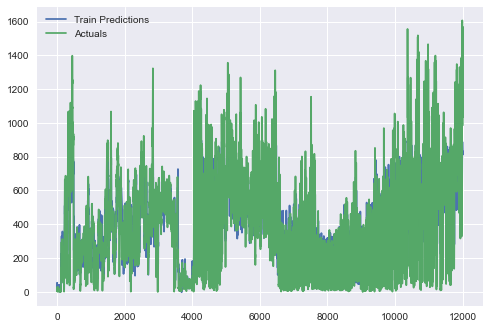

In [32]:
model = load_model('5H_Forecast/5H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(5,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

### 6 hours forecast

In [33]:
%%time

Trainer(6,6,12)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_36 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_72 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 12s 14ms/step - loss: 251796.8438 - mean_absolute_error: 411.7449 - val_loss: 363818.2812 - val_mean_absolute_error: 489.1982
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 4s 12ms/step - loss: 244662.7656 - mean_absolute_error: 403.0937 - val_loss: 353294.1562 - val_mean_absolute_error: 478.4987
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 5s 14ms/step - loss: 235754.4219 - mean_absolute_error: 392.8410 - val_loss: 343058.6250 - val_mean_absolute_error: 468.5498
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 13ms/step - loss: 227924.3594 - mean_absolute_error: 384.0401 - val_loss: 333969.4688 - val_mean_absolute_error: 459.8675
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 4s 12ms/step - loss: 220556.4844 - mean_absolute_error: 375.8312 - val_loss: 324902.7500 - val_mean_absolute_error: 451.2943
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 8s 20ms/step - loss: 213085.8906 - mean_absolute_error: 367.6921 - val_loss: 315725.8750 - val_mean_absolute_error: 442.7935
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 18ms/step - loss: 205484.4844 - mean_absolute_error: 359.4607 - val_loss: 306256.7500 - val_mean_absolute_error: 434.1584
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 16ms/step - loss: 197742.0000 - mean_absolute_error: 351.1732 - val_loss: 296606.1250 - val_mean_absolute_error: 425.4013
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 18ms/step - loss: 189914.1719 - mean_absolute_error: 342.8396 - val_loss: 286793.4375 - val_mean_absolute_error: 416.4605
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 8s 21ms/step - loss: 182024.9531 - mean_absolute_error: 334.5269 - val_loss: 276866.4375 - val_mean_absolute_error: 407.40611944.3906 - mean_absolute - ETA: 0s - loss: 182417.18
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 7s 20ms/step - loss: 174140.8438 - mean_absolute_error: 326.2015 - val_loss: 266917.5312 - val_mean_absolute_error: 398.3520
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 4s 12ms/step - loss: 166304.7344 - mean_absolute_error: 317.8191 - val_loss: 256955.2812 - val_mean_absolute_error: 389.1996
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 5s 13ms/step - loss: 158564.2656 - mean_absolute_error: 309.6378 - val_loss: 247029.9062 - val_mean_absolute_error: 380.0085
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 13ms/step - loss: 150963.6562 - mean_absolute_error: 301.5011 - val_loss: 237236.0000 - val_mean_absolute_error: 370.8617
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 7s 19ms/step - loss: 143403.3281 - mean_absolute_error: 293.3905 - val_loss: 227280.1094 - val_mean_absolute_error: 361.4625
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 19ms/step - loss: 136157.9688 - mean_absolute_error: 285.5108 - val_loss: 217861.5000 - val_mean_absolute_error: 352.6028
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 7s 18ms/step - loss: 129285.0000 - mean_absolute_error: 278.1100 - val_loss: 208717.5469 - val_mean_absolute_error: 343.9536
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 13ms/step - loss: 122751.2891 - mean_absolute_error: 271.0131 - val_loss: 199948.7500 - val_mean_absolute_error: 335.5651
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 4s 12ms/step - loss: 116607.1484 - mean_absolute_error: 264.4141 - val_loss: 191569.8906 - val_mean_absolute_error: 327.6731
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 5s 13ms/step - loss: 110881.8906 - mean_absolute_error: 258.4380 - val_loss: 183656.2188 - val_mean_absolute_error: 320.3054
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 5s 12ms/step - loss: 105568.6719 - mean_absolute_error: 252.9183 - val_loss: 176165.3594 - val_mean_absolute_error: 313.4007
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 5s 12ms/step - loss: 100706.9297 - mean_absolute_error: 247.9215 - val_loss: 169226.1875 - val_mean_absolute_error: 307.1146
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 4s 11ms/step - loss: 96219.9688 - mean_absolute_error: 243.1599 - val_loss: 162450.1250 - val_mean_absolute_error: 301.0528
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 5s 14ms/step - loss: 92084.0312 - mean_absolute_error: 238.6522 - val_loss: 156381.7656 - val_mean_absolute_error: 295.5290
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 5s 13ms/step - loss: 88357.0469 - mean_absolute_error: 234.0139 - val_loss: 150604.1875 - val_mean_absolute_error: 290.1815
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 5s 13ms/step - loss: 84935.3047 - mean_absolute_error: 229.6160 - val_loss: 145075.2969 - val_mean_absolute_error: 284.8648
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 5s 12ms/step - loss: 81797.1562 - mean_absolute_error: 225.4976 - val_loss: 139880.8125 - val_mean_absolute_error: 279.7626
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 17ms/step - loss: 78907.5234 - mean_absolute_error: 221.4320 - val_loss: 134986.6875 - val_mean_absolute_error: 275.1729
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 17ms/step - loss: 76046.0703 - mean_absolute_error: 216.8072 - val_loss: 129780.4609 - val_mean_absolute_error: 268.9872
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 10s 27ms/step - loss: 73395.7344 - mean_absolute_error: 212.2923 - val_loss: 125091.0938 - val_mean_absolute_error: 263.9933
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 16ms/step - loss: 71057.2969 - mean_absolute_error: 208.6924 - val_loss: 120565.6172 - val_mean_absolute_error: 258.5119
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 9s 23ms/step - loss: 69110.6797 - mean_absolute_error: 205.6768 - val_loss: 116600.0156 - val_mean_absolute_error: 254.0473
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 7s 18ms/step - loss: 67261.9297 - mean_absolute_error: 202.6534 - val_loss: 112655.1719 - val_mean_absolute_error: 248.6732
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 18ms/step - loss: 65693.6328 - mean_absolute_error: 199.9294 - val_loss: 109448.3281 - val_mean_absolute_error: 245.5965
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 17ms/step - loss: 63968.2695 - mean_absolute_error: 196.3689 - val_loss: 105642.5938 - val_mean_absolute_error: 240.5056
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 6s 17ms/step - loss: 62466.4297 - mean_absolute_error: 193.4172 - val_loss: 102521.0312 - val_mean_absolute_error: 236.19913.5312 - mean_absolute_error: - ETA: 0s - loss: 62723.0703 - mean_absolute_error:
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 9s 23ms/step - loss: 61078.7812 - mean_absolute_error: 190.5813 - val_loss: 99542.8750 - val_mean_absolute_error: 232.4560
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 7s 17ms/step - loss: 59841.3789 - mean_absolute_error: 188.1033 - val_loss: 96577.5547 - val_mean_absolute_error: 228.0976
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 16ms/step - loss: 58719.5586 - mean_absolute_error: 186.1278 - val_loss: 94293.7422 - val_mean_absolute_error: 225.5345
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 7s 18ms/step - loss: 57645.4883 - mean_absolute_error: 183.8074 - val_loss: 91355.1016 - val_mean_absolute_error: 221.0180
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 16ms/step - loss: 56496.2109 - mean_absolute_error: 181.4292 - val_loss: 89369.2734 - val_mean_absolute_error: 218.0676 57877.
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 6s 17ms/step - loss: 55662.3672 - mean_absolute_error: 179.8638 - val_loss: 87888.1484 - val_mean_absolute_error: 216.5218
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 9s 25ms/step - loss: 54916.5586 - mean_absolute_error: 178.6570 - val_loss: 86019.0781 - val_mean_absolute_error: 214.2368
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 6s 15ms/step - loss: 54209.6094 - mean_absolute_error: 177.4270 - val_loss: 84419.0859 - val_mean_absolute_error: 212.0180
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 6s 15ms/step - loss: 53509.6758 - mean_absolute_error: 176.0782 - val_loss: 82094.4688 - val_mean_absolute_error: 209.2281
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 52923.5000 - mean_absolute_error: 174.9642 - val_loss: 80958.3281 - val_mean_absolute_error: 207.8236
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 5s 13ms/step - loss: 52444.0625 - mean_absolute_error: 174.4612 - val_loss: 79616.8281 - val_mean_absolute_error: 205.9527
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 9s 23ms/step - loss: 51963.8789 - mean_absolute_error: 173.5253 - val_loss: 79103.5859 - val_mean_absolute_error: 205.1286o
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 9s 24ms/step - loss: 51310.9414 - mean_absolute_error: 172.2333 - val_loss: 79231.5234 - val_mean_absolute_error: 204.8463
Epoch 50/100
376/376 [==============================] - 7s 19ms/step - loss: 50838.6758 - mean_absolute_error: 171.2060 - val_loss: 76434.4375 - val_mean_absolute_error: 201.5370
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 14ms/step - loss: 50422.4180 - mean_absolute_error: 170.5274 - val_loss: 76258.8828 - val_mean_absolute_error: 201.1815
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 6s 17ms/step - loss: 49888.7969 - mean_absolute_error: 169.6633 - val_loss: 74504.6562 - val_mean_absolute_error: 199.0006
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 6s 15ms/step - loss: 49454.1328 - mean_absolute_error: 168.8497 - val_loss: 74284.9688 - val_mean_absolute_error: 198.9881
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 7s 17ms/step - loss: 48972.7305 - mean_absolute_error: 167.9483 - val_loss: 73586.9609 - val_mean_absolute_error: 197.9178
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 5s 12ms/step - loss: 48681.9492 - mean_absolute_error: 167.3780 - val_loss: 72919.9922 - val_mean_absolute_error: 196.4741
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 5s 15ms/step - loss: 48212.4844 - mean_absolute_error: 166.3877 - val_loss: 70549.8438 - val_mean_absolute_error: 194.2169
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 4s 11ms/step - loss: 47791.3867 - mean_absolute_error: 165.7951 - val_loss: 70480.8984 - val_mean_absolute_error: 193.3752
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 5s 14ms/step - loss: 47434.6016 - mean_absolute_error: 164.8264 - val_loss: 69845.5391 - val_mean_absolute_error: 192.8705
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 5s 12ms/step - loss: 46979.5117 - mean_absolute_error: 163.9453 - val_loss: 70874.8203 - val_mean_absolute_error: 194.0195
Epoch 60/100
376/376 [==============================] - 5s 12ms/step - loss: 46669.5352 - mean_absolute_error: 163.0821 - val_loss: 69880.7344 - val_mean_absolute_error: 192.4762
Epoch 61/100
376/376 [==============================] - 4s 12ms/step - loss: 46222.1953 - mean_absolute_error: 162.1716 - val_loss: 68846.7344 - val_mean_absolute_error: 191.1144
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 6s 15ms/step - loss: 45904.3867 - mean_absolute_error: 161.5820 - val_loss: 67585.2656 - val_mean_absolute_error: 190.2729
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 4s 11ms/step - loss: 45584.1289 - mean_absolute_error: 160.8346 - val_loss: 67270.2812 - val_mean_absolute_error: 189.7636
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 5s 12ms/step - loss: 45141.3516 - mean_absolute_error: 159.4833 - val_loss: 67522.1562 - val_mean_absolute_error: 190.1983
Epoch 65/100
376/376 [==============================] - 5s 14ms/step - loss: 44731.1562 - mean_absolute_error: 158.9643 - val_loss: 68267.8828 - val_mean_absolute_error: 190.4352
Epoch 66/100
376/376 [==============================] - 5s 13ms/step - loss: 44435.4570 - mean_absolute_error: 158.2923 - val_loss: 67983.6250 - val_mean_absolute_error: 189.9011
Epoch 67/100
376/376 [==============================] - 5s 13ms/step - loss: 44042.2461 - mean_absolute_error: 157.1256 - val_loss: 67814.7344 - val_mean_absolute_error: 190.4126
Epoch 68/100
376/376 [==============================] - 5s 13ms/step - loss: 43747.1875 - mean_absolute_error: 156.7152 - val_loss: 67489.5938 - val_mean_absolute_error: 189.8074
Epoch 69/100
376/376 [==============================] - 4s 12ms/step - loss: 43523.1602 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 5s 12ms/step - loss: 42986.3594 - mean_absolute_error: 154.5644 - val_loss: 66660.7344 - val_mean_absolute_error: 188.2930
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 72/100
376/376 [==============================] - 5s 12ms/step - loss: 42789.9492 - mean_absolute_error: 154.0679 - val_loss: 66776.7188 - val_mean_absolute_error: 187.7186
Epoch 73/100
376/376 [==============================] - 4s 12ms/step - loss: 42581.4453 - mean_absolute_error: 153.5534 - val_loss: 67208.1172 - val_mean_absolute_error: 187.7538
Epoch 74/100
376/376 [==============================] - 4s 12ms/step - loss: 42294.4766 - mean_absolute_error: 152.9685 - val_loss: 65673.6953 - val_mean_absolute_error: 186.5307
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 4s 12ms/step - loss: 42031.7891 - mean_absolute_error: 152.3359 - val_loss: 66884.4219 - val_mean_absolute_error: 187.4919
Epoch 76/100
376/376 [==============================] - 5s 12ms/step - loss: 41901.2109 - mean_absolute_error: 151.8529 - val_loss: 66673.6641 - val_mean_absolute_error: 187.4668
Epoch 77/100
376/376 [==============================] - 5s 12ms/step - loss: 41702.5898 - mean_absolute_error: 151.3906 - val_loss: 65142.4297 - val_mean_absolute_error: 186.3083
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 5s 14ms/step - loss: 41439.3633 - mean_absolute_error: 150.8799 - val_loss: 64727.2500 - val_mean_absolute_error: 185.5820
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 79/100
376/376 [==============================] - 6s 15ms/step - loss: 41263.6797 - mean_absolute_error: 150.4349 - val_loss: 65955.8125 - val_mean_absolute_error: 187.5090
Epoch 80/100
376/376 [==============================] - 5s 15ms/step - loss: 41091.8438 - mean_absolute_error: 149.9134 - val_loss: 66890.0312 - val_mean_absolute_error: 189.0537
Epoch 81/100
376/376 [==============================] - 6s 15ms/step - loss: 40931.0273 - mean_absolute_error: 149.5874 - val_loss: 67013.0078 - val_mean_absolute_error: 187.7209
Epoch 82/100
376/376 [==============================] - 6s 16ms/step - loss: 40792.3008 - mean_absolute_error: 149.2351 - val_loss: 64369.0586 - val_mean_absolute_error: 184.6449
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 5s 14ms/step - loss: 40709.4844 - mean_absolute_error: 148.6991 - val_loss: 65501.2500 - val_mean_absolute_error: 184.4335
Epoch 84/100
376/376 [==============================] - 6s 15ms/step - loss: 40490.7109 - mean_absolute_error: 148.0185 - val_loss: 65891.1641 - val_mean_absolute_error: 187.5878
Epoch 85/100
376/376 [==============================] - 5s 13ms/step - loss: 40372.1953 - mean_absolute_error: 147.8890 - val_loss: 64349.3047 - val_mean_absolute_error: 185.8763
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 86/100
376/376 [==============================] - 7s 19ms/step - loss: 40142.2031 - mean_absolute_error: 147.1565 - val_loss: 64957.7891 - val_mean_absolute_error: 185.1968
Epoch 87/100
376/376 [==============================] - 6s 16ms/step - loss: 39941.9414 - mean_absolute_error: 146.9821 - val_loss: 63772.9062 - val_mean_absolute_error: 183.9156
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 88/100
376/376 [==============================] - 5s 14ms/step - loss: 39993.5898 - mean_absolute_error: 146.8041 - val_loss: 64247.7773 - val_mean_absolute_error: 182.5002
Epoch 89/100
376/376 [==============================] - 5s 13ms/step - loss: 39763.0195 - mean_absolute_error: 145.9881 - val_loss: 66091.5938 - val_mean_absolute_error: 186.3568
Epoch 90/100
376/376 [==============================] - 5s 13ms/step - loss: 39570.4609 - mean_absolute_error: 145.8041 - val_loss: 64368.6211 - val_mean_absolute_error: 184.3146
Epoch 91/100
376/376 [==============================] - 5s 12ms/step - loss: 39460.0195 - mean_absolute_error: 145.5462 - val_loss: 64590.1523 - val_mean_absolute_error: 186.1286
Epoch 92/100
376/376 [==============================] - 5s 12ms/step - loss: 39311.2578 - mean_absolute_error: 145.0436 - val_loss: 64212.4492 - val_mean_absolute_error: 184.1236
Epoch 93/100
376/376 [==============================] - 4s 12ms/step - loss: 39307.2344 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_6_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 11s 28ms/step - loss: 38895.9062 - mean_absolute_error: 143.9327 - val_loss: 67184.4141 - val_mean_absolute_error: 187.3303
Epoch 98/100
376/376 [==============================] - 5s 14ms/step - loss: 38806.7695 - mean_absolute_error: 143.5097 - val_loss: 64986.7188 - val_mean_absolute_error: 188.4137
Epoch 99/100
376/376 [==============================] - 5s 14ms/step - loss: 38589.2383 - mean_absolute_error: 142.9882 - val_loss: 64960.8789 - val_mean_absolute_error: 184.4496
Epoch 100/100
376/376 [==============================] - 6s 15ms/step - loss: 38603.4648 - mean_absolute_error: 143.0726 - val_loss: 64452.6133 - val_mean_absolute_error: 184.3694932.2383

-----------------------------------------------------------------------------------------------------------

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirecti

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 5s 12ms/step - loss: 238409.3906 - mean_absolute_error: 395.7123 - val_loss: 341386.0938 - val_mean_absolute_error: 466.7273
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 6s 17ms/step - loss: 223242.8125 - mean_absolute_error: 378.7458 - val_loss: 324789.3125 - val_mean_absolute_error: 451.1201
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 5s 14ms/step - loss: 210437.3125 - mean_absolute_error: 364.8310 - val_loss: 309613.0312 - val_mean_absolute_error: 437.2077
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 17ms/step - loss: 198455.2188 - mean_absolute_error: 351.8625 - val_loss: 294996.9375 - val_mean_absolute_error: 423.9517
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 7s 18ms/step - loss: 186073.4688 - mean_absolute_error: 338.6531 - val_loss: 278741.9688 - val_mean_absolute_error: 409.0831
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 6s 15ms/step - loss: 172978.9844 - mean_absolute_error: 324.7389 - val_loss: 262456.2188 - val_mean_absolute_error: 394.3024
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 5s 14ms/step - loss: 160603.3281 - mean_absolute_error: 311.5891 - val_loss: 246760.6875 - val_mean_absolute_error: 379.8166
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 5s 13ms/step - loss: 148628.8906 - mean_absolute_error: 298.6985 - val_loss: 231673.0000 - val_mean_absolute_error: 365.6921
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 5s 13ms/step - loss: 137463.6562 - mean_absolute_error: 286.5331 - val_loss: 217541.7656 - val_mean_absolute_error: 352.4483
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 5s 14ms/step - loss: 127244.2578 - mean_absolute_error: 275.3831 - val_loss: 204242.1875 - val_mean_absolute_error: 339.8499
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 15ms/step - loss: 117950.9844 - mean_absolute_error: 265.3140 - val_loss: 192004.4219 - val_mean_absolute_error: 328.3117
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 6s 16ms/step - loss: 109553.5625 - mean_absolute_error: 256.1748 - val_loss: 180657.3281 - val_mean_absolute_error: 317.6388
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 5s 14ms/step - loss: 102001.3594 - mean_absolute_error: 248.4096 - val_loss: 170199.1875 - val_mean_absolute_error: 308.3078
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 7s 20ms/step - loss: 95571.6953 - mean_absolute_error: 241.7991 - val_loss: 161200.8125 - val_mean_absolute_error: 300.4514
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 5s 15ms/step - loss: 90182.6719 - mean_absolute_error: 235.9058 - val_loss: 153293.5156 - val_mean_absolute_error: 293.5116
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 5s 14ms/step - loss: 85529.3906 - mean_absolute_error: 230.1532 - val_loss: 146005.1719 - val_mean_absolute_error: 286.9647
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 5s 13ms/step - loss: 81414.7734 - mean_absolute_error: 224.7772 - val_loss: 139226.3281 - val_mean_absolute_error: 280.5077
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 7s 18ms/step - loss: 77678.3672 - mean_absolute_error: 219.3230 - val_loss: 132669.7812 - val_mean_absolute_error: 273.4757
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 6s 15ms/step - loss: 74209.9219 - mean_absolute_error: 213.8048 - val_loss: 126619.8516 - val_mean_absolute_error: 267.0099
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 19ms/step - loss: 71110.6172 - mean_absolute_error: 208.6257 - val_loss: 120616.7969 - val_mean_absolute_error: 259.9349
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 6s 17ms/step - loss: 68328.4375 - mean_absolute_error: 203.8825 - val_loss: 114942.6406 - val_mean_absolute_error: 253.2752
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 19ms/step - loss: 66130.5469 - mean_absolute_error: 200.2685 - val_loss: 110352.6016 - val_mean_absolute_error: 247.9638
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 19ms/step - loss: 64122.9023 - mean_absolute_error: 196.6428 - val_loss: 105466.2734 - val_mean_absolute_error: 240.8035
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 17ms/step - loss: 62096.8750 - mean_absolute_error: 192.7571 - val_loss: 101270.6719 - val_mean_absolute_error: 235.5718ss: 61953.5781 - mean
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 6s 15ms/step - loss: 60254.3008 - mean_absolute_error: 188.6038 - val_loss: 97046.8672 - val_mean_absolute_error: 229.8435
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 19ms/step - loss: 58702.1641 - mean_absolute_error: 185.7946 - val_loss: 93872.9062 - val_mean_absolute_error: 225.6694
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 6s 16ms/step - loss: 57269.1641 - mean_absolute_error: 182.8512 - val_loss: 90726.0938 - val_mean_absolute_error: 220.8278
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 6s 15ms/step - loss: 56165.8633 - mean_absolute_error: 180.9250 - val_loss: 88255.0469 - val_mean_absolute_error: 218.2631
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 15ms/step - loss: 55230.8555 - mean_absolute_error: 179.3649 - val_loss: 86600.4141 - val_mean_absolute_error: 216.1783
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 16ms/step - loss: 54399.8516 - mean_absolute_error: 177.8452 - val_loss: 84657.5547 - val_mean_absolute_error: 213.4256
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 5s 15ms/step - loss: 53625.2500 - mean_absolute_error: 176.2054 - val_loss: 82063.5156 - val_mean_absolute_error: 210.2455oss: 53726.3281 - mean_absolute_error: 176.40
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 15ms/step - loss: 52807.7305 - mean_absolute_error: 174.4656 - val_loss: 80489.0469 - val_mean_absolute_error: 208.1759
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 5s 13ms/step - loss: 52108.3828 - mean_absolute_error: 173.3569 - val_loss: 78844.7188 - val_mean_absolute_error: 205.8980
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 16ms/step - loss: 51407.6953 - mean_absolute_error: 171.8885 - val_loss: 80755.0156 - val_mean_absolute_error: 207.8141
Epoch 36/100
376/376 [==============================] - 8s 20ms/step - loss: 50840.8320 - mean_absolute_error: 170.6855 - val_loss: 76141.7188 - val_mean_absolute_error: 202.6045
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 18ms/step - loss: 50148.9961 - mean_absolute_error: 169.2072 - val_loss: 74696.5547 - val_mean_absolute_error: 200.4926
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 7s 19ms/step - loss: 49522.9609 - mean_absolute_error: 168.1244 - val_loss: 75443.2891 - val_mean_absolute_error: 201.0476
Epoch 39/100
376/376 [==============================] - 7s 19ms/step - loss: 48831.6680 - mean_absolute_error: 166.4362 - val_loss: 74529.8281 - val_mean_absolute_error: 199.2675
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 6s 17ms/step - loss: 48330.2031 - mean_absolute_error: 165.9072 - val_loss: 71709.9375 - val_mean_absolute_error: 196.0665
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 5s 15ms/step - loss: 47535.5234 - mean_absolute_error: 163.9118 - val_loss: 70442.4141 - val_mean_absolute_error: 193.5502
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 5s 13ms/step - loss: 46929.5977 - mean_absolute_error: 162.6443 - val_loss: 71228.4766 - val_mean_absolute_error: 193.6284
Epoch 43/100
376/376 [==============================] - 5s 13ms/step - loss: 46326.5547 - mean_absolute_error: 161.2466 - val_loss: 68923.1641 - val_mean_absolute_error: 190.6640
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 7s 17ms/step - loss: 45980.0938 - mean_absolute_error: 160.8002 - val_loss: 73766.5312 - val_mean_absolute_error: 196.4711mean_absolute_error: 161. - ETA: 1s - loss: 46009.5664
Epoch 45/100
376/376 [==============================] - 5s 14ms/step - loss: 45635.5625 - mean_absolute_error: 160.0714 - val_loss: 68628.1641 - val_mean_absolute_error: 190.9712
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 6s 16ms/step - loss: 45053.7969 - mean_absolute_error: 158.8965 - val_loss: 68529.7422 - val_mean_absolute_error: 189.8619
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 5s 14ms/step - loss: 44692.1758 - mean_absolute_error: 157.9300 - val_loss: 67890.4531 - val_mean_absolute_error: 189.3573
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 6s 15ms/step - loss: 44353.1602 - mean_absolute_error: 157.6375 - val_loss: 67612.2266 - val_mean_absolute_error: 188.6439
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 5s 13ms/step - loss: 44030.7031 - mean_absolute_error: 156.6522 - val_loss: 67830.8594 - val_mean_absolute_error: 188.9595
Epoch 50/100
376/376 [==============================] - 5s 12ms/step - loss: 43582.0586 - mean_absolute_error: 155.8549 - val_loss: 66665.7109 - val_mean_absolute_error: 186.8337
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 5s 14ms/step - loss: 43219.4922 - mean_absolute_error: 154.8052 - val_loss: 65870.9141 - val_mean_absolute_error: 185.9686
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 7s 17ms/step - loss: 42964.9531 - mean_absolute_error: 154.1234 - val_loss: 65740.9297 - val_mean_absolute_error: 185.3828
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 6s 16ms/step - loss: 42620.4805 - mean_absolute_error: 153.3557 - val_loss: 63929.1953 - val_mean_absolute_error: 184.2730
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 54/100
376/376 [==============================] - 5s 14ms/step - loss: 42273.5977 - mean_absolute_error: 152.8496 - val_loss: 66815.6484 - val_mean_absolute_error: 186.6512
Epoch 55/100
376/376 [==============================] - 5s 14ms/step - loss: 42183.0586 - mean_absolute_error: 152.3432 - val_loss: 68563.8359 - val_mean_absolute_error: 188.7408
Epoch 56/100
376/376 [==============================] - 6s 15ms/step - loss: 42041.9453 - mean_absolute_error: 152.0407 - val_loss: 62719.9648 - val_mean_absolute_error: 181.7433
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 6s 15ms/step - loss: 41663.9141 - mean_absolute_error: 151.3679 - val_loss: 63149.9023 - val_mean_absolute_error: 181.8544
Epoch 58/100
376/376 [==============================] - 5s 14ms/step - loss: 41527.8320 - mean_absolute_error: 150.7602 - val_loss: 63474.7109 - val_mean_absolute_error: 182.4308
Epoch 59/100
376/376 [==============================] - 5s 14ms/step - loss: 41120.8906 - mean_absolute_error: 149.8891 - val_loss: 64402.0352 - val_mean_absolute_error: 184.4755
Epoch 60/100
376/376 [==============================] - 5s 14ms/step - loss: 40825.4297 - mean_absolute_error: 149.2569 - val_loss: 66121.7422 - val_mean_absolute_error: 185.2232
Epoch 61/100
376/376 [==============================] - 5s 14ms/step - loss: 40747.5039 - mean_absolute_error: 148.8606 - val_loss: 64465.1094 - val_mean_absolute_error: 183.3004
Epoch 62/100
376/376 [==============================] - 5s 14ms/step - loss: 40502.7656 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 7s 19ms/step - loss: 40178.1875 - mean_absolute_error: 147.4244 - val_loss: 62111.9453 - val_mean_absolute_error: 180.6853
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 7s 18ms/step - loss: 40099.5547 - mean_absolute_error: 147.2894 - val_loss: 64073.9609 - val_mean_absolute_error: 182.4149
Epoch 66/100
376/376 [==============================] - 7s 19ms/step - loss: 39925.6602 - mean_absolute_error: 146.7267 - val_loss: 61541.3203 - val_mean_absolute_error: 180.0664
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 67/100
376/376 [==============================] - 5s 14ms/step - loss: 39655.6914 - mean_absolute_error: 146.1620 - val_loss: 62211.1602 - val_mean_absolute_error: 181.1965
Epoch 68/100
376/376 [==============================] - 6s 16ms/step - loss: 39539.1211 - mean_absolute_error: 145.9453 - val_loss: 62243.2148 - val_mean_absolute_error: 181.0808
Epoch 69/100
376/376 [==============================] - 5s 15ms/step - loss: 39340.9922 - mean_absolute_error: 145.0945 - val_loss: 62034.1836 - val_mean_absolute_error: 179.7915
Epoch 70/100
376/376 [==============================] - 5s 14ms/step - loss: 39358.1406 - mean_absolute_error: 145.1701 - val_loss: 61145.3281 - val_mean_absolute_error: 179.6468
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 71/100
376/376 [==============================] - 6s 16ms/step - loss: 38973.6562 - mean_absolute_error: 144.4024 - val_loss: 63533.5625 - val_mean_absolute_error: 182.6640
Epoch 72/100
376/376 [==============================] - 6s 16ms/step - loss: 39039.5859 - mean_absolute_error: 144.4163 - val_loss: 62129.8555 - val_mean_absolute_error: 180.2990
Epoch 73/100
376/376 [==============================] - 6s 16ms/step - loss: 38948.1289 - mean_absolute_error: 144.2490 - val_loss: 59978.0820 - val_mean_absolute_error: 177.5663
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 74/100
376/376 [==============================] - 7s 19ms/step - loss: 38783.1680 - mean_absolute_error: 143.7970 - val_loss: 62301.0078 - val_mean_absolute_error: 180.4653
Epoch 75/100
376/376 [==============================] - 6s 17ms/step - loss: 38683.3164 - mean_absolute_error: 143.5475 - val_loss: 61390.0586 - val_mean_absolute_error: 178.9811
Epoch 76/100
376/376 [==============================] - 6s 15ms/step - loss: 38405.8789 - mean_absolute_error: 142.7573 - val_loss: 63496.5820 - val_mean_absolute_error: 184.1009
Epoch 77/100
376/376 [==============================] - 6s 15ms/step - loss: 38544.6445 - mean_absolute_error: 142.9361 - val_loss: 61528.1836 - val_mean_absolute_error: 179.6034
Epoch 78/100
376/376 [==============================] - 5s 14ms/step - loss: 38299.2344 - mean_absolute_error: 142.6016 - val_loss: 60797.8008 - val_mean_absolute_error: 178.6945
Epoch 79/100
376/376 [==============================] - 5s 14ms/step - loss: 38081.8633 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 90/100
376/376 [==============================] - 5s 15ms/step - loss: 36916.1914 - mean_absolute_error: 138.8924 - val_loss: 58122.7422 - val_mean_absolute_error: 173.9487
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 91/100
376/376 [==============================] - 6s 16ms/step - loss: 37163.8984 - mean_absolute_error: 139.5592 - val_loss: 59812.5820 - val_mean_absolute_error: 176.1494
Epoch 92/100
376/376 [==============================] - 6s 16ms/step - loss: 37036.7148 - mean_absolute_error: 138.8964 - val_loss: 61086.2070 - val_mean_absolute_error: 178.4903
Epoch 93/100
376/376 [==============================] - 6s 16ms/step - loss: 36791.5977 - mean_absolute_error: 138.3905 - val_loss: 59328.9141 - val_mean_absolute_error: 176.8674
Epoch 94/100
376/376 [==============================] - 6s 15ms/step - loss: 36865.9844 - mean_absolute_error: 138.3307 - val_loss: 61853.0625 - val_mean_absolute_error: 178.5941
Epoch 95/100
376/376 [==============================] - 5s 14ms/step - loss: 36576.5938 - mean_absolute_error: 137.8999 - val_loss: 58724.6562 - val_mean_absolute_error: 174.8206
Epoch 96/100
376/376 [==============================] - 5s 14ms/step - loss: 36544.7500 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_7_SizeWindow\assets


Epoch 97/100
376/376 [==============================] - 6s 16ms/step - loss: 36491.6836 - mean_absolute_error: 137.8879 - val_loss: 59612.3828 - val_mean_absolute_error: 175.6410
Epoch 98/100
376/376 [==============================] - 6s 16ms/step - loss: 36311.0977 - mean_absolute_error: 137.3411 - val_loss: 59030.3516 - val_mean_absolute_error: 176.9067
Epoch 99/100
376/376 [==============================] - 6s 16ms/step - loss: 36382.3906 - mean_absolute_error: 137.4114 - val_loss: 58639.4023 - val_mean_absolute_error: 175.6093
Epoch 100/100
376/376 [==============================] - 6s 16ms/step - loss: 36353.3711 - mean_absolute_error: 137.0940 - val_loss: 59339.4609 - val_mean_absolute_error: 176.8184

-----------------------------------------------------------------------------------------------------------

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_38 (

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 7s 18ms/step - loss: 244240.1875 - mean_absolute_error: 402.5799 - val_loss: 351404.0312 - val_mean_absolute_error: 476.6451
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 8s 20ms/step - loss: 232837.8906 - mean_absolute_error: 389.5101 - val_loss: 337401.5312 - val_mean_absolute_error: 463.0921
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 8s 21ms/step - loss: 222127.0312 - mean_absolute_error: 377.5862 - val_loss: 324972.1250 - val_mean_absolute_error: 451.3206
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 6s 15ms/step - loss: 211866.4375 - mean_absolute_error: 366.3191 - val_loss: 312301.3438 - val_mean_absolute_error: 439.6042
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 17ms/step - loss: 201465.8594 - mean_absolute_error: 355.0927 - val_loss: 299375.2500 - val_mean_absolute_error: 427.8480
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 17ms/step - loss: 190890.7969 - mean_absolute_error: 343.8162 - val_loss: 286149.5312 - val_mean_absolute_error: 415.8037
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 6s 17ms/step - loss: 180221.1250 - mean_absolute_error: 332.4958 - val_loss: 272781.6250 - val_mean_absolute_error: 403.6386
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 18ms/step - loss: 169590.5000 - mean_absolute_error: 321.0870 - val_loss: 259378.8594 - val_mean_absolute_error: 391.3778
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 7s 20ms/step - loss: 159101.8281 - mean_absolute_error: 309.8939 - val_loss: 245816.7188 - val_mean_absolute_error: 378.8498
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 8s 22ms/step - loss: 148574.8281 - mean_absolute_error: 298.5782 - val_loss: 232337.0156 - val_mean_absolute_error: 366.2316
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 7s 18ms/step - loss: 138471.6875 - mean_absolute_error: 287.5706 - val_loss: 219170.9531 - val_mean_absolute_error: 353.8219
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 6s 16ms/step - loss: 128884.4766 - mean_absolute_error: 277.1055 - val_loss: 206938.7188 - val_mean_absolute_error: 342.3763
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 6s 17ms/step - loss: 120129.6016 - mean_absolute_error: 267.4714 - val_loss: 195392.7031 - val_mean_absolute_error: 331.4889
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 20ms/step - loss: 112148.7188 - mean_absolute_error: 258.8620 - val_loss: 184687.7656 - val_mean_absolute_error: 321.4190
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 8s 20ms/step - loss: 104936.3828 - mean_absolute_error: 251.1483 - val_loss: 174875.5000 - val_mean_absolute_error: 312.4221
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 8s 20ms/step - loss: 98569.5938 - mean_absolute_error: 244.4074 - val_loss: 166020.3125 - val_mean_absolute_error: 304.4768
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 17ms/step - loss: 92940.8359 - mean_absolute_error: 238.1494 - val_loss: 157968.3438 - val_mean_absolute_error: 297.5436
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 6s 17ms/step - loss: 87967.8594 - mean_absolute_error: 232.3189 - val_loss: 150585.7031 - val_mean_absolute_error: 290.8788
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 20ms/step - loss: 83408.2812 - mean_absolute_error: 226.1584 - val_loss: 143407.0625 - val_mean_absolute_error: 283.5547
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 6s 17ms/step - loss: 79083.5312 - mean_absolute_error: 219.6778 - val_loss: 136671.4219 - val_mean_absolute_error: 276.8446
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 18ms/step - loss: 75289.5156 - mean_absolute_error: 213.9717 - val_loss: 130092.0000 - val_mean_absolute_error: 269.0512
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 11s 29ms/step - loss: 71674.8438 - mean_absolute_error: 208.1128 - val_loss: 123616.3750 - val_mean_absolute_error: 261.7176
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 6s 17ms/step - loss: 68499.3906 - mean_absolute_error: 203.0006 - val_loss: 118300.2891 - val_mean_absolute_error: 255.7710
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 6s 17ms/step - loss: 65582.1172 - mean_absolute_error: 197.6041 - val_loss: 112228.8047 - val_mean_absolute_error: 248.0384913.4531 - mean_absol
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 18ms/step - loss: 63041.1797 - mean_absolute_error: 193.1465 - val_loss: 107255.2422 - val_mean_absolute_error: 241.8307
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 7s 19ms/step - loss: 60811.5156 - mean_absolute_error: 189.1359 - val_loss: 102744.4531 - val_mean_absolute_error: 235.8468
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 7s 19ms/step - loss: 58870.3516 - mean_absolute_error: 185.5468 - val_loss: 98442.9297 - val_mean_absolute_error: 230.3632
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 18ms/step - loss: 57174.0000 - mean_absolute_error: 182.2457 - val_loss: 95063.9609 - val_mean_absolute_error: 226.1350
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 6s 17ms/step - loss: 55470.3984 - mean_absolute_error: 178.8450 - val_loss: 91500.6016 - val_mean_absolute_error: 221.8391
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 15ms/step - loss: 54008.1797 - mean_absolute_error: 176.2981 - val_loss: 88663.3359 - val_mean_absolute_error: 217.5462
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 7s 18ms/step - loss: 52590.1055 - mean_absolute_error: 173.5766 - val_loss: 86388.6328 - val_mean_absolute_error: 214.2482
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 6s 16ms/step - loss: 51454.0391 - mean_absolute_error: 171.1946 - val_loss: 83524.1016 - val_mean_absolute_error: 210.7981
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 6s 17ms/step - loss: 50165.7344 - mean_absolute_error: 168.5082 - val_loss: 80231.8906 - val_mean_absolute_error: 206.8475: 3s - loss: 51016.7227 - mean_ - ETA: 2s - loss: 50207.
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 6s 16ms/step - loss: 48963.1719 - mean_absolute_error: 166.0844 - val_loss: 78886.2109 - val_mean_absolute_error: 204.1647
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 10s 27ms/step - loss: 47676.2383 - mean_absolute_error: 163.6017 - val_loss: 76635.0234 - val_mean_absolute_error: 201.1707
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 7s 17ms/step - loss: 46537.2500 - mean_absolute_error: 161.1964 - val_loss: 75055.5391 - val_mean_absolute_error: 198.0718 - ETA: 0s - loss: 46551.1133 - mean_absolute_error: 161
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 10s 26ms/step - loss: 45597.2227 - mean_absolute_error: 159.0405 - val_loss: 71434.5312 - val_mean_absolute_error: 194.1866 - loss: 45709.9141 -  - ETA: 1s - loss: 4530
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 12s 32ms/step - loss: 44654.2188 - mean_absolute_error: 157.2061 - val_loss: 71364.5000 - val_mean_absolute_error: 194.0614
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 18s 49ms/step - loss: 43832.3789 - mean_absolute_error: 155.3948 - val_loss: 69860.5781 - val_mean_absolute_error: 191.8663
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 22ms/step - loss: 43167.0547 - mean_absolute_error: 154.1969 - val_loss: 69532.8984 - val_mean_absolute_error: 193.2967
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 22ms/step - loss: 42499.4844 - mean_absolute_error: 152.4108 - val_loss: 69745.8906 - val_mean_absolute_error: 190.9240s
Epoch 43/100
376/376 [==============================] - 8s 22ms/step - loss: 41978.2031 - mean_absolute_error: 151.0866 - val_loss: 69139.5391 - val_mean_absolute_error: 190.5041
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 9s 23ms/step - loss: 41445.7305 - mean_absolute_error: 150.1502 - val_loss: 66878.0703 - val_mean_absolute_error: 187.6697
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 8s 20ms/step - loss: 40961.5547 - mean_absolute_error: 148.8272 - val_loss: 66247.0469 - val_mean_absolute_error: 186.0631
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 19ms/step - loss: 40475.1445 - mean_absolute_error: 147.5916 - val_loss: 64890.3477 - val_mean_absolute_error: 184.7956
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 47/100
376/376 [==============================] - 7s 18ms/step - loss: 40008.2500 - mean_absolute_error: 146.7110 - val_loss: 64321.9531 - val_mean_absolute_error: 183.87188438 - mean_absolute_erro
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 8s 22ms/step - loss: 39685.3398 - mean_absolute_error: 145.6070 - val_loss: 64045.3164 - val_mean_absolute_error: 184.7540
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 49/100
376/376 [==============================] - 8s 21ms/step - loss: 39384.3438 - mean_absolute_error: 145.1937 - val_loss: 64238.4102 - val_mean_absolute_error: 183.5632
Epoch 50/100
376/376 [==============================] - 9s 23ms/step - loss: 39024.1797 - mean_absolute_error: 143.7806 - val_loss: 63572.4258 - val_mean_absolute_error: 181.9939
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 16s 41ms/step - loss: 38797.1875 - mean_absolute_error: 143.3980 - val_loss: 63165.2070 - val_mean_absolute_error: 182.5738ean_absolute_error: 144.116 - ETA: 2s - loss: 39310.5195 - mean_abso
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 52/100
376/376 [==============================] - 8s 22ms/step - loss: 38504.5781 - mean_absolute_error: 142.7171 - val_loss: 62387.8828 - val_mean_absolute_error: 182.3862
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 53/100
376/376 [==============================] - 7s 20ms/step - loss: 38339.7539 - mean_absolute_error: 142.2365 - val_loss: 63377.6133 - val_mean_absolute_error: 181.8773
Epoch 54/100
376/376 [==============================] - 8s 21ms/step - loss: 38084.1406 - mean_absolute_error: 141.5835 - val_loss: 63308.6875 - val_mean_absolute_error: 181.1013
Epoch 55/100
376/376 [==============================] - 9s 23ms/step - loss: 37854.3477 - mean_absolute_error: 140.7356 - val_loss: 61285.3164 - val_mean_absolute_error: 180.2652
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 8s 20ms/step - loss: 37796.5078 - mean_absolute_error: 140.6197 - val_loss: 61386.5547 - val_mean_absolute_error: 179.5737
Epoch 57/100
376/376 [==============================] - 7s 19ms/step - loss: 37556.3477 - mean_absolute_error: 139.9662 - val_loss: 60706.7891 - val_mean_absolute_error: 179.7833
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 58/100
376/376 [==============================] - 8s 22ms/step - loss: 37314.6055 - mean_absolute_error: 139.3597 - val_loss: 60850.5312 - val_mean_absolute_error: 179.8231
Epoch 59/100
376/376 [==============================] - 8s 22ms/step - loss: 37249.9922 - mean_absolute_error: 139.4154 - val_loss: 61528.2461 - val_mean_absolute_error: 181.2092
Epoch 60/100
376/376 [==============================] - 9s 24ms/step - loss: 37013.1992 - mean_absolute_error: 138.4929 - val_loss: 61434.2695 - val_mean_absolute_error: 178.5399
Epoch 61/100
376/376 [==============================] - 9s 23ms/step - loss: 36847.6445 - mean_absolute_error: 138.2825 - val_loss: 62293.1758 - val_mean_absolute_error: 180.2322
Epoch 62/100
376/376 [==============================] - 8s 22ms/step - loss: 36872.5391 - mean_absolute_error: 138.0277 - val_loss: 61705.4766 - val_mean_absolute_error: 178.6537
Epoch 63/100
376/376 [==============================] - 8s 22ms/step - loss: 36663.0273 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 9s 24ms/step - loss: 36436.0898 - mean_absolute_error: 136.9028 - val_loss: 59463.1758 - val_mean_absolute_error: 176.8292
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 65/100
376/376 [==============================] - 7s 19ms/step - loss: 36280.8906 - mean_absolute_error: 136.5882 - val_loss: 59528.1016 - val_mean_absolute_error: 176.3577
Epoch 66/100
376/376 [==============================] - 7s 19ms/step - loss: 36295.4648 - mean_absolute_error: 136.2779 - val_loss: 61347.6289 - val_mean_absolute_error: 177.9740
Epoch 67/100
376/376 [==============================] - 7s 20ms/step - loss: 36075.7266 - mean_absolute_error: 136.0703 - val_loss: 61499.6914 - val_mean_absolute_error: 177.9064
Epoch 68/100
376/376 [==============================] - 7s 19ms/step - loss: 35965.4258 - mean_absolute_error: 135.4897 - val_loss: 61568.4453 - val_mean_absolute_error: 177.2935
Epoch 69/100
376/376 [==============================] - 8s 22ms/step - loss: 35760.5117 - mean_absolute_error: 135.1656 - val_loss: 60964.8047 - val_mean_absolute_error: 176.4867
Epoch 70/100
376/376 [==============================] - 7s 19ms/step - loss: 35642.0195 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 7s 20ms/step - loss: 35298.5117 - mean_absolute_error: 133.6867 - val_loss: 60500.3438 - val_mean_absolute_error: 175.7505
Epoch 76/100
376/376 [==============================] - 7s 20ms/step - loss: 35083.9531 - mean_absolute_error: 133.4642 - val_loss: 58561.1016 - val_mean_absolute_error: 175.8969
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 7s 20ms/step - loss: 35114.5664 - mean_absolute_error: 133.0069 - val_loss: 58970.3320 - val_mean_absolute_error: 176.0955
Epoch 78/100
376/376 [==============================] - 7s 18ms/step - loss: 35026.0742 - mean_absolute_error: 133.1708 - val_loss: 59084.3711 - val_mean_absolute_error: 175.6989
Epoch 79/100
376/376 [==============================] - 9s 23ms/step - loss: 34970.1680 - mean_absolute_error: 132.8806 - val_loss: 59626.4766 - val_mean_absolute_error: 179.5331
Epoch 80/100
376/376 [==============================] - 8s 21ms/step - loss: 34897.7227 - mean_absolute_error: 132.8161 - val_loss: 60977.8516 - val_mean_absolute_error: 176.9886
Epoch 81/100
376/376 [==============================] - 8s 20ms/step - loss: 34907.8164 - mean_absolute_error: 132.7395 - val_loss: 59615.4531 - val_mean_absolute_error: 177.2213
Epoch 82/100
376/376 [==============================] - 7s 20ms/step - loss: 34690.3828 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_8_SizeWindow\assets


Epoch 87/100
376/376 [==============================] - 6s 17ms/step - loss: 34314.5742 - mean_absolute_error: 131.2602 - val_loss: 61310.6602 - val_mean_absolute_error: 176.6205
Epoch 88/100
376/376 [==============================] - 6s 16ms/step - loss: 34213.7227 - mean_absolute_error: 131.0967 - val_loss: 60068.8633 - val_mean_absolute_error: 174.5458
Epoch 89/100
376/376 [==============================] - 7s 18ms/step - loss: 34361.4062 - mean_absolute_error: 131.4411 - val_loss: 59811.9453 - val_mean_absolute_error: 176.6369
Epoch 90/100
376/376 [==============================] - 6s 15ms/step - loss: 34190.9648 - mean_absolute_error: 130.9993 - val_loss: 59372.5000 - val_mean_absolute_error: 179.2812
Epoch 91/100
376/376 [==============================] - 6s 15ms/step - loss: 34052.0586 - mean_absolute_error: 130.5921 - val_loss: 61082.9375 - val_mean_absolute_error: 176.0093
Epoch 92/100
376/376 [==============================] - 6s 16ms/step - loss: 34015.7109 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 6s 15ms/step - loss: 240517.5156 - mean_absolute_error: 398.1848 - val_loss: 343733.8438 - val_mean_absolute_error: 469.0201
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 7s 19ms/step - loss: 224365.0000 - mean_absolute_error: 380.0703 - val_loss: 324630.1250 - val_mean_absolute_error: 450.9244
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 6s 17ms/step - loss: 209743.1875 - mean_absolute_error: 363.9724 - val_loss: 307202.7500 - val_mean_absolute_error: 434.9171
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 7s 18ms/step - loss: 195886.1875 - mean_absolute_error: 349.0363 - val_loss: 290460.2188 - val_mean_absolute_error: 419.6054
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 6s 17ms/step - loss: 182102.9062 - mean_absolute_error: 334.3465 - val_loss: 273471.0938 - val_mean_absolute_error: 404.1305
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 7s 20ms/step - loss: 168622.2812 - mean_absolute_error: 319.8537 - val_loss: 256331.7031 - val_mean_absolute_error: 388.4055
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 8s 21ms/step - loss: 155398.4219 - mean_absolute_error: 305.6743 - val_loss: 239964.7500 - val_mean_absolute_error: 373.1810
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 6s 17ms/step - loss: 142796.2031 - mean_absolute_error: 292.0592 - val_loss: 223864.4531 - val_mean_absolute_error: 358.0639
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 6s 16ms/step - loss: 130949.7031 - mean_absolute_error: 278.8847 - val_loss: 208552.7344 - val_mean_absolute_error: 343.5370
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 16ms/step - loss: 119975.8750 - mean_absolute_error: 266.8951 - val_loss: 194191.8594 - val_mean_absolute_error: 329.9642
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 6s 17ms/step - loss: 110177.2422 - mean_absolute_error: 256.2520 - val_loss: 181340.7344 - val_mean_absolute_error: 317.8896
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 6s 16ms/step - loss: 101708.4062 - mean_absolute_error: 247.2759 - val_loss: 170062.3125 - val_mean_absolute_error: 307.7560
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 6s 17ms/step - loss: 94532.8047 - mean_absolute_error: 239.3832 - val_loss: 160136.9844 - val_mean_absolute_error: 299.0139
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 7s 17ms/step - loss: 88156.4766 - mean_absolute_error: 231.4521 - val_loss: 150873.1406 - val_mean_absolute_error: 290.1217
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 5s 15ms/step - loss: 82454.8672 - mean_absolute_error: 223.8550 - val_loss: 142152.9062 - val_mean_absolute_error: 281.2420
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 6s 16ms/step - loss: 77125.8516 - mean_absolute_error: 215.8905 - val_loss: 134112.5156 - val_mean_absolute_error: 273.2639
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 6s 17ms/step - loss: 72734.8359 - mean_absolute_error: 209.2590 - val_loss: 126814.0938 - val_mean_absolute_error: 265.2000
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 7s 19ms/step - loss: 68672.5625 - mean_absolute_error: 202.3815 - val_loss: 119620.9688 - val_mean_absolute_error: 256.9830
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 7s 18ms/step - loss: 65230.3086 - mean_absolute_error: 196.6689 - val_loss: 113626.6953 - val_mean_absolute_error: 250.3798
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 7s 19ms/step - loss: 62195.6172 - mean_absolute_error: 190.7221 - val_loss: 107394.4219 - val_mean_absolute_error: 241.9769
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 7s 17ms/step - loss: 59841.3633 - mean_absolute_error: 186.7068 - val_loss: 102692.7266 - val_mean_absolute_error: 236.6535
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 7s 18ms/step - loss: 57993.0898 - mean_absolute_error: 183.1206 - val_loss: 98255.2266 - val_mean_absolute_error: 231.0903
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 18ms/step - loss: 56424.8164 - mean_absolute_error: 180.2298 - val_loss: 94384.1328 - val_mean_absolute_error: 226.0415
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 14s 38ms/step - loss: 55212.1797 - mean_absolute_error: 178.0852 - val_loss: 91561.2500 - val_mean_absolute_error: 223.0867
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 14s 36ms/step - loss: 54100.2188 - mean_absolute_error: 176.1445 - val_loss: 88712.6875 - val_mean_absolute_error: 220.1418
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 14s 37ms/step - loss: 53073.0352 - mean_absolute_error: 174.1264 - val_loss: 85793.2266 - val_mean_absolute_error: 216.7302 53126.8867 - mean_abso - ETA: 7s - ETA: 0s - loss: 52911.9883 - mean_absolute_err
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 12s 31ms/step - loss: 52009.0742 - mean_absolute_error: 171.8249 - val_loss: 83690.5078 - val_mean_absolute_error: 212.5687s: 52436.9180 - mea - ETA: 7s - l
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 11s 30ms/step - loss: 50764.5820 - mean_absolute_error: 169.2974 - val_loss: 80847.2109 - val_mean_absolute_error: 209.3558
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 12s 31ms/step - loss: 49807.2930 - mean_absolute_error: 167.4839 - val_loss: 78581.7812 - val_mean_absolute_error: 207.3496r: 167.511
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 12s 31ms/step - loss: 48900.7500 - mean_absolute_error: 165.8661 - val_loss: 77405.6094 - val_mean_absolute_error: 204.8733
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 10s 27ms/step - loss: 48050.3633 - mean_absolute_error: 164.3181 - val_loss: 74856.1250 - val_mean_absolute_error: 201.9352 5s - loss: 48677.4102 - mean
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 10s 27ms/step - loss: 47365.7461 - mean_absolute_error: 163.0789 - val_loss: 74041.9062 - val_mean_absolute_error: 200.7935 - ETA: - ETA: 0s - loss: 47468.4297 - mean_absolute_error
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 13s 34ms/step - loss: 46591.5938 - mean_absolute_error: 161.5082 - val_loss: 72119.6484 - val_mean_absolute_error: 198.1799
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 11s 29ms/step - loss: 45788.3164 - mean_absolute_error: 160.1145 - val_loss: 70500.4297 - val_mean_absolute_error: 195.7714
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 8s 21ms/step - loss: 45249.4375 - mean_absolute_error: 158.8684 - val_loss: 69514.0781 - val_mean_absolute_error: 194.0702
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 10s 27ms/step - loss: 44732.6523 - mean_absolute_error: 158.0511 - val_loss: 68938.0625 - val_mean_absolute_error: 193.1907
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 8s 21ms/step - loss: 44258.8359 - mean_absolute_error: 156.8064 - val_loss: 68162.2734 - val_mean_absolute_error: 191.7739
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 8s 21ms/step - loss: 43830.6250 - mean_absolute_error: 156.0560 - val_loss: 68372.6797 - val_mean_absolute_error: 191.2794
Epoch 40/100
376/376 [==============================] - 9s 23ms/step - loss: 43245.8125 - mean_absolute_error: 154.5459 - val_loss: 67500.3203 - val_mean_absolute_error: 190.9009
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 21ms/step - loss: 42817.6875 - mean_absolute_error: 153.2908 - val_loss: 65992.7969 - val_mean_absolute_error: 188.8113
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 42/100
376/376 [==============================] - 8s 21ms/step - loss: 42360.4336 - mean_absolute_error: 152.4545 - val_loss: 66281.4922 - val_mean_absolute_error: 188.7013
Epoch 43/100
376/376 [==============================] - 7s 18ms/step - loss: 41952.7109 - mean_absolute_error: 151.5956 - val_loss: 65550.0703 - val_mean_absolute_error: 187.0434
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 7s 19ms/step - loss: 41585.2617 - mean_absolute_error: 150.8371 - val_loss: 65166.0391 - val_mean_absolute_error: 188.371141138
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 26s 66ms/step - loss: 41334.5195 - mean_absolute_error: 150.1716 - val_loss: 64630.2695 - val_mean_absolute_error: 186.2591
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 12s 31ms/step - loss: 40981.6250 - mean_absolute_error: 149.3528 - val_loss: 64816.4961 - val_mean_absolute_error: 186.0351
Epoch 47/100
376/376 [==============================] - 13s 34ms/step - loss: 40468.7969 - mean_absolute_error: 148.0674 - val_loss: 62915.8125 - val_mean_absolute_error: 184.0770
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 13s 35ms/step - loss: 40236.8984 - mean_absolute_error: 147.6586 - val_loss: 63828.9336 - val_mean_absolute_error: 187.5853
Epoch 49/100
376/376 [==============================] - 12s 33ms/step - loss: 40076.1055 - mean_absolute_error: 147.0658 - val_loss: 63225.4766 - val_mean_absolute_error: 185.6377 - loss: 39925.8320 - me
Epoch 50/100
376/376 [==============================] - 16s 41ms/step - loss: 39697.8320 - mean_absolute_error: 146.2743 - val_loss: 62894.9727 - val_mean_absolute_error: 184.9563
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 12s 32ms/step - loss: 39512.2031 - mean_absolute_error: 145.6452 - val_loss: 64739.1641 - val_mean_absolute_error: 186.2001
Epoch 52/100
376/376 [==============================] - 13s 34ms/step - loss: 39293.9648 - mean_absolute_error: 145.3849 - val_loss: 63992.9492 - val_mean_absolute_error: 186.8988
Epoch 53/100
376/376 [==============================] - 14s 36ms/step - loss: 39042.3867 - mean_absolute_error: 144.7540 - val_loss: 63271.7305 - val_mean_absolute_error: 185.5440an_a
Epoch 54/100
376/376 [==============================] - 13s 34ms/step - loss: 38974.1719 - mean_absolute_error: 144.4947 - val_loss: 63109.9258 - val_mean_absolute_error: 183.349630 - mean_abso - ETA: 4s - loss: 39006.6211 - mean_absolute - ETA: 3s - loss: 38993.9766 - mean_absolute_error:  - ETA: 2s - 
Epoch 55/100
376/376 [==============================] - 13s 33ms/step - loss: 38711.3867 - mean_absolute_error: 143.8107 - val_loss: 61794.2422 - val_m

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 15s 41ms/step - loss: 38448.8477 - mean_absolute_error: 143.3105 - val_loss: 62507.1367 - val_mean_absolute_error: 185.5135
Epoch 57/100
376/376 [==============================] - 16s 44ms/step - loss: 38345.3242 - mean_absolute_error: 142.7361 - val_loss: 64030.0000 - val_mean_absolute_error: 187.2299- loss: 38293.0195 - mean_absolute_error: - ETA: 1s - loss: 38420.8984 - mean_absolute_er
Epoch 58/100
376/376 [==============================] - 17s 46ms/step - loss: 38065.2031 - mean_absolute_error: 142.3123 - val_loss: 61944.0469 - val_mean_absolute_error: 183.1712
Epoch 59/100
376/376 [==============================] - 19s 50ms/step - loss: 37964.7617 - mean_absolute_error: 141.9281 - val_loss: 61038.8086 - val_mean_absolute_error: 180.5365ss: 38095.8047
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 60/100
376/376 [==============================] - 20s 53ms/step - loss: 37902.3516 - mean_absolute_error: 141.5331 - val_loss: 62997.9922 - val_mean_absolute_error: 183.8410
Epoch 61/100
376/376 [==============================] - 16s 43ms/step - loss: 37670.2812 - mean_absolute_error: 141.0230 - val_loss: 65323.6406 - val_mean_absolute_error: 184.3716
Epoch 62/100
376/376 [==============================] - 17s 46ms/step - loss: 37560.5547 - mean_absolute_error: 140.8892 - val_loss: 62248.8750 - val_mean_absolute_error: 184.40661953 - mean_absolute_e - ETA: 1s - loss: 37461.8086 - mean_absolut
Epoch 63/100
376/376 [==============================] - 16s 44ms/step - loss: 37216.3633 - mean_absolute_error: 139.9779 - val_loss: 63154.1562 - val_mean_absolute_error: 184.65628.4141 - mean_absolute_error: 140.376 - ETA: 2s - loss: 37383.8203 - mean_absolute_error: 140.268 - ETA: 2s - loss: 3733
Epoch 64/100
376/376 [==============================] - 19s 50ms/step - loss: 37143.6406 - mea

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 16s 43ms/step - loss: 36679.9297 - mean_absolute_error: 138.4285 - val_loss: 61410.1562 - val_mean_absolute_error: 180.6687
Epoch 69/100
376/376 [==============================] - 16s 44ms/step - loss: 36545.6406 - mean_absolute_error: 138.2742 - val_loss: 60134.9141 - val_mean_absolute_error: 177.8937
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 70/100
376/376 [==============================] - 7s 20ms/step - loss: 36417.6641 - mean_absolute_error: 137.9582 - val_loss: 64461.1562 - val_mean_absolute_error: 186.5121
Epoch 71/100
376/376 [==============================] - 9s 25ms/step - loss: 36216.0000 - mean_absolute_error: 137.5156 - val_loss: 62477.8438 - val_mean_absolute_error: 181.6009
Epoch 72/100
376/376 [==============================] - 8s 21ms/step - loss: 36137.4023 - mean_absolute_error: 137.3527 - val_loss: 60572.6016 - val_mean_absolute_error: 179.5524
Epoch 73/100
376/376 [==============================] - 8s 20ms/step - loss: 36108.6289 - mean_absolute_error: 137.0931 - val_loss: 61869.6445 - val_mean_absolute_error: 183.6987
Epoch 74/100
376/376 [==============================] - 8s 21ms/step - loss: 35995.9844 - mean_absolute_error: 136.9348 - val_loss: 60884.8164 - val_mean_absolute_error: 177.9590
Epoch 75/100
376/376 [==============================] - 8s 22ms/step - loss: 35841.8086 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 7s 19ms/step - loss: 35835.0859 - mean_absolute_error: 136.4218 - val_loss: 58570.1406 - val_mean_absolute_error: 174.9550
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 78/100
376/376 [==============================] - 6s 17ms/step - loss: 35666.7930 - mean_absolute_error: 135.8730 - val_loss: 61073.3711 - val_mean_absolute_error: 181.2192
Epoch 79/100
376/376 [==============================] - 6s 17ms/step - loss: 35666.5078 - mean_absolute_error: 136.0593 - val_loss: 60153.5273 - val_mean_absolute_error: 178.7229
Epoch 80/100
376/376 [==============================] - 7s 19ms/step - loss: 35299.7695 - mean_absolute_error: 134.9347 - val_loss: 61036.5859 - val_mean_absolute_error: 178.0734
Epoch 81/100
376/376 [==============================] - 7s 18ms/step - loss: 35504.3711 - mean_absolute_error: 135.5774 - val_loss: 60181.4609 - val_mean_absolute_error: 178.7435
Epoch 82/100
376/376 [==============================] - 6s 17ms/step - loss: 35413.0508 - mean_absolute_error: 134.9065 - val_loss: 59901.9062 - val_mean_absolute_error: 178.0755
Epoch 83/100
376/376 [==============================] - 7s 18ms/step - loss: 35286.0469 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_9_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 13s 35ms/step - loss: 34015.0469 - mean_absolute_error: 131.3479 - val_loss: 59863.3633 - val_mean_absolute_error: 174.0221

-----------------------------------------------------------------------------------------------------------

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_40 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_80 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 22s 38ms/step - loss: 250585.6875

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 9s 24ms/step - loss: 240677.8750 - mean_absolute_error: 398.2761 - val_loss: 343894.0625 - val_mean_absolute_error: 469.0922
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 8s 22ms/step - loss: 225437.3750 - mean_absolute_error: 381.0865 - val_loss: 326077.2812 - val_mean_absolute_error: 452.2267
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 9s 23ms/step - loss: 211229.0938 - mean_absolute_error: 365.6007 - val_loss: 309889.1250 - val_mean_absolute_error: 437.3744
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 8s 22ms/step - loss: 198575.5156 - mean_absolute_error: 351.9248 - val_loss: 294062.2188 - val_mean_absolute_error: 423.0038
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 10s 26ms/step - loss: 185799.8281 - mean_absolute_error: 338.2471 - val_loss: 278726.6250 - val_mean_absolute_error: 408.9754
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 10s 26ms/step - loss: 173705.8594 - mean_absolute_error: 325.2890 - val_loss: 263673.4688 - val_mean_absolute_error: 395.1917
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 24ms/step - loss: 161444.7344 - mean_absolute_error: 312.1718 - val_loss: 248129.4531 - val_mean_absolute_error: 380.8944loss: 161078.3438 - mean_absolute_e - ETA: 4s - loss: - ETA: 3s - loss: 161
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 10s 27ms/step - loss: 149833.0312 - mean_absolute_error: 299.4903 - val_loss: 233589.3906 - val_mean_absolute_error: 367.2670
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 9s 24ms/step - loss: 138739.3438 - mean_absolute_error: 287.2848 - val_loss: 219291.6562 - val_mean_absolute_error: 353.7218
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 10s 26ms/step - loss: 128363.0469 - mean_absolute_error: 275.7799 - val_loss: 206049.5469 - val_mean_absolute_error: 341.1934
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 10s 25ms/step - loss: 118854.8516 - mean_absolute_error: 264.9768 - val_loss: 193696.3750 - val_mean_absolute_error: 329.4421
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 9s 25ms/step - loss: 110212.9141 - mean_absolute_error: 255.3201 - val_loss: 182381.6562 - val_mean_absolute_error: 318.9868
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 9s 25ms/step - loss: 102471.0391 - mean_absolute_error: 246.4657 - val_loss: 171967.1406 - val_mean_absolute_error: 309.2555
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 8s 22ms/step - loss: 95536.2031 - mean_absolute_error: 238.2845 - val_loss: 162411.9844 - val_mean_absolute_error: 300.1902
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 9s 25ms/step - loss: 89031.3203 - mean_absolute_error: 229.8286 - val_loss: 153341.1250 - val_mean_absolute_error: 291.3372
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 11s 28ms/step - loss: 83194.6719 - mean_absolute_error: 222.1901 - val_loss: 145086.3125 - val_mean_absolute_error: 283.5537
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 8s 22ms/step - loss: 77893.0781 - mean_absolute_error: 214.5995 - val_loss: 137109.3906 - val_mean_absolute_error: 275.0744- loss: 79371.273 - ETA: 2s - loss: 78444.5625 - mean_absolute - ETA: 1s - loss: 78033.1875 
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 7s 20ms/step - loss: 73088.5078 - mean_absolute_error: 207.4856 - val_loss: 129781.8672 - val_mean_absolute_error: 267.3022
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 20ms/step - loss: 68864.4922 - mean_absolute_error: 200.6605 - val_loss: 122551.3594 - val_mean_absolute_error: 258.8700
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 9s 25ms/step - loss: 65122.9492 - mean_absolute_error: 194.4383 - val_loss: 116260.3047 - val_mean_absolute_error: 251.2449
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 8s 20ms/step - loss: 62035.5703 - mean_absolute_error: 189.0745 - val_loss: 110779.8281 - val_mean_absolute_error: 245.0858
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 8s 21ms/step - loss: 59381.6523 - mean_absolute_error: 184.4170 - val_loss: 105681.2656 - val_mean_absolute_error: 238.7447
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 7s 20ms/step - loss: 57031.3242 - mean_absolute_error: 179.8685 - val_loss: 100757.5625 - val_mean_absolute_error: 232.5634
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 7s 20ms/step - loss: 55035.9375 - mean_absolute_error: 176.1702 - val_loss: 96498.6094 - val_mean_absolute_error: 227.3541
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 7s 20ms/step - loss: 53074.7461 - mean_absolute_error: 172.2566 - val_loss: 92038.1094 - val_mean_absolute_error: 220.6376
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 9s 23ms/step - loss: 51384.3672 - mean_absolute_error: 169.1219 - val_loss: 88655.5781 - val_mean_absolute_error: 216.8047
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 8s 22ms/step - loss: 49883.6641 - mean_absolute_error: 166.2725 - val_loss: 86029.0078 - val_mean_absolute_error: 213.3553
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 20ms/step - loss: 48453.8281 - mean_absolute_error: 163.3570 - val_loss: 82021.9453 - val_mean_absolute_error: 206.8707
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 8s 22ms/step - loss: 47154.0664 - mean_absolute_error: 160.8690 - val_loss: 78738.4844 - val_mean_absolute_error: 202.7600
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 9s 24ms/step - loss: 45897.3047 - mean_absolute_error: 158.0135 - val_loss: 76864.4922 - val_mean_absolute_error: 200.6356
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 8s 22ms/step - loss: 44879.4805 - mean_absolute_error: 155.9511 - val_loss: 75337.8359 - val_mean_absolute_error: 197.6431
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 7s 19ms/step - loss: 44029.7227 - mean_absolute_error: 154.1050 - val_loss: 74000.7656 - val_mean_absolute_error: 196.9553_error: 
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 8s 23ms/step - loss: 43309.7578 - mean_absolute_error: 152.4372 - val_loss: 70771.0859 - val_mean_absolute_error: 192.7093
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 9s 23ms/step - loss: 42754.5586 - mean_absolute_error: 151.3222 - val_loss: 72557.9141 - val_mean_absolute_error: 193.4725
Epoch 36/100
376/376 [==============================] - 9s 23ms/step - loss: 42259.8086 - mean_absolute_error: 150.2771 - val_loss: 69308.2188 - val_mean_absolute_error: 191.2396
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 8s 22ms/step - loss: 41596.1836 - mean_absolute_error: 148.5932 - val_loss: 69939.8047 - val_mean_absolute_error: 189.7688
Epoch 38/100
376/376 [==============================] - 8s 21ms/step - loss: 41226.3203 - mean_absolute_error: 147.7801 - val_loss: 68058.4453 - val_mean_absolute_error: 188.0871
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 7s 19ms/step - loss: 40822.6562 - mean_absolute_error: 147.0467 - val_loss: 70021.7578 - val_mean_absolute_error: 189.2993
Epoch 40/100
376/376 [==============================] - 7s 20ms/step - loss: 40326.2852 - mean_absolute_error: 145.9709 - val_loss: 65547.7656 - val_mean_absolute_error: 184.0572
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 6s 17ms/step - loss: 39994.4297 - mean_absolute_error: 144.9763 - val_loss: 66373.6875 - val_mean_absolute_error: 185.2334
Epoch 42/100
376/376 [==============================] - 6s 17ms/step - loss: 39537.6523 - mean_absolute_error: 143.9211 - val_loss: 65852.1016 - val_mean_absolute_error: 183.9360
Epoch 43/100
376/376 [==============================] - 6s 17ms/step - loss: 39255.8984 - mean_absolute_error: 143.1668 - val_loss: 63764.0312 - val_mean_absolute_error: 183.7396
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 9s 23ms/step - loss: 38854.4336 - mean_absolute_error: 142.1341 - val_loss: 63533.2930 - val_mean_absolute_error: 182.7964
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 11s 29ms/step - loss: 38594.3164 - mean_absolute_error: 141.5244 - val_loss: 63266.3711 - val_mean_absolute_error: 180.7384 - ETA: 2s - loss: 38890
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 9s 25ms/step - loss: 38376.1211 - mean_absolute_error: 140.9682 - val_loss: 63587.1445 - val_mean_absolute_error: 183.7176loss: 37934.4141 - mean_absolute_error - ETA: 0s - loss: 38367.6758 - mean_absolute_error: 14
Epoch 47/100
376/376 [==============================] - 10s 28ms/step - loss: 37990.9961 - mean_absolute_error: 139.8292 - val_loss: 61118.9805 - val_mean_absolute_error: 178.8046
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 48/100
376/376 [==============================] - 7s 20ms/step - loss: 37799.3711 - mean_absolute_error: 139.4528 - val_loss: 62570.7734 - val_mean_absolute_error: 179.8969
Epoch 49/100
376/376 [==============================] - 7s 19ms/step - loss: 37393.6953 - mean_absolute_error: 138.3699 - val_loss: 62475.3398 - val_mean_absolute_error: 180.7839
Epoch 50/100
376/376 [==============================] - 7s 18ms/step - loss: 37290.3086 - mean_absolute_error: 137.7929 - val_loss: 63104.1133 - val_mean_absolute_error: 179.4110
Epoch 51/100
376/376 [==============================] - 7s 19ms/step - loss: 37065.0117 - mean_absolute_error: 137.2497 - val_loss: 61560.8828 - val_mean_absolute_error: 178.3512
Epoch 52/100
376/376 [==============================] - 7s 19ms/step - loss: 36988.9570 - mean_absolute_error: 137.4087 - val_loss: 61956.4648 - val_mean_absolute_error: 179.2988
Epoch 53/100
376/376 [==============================] - 7s 19ms/step - loss: 36631.9531 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 56/100
376/376 [==============================] - 8s 22ms/step - loss: 36264.2969 - mean_absolute_error: 134.9814 - val_loss: 60485.5078 - val_mean_absolute_error: 177.1609
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 57/100
376/376 [==============================] - 7s 18ms/step - loss: 36017.9805 - mean_absolute_error: 134.5205 - val_loss: 60585.9453 - val_mean_absolute_error: 179.2040
Epoch 58/100
376/376 [==============================] - 8s 20ms/step - loss: 35933.6953 - mean_absolute_error: 134.0316 - val_loss: 60251.1445 - val_mean_absolute_error: 175.7563
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 59/100
376/376 [==============================] - 9s 23ms/step - loss: 35807.6133 - mean_absolute_error: 133.6384 - val_loss: 61958.1797 - val_mean_absolute_error: 178.2040
Epoch 60/100
376/376 [==============================] - 8s 22ms/step - loss: 35565.7109 - mean_absolute_error: 133.1705 - val_loss: 60822.8516 - val_mean_absolute_error: 178.4299
Epoch 61/100
376/376 [==============================] - 8s 22ms/step - loss: 35592.8750 - mean_absolute_error: 133.1066 - val_loss: 60868.7188 - val_mean_absolute_error: 176.4621
Epoch 62/100
376/376 [==============================] - 8s 21ms/step - loss: 35437.8594 - mean_absolute_error: 132.7518 - val_loss: 61108.2617 - val_mean_absolute_error: 176.5223
Epoch 63/100
376/376 [==============================] - 8s 21ms/step - loss: 35456.0039 - mean_absolute_error: 132.7685 - val_loss: 59695.5898 - val_mean_absolute_error: 175.9073
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 8s 21ms/step - loss: 35070.4062 - mean_absolute_error: 131.8023 - val_loss: 59957.2109 - val_mean_absolute_error: 176.3258
Epoch 65/100
376/376 [==============================] - 8s 21ms/step - loss: 35083.4922 - mean_absolute_error: 131.7550 - val_loss: 58375.2148 - val_mean_absolute_error: 175.4041
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 66/100
376/376 [==============================] - 12s 33ms/step - loss: 34901.9414 - mean_absolute_error: 131.3527 - val_loss: 60731.6523 - val_mean_absolute_error: 174.7171
Epoch 67/100
376/376 [==============================] - 15s 39ms/step - loss: 34876.0273 - mean_absolute_error: 131.0465 - val_loss: 58332.9414 - val_mean_absolute_error: 174.4748
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 68/100
376/376 [==============================] - 13s 36ms/step - loss: 34695.9688 - mean_absolute_error: 130.9239 - val_loss: 64324.3672 - val_mean_absolute_error: 181.2299
Epoch 69/100
376/376 [==============================] - 11s 30ms/step - loss: 34784.6562 - mean_absolute_error: 130.7895 - val_loss: 60782.4688 - val_mean_absolute_error: 179.3741
Epoch 70/100
376/376 [==============================] - 15s 39ms/step - loss: 34603.8203 - mean_absolute_error: 130.4233 - val_loss: 60230.7266 - val_mean_absolute_error: 176.2732
Epoch 71/100
376/376 [==============================] - 9s 25ms/step - loss: 34515.5078 - mean_absolute_error: 130.0750 - val_loss: 60162.8359 - val_mean_absolute_error: 174.4672
Epoch 72/100
376/376 [==============================] - 8s 22ms/step - loss: 34335.1289 - mean_absolute_error: 129.7320 - val_loss: 61134.0391 - val_mean_absolute_error: 177.7498
Epoch 73/100
376/376 [==============================] - 8s 21ms/step - loss: 34301.5000 - mean_absolut

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_10_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 12s 32ms/step - loss: 34166.1289 - mean_absolute_error: 129.0581 - val_loss: 58737.1445 - val_mean_absolute_error: 176.8339
Epoch 76/100
376/376 [==============================] - 12s 32ms/step - loss: 34112.6953 - mean_absolute_error: 128.9824 - val_loss: 59587.5703 - val_mean_absolute_error: 173.7368
Epoch 77/100
376/376 [==============================] - 10s 26ms/step - loss: 33978.3242 - mean_absolute_error: 128.5857 - val_loss: 61473.6484 - val_mean_absolute_error: 176.6692
Epoch 78/100
376/376 [==============================] - 11s 30ms/step - loss: 33865.0195 - mean_absolute_error: 128.2712 - val_loss: 58661.1992 - val_mean_absolute_error: 175.8109mean_absolute_e
Epoch 79/100
376/376 [==============================] - 10s 26ms/step - loss: 33724.5703 - mean_absolute_error: 128.3191 - val_loss: 60498.8750 - val_mean_absolute_error: 175.7405
Epoch 80/100
376/376 [==============================] - 10s 27ms/step - loss: 33781.8

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 11s 28ms/step - loss: 233561.3281 - mean_absolute_error: 389.9806 - val_loss: 329342.0625 - val_mean_absolute_error: 455.1285
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 9s 24ms/step - loss: 210729.0156 - mean_absolute_error: 365.0411 - val_loss: 306252.2188 - val_mean_absolute_error: 433.9240
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 12s 32ms/step - loss: 193233.0156 - mean_absolute_error: 346.1959 - val_loss: 284943.2812 - val_mean_absolute_error: 414.6163
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 8s 22ms/step - loss: 176479.9375 - mean_absolute_error: 328.1976 - val_loss: 264977.7188 - val_mean_absolute_error: 396.3806
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 8s 22ms/step - loss: 161283.0000 - mean_absolute_error: 311.7844 - val_loss: 246344.7344 - val_mean_absolute_error: 379.1570
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 8s 21ms/step - loss: 147078.1406 - mean_absolute_error: 296.3635 - val_loss: 228613.8438 - val_mean_absolute_error: 362.4915
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 9s 24ms/step - loss: 133729.5469 - mean_absolute_error: 281.4107 - val_loss: 211453.0625 - val_mean_absolute_error: 346.2525
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 7s 19ms/step - loss: 121141.8984 - mean_absolute_error: 267.3210 - val_loss: 194990.0000 - val_mean_absolute_error: 330.5651
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 7s 20ms/step - loss: 110048.5781 - mean_absolute_error: 254.9662 - val_loss: 181044.0938 - val_mean_absolute_error: 317.5799
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 6s 17ms/step - loss: 100354.3594 - mean_absolute_error: 243.7052 - val_loss: 167776.3594 - val_mean_absolute_error: 304.9923
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 8s 22ms/step - loss: 91182.7656 - mean_absolute_error: 232.5499 - val_loss: 154539.9062 - val_mean_absolute_error: 292.1670
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 7s 19ms/step - loss: 83045.7734 - mean_absolute_error: 222.0032 - val_loss: 144024.5469 - val_mean_absolute_error: 281.8603
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 7s 19ms/step - loss: 76480.0781 - mean_absolute_error: 212.4881 - val_loss: 134391.8594 - val_mean_absolute_error: 271.6149
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 7s 19ms/step - loss: 70842.7656 - mean_absolute_error: 203.8351 - val_loss: 125969.7031 - val_mean_absolute_error: 262.8083
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 7s 19ms/step - loss: 66143.8281 - mean_absolute_error: 196.3271 - val_loss: 118056.6953 - val_mean_absolute_error: 253.6646
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 11s 28ms/step - loss: 62140.5078 - mean_absolute_error: 189.6492 - val_loss: 110907.7812 - val_mean_absolute_error: 245.5257
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 7s 20ms/step - loss: 58972.1914 - mean_absolute_error: 183.9838 - val_loss: 104380.6562 - val_mean_absolute_error: 237.1294
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 9s 24ms/step - loss: 56384.0195 - mean_absolute_error: 179.1553 - val_loss: 99336.1250 - val_mean_absolute_error: 231.1916
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 8s 20ms/step - loss: 54248.5078 - mean_absolute_error: 174.7372 - val_loss: 94751.3516 - val_mean_absolute_error: 224.5990
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 8s 21ms/step - loss: 52328.5586 - mean_absolute_error: 171.1918 - val_loss: 90076.2656 - val_mean_absolute_error: 218.7840
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 9s 24ms/step - loss: 50692.7773 - mean_absolute_error: 167.6950 - val_loss: 85928.9453 - val_mean_absolute_error: 213.6489
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 8s 22ms/step - loss: 49239.5742 - mean_absolute_error: 164.6272 - val_loss: 82369.6406 - val_mean_absolute_error: 208.9559
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 8s 20ms/step - loss: 47879.3398 - mean_absolute_error: 162.2513 - val_loss: 78895.3125 - val_mean_absolute_error: 204.3678
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 8s 21ms/step - loss: 46460.0938 - mean_absolute_error: 159.3695 - val_loss: 77377.8594 - val_mean_absolute_error: 202.6078
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 8s 22ms/step - loss: 45344.8945 - mean_absolute_error: 156.8998 - val_loss: 77149.4609 - val_mean_absolute_error: 201.1435
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 9s 25ms/step - loss: 44127.3633 - mean_absolute_error: 154.4265 - val_loss: 73804.5078 - val_mean_absolute_error: 197.1939
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 8s 21ms/step - loss: 43269.4570 - mean_absolute_error: 152.5680 - val_loss: 71476.8359 - val_mean_absolute_error: 194.7039
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 7s 19ms/step - loss: 42453.6406 - mean_absolute_error: 150.3920 - val_loss: 70361.9453 - val_mean_absolute_error: 191.9870
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 7s 19ms/step - loss: 41753.1875 - mean_absolute_error: 149.1046 - val_loss: 69050.2266 - val_mean_absolute_error: 190.8154
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 6s 17ms/step - loss: 41172.1836 - mean_absolute_error: 147.4855 - val_loss: 68639.6172 - val_mean_absolute_error: 189.5295
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 9s 23ms/step - loss: 40558.0312 - mean_absolute_error: 146.1364 - val_loss: 65838.2266 - val_mean_absolute_error: 185.9587
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 8s 20ms/step - loss: 40032.8008 - mean_absolute_error: 144.6850 - val_loss: 65163.8438 - val_mean_absolute_error: 186.5244
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 7s 20ms/step - loss: 39662.3242 - mean_absolute_error: 143.6809 - val_loss: 67271.5156 - val_mean_absolute_error: 187.3367
Epoch 35/100
376/376 [==============================] - 7s 19ms/step - loss: 39166.1289 - mean_absolute_error: 142.5097 - val_loss: 65044.7148 - val_mean_absolute_error: 184.1257
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 7s 19ms/step - loss: 38730.3945 - mean_absolute_error: 141.6076 - val_loss: 65710.4844 - val_mean_absolute_error: 184.5266
Epoch 37/100
376/376 [==============================] - 8s 20ms/step - loss: 38468.5977 - mean_absolute_error: 140.6010 - val_loss: 64707.1211 - val_mean_absolute_error: 182.8351
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 7s 20ms/step - loss: 38148.9688 - mean_absolute_error: 139.6189 - val_loss: 63189.7148 - val_mean_absolute_error: 180.3376
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 39/100
376/376 [==============================] - 6s 17ms/step - loss: 37861.7422 - mean_absolute_error: 138.8231 - val_loss: 65907.5938 - val_mean_absolute_error: 183.6732
Epoch 40/100
376/376 [==============================] - 7s 18ms/step - loss: 37574.7656 - mean_absolute_error: 138.1882 - val_loss: 62159.3242 - val_mean_absolute_error: 178.8440
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 8s 22ms/step - loss: 37357.0000 - mean_absolute_error: 137.8940 - val_loss: 63138.7891 - val_mean_absolute_error: 180.7300
Epoch 42/100
376/376 [==============================] - 8s 22ms/step - loss: 37064.9961 - mean_absolute_error: 136.8553 - val_loss: 64760.2500 - val_mean_absolute_error: 181.4411
Epoch 43/100
376/376 [==============================] - 8s 22ms/step - loss: 36870.3477 - mean_absolute_error: 136.2847 - val_loss: 61612.4258 - val_mean_absolute_error: 177.5007
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 7s 19ms/step - loss: 36533.9023 - mean_absolute_error: 135.7457 - val_loss: 64027.5156 - val_mean_absolute_error: 180.8029
Epoch 45/100
376/376 [==============================] - 7s 19ms/step - loss: 36389.3828 - mean_absolute_error: 135.2997 - val_loss: 59453.4766 - val_mean_absolute_error: 175.0569
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 46/100
376/376 [==============================] - 7s 20ms/step - loss: 36208.0195 - mean_absolute_error: 134.5637 - val_loss: 60639.3477 - val_mean_absolute_error: 176.8662
Epoch 47/100
376/376 [==============================] - 8s 22ms/step - loss: 35942.4375 - mean_absolute_error: 133.9261 - val_loss: 60843.8828 - val_mean_absolute_error: 177.2439
Epoch 48/100
376/376 [==============================] - 8s 21ms/step - loss: 36008.0391 - mean_absolute_error: 134.0924 - val_loss: 61129.6914 - val_mean_absolute_error: 178.7905
Epoch 49/100
376/376 [==============================] - 8s 20ms/step - loss: 35721.8516 - mean_absolute_error: 133.5179 - val_loss: 60621.6250 - val_mean_absolute_error: 175.5473
Epoch 50/100
376/376 [==============================] - 8s 20ms/step - loss: 35667.9922 - mean_absolute_error: 132.7639 - val_loss: 61767.2891 - val_mean_absolute_error: 176.8799
Epoch 51/100
376/376 [==============================] - 7s 20ms/step - loss: 35524.6289 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 55/100
376/376 [==============================] - 8s 20ms/step - loss: 34987.2617 - mean_absolute_error: 131.5077 - val_loss: 62811.7070 - val_mean_absolute_error: 176.6538
Epoch 56/100
376/376 [==============================] - 7s 19ms/step - loss: 34967.4570 - mean_absolute_error: 131.4941 - val_loss: 60253.0703 - val_mean_absolute_error: 174.2667
Epoch 57/100
376/376 [==============================] - 7s 19ms/step - loss: 34659.5977 - mean_absolute_error: 130.6578 - val_loss: 59177.1016 - val_mean_absolute_error: 174.8418
Epoch 58/100
376/376 [==============================] - 7s 19ms/step - loss: 34528.3867 - mean_absolute_error: 130.1675 - val_loss: 59587.0039 - val_mean_absolute_error: 175.0478
Epoch 59/100
376/376 [==============================] - 7s 19ms/step - loss: 34328.9961 - mean_absolute_error: 129.6078 - val_loss: 59149.7305 - val_mean_absolute_error: 173.5798
Epoch 60/100
376/376 [==============================] - 7s 19ms/step - loss: 34346.4688 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 62/100
376/376 [==============================] - 7s 18ms/step - loss: 34183.5078 - mean_absolute_error: 129.0295 - val_loss: 55499.1914 - val_mean_absolute_error: 170.6128
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 8s 22ms/step - loss: 34209.7578 - mean_absolute_error: 128.8224 - val_loss: 59864.2422 - val_mean_absolute_error: 173.5679
Epoch 64/100
376/376 [==============================] - 9s 23ms/step - loss: 34071.3438 - mean_absolute_error: 128.6722 - val_loss: 58795.6406 - val_mean_absolute_error: 170.4407
Epoch 65/100
376/376 [==============================] - 8s 22ms/step - loss: 33940.1914 - mean_absolute_error: 128.1709 - val_loss: 61876.3906 - val_mean_absolute_error: 174.830044 - mean_absolute_error: 128
Epoch 66/100
376/376 [==============================] - 8s 22ms/step - loss: 33785.6836 - mean_absolute_error: 128.0092 - val_loss: 58803.6953 - val_mean_absolute_error: 171.6127
Epoch 67/100
376/376 [==============================] - 8s 22ms/step - loss: 33702.6172 - mean_absolute_error: 127.6923 - val_loss: 58624.9727 - val_mean_absolute_error: 174.9719solute_err
Epoch 68/100
376/376 [==============================] - 8s 22ms/st

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 75/100
376/376 [==============================] - 8s 22ms/step - loss: 33049.3594 - mean_absolute_error: 126.2993 - val_loss: 55882.0938 - val_mean_absolute_error: 173.2112 loss: 3308
Epoch 76/100
376/376 [==============================] - 9s 23ms/step - loss: 32907.7695 - mean_absolute_error: 125.9217 - val_loss: 54829.0234 - val_mean_absolute_error: 170.4964
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 77/100
376/376 [==============================] - 7s 19ms/step - loss: 32979.9258 - mean_absolute_error: 126.0644 - val_loss: 57333.3242 - val_mean_absolute_error: 166.9776
Epoch 78/100
376/376 [==============================] - 7s 20ms/step - loss: 32641.7266 - mean_absolute_error: 125.4546 - val_loss: 56100.7812 - val_mean_absolute_error: 170.4128
Epoch 79/100
376/376 [==============================] - 8s 21ms/step - loss: 32521.2988 - mean_absolute_error: 125.6652 - val_loss: 59592.8516 - val_mean_absolute_error: 171.6356
Epoch 80/100
376/376 [==============================] - 8s 22ms/step - loss: 32691.9844 - mean_absolute_error: 125.9007 - val_loss: 56035.4766 - val_mean_absolute_error: 171.3881
Epoch 81/100
376/376 [==============================] - 8s 20ms/step - loss: 32769.0547 - mean_absolute_error: 125.5148 - val_loss: 56142.6875 - val_mean_absolute_error: 168.5667
Epoch 82/100
376/376 [==============================] - 7s 19ms/step - loss: 32407.9395 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 83/100
376/376 [==============================] - 8s 21ms/step - loss: 32354.2148 - mean_absolute_error: 124.6998 - val_loss: 54614.4336 - val_mean_absolute_error: 166.4034
Epoch 84/100
376/376 [==============================] - 7s 19ms/step - loss: 32161.0820 - mean_absolute_error: 124.0812 - val_loss: 56331.7383 - val_mean_absolute_error: 169.4032
Epoch 85/100
376/376 [==============================] - 7s 19ms/step - loss: 31966.1504 - mean_absolute_error: 123.7254 - val_loss: 56203.7852 - val_mean_absolute_error: 172.8440
Epoch 86/100
376/376 [==============================] - 7s 18ms/step - loss: 32001.5977 - mean_absolute_error: 123.9397 - val_loss: 55394.3711 - val_mean_absolute_error: 167.8003
Epoch 87/100
376/376 [==============================] - 7s 18ms/step - loss: 31765.5547 - mean_absolute_error: 123.6531 - val_loss: 57737.6602 - val_mean_absolute_error: 167.7249
Epoch 88/100
376/376 [==============================] - 7s 18ms/step - loss: 31927.7012 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 94/100
376/376 [==============================] - 7s 20ms/step - loss: 31347.4414 - mean_absolute_error: 122.6212 - val_loss: 57558.5391 - val_mean_absolute_error: 169.5767
Epoch 95/100
376/376 [==============================] - 7s 18ms/step - loss: 31387.0410 - mean_absolute_error: 122.8445 - val_loss: 55511.1055 - val_mean_absolute_error: 166.8816
Epoch 96/100
376/376 [==============================] - 7s 17ms/step - loss: 31288.1465 - mean_absolute_error: 122.4684 - val_loss: 55634.5000 - val_mean_absolute_error: 166.0191
Epoch 97/100
376/376 [==============================] - 7s 17ms/step - loss: 31248.5820 - mean_absolute_error: 122.2026 - val_loss: 55067.0508 - val_mean_absolute_error: 167.1705
Epoch 98/100
376/376 [==============================] - 6s 17ms/step - loss: 31312.6191 - mean_absolute_error: 122.5193 - val_loss: 55303.6758 - val_mean_absolute_error: 168.9619
Epoch 99/100
376/376 [==============================] - 7s 19ms/step - loss: 31116.3496 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_11_SizeWindow\assets


Epoch 100/100
376/376 [==============================] - 9s 23ms/step - loss: 30890.5508 - mean_absolute_error: 121.4379 - val_loss: 57651.2188 - val_mean_absolute_error: 169.4362

-----------------------------------------------------------------------------------------------------------

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_42 (Bidirectio (None, 128)               35840     
_________________________________________________________________
dense_84 (Dense)             (None, 8)                 1032      
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 9         
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
376/376 [==============================] - 12s 22ms/step - loss: 250486.5625 

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 2/100
376/376 [==============================] - 10s 27ms/step - loss: 236203.1562 - mean_absolute_error: 393.0631 - val_loss: 337004.4688 - val_mean_absolute_error: 462.3444
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 3/100
376/376 [==============================] - 9s 24ms/step - loss: 218207.8906 - mean_absolute_error: 373.1622 - val_loss: 316455.2188 - val_mean_absolute_error: 443.2305
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 4/100
376/376 [==============================] - 17s 46ms/step - loss: 202702.6094 - mean_absolute_error: 356.3728 - val_loss: 298239.5625 - val_mean_absolute_error: 426.6962
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 5/100
376/376 [==============================] - 11s 30ms/step - loss: 188283.6406 - mean_absolute_error: 340.8746 - val_loss: 280987.0938 - val_mean_absolute_error: 410.9376
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 6/100
376/376 [==============================] - 15s 39ms/step - loss: 174540.8750 - mean_absolute_error: 326.0577 - val_loss: 263995.0625 - val_mean_absolute_error: 395.3899
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 7/100
376/376 [==============================] - 10s 26ms/step - loss: 161154.8906 - mean_absolute_error: 311.4576 - val_loss: 247376.2969 - val_mean_absolute_error: 379.9754
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 8/100
376/376 [==============================] - 10s 27ms/step - loss: 148299.2031 - mean_absolute_error: 297.3887 - val_loss: 231086.4531 - val_mean_absolute_error: 364.6498
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 9/100
376/376 [==============================] - 13s 34ms/step - loss: 135976.2812 - mean_absolute_error: 283.7176 - val_loss: 215538.5781 - val_mean_absolute_error: 349.9297
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 10/100
376/376 [==============================] - 11s 29ms/step - loss: 124583.7266 - mean_absolute_error: 270.9016 - val_loss: 200990.7812 - val_mean_absolute_error: 335.9821
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 11/100
376/376 [==============================] - 10s 27ms/step - loss: 114293.6094 - mean_absolute_error: 259.3306 - val_loss: 187796.7188 - val_mean_absolute_error: 323.6149
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 12/100
376/376 [==============================] - 13s 35ms/step - loss: 105101.2734 - mean_absolute_error: 248.6023 - val_loss: 175598.2969 - val_mean_absolute_error: 312.0511
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 13/100
376/376 [==============================] - 11s 29ms/step - loss: 96782.1641 - mean_absolute_error: 238.7816 - val_loss: 164505.8750 - val_mean_absolute_error: 301.4507
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 14/100
376/376 [==============================] - 11s 30ms/step - loss: 89291.3125 - mean_absolute_error: 229.3683 - val_loss: 154097.9531 - val_mean_absolute_error: 291.2646
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 15/100
376/376 [==============================] - 11s 30ms/step - loss: 82527.6016 - mean_absolute_error: 220.2779 - val_loss: 144506.7344 - val_mean_absolute_error: 281.6850
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 16/100
376/376 [==============================] - 13s 34ms/step - loss: 76284.0547 - mean_absolute_error: 211.1920 - val_loss: 135508.3594 - val_mean_absolute_error: 272.1555
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 17/100
376/376 [==============================] - 12s 31ms/step - loss: 70947.0938 - mean_absolute_error: 203.2800 - val_loss: 127360.7188 - val_mean_absolute_error: 263.4112 1s - loss: 71054.8594 - mean_abs
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 18/100
376/376 [==============================] - 12s 31ms/step - loss: 66285.4688 - mean_absolute_error: 196.0259 - val_loss: 119919.4375 - val_mean_absolute_error: 255.0321
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 19/100
376/376 [==============================] - 11s 29ms/step - loss: 62428.7539 - mean_absolute_error: 189.5074 - val_loss: 112525.0781 - val_mean_absolute_error: 246.0331
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 20/100
376/376 [==============================] - 9s 25ms/step - loss: 59262.2812 - mean_absolute_error: 184.0818 - val_loss: 106824.5000 - val_mean_absolute_error: 239.8633
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 21/100
376/376 [==============================] - 12s 33ms/step - loss: 56750.7070 - mean_absolute_error: 179.4901 - val_loss: 101208.9766 - val_mean_absolute_error: 232.5751ss: 57633.1680 - mean_
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 22/100
376/376 [==============================] - 12s 32ms/step - loss: 54628.1289 - mean_absolute_error: 175.5202 - val_loss: 97176.6094 - val_mean_absolute_error: 227.4871
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 23/100
376/376 [==============================] - 13s 35ms/step - loss: 52941.8008 - mean_absolute_error: 172.3582 - val_loss: 92654.9375 - val_mean_absolute_error: 222.1487oss: 52807.8203 - me
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 24/100
376/376 [==============================] - 13s 35ms/step - loss: 51605.1719 - mean_absolute_error: 169.7793 - val_loss: 89028.5391 - val_mean_absolute_error: 217.2256s - loss: 53393. - ETA: 0s - loss: 51614.1992 - mean_absolute_error: 169.80
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 25/100
376/376 [==============================] - 12s 32ms/step - loss: 50304.0039 - mean_absolute_error: 167.0197 - val_loss: 85652.3281 - val_mean_absolute_error: 213.0237
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 26/100
376/376 [==============================] - 13s 34ms/step - loss: 49063.0469 - mean_absolute_error: 164.3248 - val_loss: 82316.5781 - val_mean_absolute_error: 208.2845
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 27/100
376/376 [==============================] - 11s 29ms/step - loss: 47856.0781 - mean_absolute_error: 161.9343 - val_loss: 80479.3594 - val_mean_absolute_error: 205.6461
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 28/100
376/376 [==============================] - 11s 29ms/step - loss: 46746.2109 - mean_absolute_error: 159.7139 - val_loss: 78115.8984 - val_mean_absolute_error: 202.9729
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 29/100
376/376 [==============================] - 11s 30ms/step - loss: 45879.3047 - mean_absolute_error: 157.8942 - val_loss: 76363.3672 - val_mean_absolute_error: 200.5608
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 30/100
376/376 [==============================] - 11s 29ms/step - loss: 44981.7461 - mean_absolute_error: 156.1058 - val_loss: 75573.7031 - val_mean_absolute_error: 199.7362
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 31/100
376/376 [==============================] - 9s 25ms/step - loss: 44244.5000 - mean_absolute_error: 154.5623 - val_loss: 74804.2969 - val_mean_absolute_error: 198.2657
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 32/100
376/376 [==============================] - 10s 26ms/step - loss: 43425.1367 - mean_absolute_error: 152.7486 - val_loss: 70307.2109 - val_mean_absolute_error: 193.1260
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 33/100
376/376 [==============================] - 11s 28ms/step - loss: 42664.9648 - mean_absolute_error: 151.1159 - val_loss: 70136.9375 - val_mean_absolute_error: 191.8869s: 42843.5547 - me -  - ETA: 1s - loss: 42614.3359 - m
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 34/100
376/376 [==============================] - 10s 26ms/step - loss: 42222.5039 - mean_absolute_error: 150.1750 - val_loss: 68513.8281 - val_mean_absolute_error: 189.5925
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 35/100
376/376 [==============================] - 10s 27ms/step - loss: 41545.1211 - mean_absolute_error: 148.7529 - val_loss: 66191.3516 - val_mean_absolute_error: 186.4323
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 36/100
376/376 [==============================] - 12s 31ms/step - loss: 40958.4688 - mean_absolute_error: 147.5112 - val_loss: 65178.2461 - val_mean_absolute_error: 185.89311s - loss: 41502.3125 - mean_abso
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 37/100
376/376 [==============================] - 11s 30ms/step - loss: 40315.7969 - mean_absolute_error: 145.8096 - val_loss: 64669.0586 - val_mean_absolute_error: 183.9289
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 38/100
376/376 [==============================] - 11s 30ms/step - loss: 39852.9805 - mean_absolute_error: 144.5011 - val_loss: 64857.6016 - val_mean_absolute_error: 184.0750
Epoch 39/100
376/376 [==============================] - 11s 28ms/step - loss: 39353.6836 - mean_absolute_error: 143.6780 - val_loss: 63884.7461 - val_mean_absolute_error: 182.2624
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 40/100
376/376 [==============================] - 17s 46ms/step - loss: 39190.4141 - mean_absolute_error: 142.8468 - val_loss: 61765.3984 - val_mean_absolute_error: 180.4266
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 41/100
376/376 [==============================] - 11s 28ms/step - loss: 38818.7578 - mean_absolute_error: 142.0402 - val_loss: 62154.7500 - val_mean_absolute_error: 179.8780060.4102 - mean_absolute_err
Epoch 42/100
376/376 [==============================] - 12s 33ms/step - loss: 38371.2734 - mean_absolute_error: 140.9614 - val_loss: 61502.3047 - val_mean_absolute_error: 180.6196
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 43/100
376/376 [==============================] - 11s 30ms/step - loss: 38140.3203 - mean_absolute_error: 140.3849 - val_loss: 61401.9336 - val_mean_absolute_error: 181.3609
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 44/100
376/376 [==============================] - 11s 29ms/step - loss: 37980.6719 - mean_absolute_error: 139.9669 - val_loss: 60235.7891 - val_mean_absolute_error: 178.1061
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 45/100
376/376 [==============================] - 13s 34ms/step - loss: 37720.2188 - mean_absolute_error: 139.3603 - val_loss: 60451.3672 - val_mean_absolute_error: 178.8096
Epoch 46/100
376/376 [==============================] - 14s 37ms/step - loss: 37654.0469 - mean_absolute_error: 139.0880 - val_loss: 61681.2617 - val_mean_absolute_error: 179.6814
Epoch 47/100
376/376 [==============================] - 21s 56ms/step - loss: 37227.1367 - mean_absolute_error: 137.8876 - val_loss: 60875.1914 - val_mean_absolute_error: 177.3610
Epoch 48/100
376/376 [==============================] - 16s 42ms/step - loss: 36913.0898 - mean_absolute_error: 137.4215 - val_loss: 60689.6484 - val_mean_absolute_error: 176.6946533.3125 - mean_absolute_error: 139 - ETA: 6s - loss: 37352.2539 - - ETA: 4s - l
Epoch 49/100
376/376 [==============================] - 13s 34ms/step - loss: 36776.9062 - mean_absolute_error: 136.9919 - val_loss: 59306.1992 - val_mean_absolute_error: 176.1103
INFO:tensorflow:Asse

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 50/100
376/376 [==============================] - 10s 27ms/step - loss: 36589.0117 - mean_absolute_error: 136.3299 - val_loss: 59251.0273 - val_mean_absolute_error: 175.6281
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 51/100
376/376 [==============================] - 10s 28ms/step - loss: 36394.1406 - mean_absolute_error: 135.9897 - val_loss: 59998.1250 - val_mean_absolute_error: 174.7606
Epoch 52/100
376/376 [==============================] - 15s 41ms/step - loss: 36204.3867 - mean_absolute_error: 135.1732 - val_loss: 61212.6055 - val_mean_absolute_error: 178.0652
Epoch 53/100
376/376 [==============================] - 15s 41ms/step - loss: 35830.2383 - mean_absolute_error: 134.3622 - val_loss: 59713.9141 - val_mean_absolute_error: 175.2844
Epoch 54/100
376/376 [==============================] - 13s 34ms/step - loss: 35651.1094 - mean_absolute_error: 133.7706 - val_loss: 59981.5234 - val_mean_absolute_error: 175.6484
Epoch 55/100
376/376 [==============================] - 9s 24ms/step - loss: 35499.7344 - mean_absolute_error: 133.3771 - val_loss: 60003.9492 - val_mean_absolute_error: 174.7190
Epoch 56/100
376/376 [==============================] - 9s 25ms/step - loss: 35298.6484 - mean_absolu

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 61/100
376/376 [==============================] - 8s 23ms/step - loss: 34602.9062 - mean_absolute_error: 131.4864 - val_loss: 60455.0508 - val_mean_absolute_error: 177.4008
Epoch 62/100
376/376 [==============================] - 9s 23ms/step - loss: 34566.2422 - mean_absolute_error: 131.2890 - val_loss: 57108.7734 - val_mean_absolute_error: 173.0008
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 63/100
376/376 [==============================] - 7s 18ms/step - loss: 34277.2070 - mean_absolute_error: 130.7982 - val_loss: 56139.9414 - val_mean_absolute_error: 170.0990
INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 64/100
376/376 [==============================] - 8s 23ms/step - loss: 34450.4844 - mean_absolute_error: 131.1408 - val_loss: 60430.6758 - val_mean_absolute_error: 178.0698
Epoch 65/100
376/376 [==============================] - 8s 22ms/step - loss: 34066.1719 - mean_absolute_error: 130.0652 - val_loss: 59305.1758 - val_mean_absolute_error: 172.6655
Epoch 66/100
376/376 [==============================] - 8s 20ms/step - loss: 33831.6367 - mean_absolute_error: 129.6660 - val_loss: 58643.2305 - val_mean_absolute_error: 172.5319
Epoch 67/100
376/376 [==============================] - 8s 21ms/step - loss: 33915.5352 - mean_absolute_error: 130.0564 - val_loss: 59853.7227 - val_mean_absolute_error: 173.9502
Epoch 68/100
376/376 [==============================] - 8s 21ms/step - loss: 33725.8633 - mean_absolute_error: 129.5163 - val_loss: 58664.4453 - val_mean_absolute_error: 174.2019
Epoch 69/100
376/376 [==============================] - 8s 21ms/step - loss: 33599.8125 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets


Epoch 80/100
376/376 [==============================] - 8s 20ms/step - loss: 32667.0117 - mean_absolute_error: 126.5494 - val_loss: 60892.5898 - val_mean_absolute_error: 174.1906
Epoch 81/100
376/376 [==============================] - 8s 21ms/step - loss: 32683.2871 - mean_absolute_error: 126.2444 - val_loss: 58212.3984 - val_mean_absolute_error: 169.8067
Epoch 82/100
376/376 [==============================] - 8s 20ms/step - loss: 32697.1680 - mean_absolute_error: 126.6579 - val_loss: 56608.2344 - val_mean_absolute_error: 171.1804
Epoch 83/100
376/376 [==============================] - 9s 24ms/step - loss: 32411.5137 - mean_absolute_error: 125.9540 - val_loss: 57434.4375 - val_mean_absolute_error: 172.6943
Epoch 84/100
376/376 [==============================] - 8s 21ms/step - loss: 32430.4102 - mean_absolute_error: 125.6098 - val_loss: 57739.4102 - val_mean_absolute_error: 172.3758
Epoch 85/100
376/376 [==============================] - 8s 20ms/step - loss: 32191.4941 - mean_absolute_e

INFO:tensorflow:Assets written to: 6H_Forecast/6H_ForecastModel_12_SizeWindow\assets



-----------------------------------------------------------------------------------------------------------

CPU times: total: 8h 46min 52s
Wall time: 5h 5min 16s


In [34]:
%%time

modelsEvaluator(6,6,12)

(12007, 6, 5) (12007,) (4003, 6, 5) (4003,) (4003, 6, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_6_SizeWindow/
126/126 [==============================] - 1s 3ms/step - loss: 45819.0703 - mean_absolute_error: 164.1772
(12006, 7, 5) (12006,) (4003, 7, 5) (4003,) (4003, 7, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_7_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 42555.8828 - mean_absolute_error: 152.2181
(12006, 8, 5) (12006,) (4002, 8, 5) (4002,) (4003, 8, 5) (4003,)
Loading: 6H_Forecast/6H_ForecastModel_8_SizeWindow/
126/126 [==============================] - 2s 4ms/step - loss: 40236.9805 - mean_absolute_error: 144.5038
(12006, 9, 5) (12006,) (4002, 9, 5) (4002,) (4002, 9, 5) (4002,)
Loading: 6H_Forecast/6H_ForecastModel_9_SizeWindow/
126/126 [==============================] - 2s 6ms/step - loss: 34983.4727 - mean_absolute_error: 137.3053
(12005, 10, 5) (12005,) (4002, 10, 5) (4002,) (4002, 10, 5) (4002,)
Loading: 6H_Forecast/6H_ForecastModel_10

In [6]:
model = load_model('6H_Forecast/6H_ForecastModel_12_SizeWindow/')

X, y = DataHandler(6,12)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,shuffle=False) 
model.evaluate(X_test,y_test)

train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
plt.style.use('seaborn')

pd.concat([train_results['Train Predictions'],train_results['Actuals']],axis=1).plot()
plt.legend(['Train Predictions','Actuals'])

test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

test_results.head(30)

126/126 [==============================] - 2s 9ms/step - loss: 34783.5977 - mean_absolute_error: 130.4865
